<br><br>
<img src='https://www.riotgames.com/darkroom/1000/fab68f870f6da8998086165e608ea621:659056e32b0511d7f8525348809721ff/tft.jpg' width="700px">  
<br>

# Team Fight Tactics Challengers games analysis

Put your team-building skills to the test in Teamfight Tactics, the ultimate PvP strategy game from the studio behind League of Legends.

The game centers around eight players who construct teams to fight one another and be the last player standing. The battlefield consists of hexagons, where players can strategically place units on the hexagons on their side of the game board between rounds. During each round, a short battle automatically commences, with two players matched randomly for that round, or else paired against computer-controlled enemies. In the rounds against computer-controlled enemies, each enemy has a chance to drop gold, units, or items that the player can use. Health lost from losing a round is calculated with a combination of set damage per round and how many units an opponent had still alive.


**Set**
Dragonlands 	June 8, 2022 	Dragons

## **Objective** of this notebook to analysis the best strategy to use for Team Fight Tactics.

8 players FFA in one game.

**Target Label**: *placement*
1 is best. Lower is better.

In [895]:
# %pip install git+https://github.com/tensorflow/docs

import requests
import os.path
import asyncio
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from riotwatcher import TftWatcher, ApiError

from utils.configuration import settings
from utils.utils import *
from tft.api import *

pd.options.mode.chained_assignment = None  # default='warn'

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(10, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


In [896]:
API_KEY = settings.api_key
ASSETS_DIR = settings.assets_dir
MAX_COUNT = settings.max_count

SERVER = 'na1'  # euw1 na1 kr oc1
LEAGUE='challengers'
LATEST_RELEASE = '12.12.450.4196' # '12.12.450.4196'

TARGETNAME = 'placement'

# Data Loading

In [897]:
raw_df = pd.read_pickle(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_matches.pickle'))

In [898]:
raw_df

match_id  placement                         augment0  \
0      NA1_4358896508          8   TFT7_Augment_ShimmerscaleTrait   
1      NA1_4358896508          3        TFT7_Augment_UrfsGrabBag1   
2      NA1_4358896508          7  TFT7_Augment_EvokerEssenceTheft   
3      NA1_4358896508          2        TFT7_Augment_GadgetExpert   
4      NA1_4358896508          6      TFT6_Augment_Electrocharge2   
...               ...        ...                              ...   
13923  NA1_4356399998          6        TFT6_Augment_ItemGrabBag1   
13924  NA1_4356399998          8    TFT6_Augment_ThrillOfTheHunt1   
13925  NA1_4356399998          5        TFT6_Augment_ItemGrabBag1   
13926  NA1_4356399998          2         TFT6_Augment_SecondWind1   
13927  NA1_4356399998          1         TFT6_Augment_SecondWind1   

                               augment1                         augment2  \
0      TFT6_Augment_CyberneticImplants3         TFT7_Augment_DragonHorde   
1           TFT6_Augment_Electrocharge3   TFT6_Augment_CyberneticUplink2   
2            TFT6_Augment_RadiantRelics    TFT6_Augment_ComponentGrabBag   
3              TFT6_Augment_VerdantVeil  TFT7_Augment_EvokerEssenceTheft   
4           TFT6_Augment_Electrocharge3          TFT6_Augment_Diversify2   
...                                 ...                              ...   
13923            TFT6_Augment_Ascension    TFT6_Augment_WindfallPlusPlus   
13924     TFT6_Augment_ComponentGrabBag     TFT6_Augment_HighEndShopping   
13925     TFT6_Augment_ComponentGrabBag        TFT7_Augment_RevelEmblem2   
13926           TFT6_Augment_Diversify2    TFT6_Augment_CyberneticShell3   
13927           TFT6_Augment_Diversify2        TFT6_Augment_GrandGambler   

       Set7_Bard  Set7_Cannoneer  Set7_Dragon  Set7_Evoker  Set7_Guardian  \
0            1.0             0.0          2.0          1.0            1.0   
1            NaN             NaN          1.0          0.0            NaN   
2            NaN             NaN          1.0          1.0            NaN   
3            1.0             NaN          1.0          1.0            NaN   
4            NaN             1.0          1.0          1.0            1.0   
...          ...             ...          ...          ...            ...   
13923        NaN             NaN          NaN          NaN            NaN   
13924        1.0             NaN          NaN          NaN            NaN   
13925        NaN             2.0          1.0          1.0            0.0   
13926        NaN             NaN          1.0          NaN            1.0   
13927        NaN             1.0          NaN          1.0            NaN   

       ...  TFT7_Kayn_item2  TFT7_Sejuani_item2  TFT7_Senna_item0  \
0      ...              NaN                 NaN               NaN   
1      ...              NaN                 NaN               NaN   
2      ...              NaN                 NaN               NaN   
3      ...              NaN                 NaN               NaN   
4      ...              NaN                 NaN               NaN   
...    ...              ...                 ...               ...   
13923  ...              NaN                 NaN               NaN   
13924  ...              NaN                 NaN               NaN   
13925  ...              NaN                 NaN               NaN   
13926  ...              NaN                 NaN               NaN   
13927  ...              NaN                 NaN               NaN   

       TFT7_Taric_item2  TFT7_Leona_item2  TFT7_Heimerdinger_item2  \
0                   NaN               NaN                      NaN   
1                   NaN               NaN                      NaN   
2                   NaN               NaN                      NaN   
3                   NaN               NaN                      NaN   
4                   NaN               NaN                      NaN   
...                 ...               ...                      ...   
13923               NaN    

In [899]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [900]:
raw_df = reduce_mem_usage(raw_df)

Mem. usage decreased to 23.66 Mb (16.6% reduction)


In [901]:
raw_df[raw_df['match_id'].duplicated()]

match_id  placement                         augment0  \
1      NA1_4358896508          3        TFT7_Augment_UrfsGrabBag1   
2      NA1_4358896508          7  TFT7_Augment_EvokerEssenceTheft   
3      NA1_4358896508          2        TFT7_Augment_GadgetExpert   
4      NA1_4358896508          6      TFT6_Augment_Electrocharge2   
5      NA1_4358896508          1        TFT7_Augment_UrfsGrabBag1   
...               ...        ...                              ...   
13923  NA1_4356399998          6        TFT6_Augment_ItemGrabBag1   
13924  NA1_4356399998          8    TFT6_Augment_ThrillOfTheHunt1   
13925  NA1_4356399998          5        TFT6_Augment_ItemGrabBag1   
13926  NA1_4356399998          2         TFT6_Augment_SecondWind1   
13927  NA1_4356399998          1         TFT6_Augment_SecondWind1   

                            augment1                         augment2  \
1        TFT6_Augment_Electrocharge3   TFT6_Augment_CyberneticUplink2   
2         TFT6_Augment_RadiantRelics    TFT6_Augment_ComponentGrabBag   
3           TFT6_Augment_VerdantVeil  TFT7_Augment_EvokerEssenceTheft   
4        TFT6_Augment_Electrocharge3          TFT6_Augment_Diversify2   
5            TFT6_Augment_Diversify3      TFT7_Augment_AssassinEmblem   
...                              ...                              ...   
13923         TFT6_Augment_Ascension    TFT6_Augment_WindfallPlusPlus   
13924  TFT6_Augment_ComponentGrabBag     TFT6_Augment_HighEndShopping   
13925  TFT6_Augment_ComponentGrabBag        TFT7_Augment_RevelEmblem2   
13926        TFT6_Augment_Diversify2    TFT6_Augment_CyberneticShell3   
13927        TFT6_Augment_Diversify2        TFT6_Augment_GrandGambler   

       Set7_Bard  Set7_Cannoneer  Set7_Dragon  Set7_Evoker  Set7_Guardian  \
1            NaN             NaN          1.0          0.0            NaN   
2            NaN             NaN          1.0          1.0            NaN   
3            1.0             NaN          1.0          1.0            NaN   
4            NaN             1.0          1.0          1.0            1.0   
5            1.0             NaN          1.0          0.0            NaN   
...          ...             ...          ...          ...            ...   
13923        NaN             NaN          NaN          NaN            NaN   
13924        1.0             NaN          NaN          NaN            NaN   
13925        NaN             2.0          1.0          1.0            0.0   
13926        NaN             NaN          1.0          NaN            1.0   
13927        NaN             1.0          NaN          1.0            NaN   

       ...  TFT7_Kayn_item2  TFT7_Sejuani_item2  TFT7_Senna_item0  \
1      ...              NaN                 NaN               NaN   
2      ...              NaN                 NaN               NaN   
3      ...              NaN                 NaN               NaN   
4      ...              NaN                 NaN               NaN   
5      ...              NaN                 NaN               NaN   
...    ...              ...                 ...               ...   
13923  ...              NaN                 NaN               NaN   
13924  ...              NaN                 NaN               NaN   
13925  ...              NaN                 NaN               NaN   
13926  ...              NaN                 NaN               NaN   
13927  ...              NaN                 NaN               NaN   

       TFT7_Taric_item2  TFT7_Leona_item2  TFT7_Heimerdinger_item2  \
1                   NaN               NaN                      NaN   
2                   NaN               NaN                      NaN   
3                   NaN               NaN                      NaN   
4                   NaN               NaN                      NaN   
5                   NaN               NaN                      NaN   
...                 ...               ...                      ...   
13923               NaN               NaN                      

# Data Cleanup

In [902]:
def check_NA(df):
    missing_val = df.isnull().sum()
    print(missing_val[missing_val > 0])

In [903]:
# Check NA
check_NA(raw_df)

augment1                       4
augment2                      38
Set7_Bard                   9771
Set7_Cannoneer             11128
Set7_Dragon                 5867
                           ...  
TFT7_Heimerdinger_item2    13905
TFT7_Senna_item1           13898
TFT7_Senna_item2           13910
TFT7_Aatrox_item1          13890
TFT7_Aatrox_item2          13899
Length: 264, dtype: int64


In [904]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("object"):
        df[name] = df[name].fillna("None")
    return df

In [905]:
raw_df = impute(raw_df)

In [906]:
numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object']).columns.tolist()

In [907]:
def check_categorical_cols(df):
    print('Values along with Count in the Categorical Columns','\n')
    for i in categorical_cols:
        print(i)
        print(df[i].value_counts(),'\n')  

In [908]:
check_categorical_cols(raw_df)

Values along with Count in the Categorical Columns 

match_id
NA1_4358896508    8
NA1_4358834798    8
NA1_4357178432    8
NA1_4357476094    8
NA1_4357470158    8
                 ..
NA1_4357611412    8
NA1_4357597890    8
NA1_4355447457    8
NA1_4357673994    8
NA1_4356399998    8
Name: match_id, Length: 1741, dtype: int64 

augment0
TFT6_Augment_PortableForge           623
TFT7_Augment_UrfsGrabBag1            433
TFT6_Augment_SecondWind2             414
TFT6_Augment_CelestialBlessing2      350
TFT6_Augment_Ascension               342
                                    ... 
TFT7_Augment_MysticTrait2              2
TFT6_Augment_Diversify2                2
TFT7_Augment_WarriorEmblem2            2
TFT7_Augment_ShimmerscaleSpending      1
TFT7_Augment_AstralTrait2              1
Name: augment0, Length: 187, dtype: int64 

augment1
TFT6_Augment_SecondWind1                 632
TFT6_Augment_Weakspot                    553
TFT6_Augment_TinyTitans                  527
TFT6_Augment_ThrillOfTheH

In [909]:
# raw_df.arrival_day = pd.to_numeric(raw_df.arrival_day, errors='coerce').astype('int64')
# raw_df[TARGETNAME] = raw_df[TARGETNAME].astype(bool)

In [910]:
raw_df.describe()

placement     Set7_Bard  Set7_Cannoneer   Set7_Dragon   Set7_Evoker  \
count  13928.00000  13928.000000    13928.000000  13928.000000  13928.000000   
mean       4.50000      0.298464        0.267949      0.594701      0.258903   
std        2.29137      0.457600        0.644111      0.525168      0.448416   
min        1.00000      0.000000        0.000000      0.000000      0.000000   
25%        2.75000      0.000000        0.000000      0.000000      0.000000   
50%        4.50000      0.000000        0.000000      1.000000      0.000000   
75%        6.25000      1.000000        0.000000      1.000000      1.000000   
max        8.00000      1.000000        4.000000      2.000000      3.000000   

       Set7_Guardian    Set7_Guild     Set7_Mage   Set7_Mystic    Set7_Revel  \
count   13928.000000  13928.000000  13928.000000  13928.000000  13928.000000   
mean        0.207711      1.077901      0.135985      0.291571      0.291068   
std         0.429080      1.212962      0.500911      0.556619      0.691215   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      0.000000      0.000000      0.000000      0.000000   
50%         0.000000      1.000000      0.000000      0.000000      0.000000   
75%         0.000000      2.000000      0.000000      0.000000      0.000000   
max         3.000000      6.000000      4.000000      4.000000      4.000000   

       ...  TFT7_Nidalee    TFT7_Elise    TFT7_Swain   TFT7_Aatrox  \
count  ...  13928.000000  13928.000000  13928.000000  13928.000000   
mean   ...      0.066341      0.075890      0.397975      0.020893   
std    ...      0.434452      0.390781      0.836236      0.202823   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      3.000000      3.000000      3.000000      3.000000   

          TFT7_Kayn  TFT7_TahmKench    TFT7_Taric  TFT7_Skarner     TFT7_Sett  \
count  13928.000000    13928.000000  13928.000000  13928.000000  13928.000000   
mean       0.076177        0.049899      0.087234      0.034822      0.242605   
std        0.371894        0.309529      0.446700      0.285364      0.643398   
min        0.000000        0.000000      0.000000      0.000000      0.000000   
25%        0.000000        0.000000      0.000000      0.000000      0.000000   
50%        0.000000        0.000000      0.000000      0.000000      0.000000   
75%        0.000000        0.000000      0.000000      0.000000      0.000000   
max        3.000000        3.000000      3.000000      3.000000      3.000000   

         TFT7_Senna  
count  13928.000000  
mean       0.017303  
std        0.184646  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000  

[8 rows x 88 columns]

In [911]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13928 entries, 0 to 13927
Columns: 267 entries, match_id to TFT7_Aatrox_item2
dtypes: float32(87), int8(1), object(179)
memory usage: 23.7+ MB


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\furyx\miniconda3\envs\tft\lib\logging\__init__.py", line 1104, in emit
    self.flush()
  File "c:\Users\furyx\miniconda3\envs\tft\lib\logging\__init__.py", line 1084, in flush
    self.stream.flush()
OSError: [Errno 22] Invalid argument
Call stack:
  File "c:\Users\furyx\miniconda3\envs\tft\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\furyx\miniconda3\envs\tft\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\furyx\miniconda3\envs\tft\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\furyx\miniconda3\envs\tft\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
    app.start()
  File "c:\Users\furyx\miniconda3\envs\tft\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
    self.io_loop.start()
  File "c:\Users\furyx\m

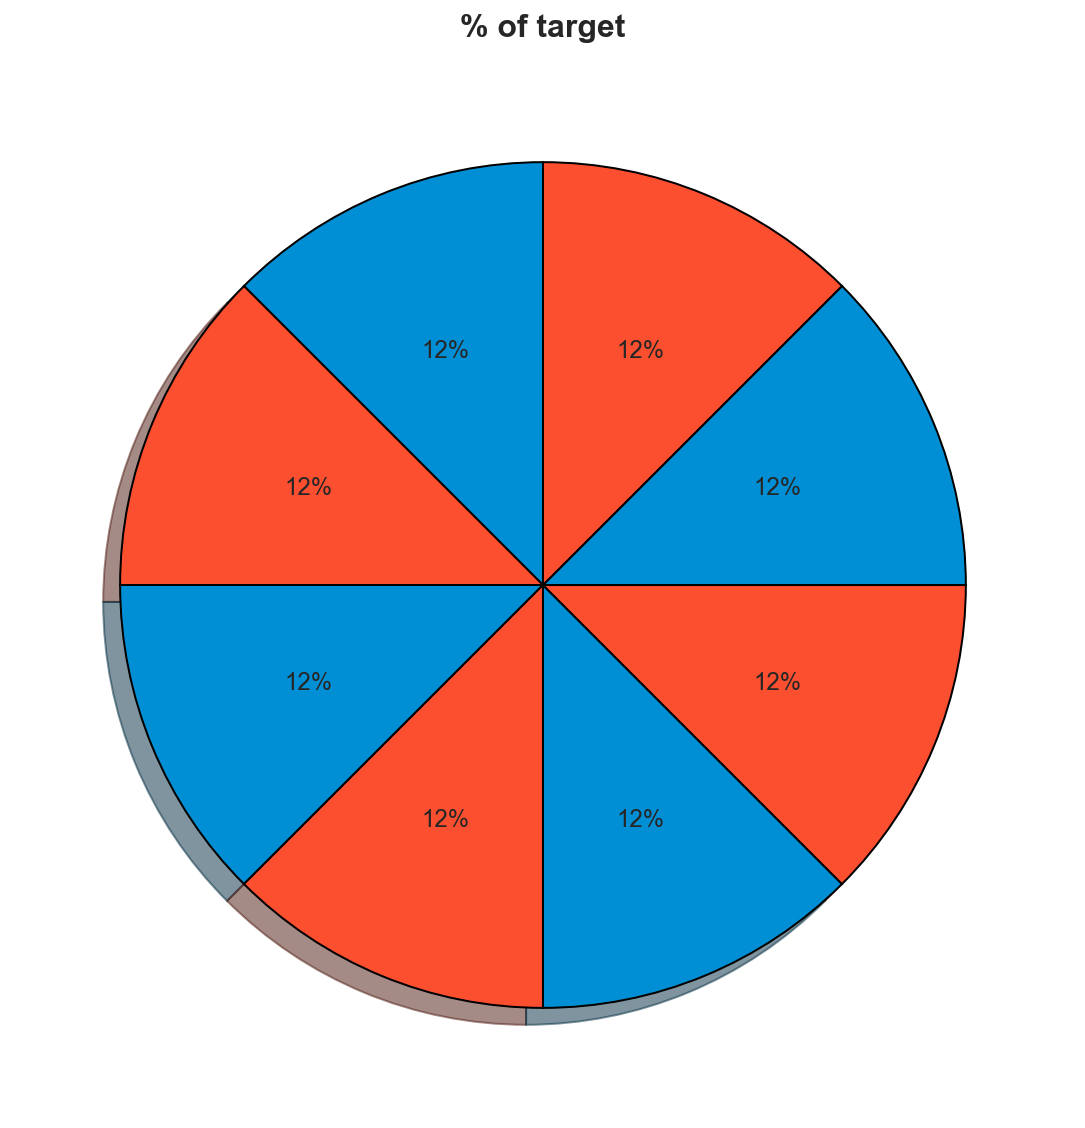

In [912]:
target_count = raw_df[TARGETNAME].value_counts().to_frame().T

colors = ['#008fd5', '#fc4f30']
plt.figure(figsize=(8,8))
plt.title('% of target')
plt.tight_layout()
plt.pie(list(target_count.iloc[0].values), startangle=90, wedgeprops={'edgecolor': 'black'}, colors=colors, autopct='%1.f%%', shadow=True)
# plt.legend(loc='best', fontsize='medium')
plt.show()

# Preprocessing

To X, y

In [913]:
match_id_df = raw_df['match_id']
X = raw_df.drop(['match_id'], axis=1)
# X = raw_df.copy()

In [914]:
y = X.pop(TARGETNAME)

In [915]:
X.fillna('', inplace=True)

In [916]:
X.dtypes

augment0                    object
augment1                    object
augment2                    object
Set7_Bard                  float32
Set7_Cannoneer             float32
                            ...   
TFT7_Heimerdinger_item2     object
TFT7_Senna_item1            object
TFT7_Senna_item2            object
TFT7_Aatrox_item1           object
TFT7_Aatrox_item2           object
Length: 265, dtype: object

In [917]:
y.dtypes

dtype('int8')

In [918]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [919]:
X[numeric_cols] = X[numeric_cols].applymap(np.int64)

In [920]:
matches_df = X.copy()
matches_df[TARGETNAME] = y

In [921]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13928 entries, 0 to 13927
Columns: 265 entries, augment0 to TFT7_Aatrox_item2
dtypes: int64(87), object(178)
memory usage: 28.2+ MB


In [922]:
X

augment0                          augment1  \
0       TFT7_Augment_ShimmerscaleTrait  TFT6_Augment_CyberneticImplants3   
1            TFT7_Augment_UrfsGrabBag1       TFT6_Augment_Electrocharge3   
2      TFT7_Augment_EvokerEssenceTheft        TFT6_Augment_RadiantRelics   
3            TFT7_Augment_GadgetExpert          TFT6_Augment_VerdantVeil   
4          TFT6_Augment_Electrocharge2       TFT6_Augment_Electrocharge3   
...                                ...                               ...   
13923        TFT6_Augment_ItemGrabBag1            TFT6_Augment_Ascension   
13924    TFT6_Augment_ThrillOfTheHunt1     TFT6_Augment_ComponentGrabBag   
13925        TFT6_Augment_ItemGrabBag1     TFT6_Augment_ComponentGrabBag   
13926         TFT6_Augment_SecondWind1           TFT6_Augment_Diversify2   
13927         TFT6_Augment_SecondWind1           TFT6_Augment_Diversify2   

                              augment2  Set7_Bard  Set7_Cannoneer  \
0             TFT7_Augment_DragonHorde          1               0   
1       TFT6_Augment_CyberneticUplink2          0               0   
2        TFT6_Augment_ComponentGrabBag          0               0   
3      TFT7_Augment_EvokerEssenceTheft          1               0   
4              TFT6_Augment_Diversify2          0               1   
...                                ...        ...             ...   
13923    TFT6_Augment_WindfallPlusPlus          0               0   
13924     TFT6_Augment_HighEndShopping          1               0   
13925        TFT7_Augment_RevelEmblem2          0               2   
13926    TFT6_Augment_CyberneticShell3          0               0   
13927        TFT6_Augment_GrandGambler          0               1   

       Set7_Dragon  Set7_Evoker  Set7_Guardian  Set7_Guild  Set7_Mage  ...  \
0                2            1              1           1          0  ...   
1                1            0              0           0          0  ...   
2                1            1              0           0          1  ...   
3                1            1              0           1          0  ...   
4                1            1              1           0          0  ...   
...            ...          ...            ...         ...        ...  ...   
13923            0            0              0           0          0  ...   
13924            0            0              0           2          0  ...   
13925            1            1              0           0          0  ...   
13926            1            0              1           2          0  ...   
13927            0            1              0           1          0  ...   

       TFT7_Kayn_item2  TFT7_Sejuani_item2  TFT7_Senna_item0  \
0                 None                None              None   
1                 None                None              None   
2                 None                None              None   
3                 None                None              None   
4                 None                None              None   
...                ...                 ...               ...   
13923             None                None              None   
13924             None                None              None   
13925             None                None              None   
13926             None                None              None   
13927             None                None              None   

       TFT7_Taric_item2  TFT7_Leona_item2  TFT7_Heimerdinger_item2  \
0                  None              None                     None   
1                  None              None                     None   
2                  None              None                     None   
3                  None              None                     None   
4                  None              None                     None   
...                 ...               ...                      ...   
13923              None              None                     None   
13924              Non

# Data Analysis

## Traits

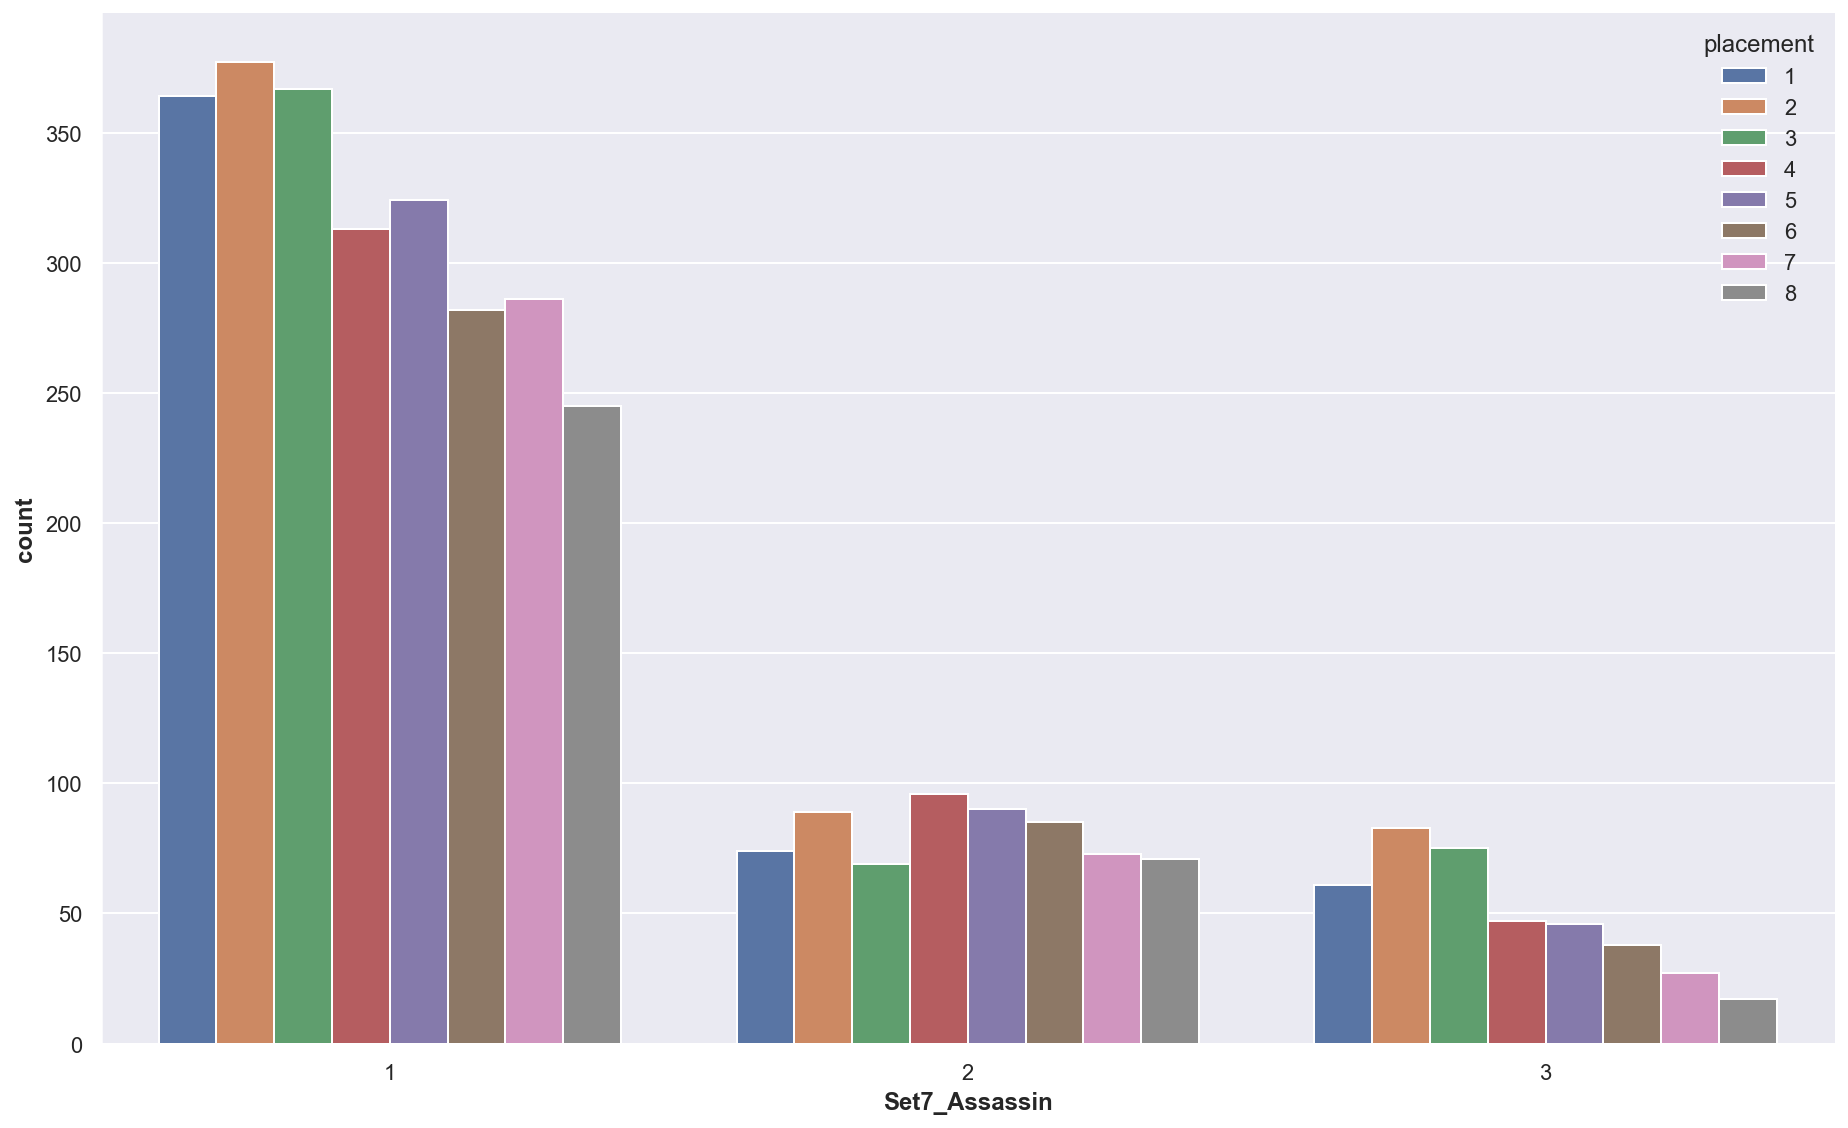

In [923]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Assassin']>0], x='Set7_Assassin', hue=TARGETNAME)
sns.despine()

Worst Trait.

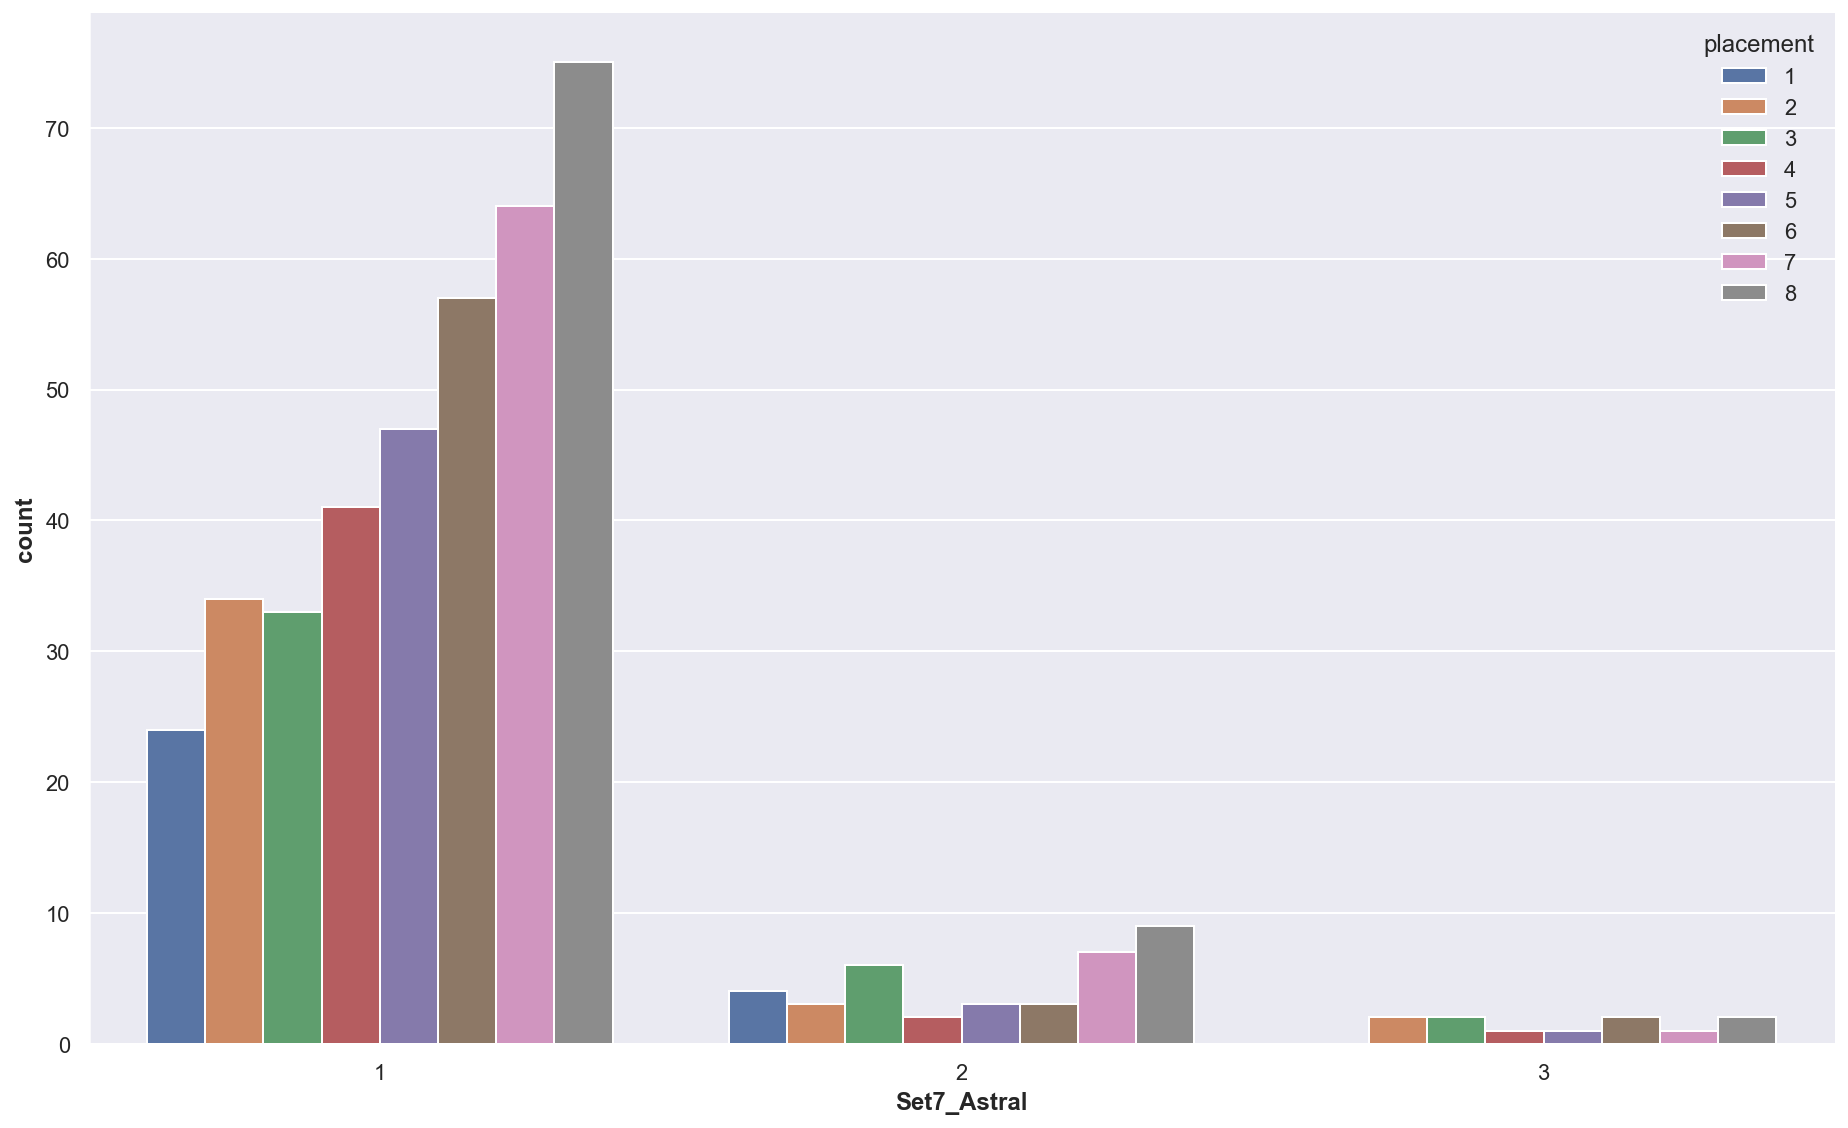

In [924]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Astral']>0], x='Set7_Astral', hue=TARGETNAME)
sns.despine()

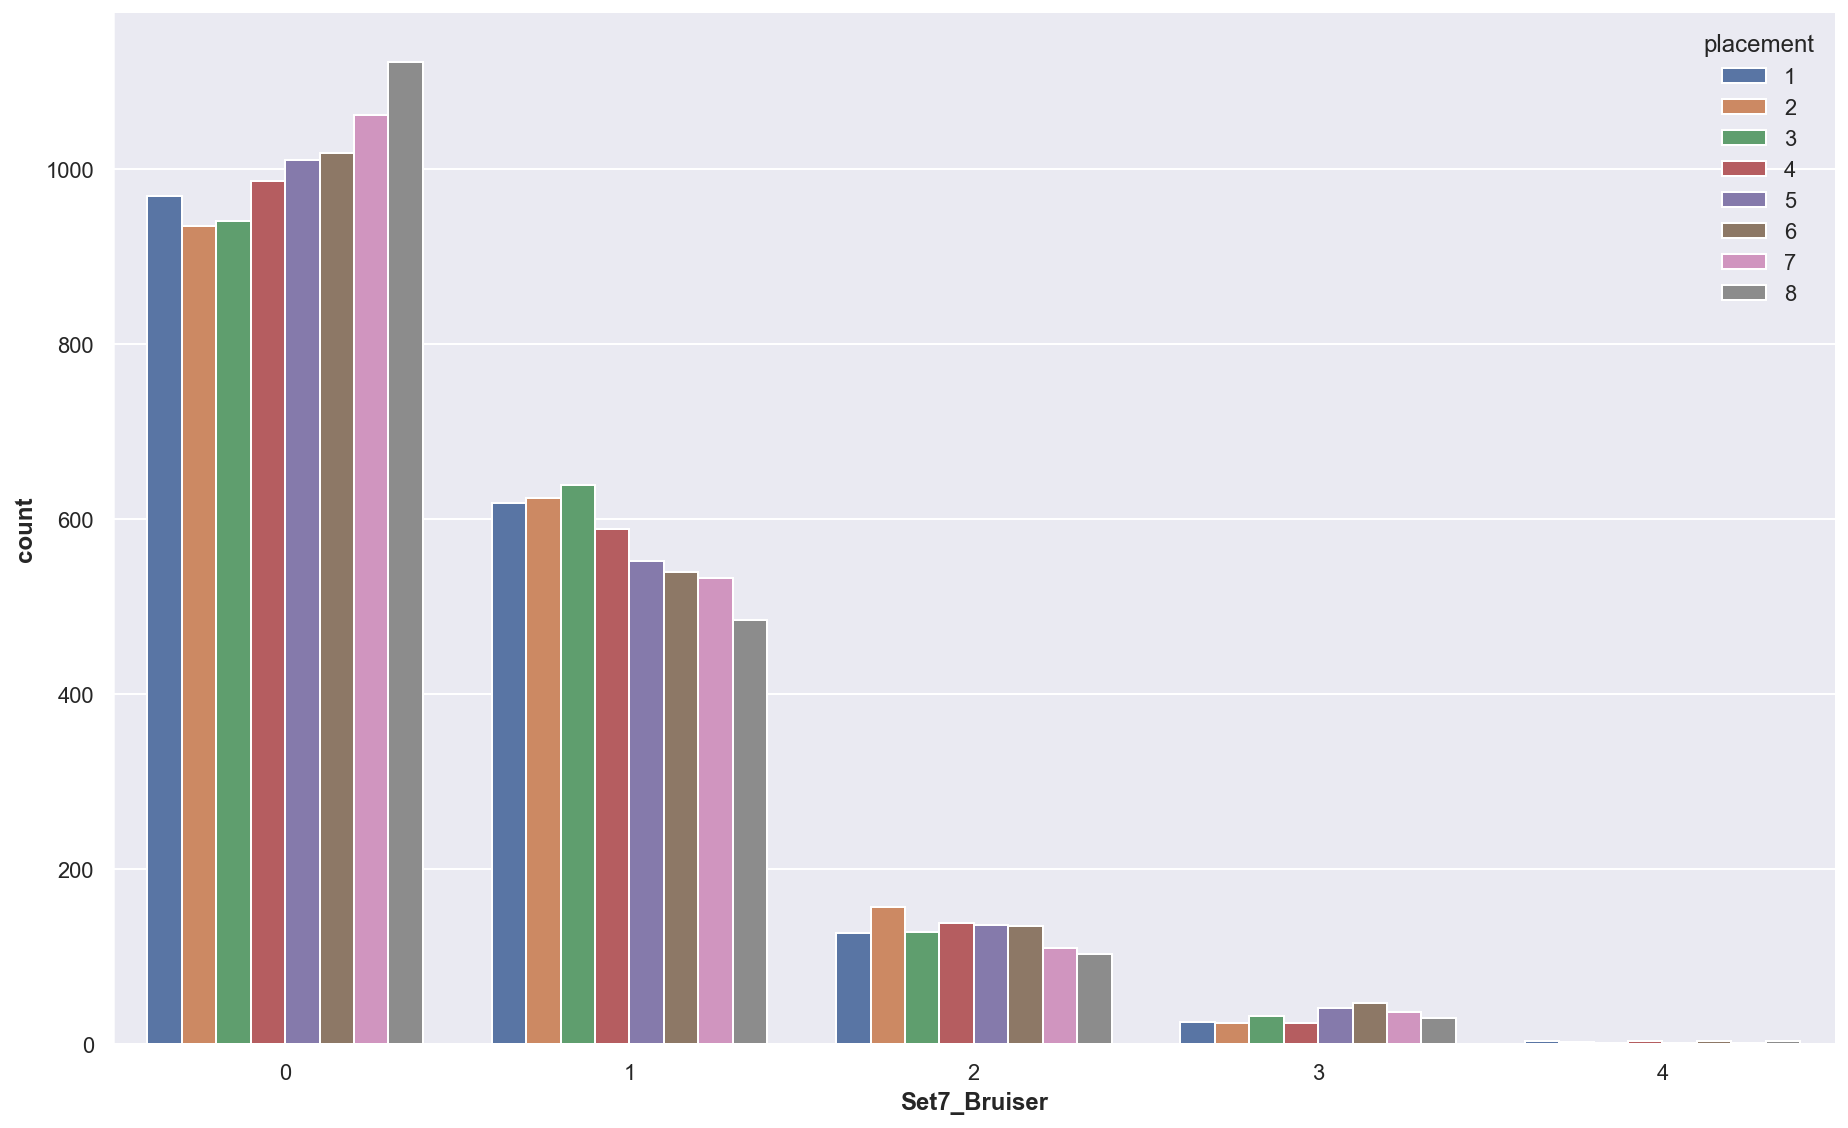

In [925]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Bruiser']>=0], x='Set7_Bruiser', hue=TARGETNAME)
sns.despine()

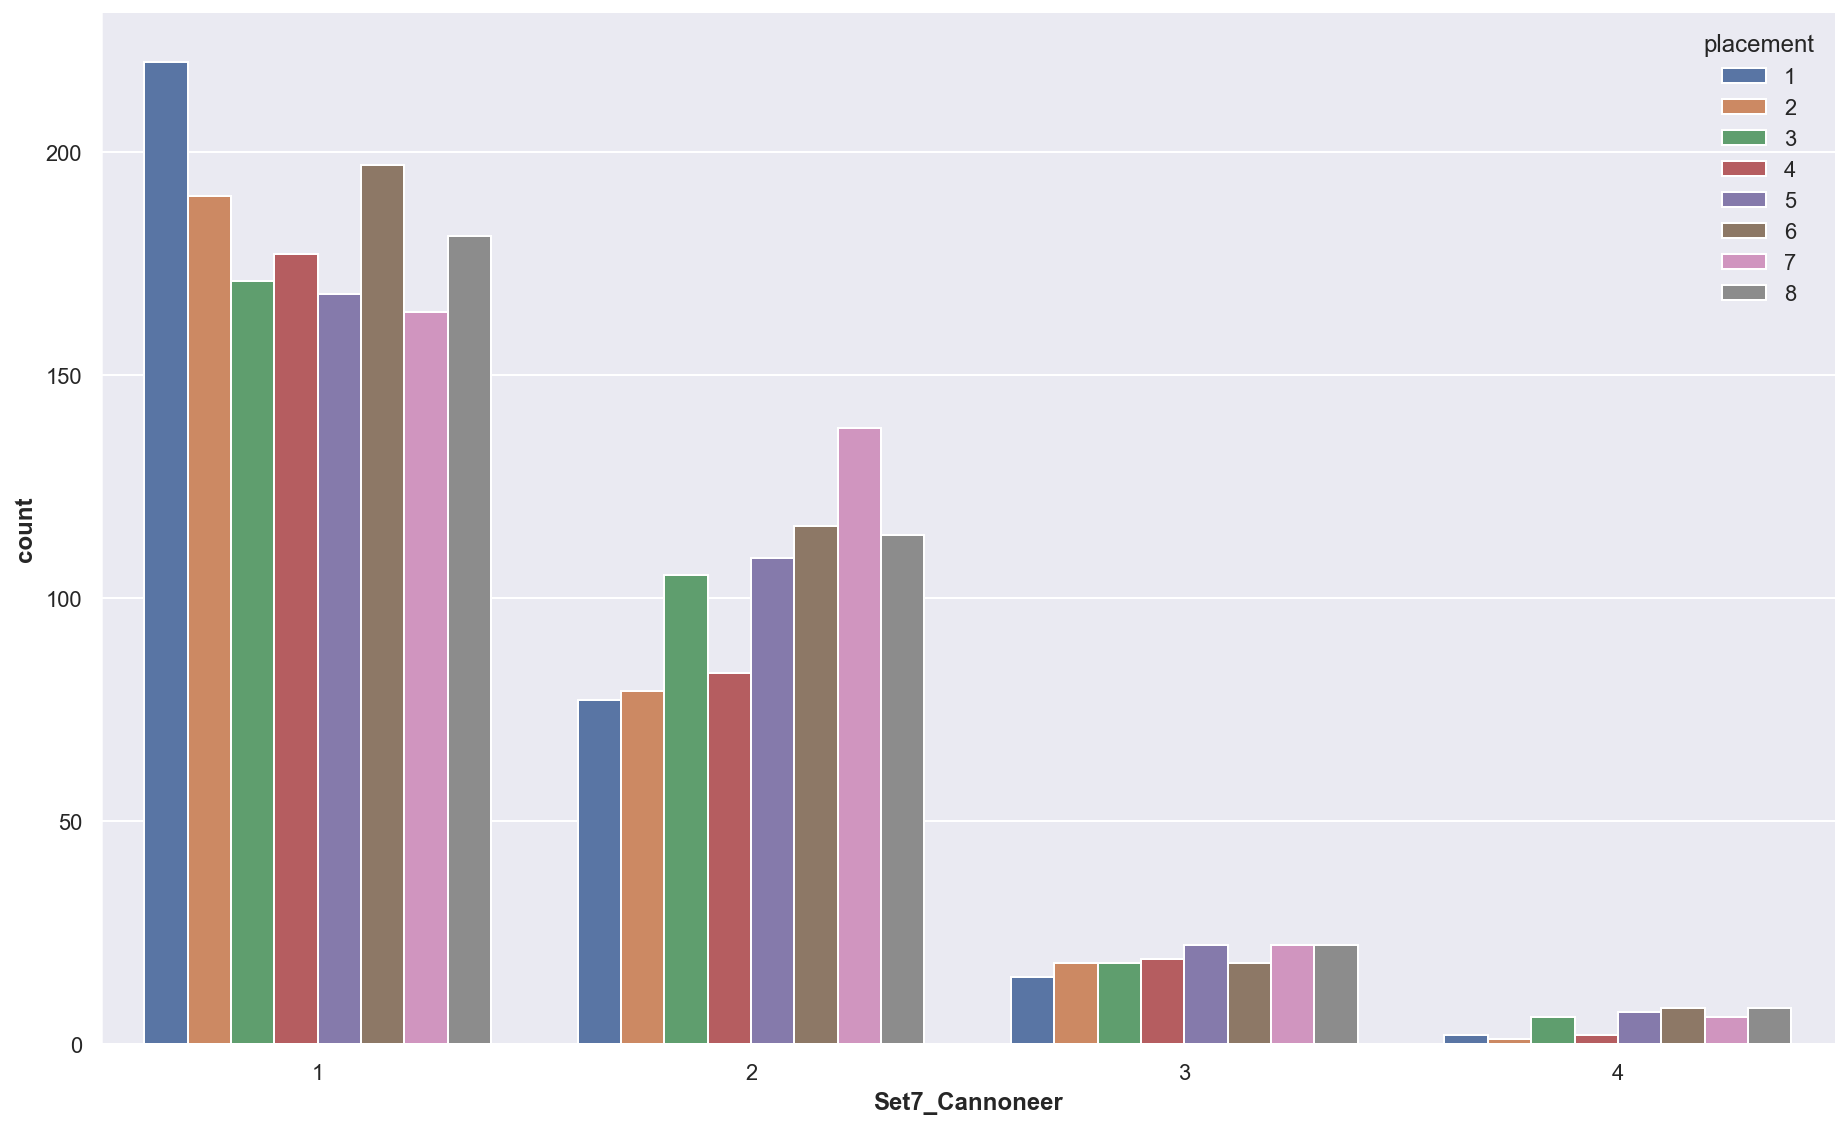

In [926]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cannoneer']>0], x='Set7_Cannoneer', hue=TARGETNAME)
sns.despine()

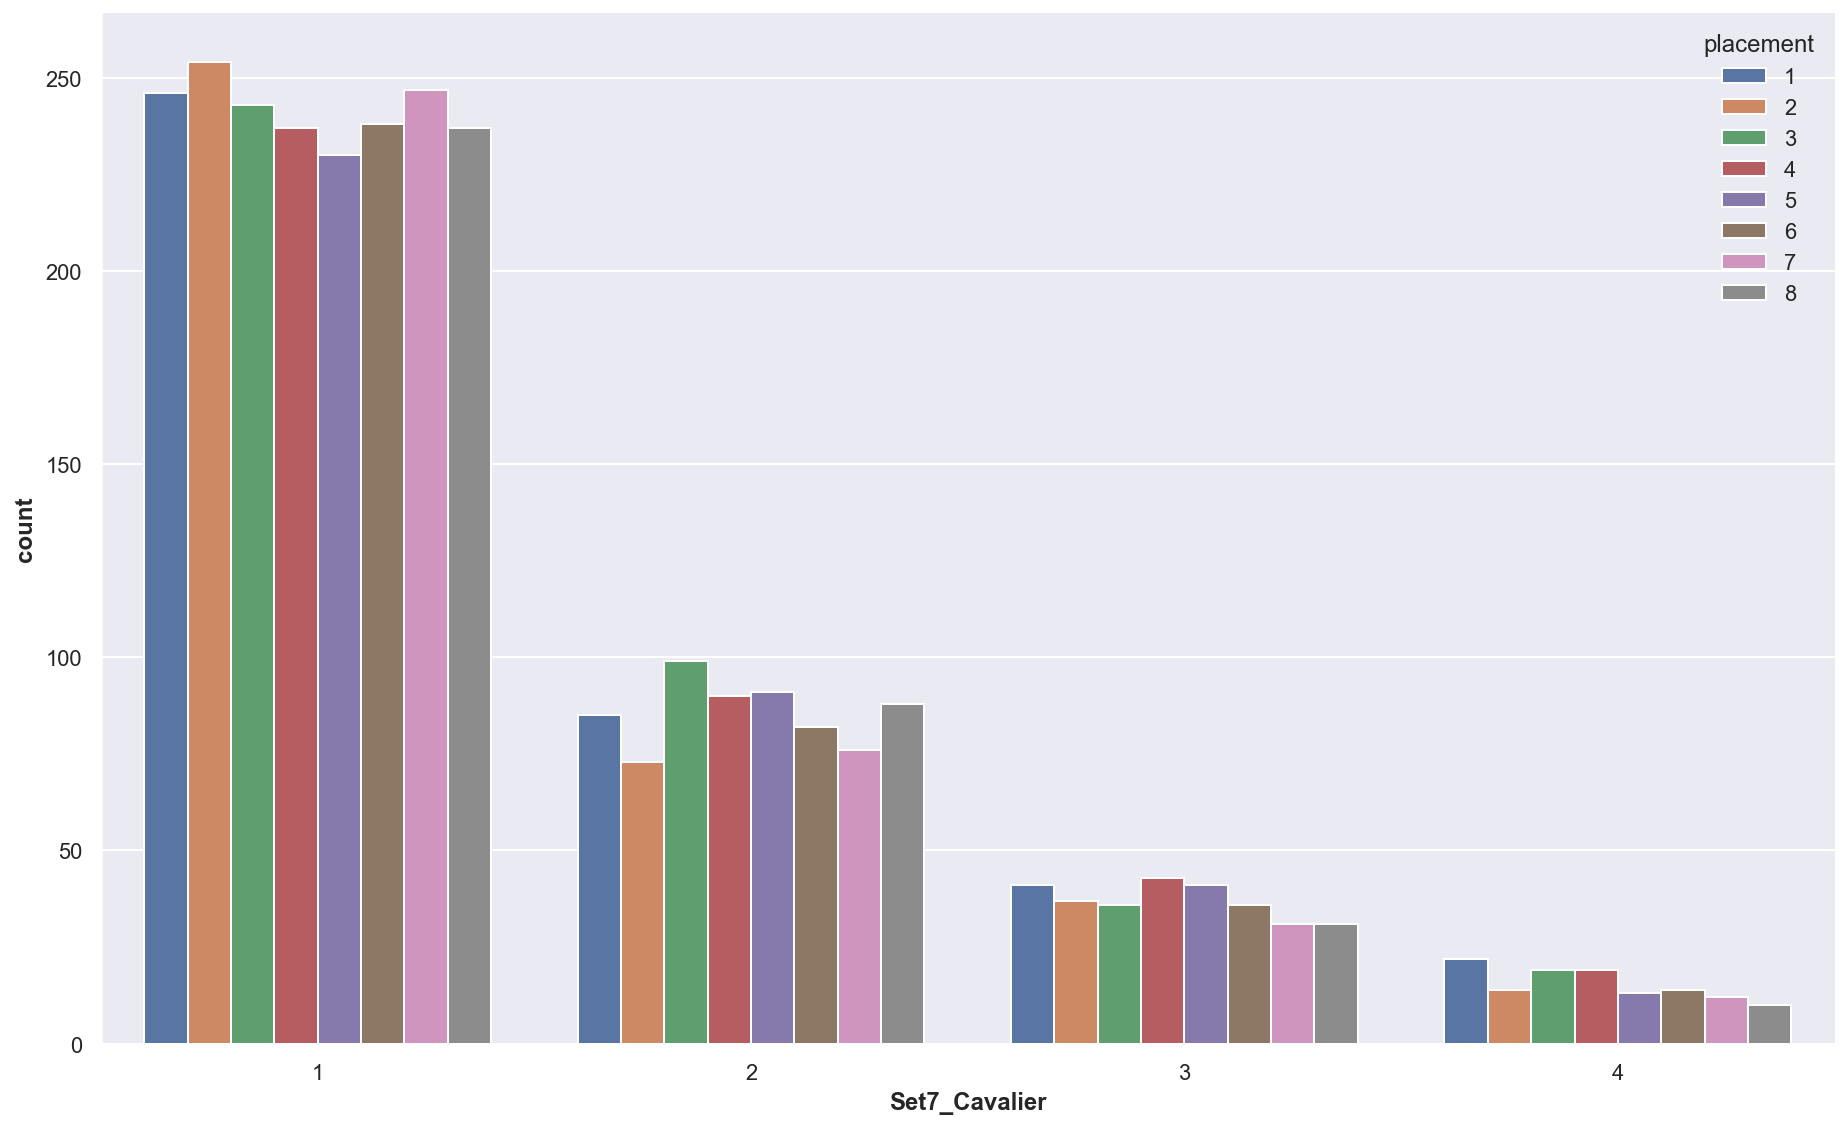

In [927]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Cavalier']>0], x='Set7_Cavalier', hue=TARGETNAME)
sns.despine()

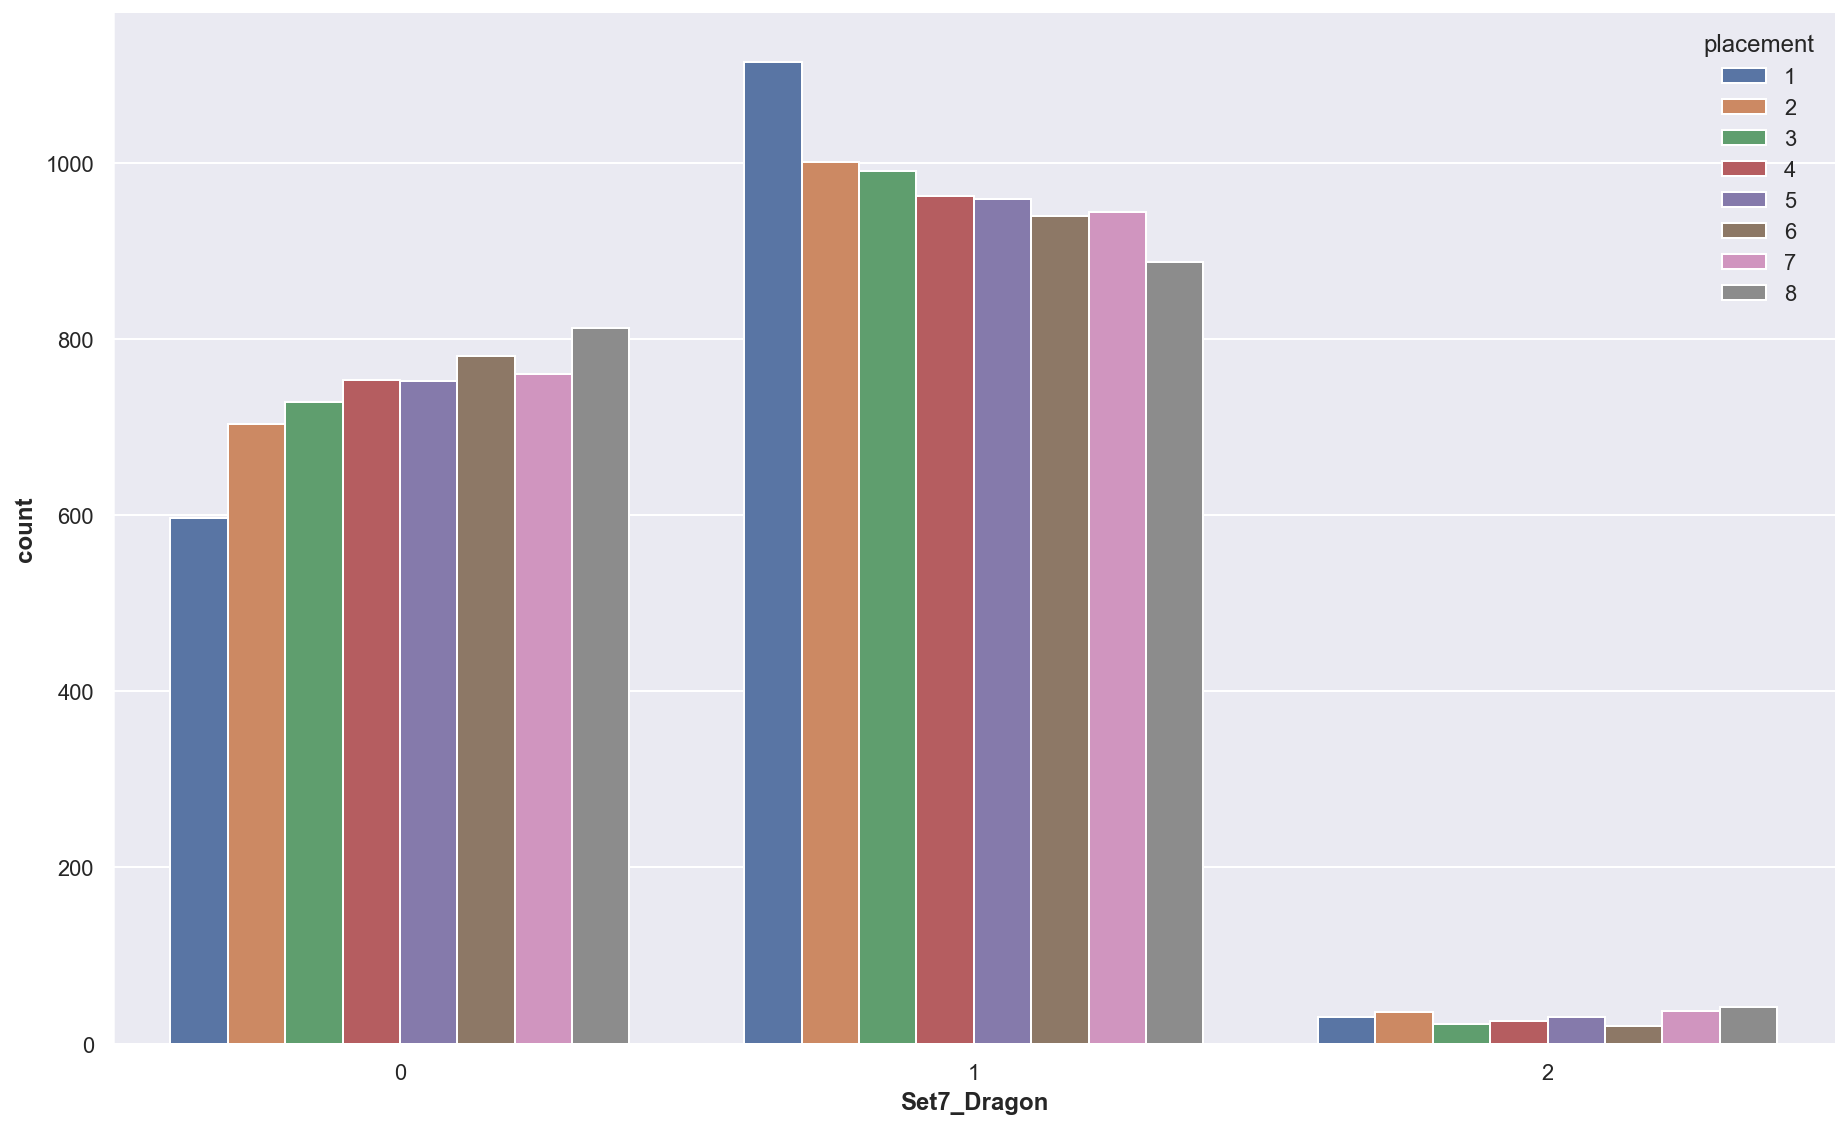

In [928]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragon']>=0], x='Set7_Dragon', hue=TARGETNAME)
sns.despine()

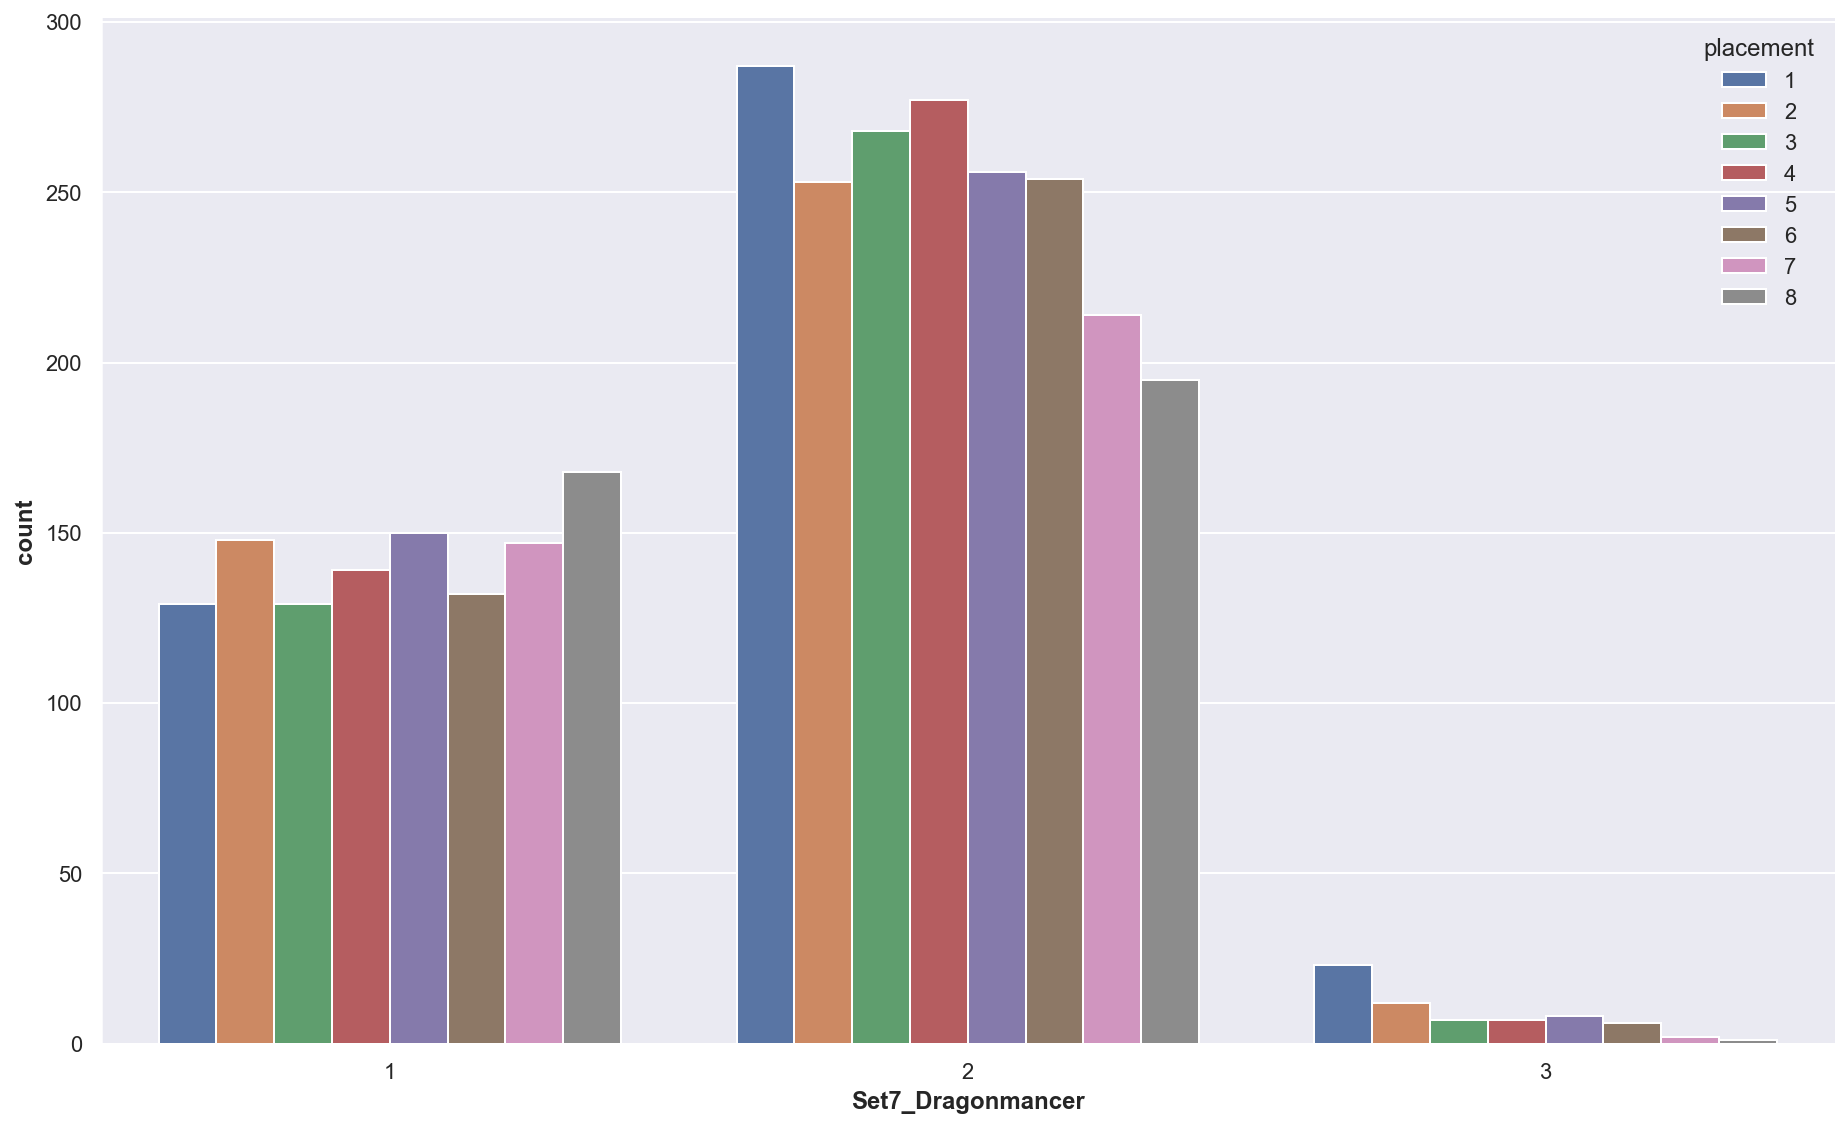

In [929]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Dragonmancer']>0], x='Set7_Dragonmancer', hue=TARGETNAME)
sns.despine()

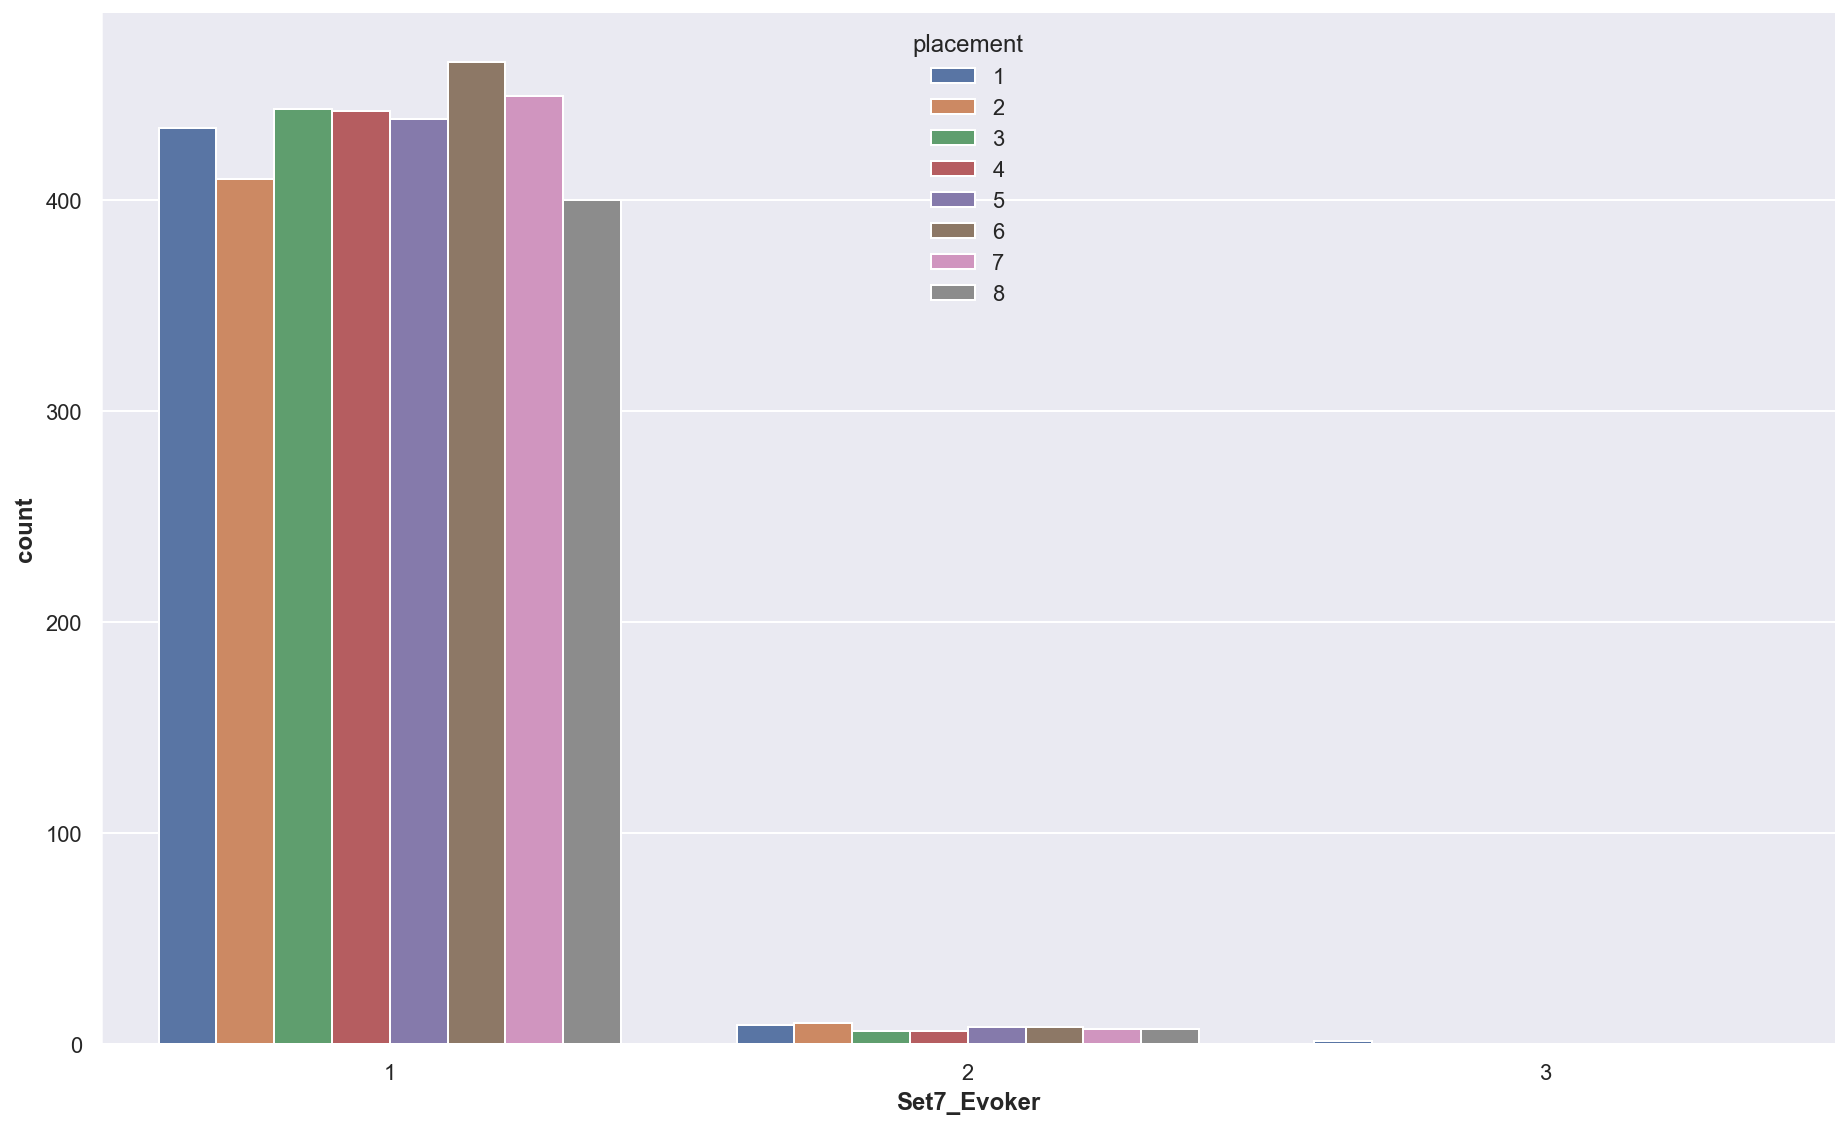

In [930]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Evoker']>0], x='Set7_Evoker', hue=TARGETNAME)
sns.despine()

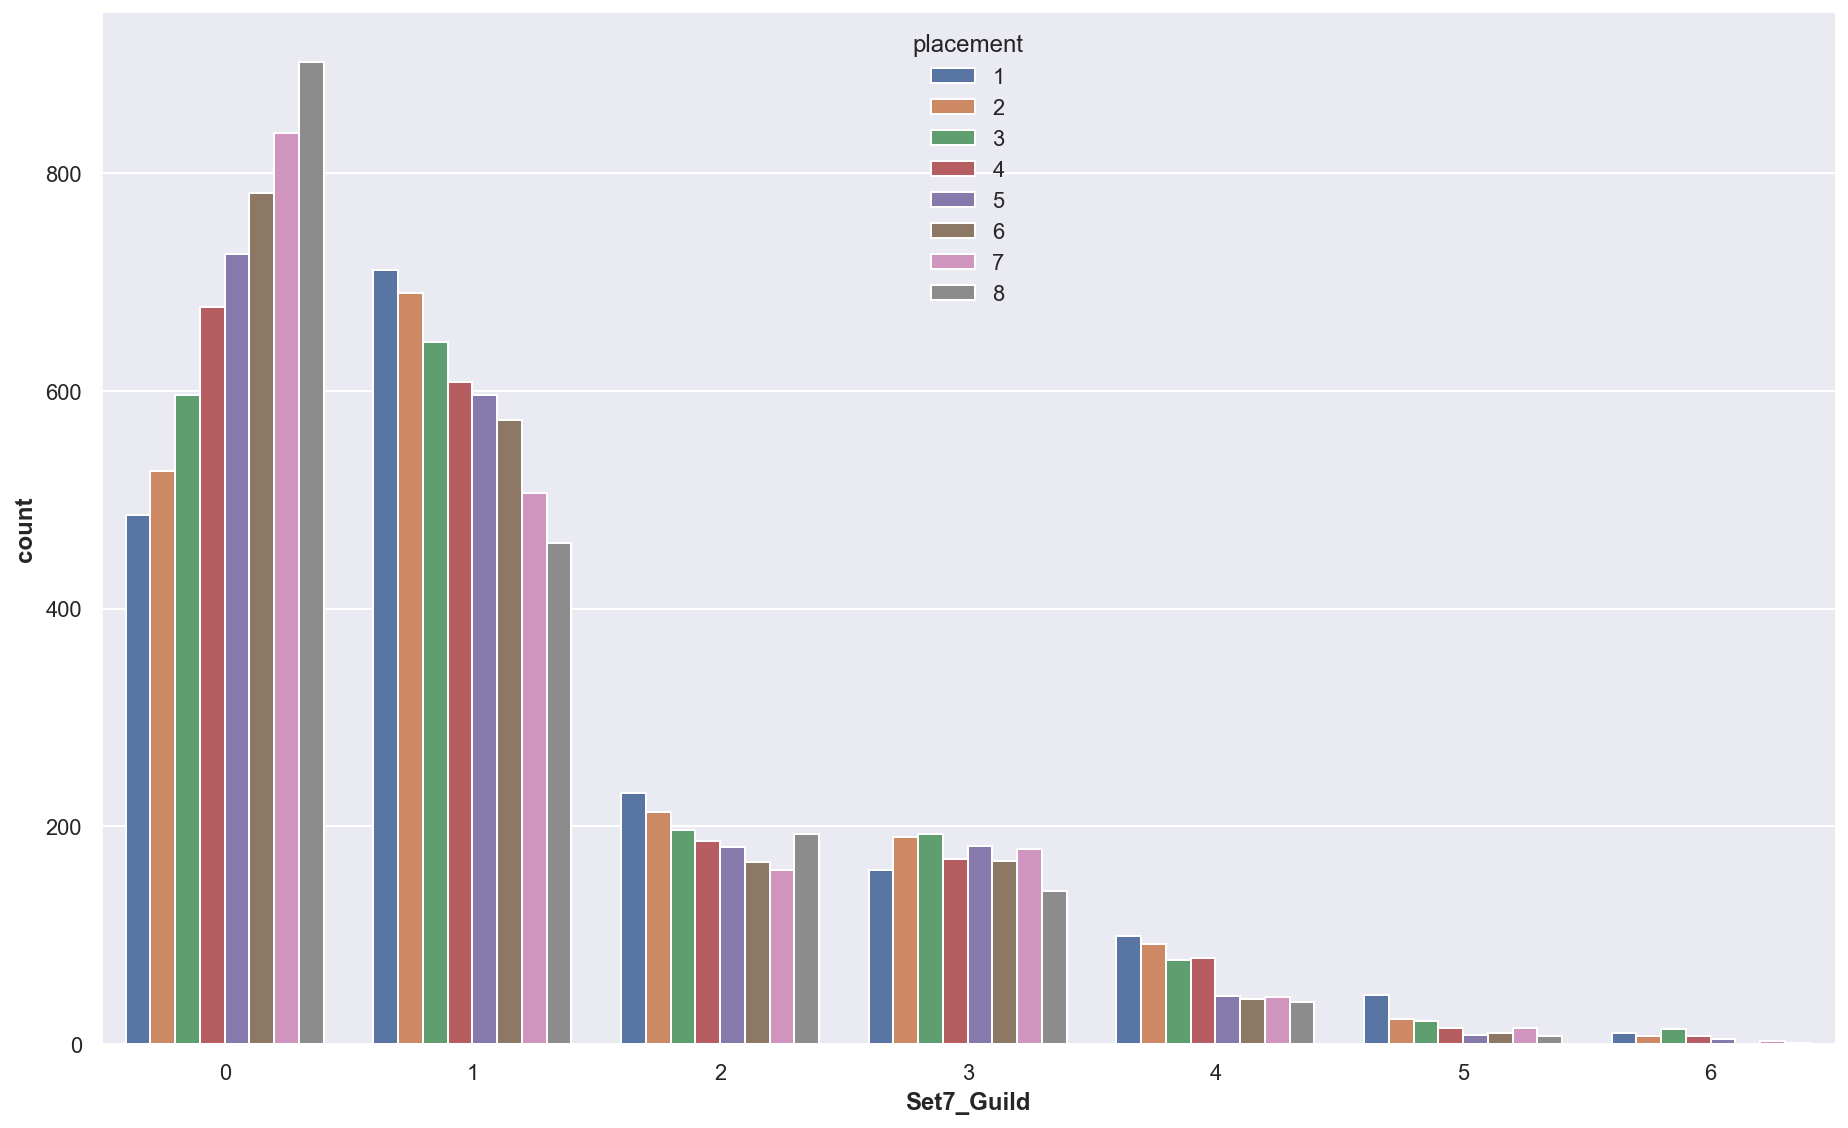

In [931]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='Set7_Guild', hue=TARGETNAME)
sns.despine()

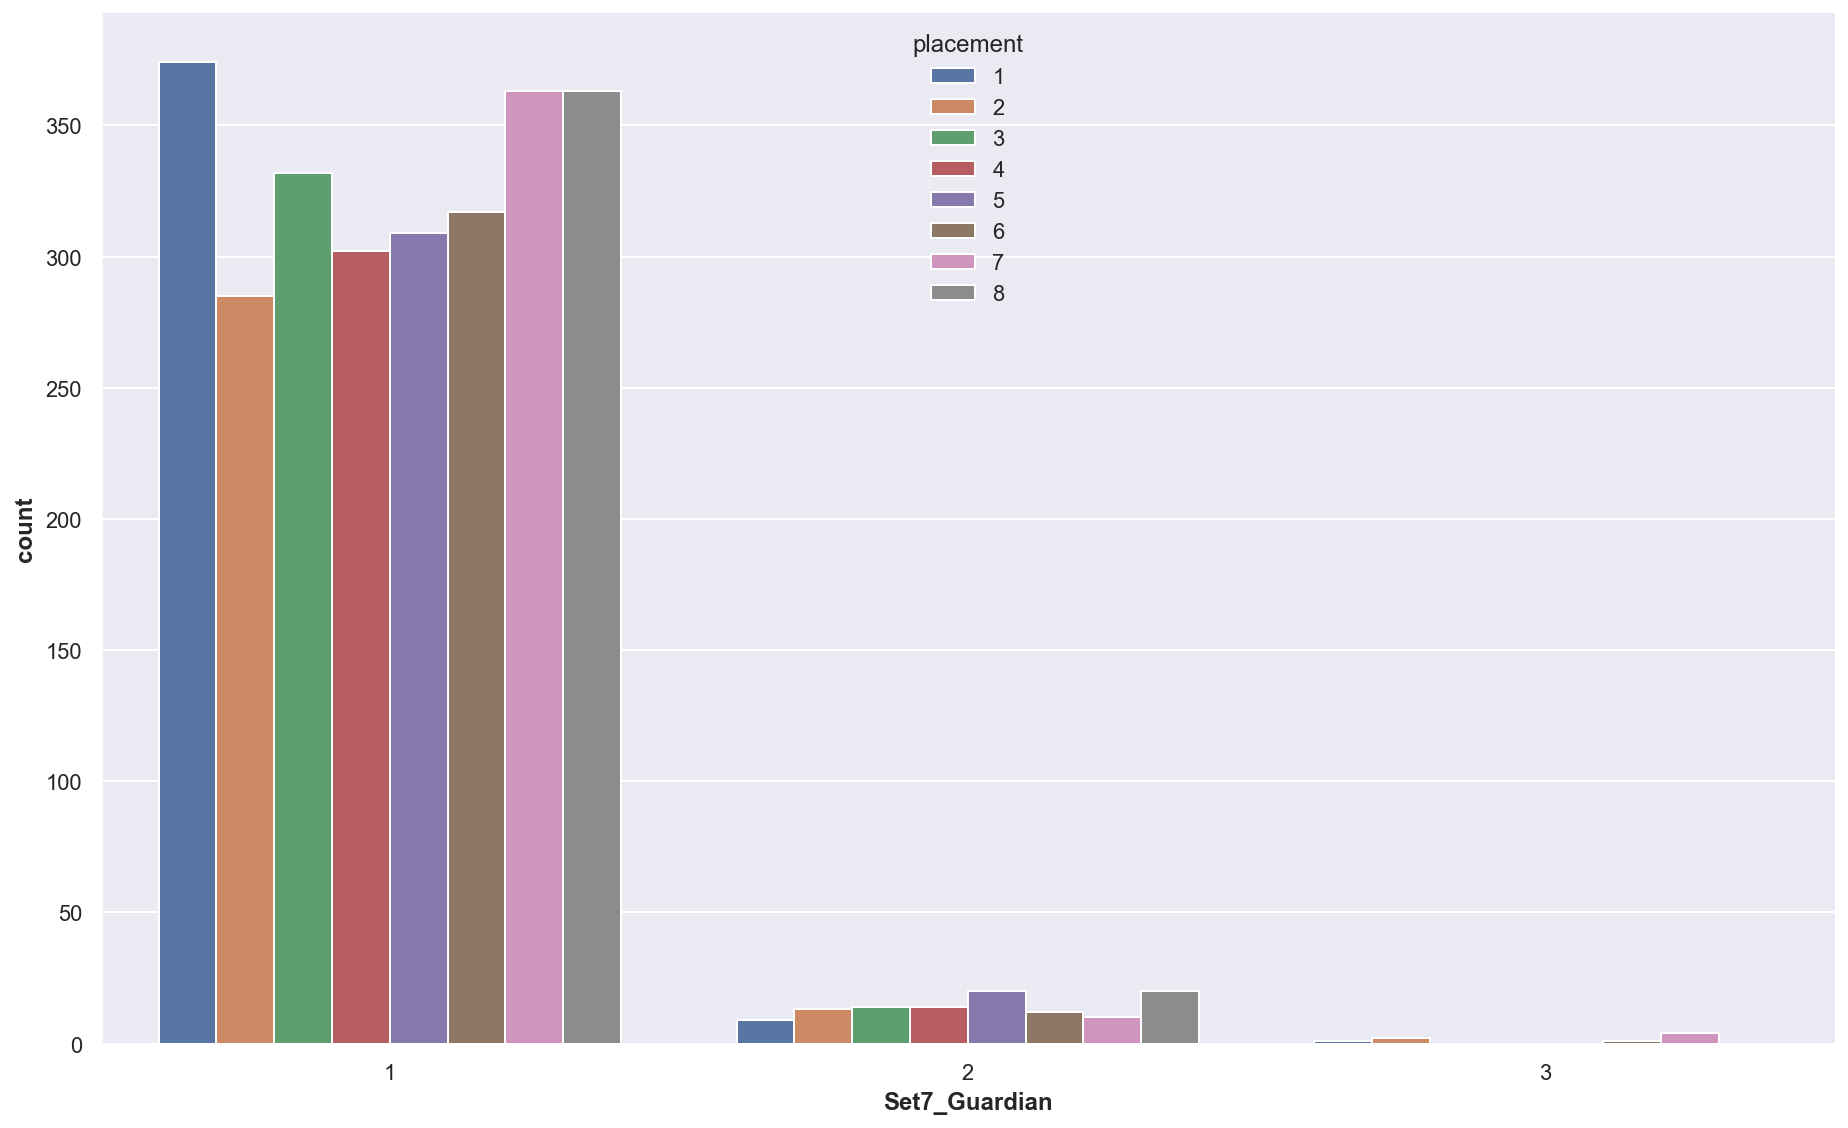

In [932]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Guardian']>0], x='Set7_Guardian', hue=TARGETNAME)
sns.despine()

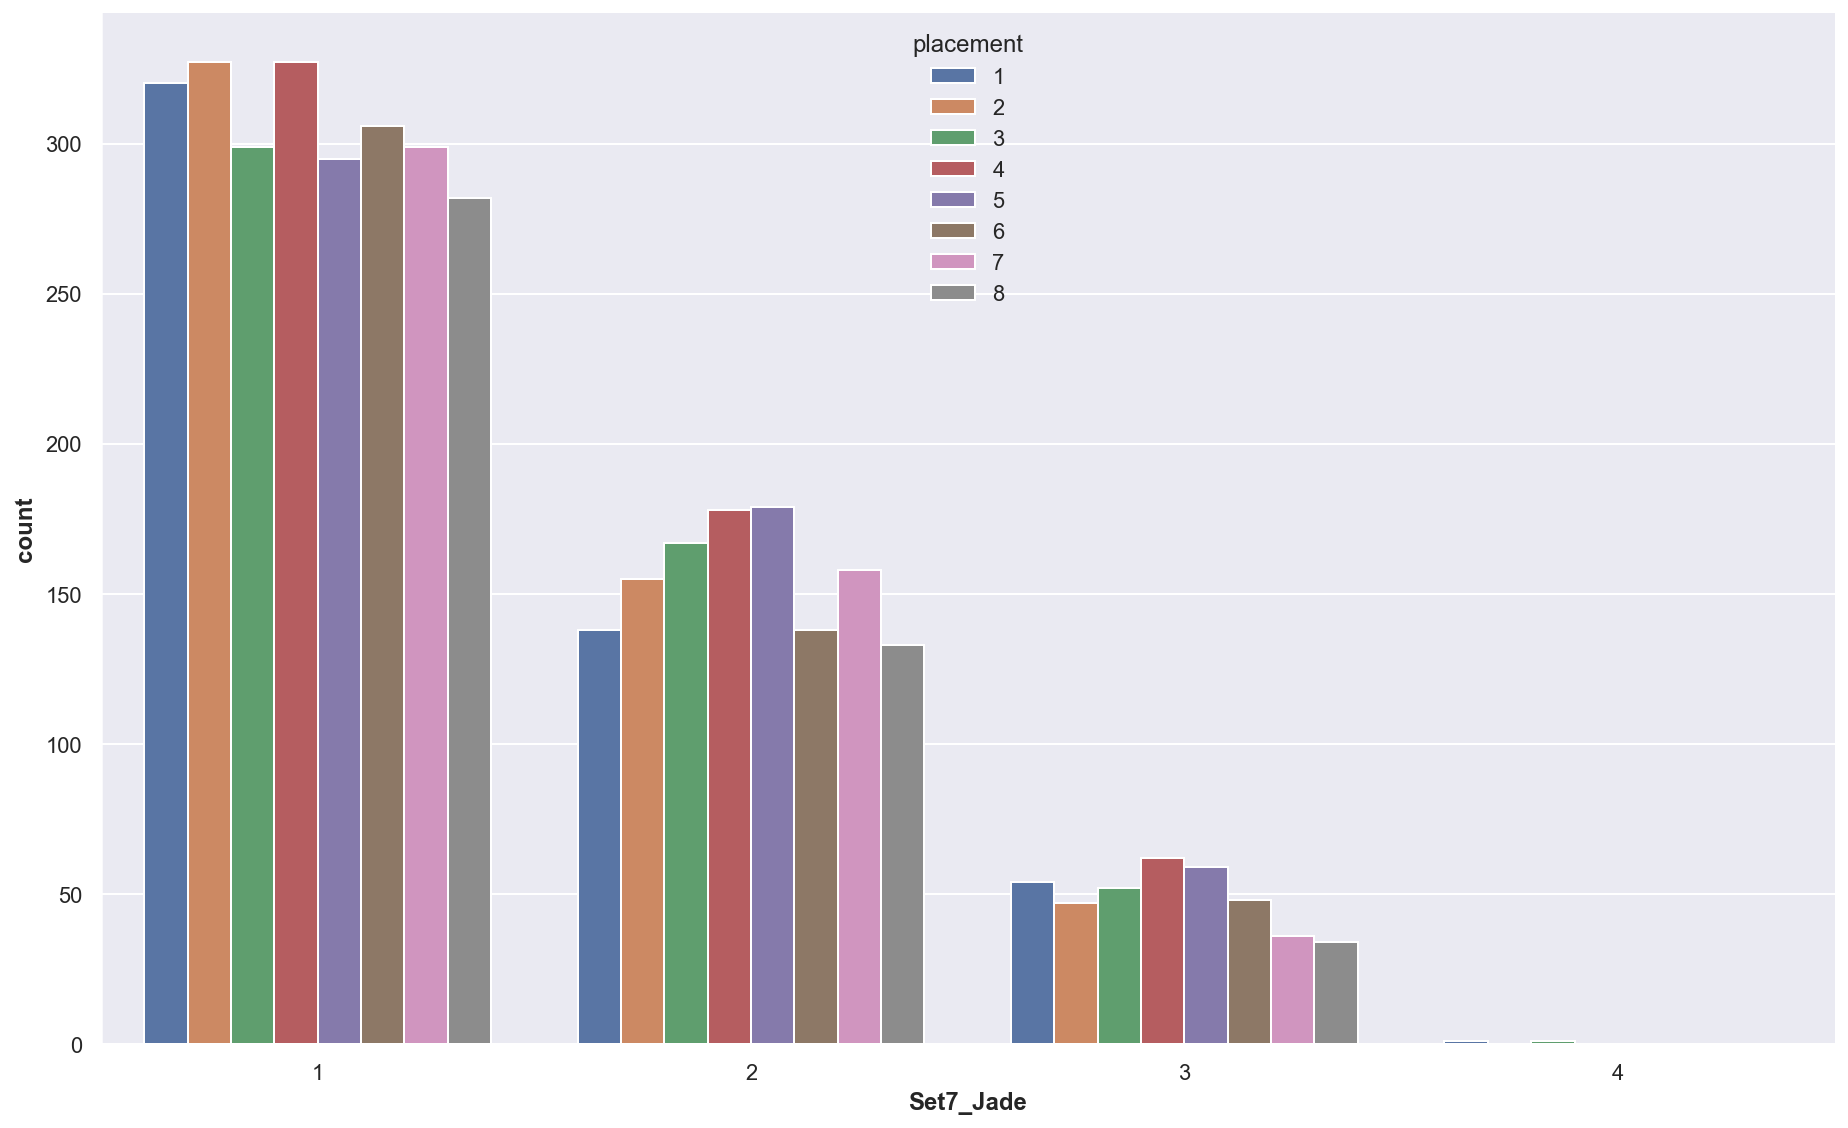

In [933]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Jade']>0], x='Set7_Jade', hue=TARGETNAME)
sns.despine()

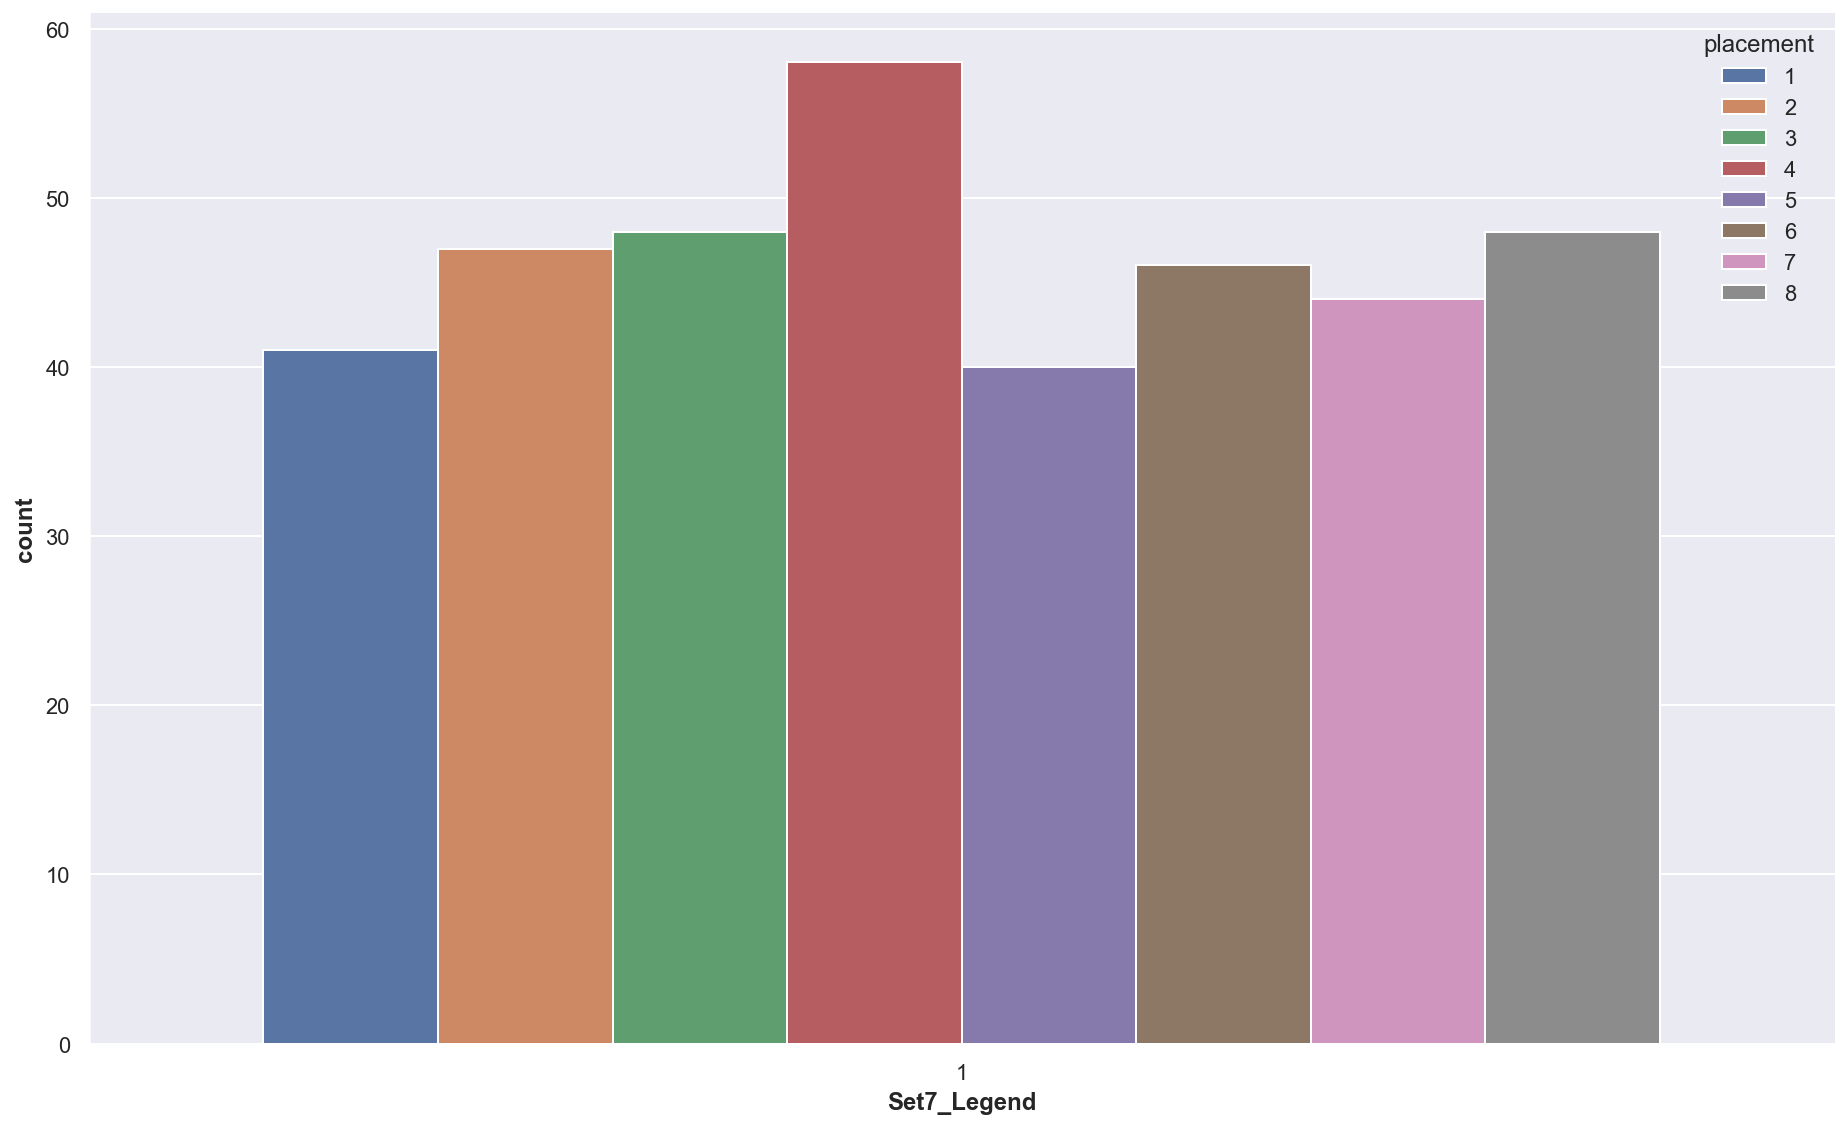

In [934]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Legend']>0], x='Set7_Legend', hue=TARGETNAME)
sns.despine()

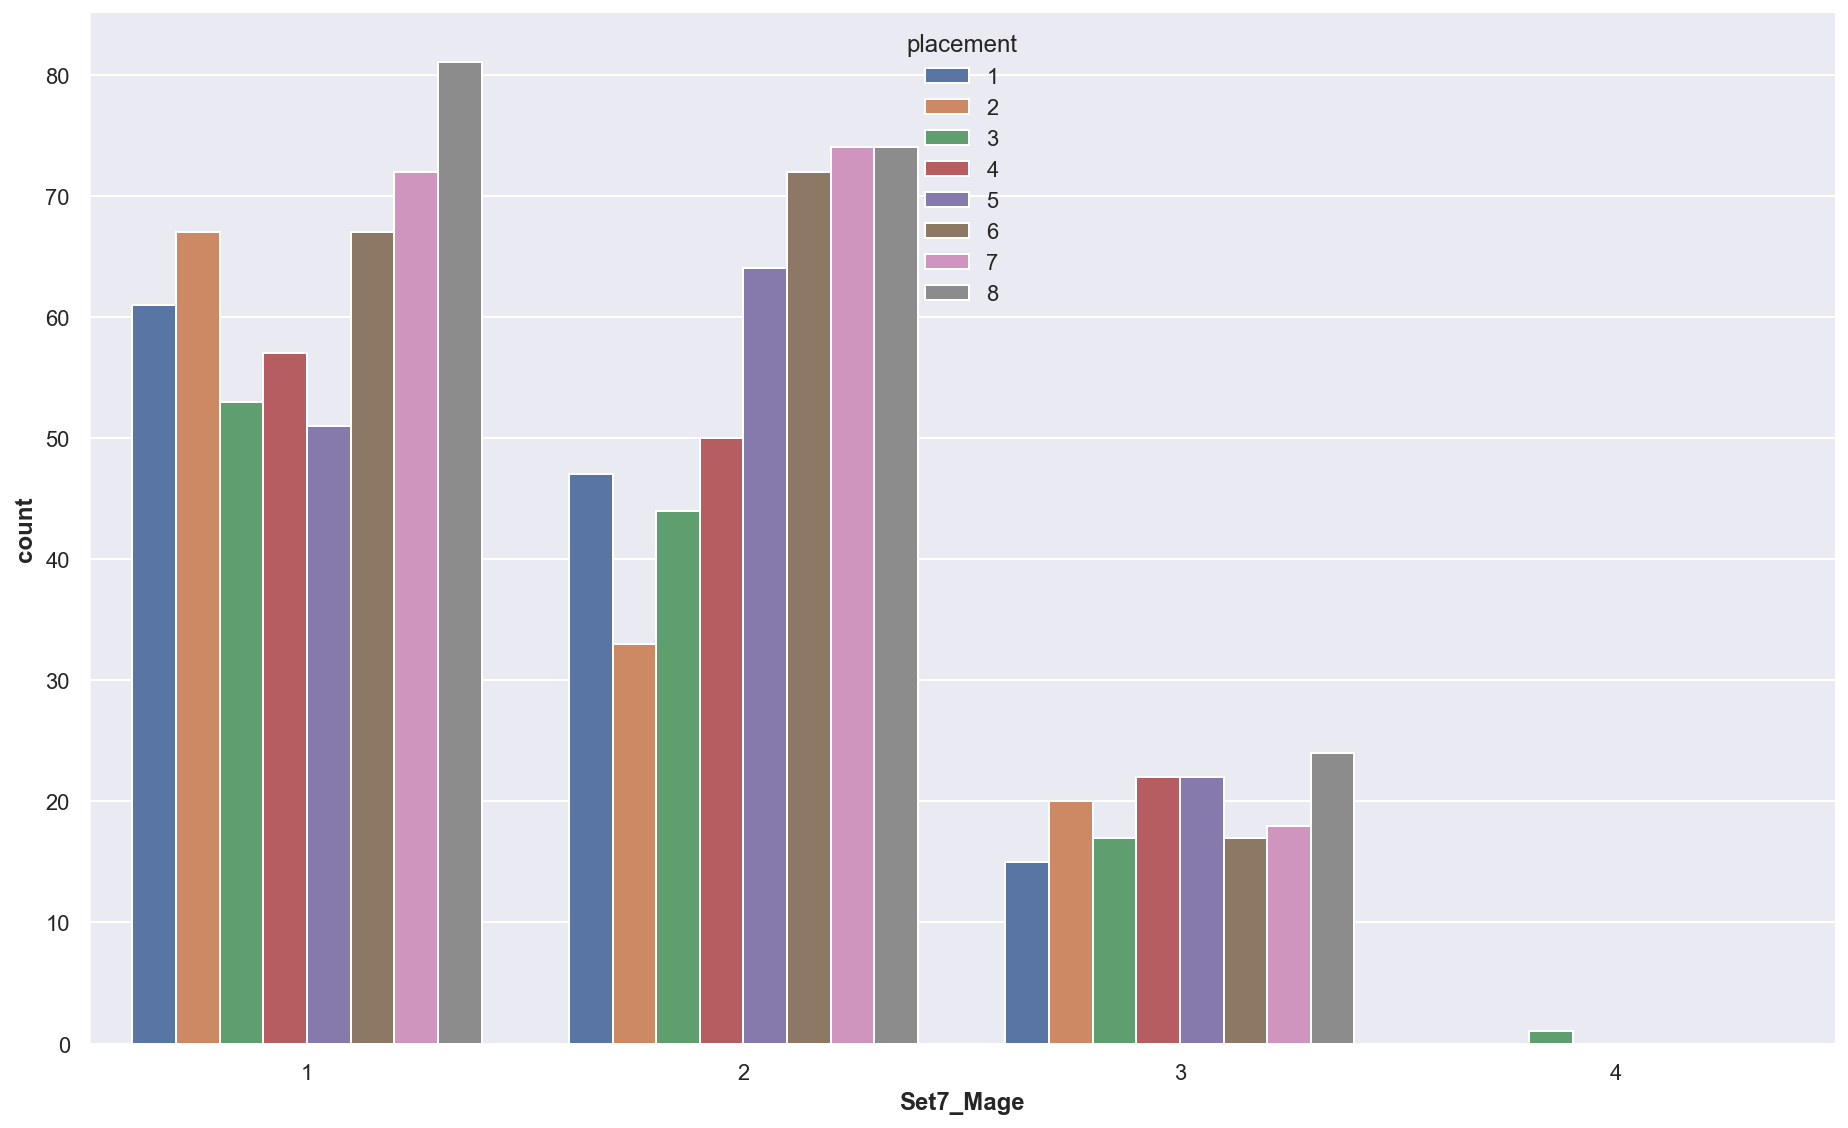

In [935]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='Set7_Mage', hue=TARGETNAME)
sns.despine()

Need Zoe for Mages

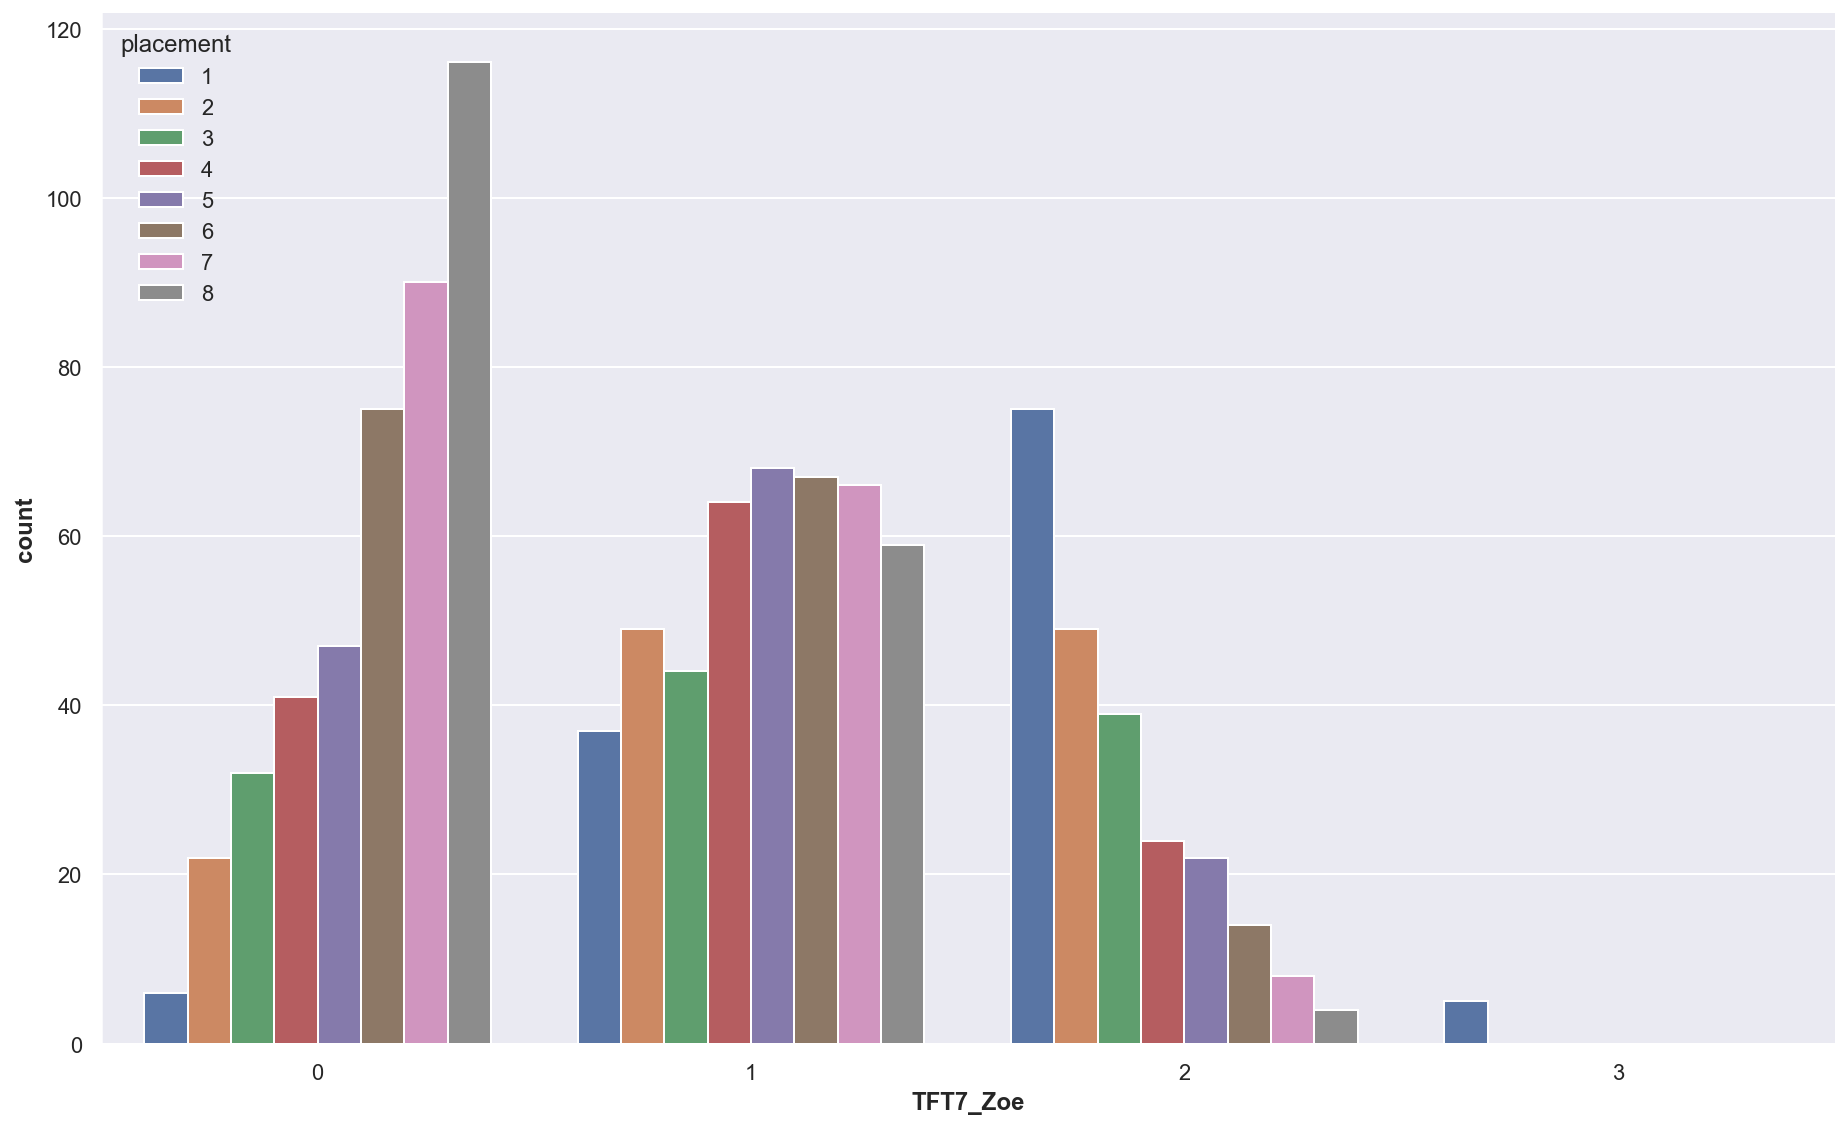

In [936]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mage']>0], x='TFT7_Zoe', hue=TARGETNAME)
sns.despine()

Significant correlation with Mystic.

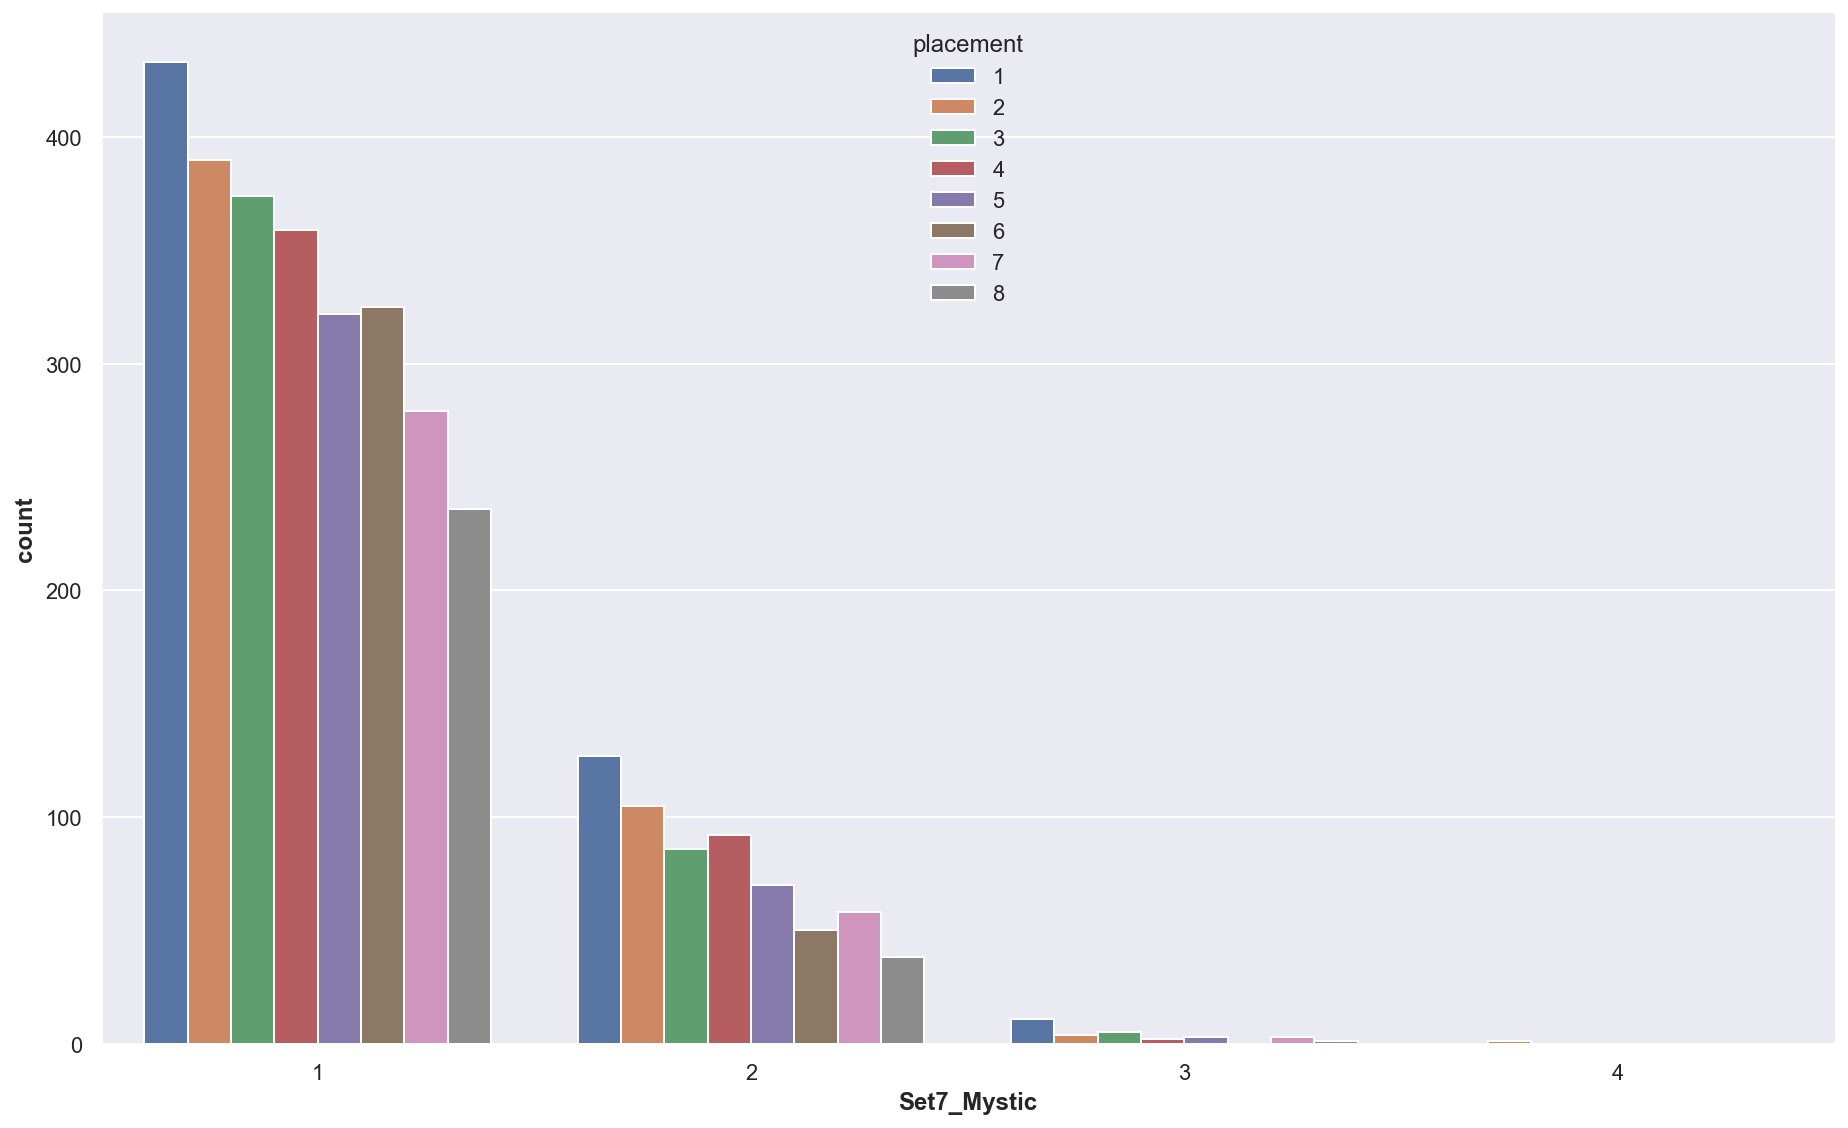

In [937]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mystic']>0], x='Set7_Mystic', hue=TARGETNAME)
sns.despine()

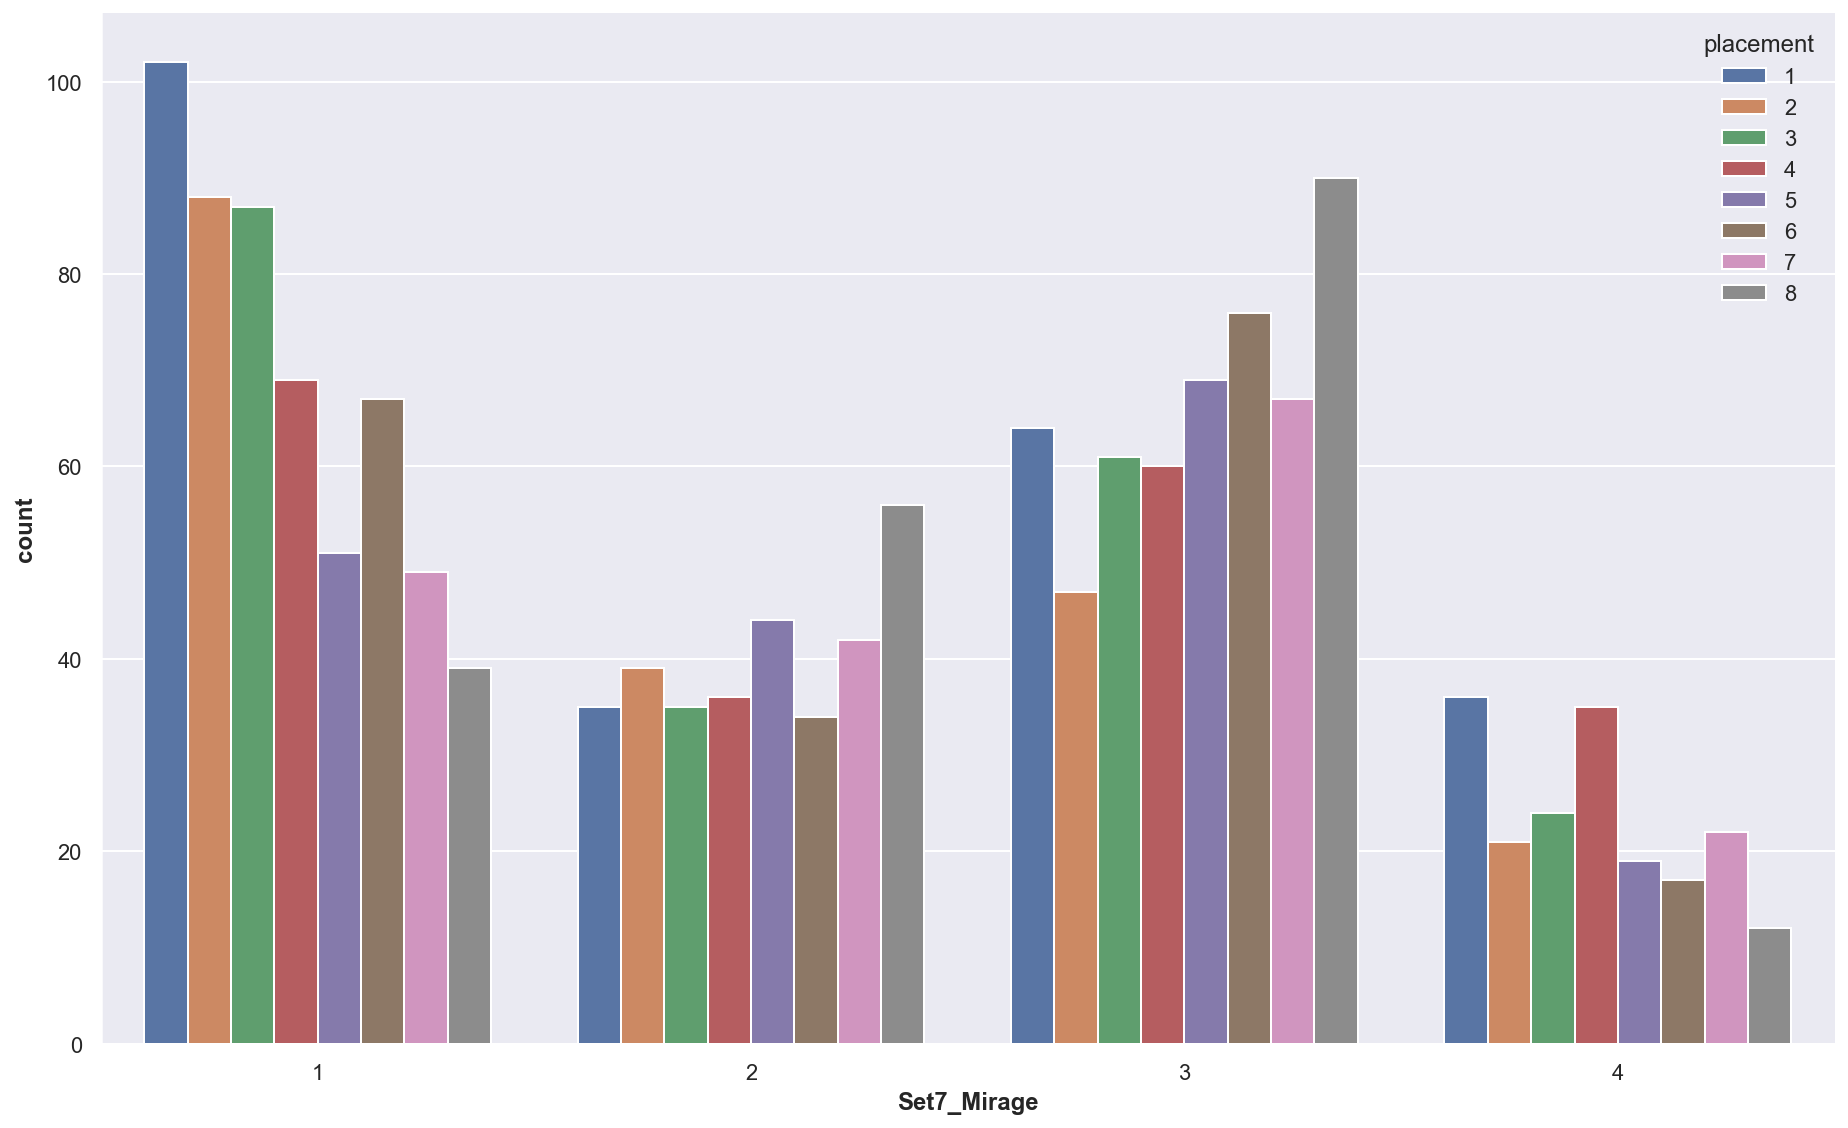

In [938]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Mirage']>0], x='Set7_Mirage', hue=TARGETNAME)
sns.despine()

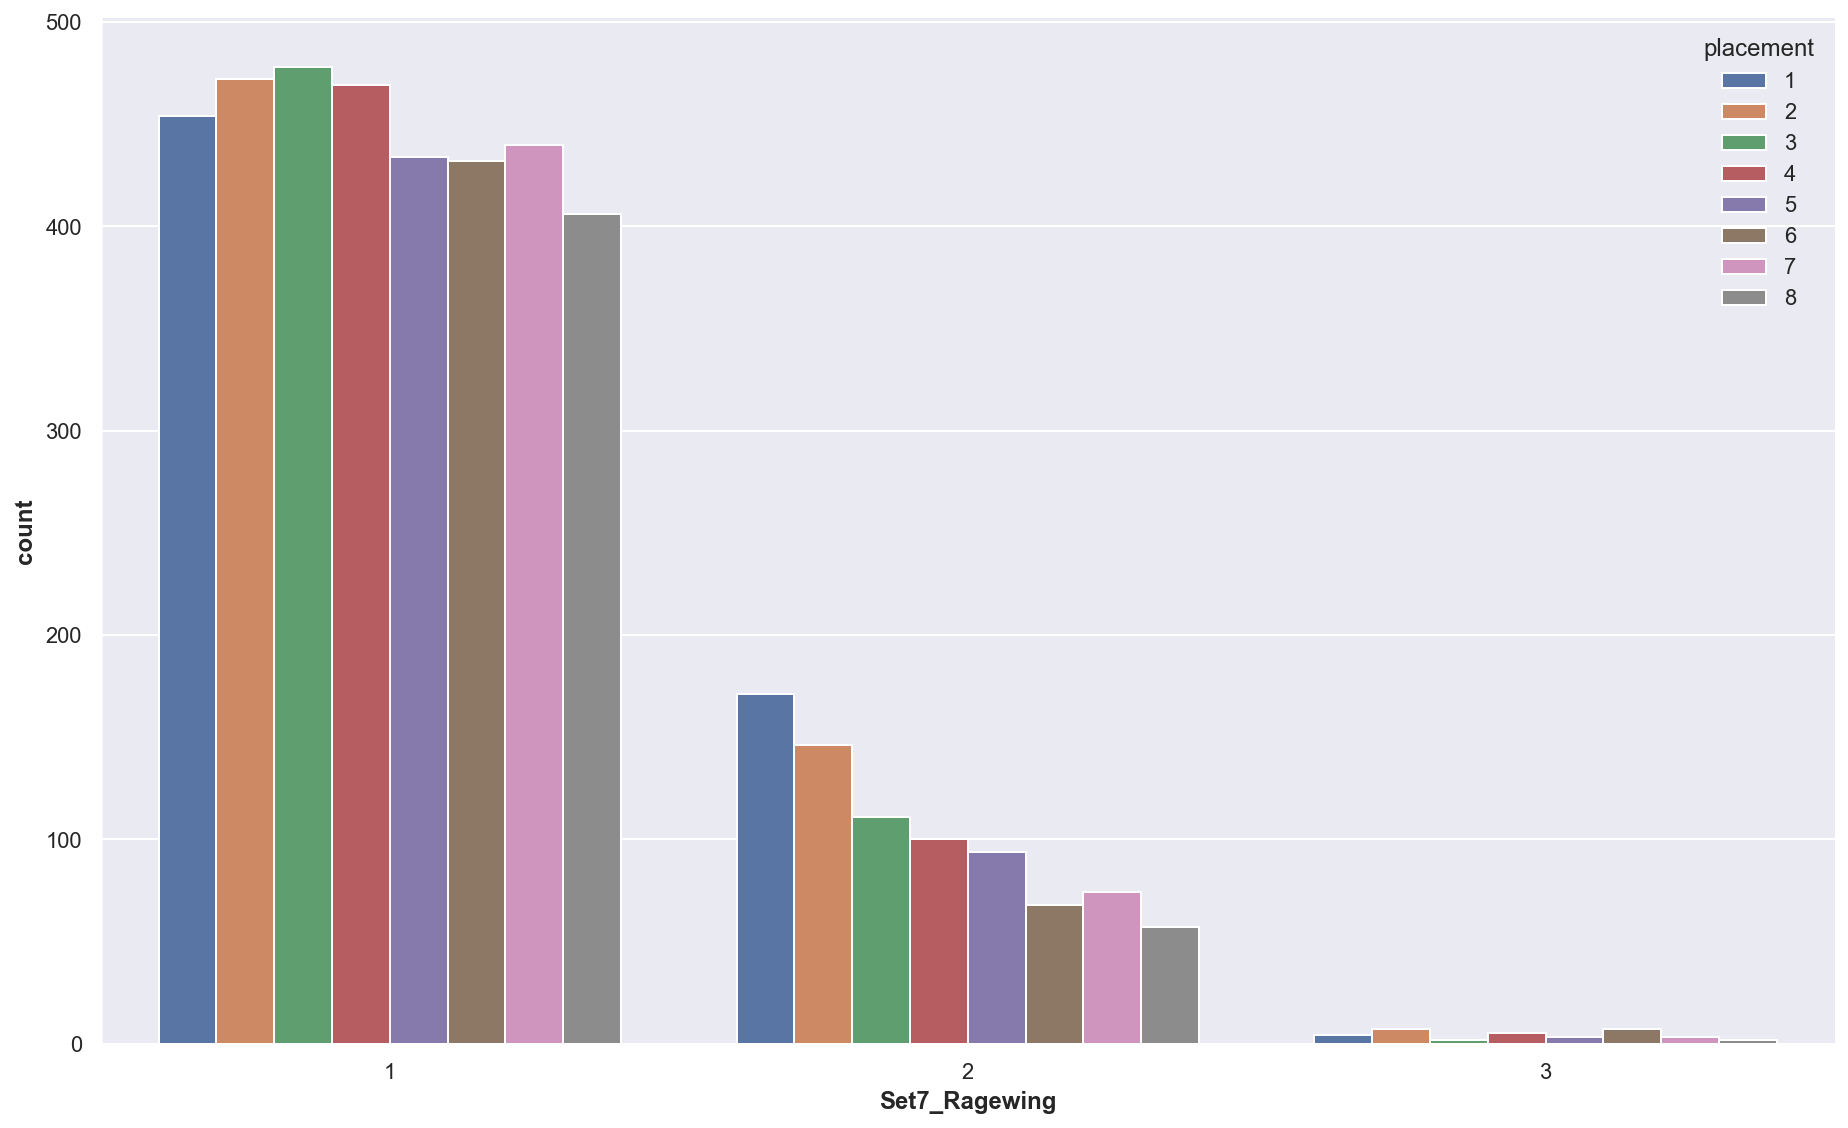

In [939]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Ragewing']>0], x='Set7_Ragewing', hue=TARGETNAME)
sns.despine()

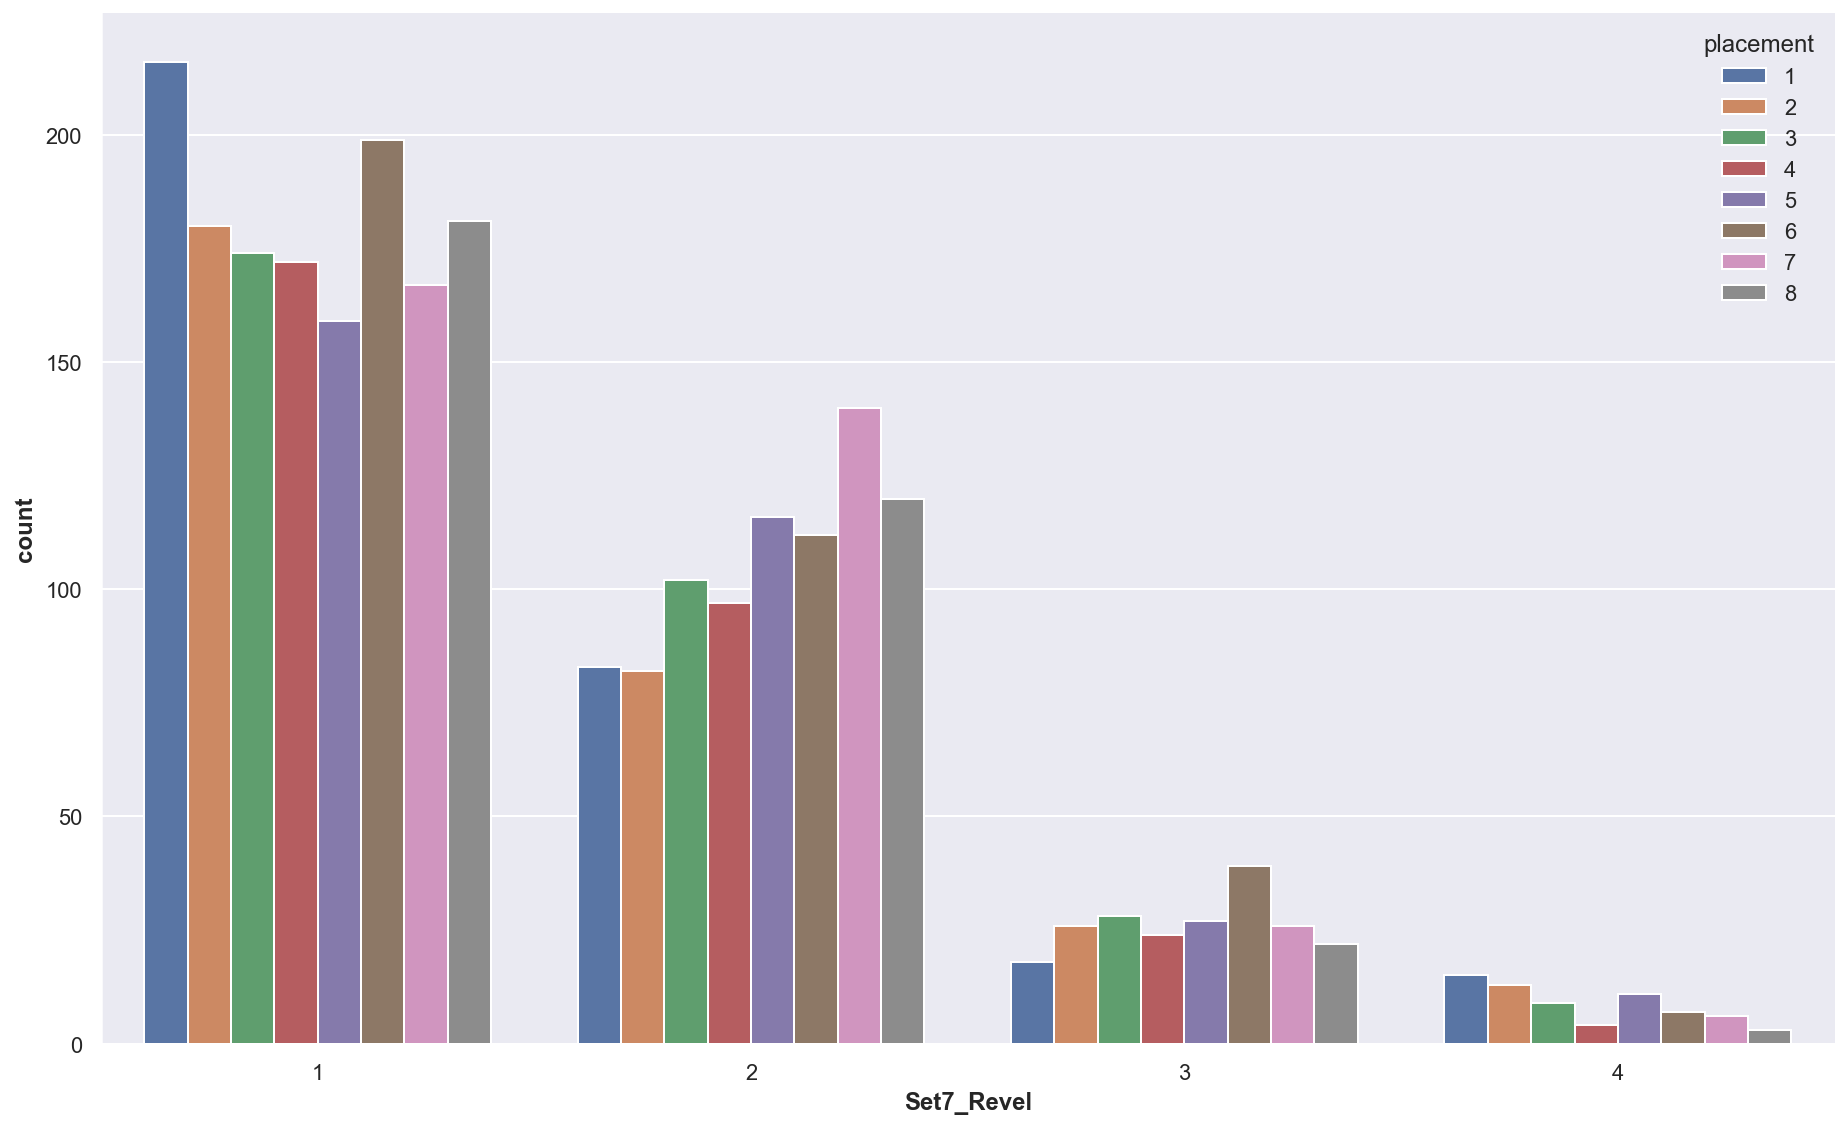

In [940]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Revel']>0], x='Set7_Revel', hue=TARGETNAME)
sns.despine()

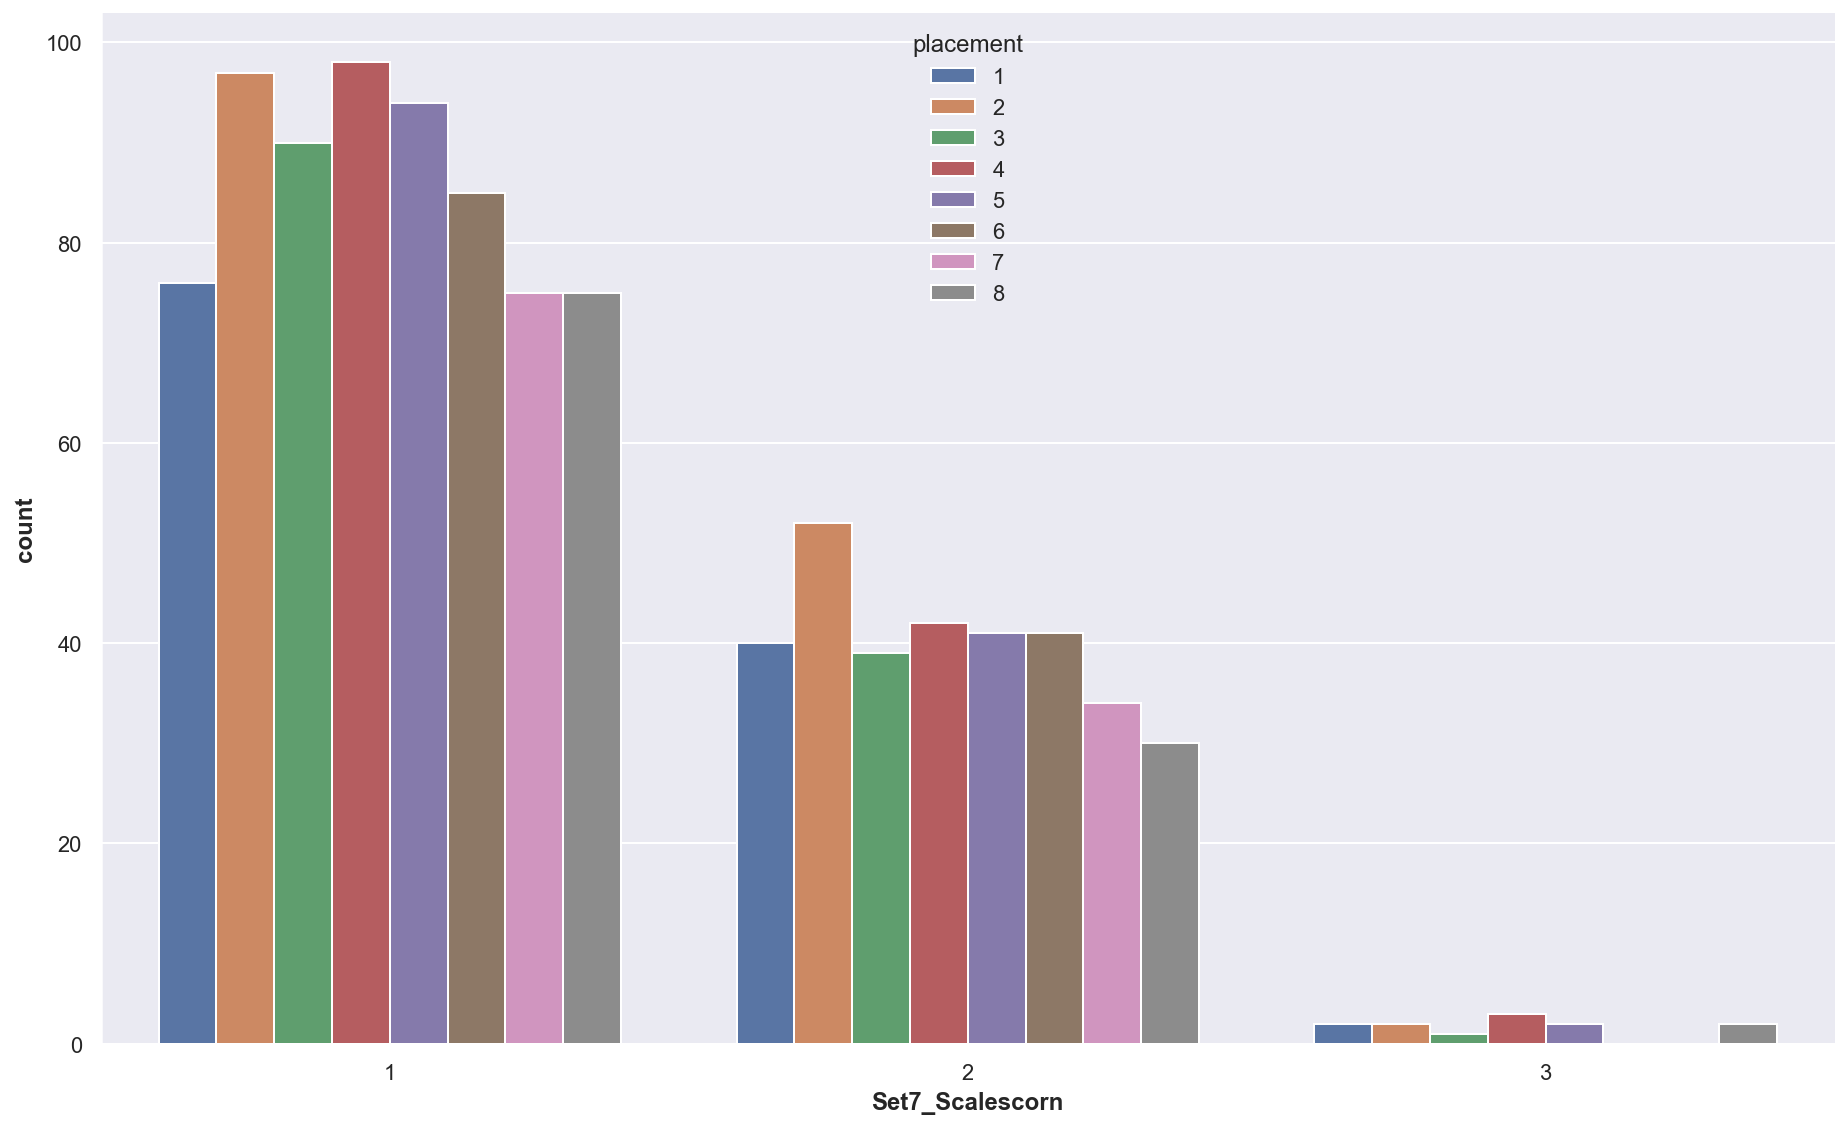

In [941]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Scalescorn']>0], x='Set7_Scalescorn', hue=TARGETNAME)
sns.despine()

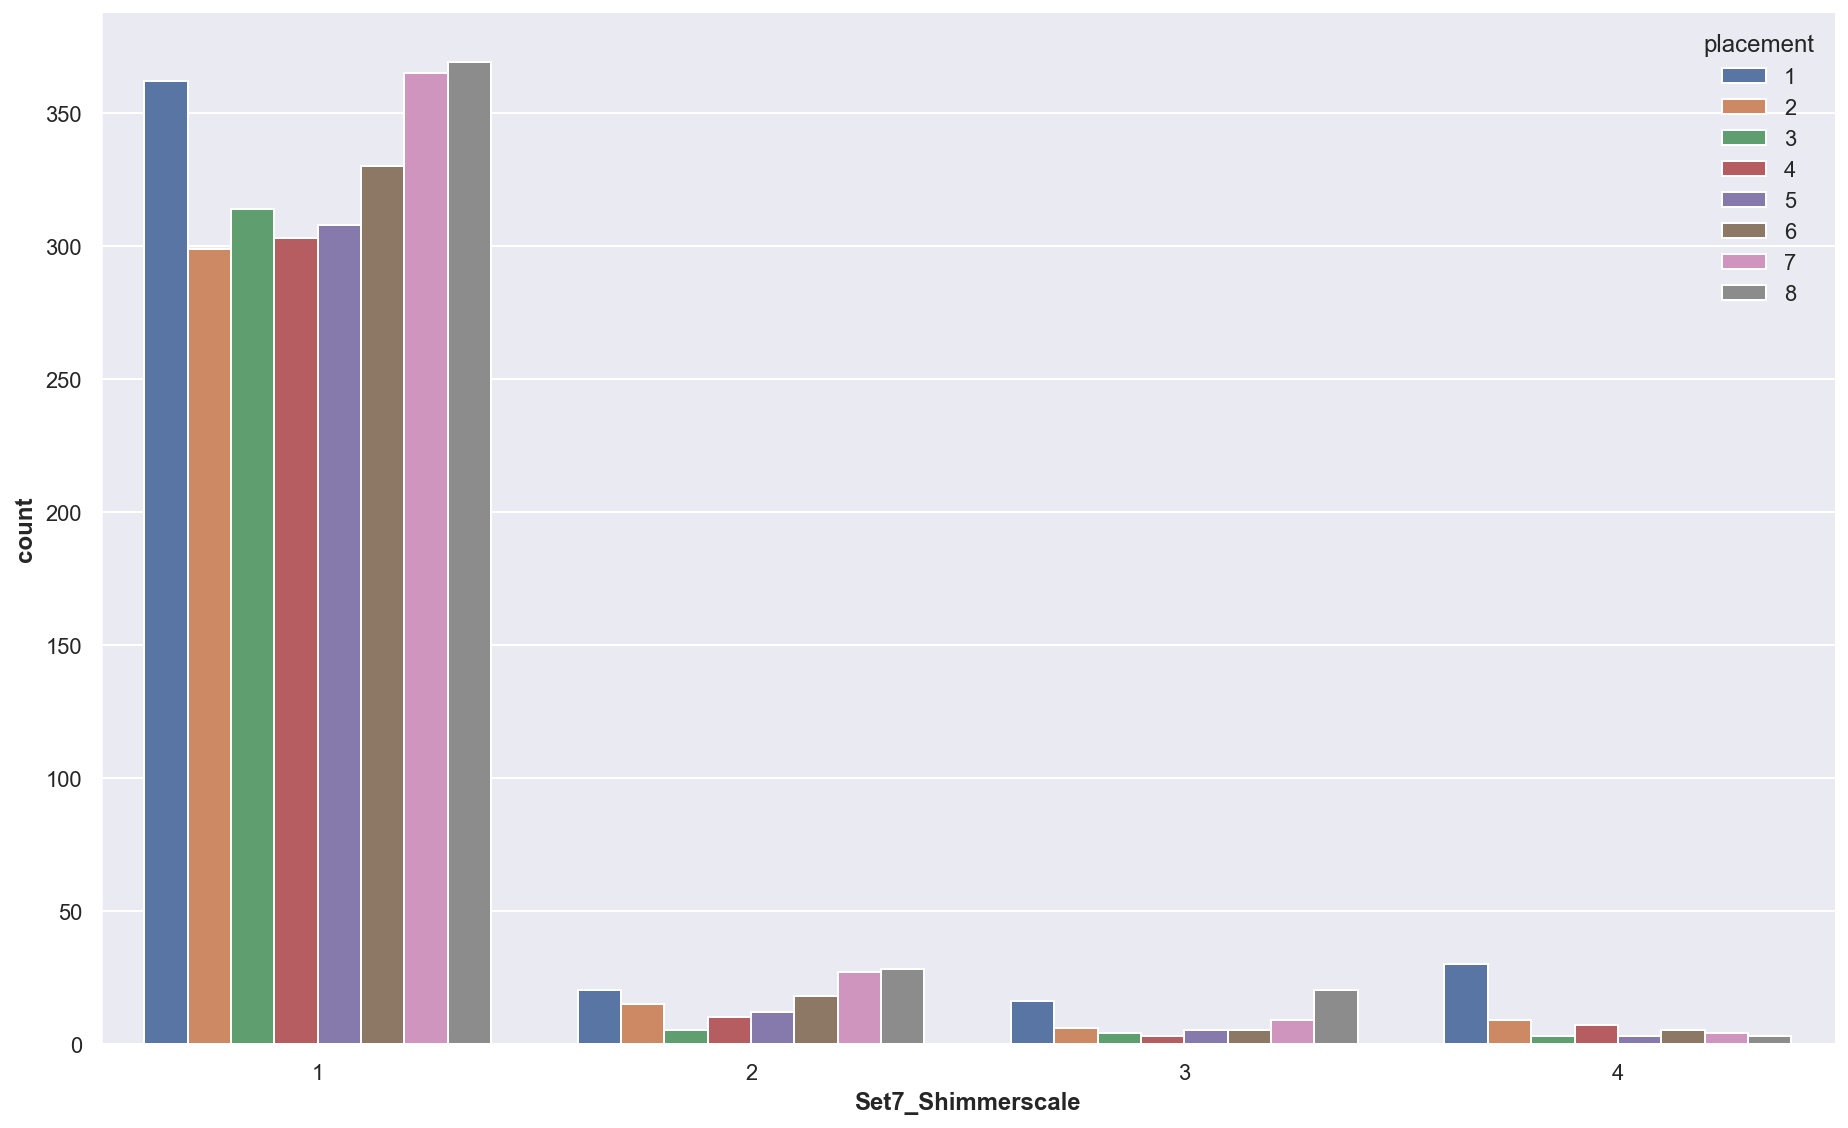

In [942]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shimmerscale']>0], x='Set7_Shimmerscale', hue=TARGETNAME)
sns.despine()

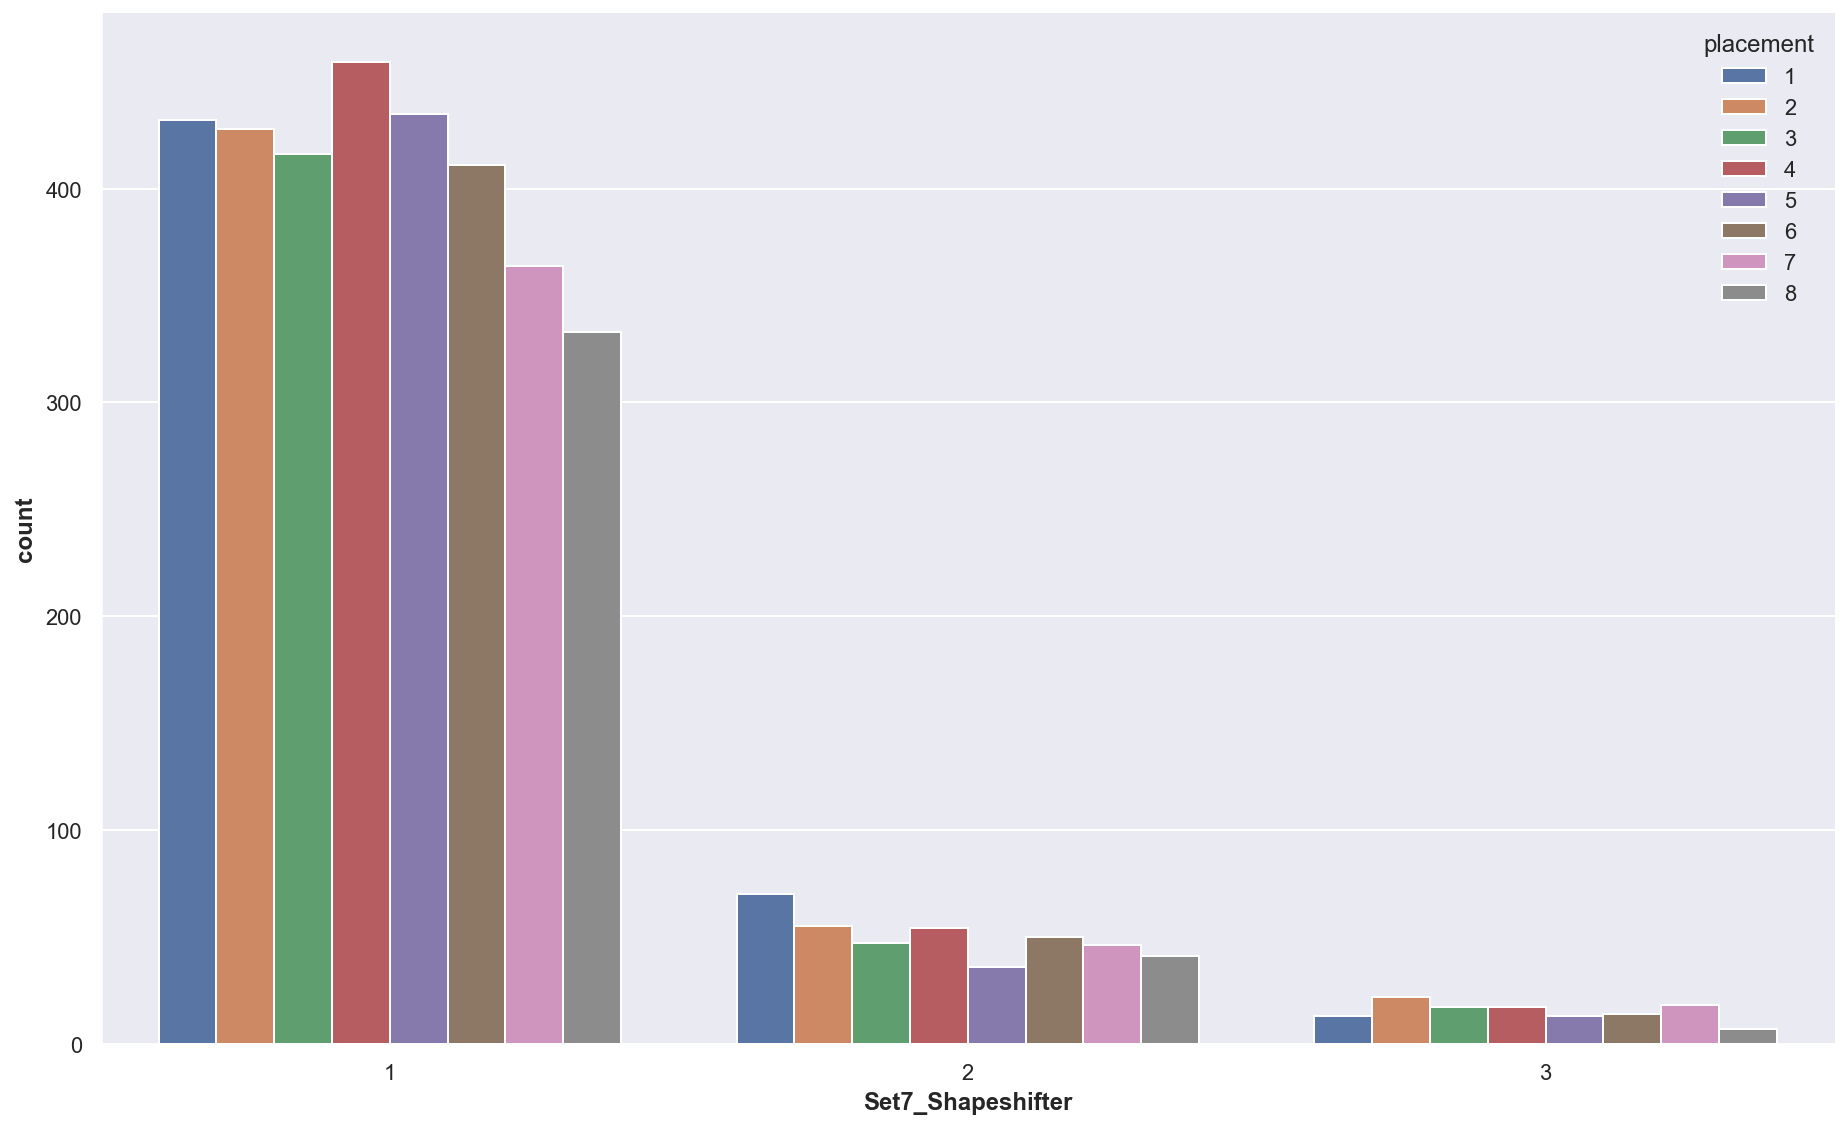

In [943]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Shapeshifter']>0], x='Set7_Shapeshifter', hue=TARGETNAME)
sns.despine()

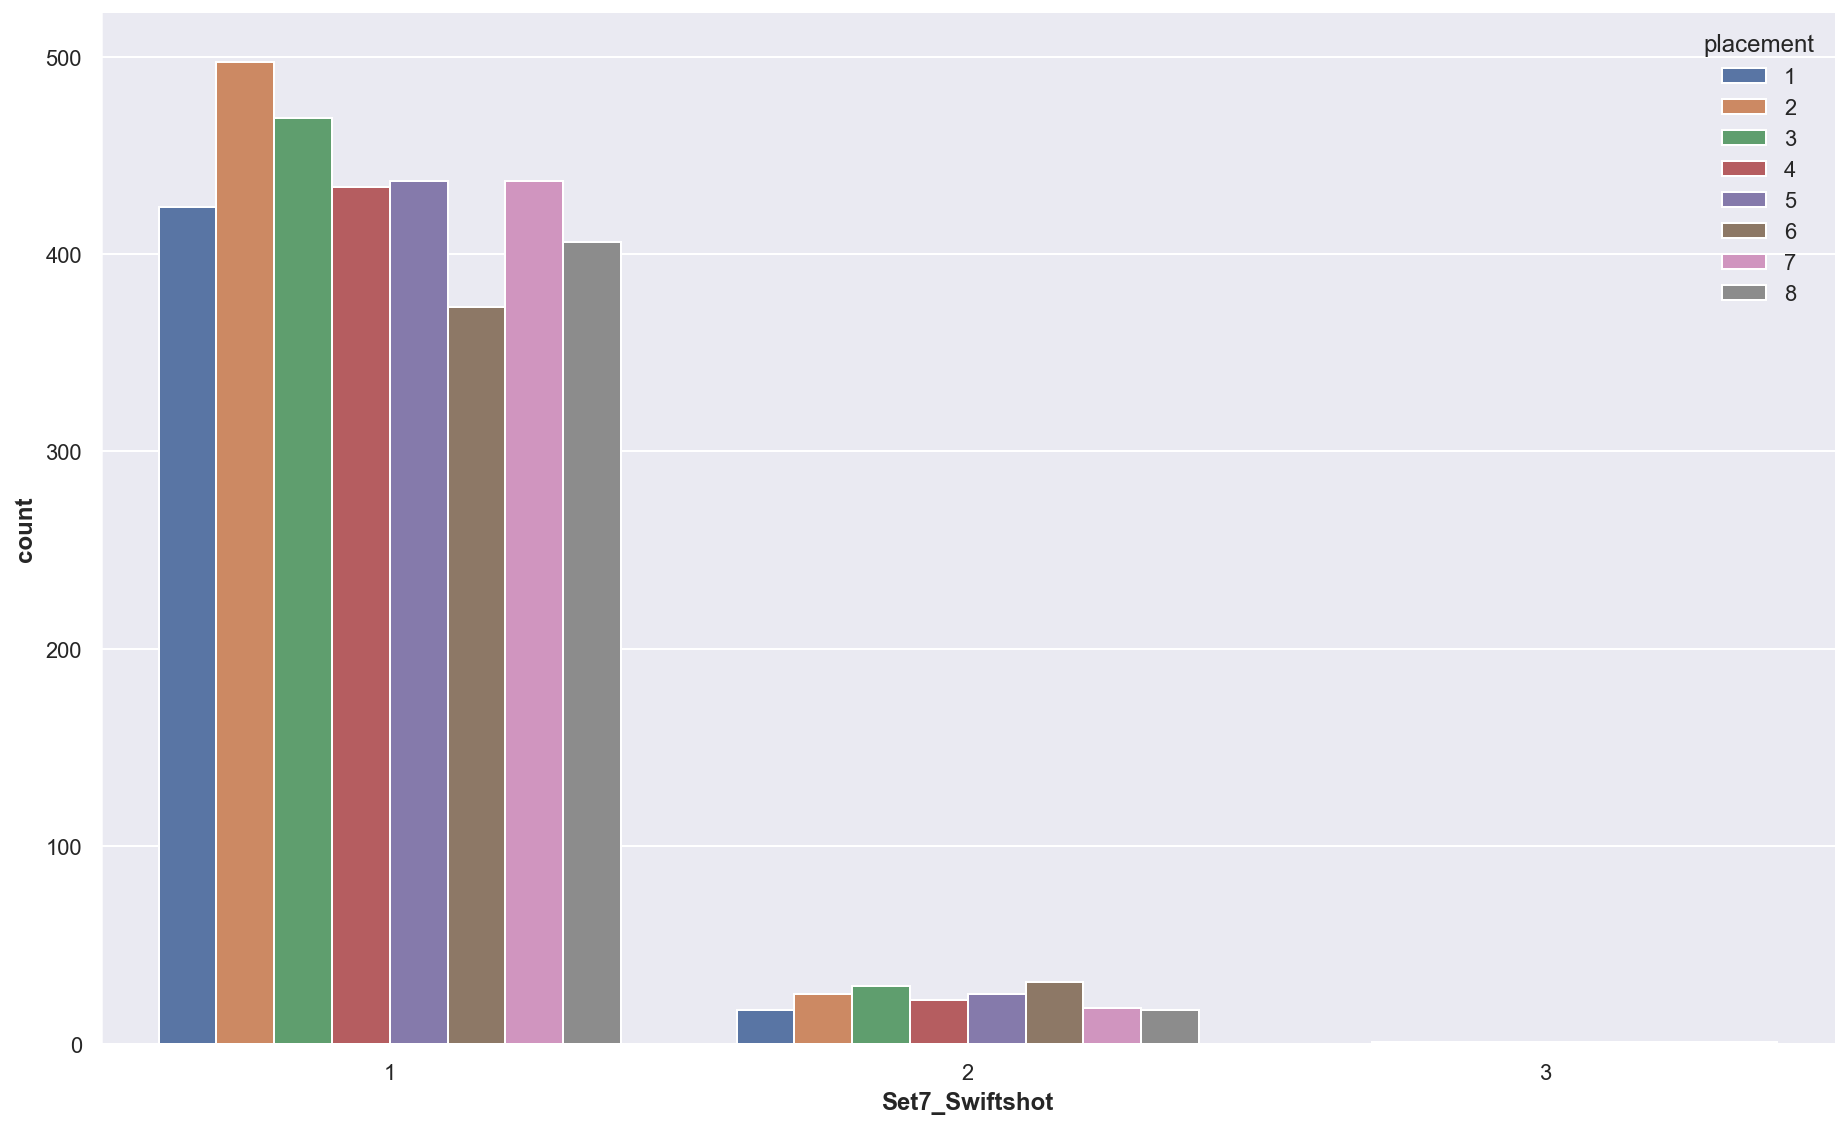

In [944]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Swiftshot']>0], x='Set7_Swiftshot', hue=TARGETNAME)
sns.despine()

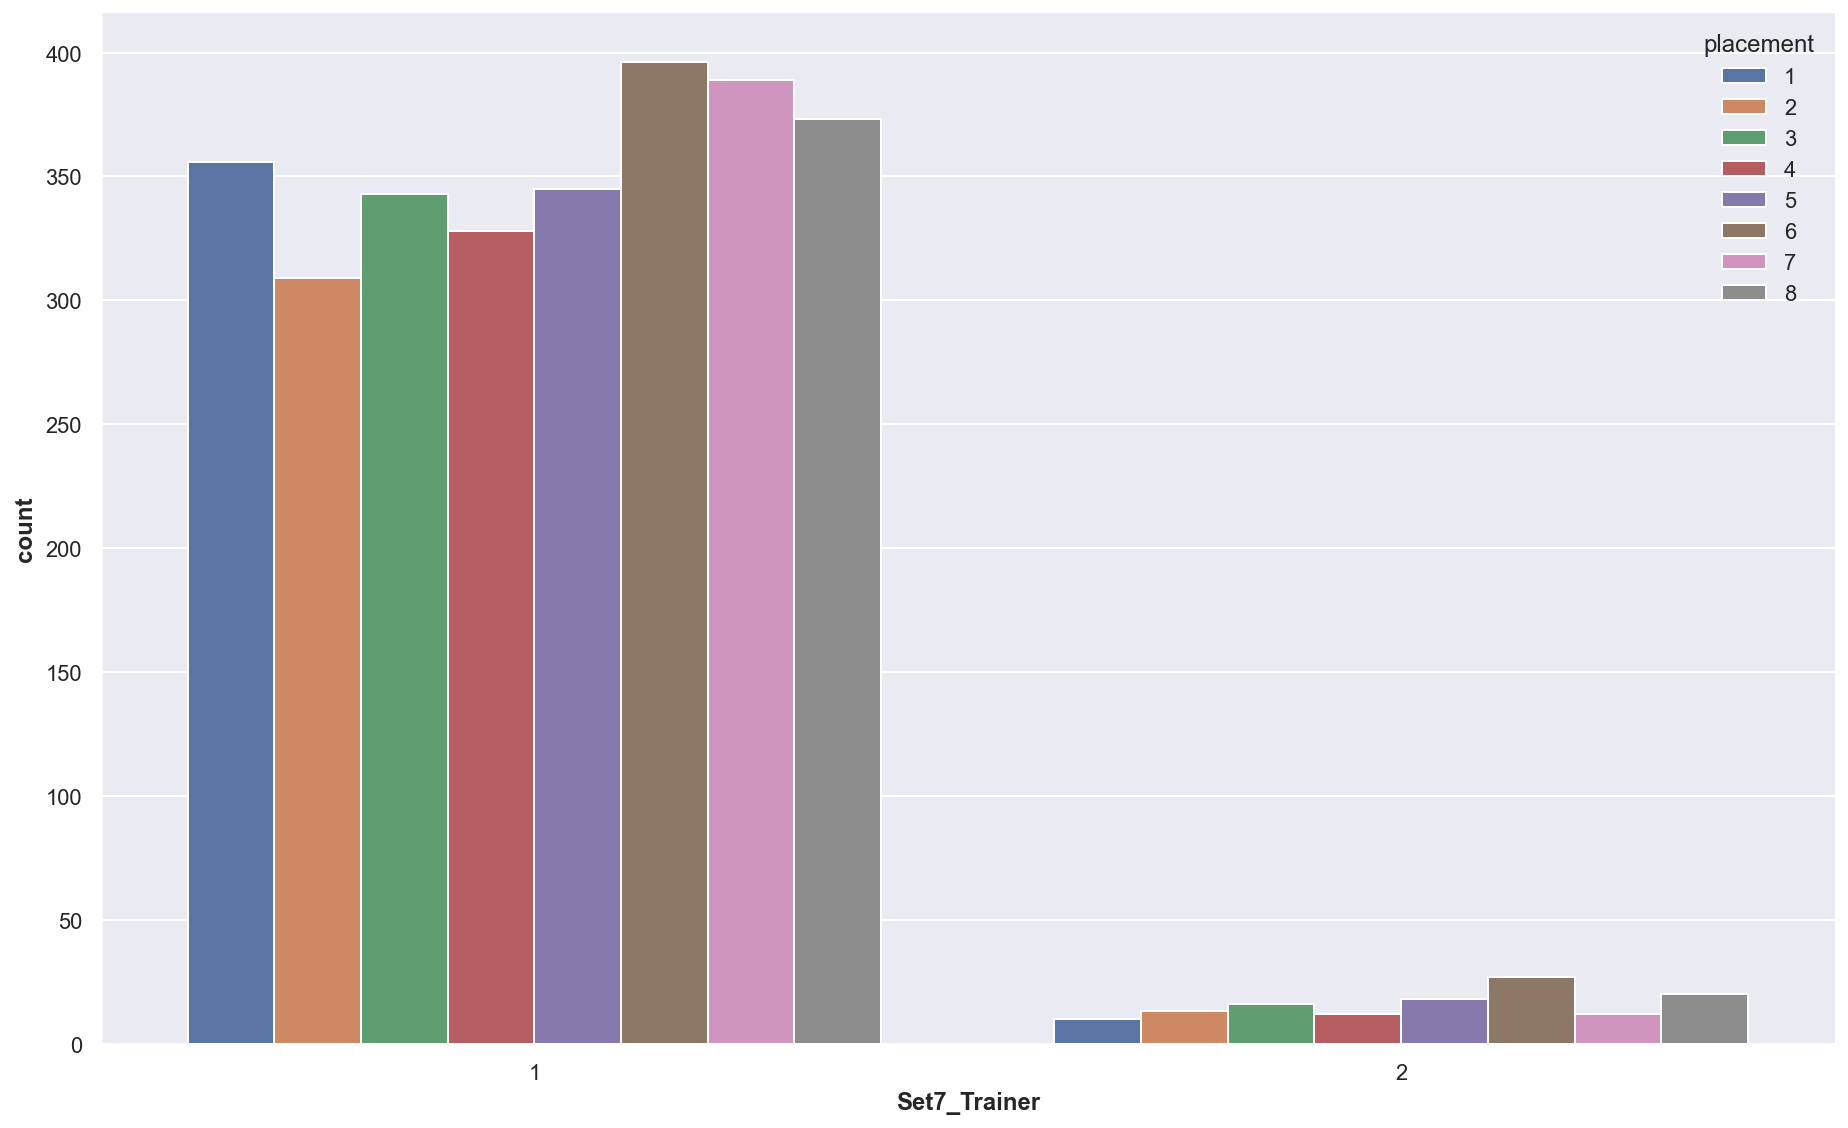

In [945]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Trainer']>0], x='Set7_Trainer', hue=TARGETNAME)
sns.despine()

This trait show the highest correlation in placement.

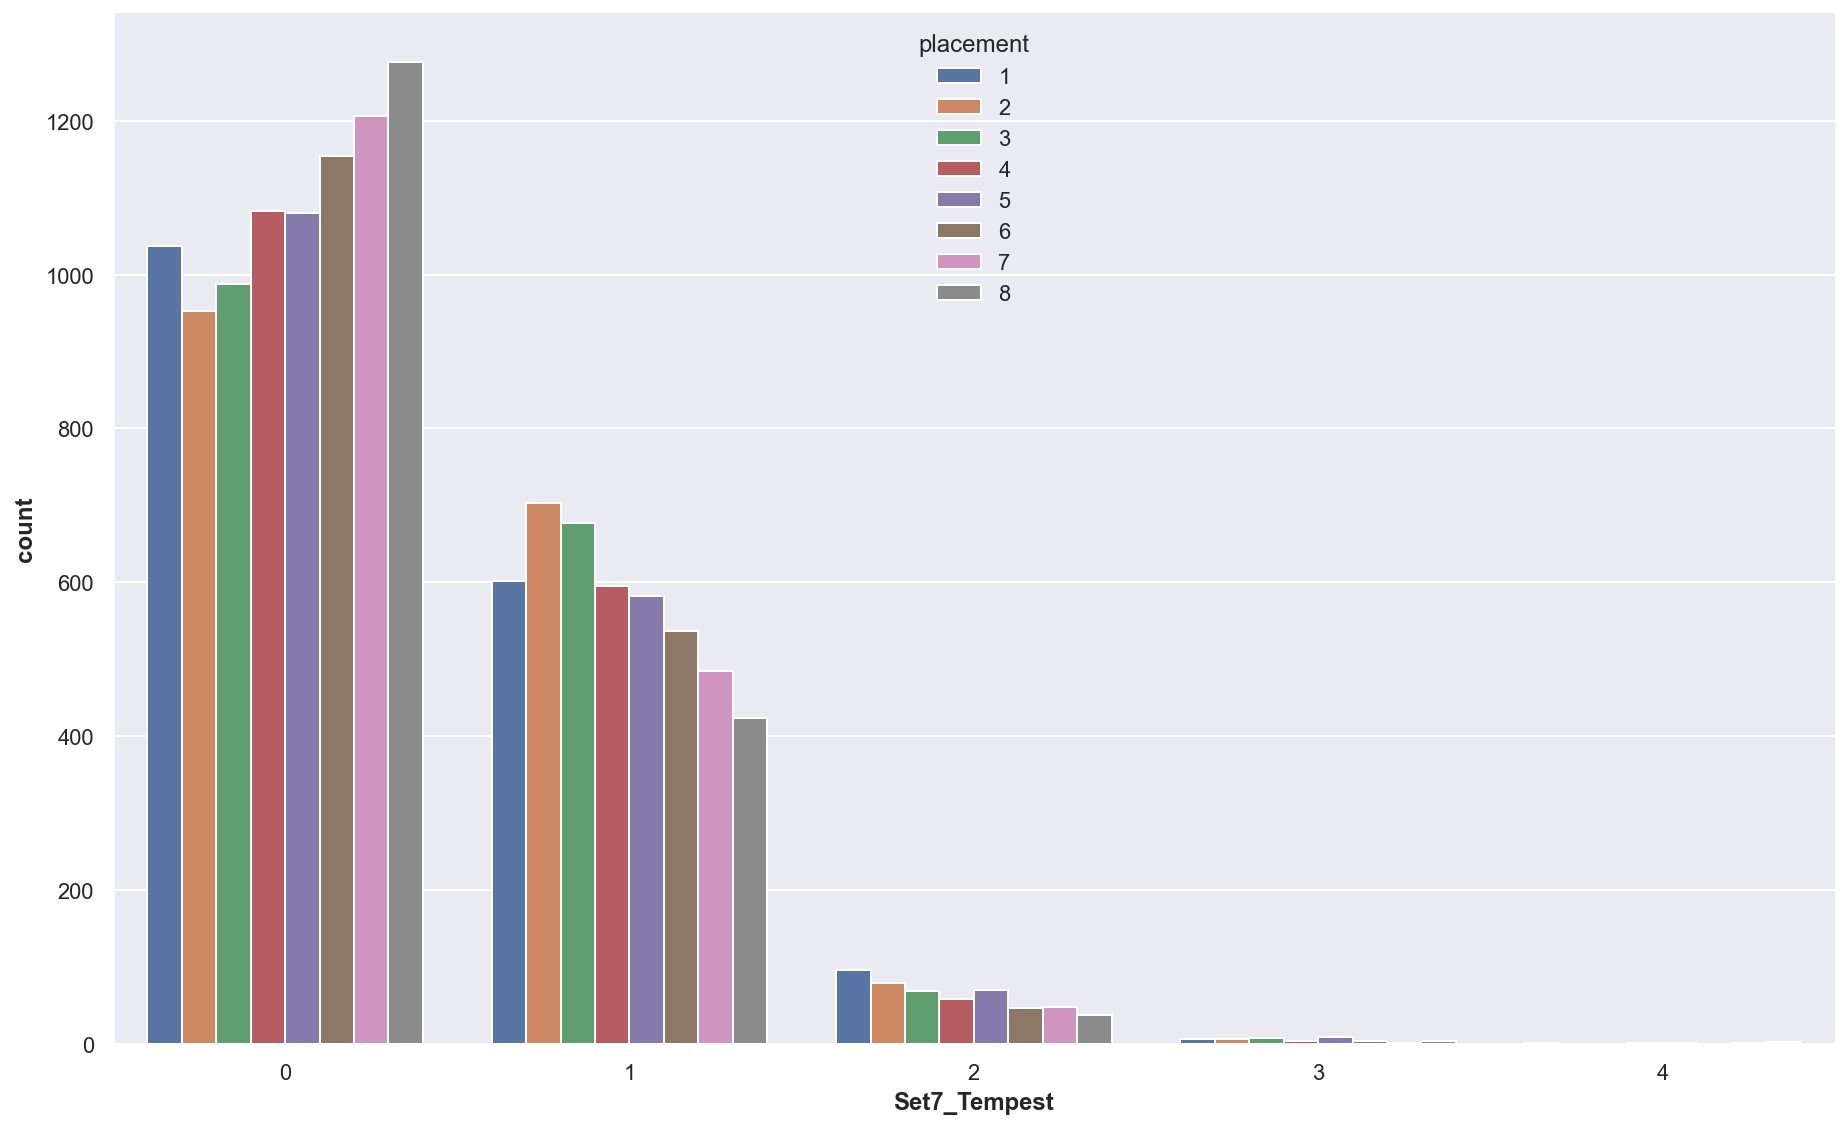

In [946]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Tempest']>=0], x='Set7_Tempest', hue=TARGETNAME)
sns.despine()

Stronger correlation at trait lvl 1.

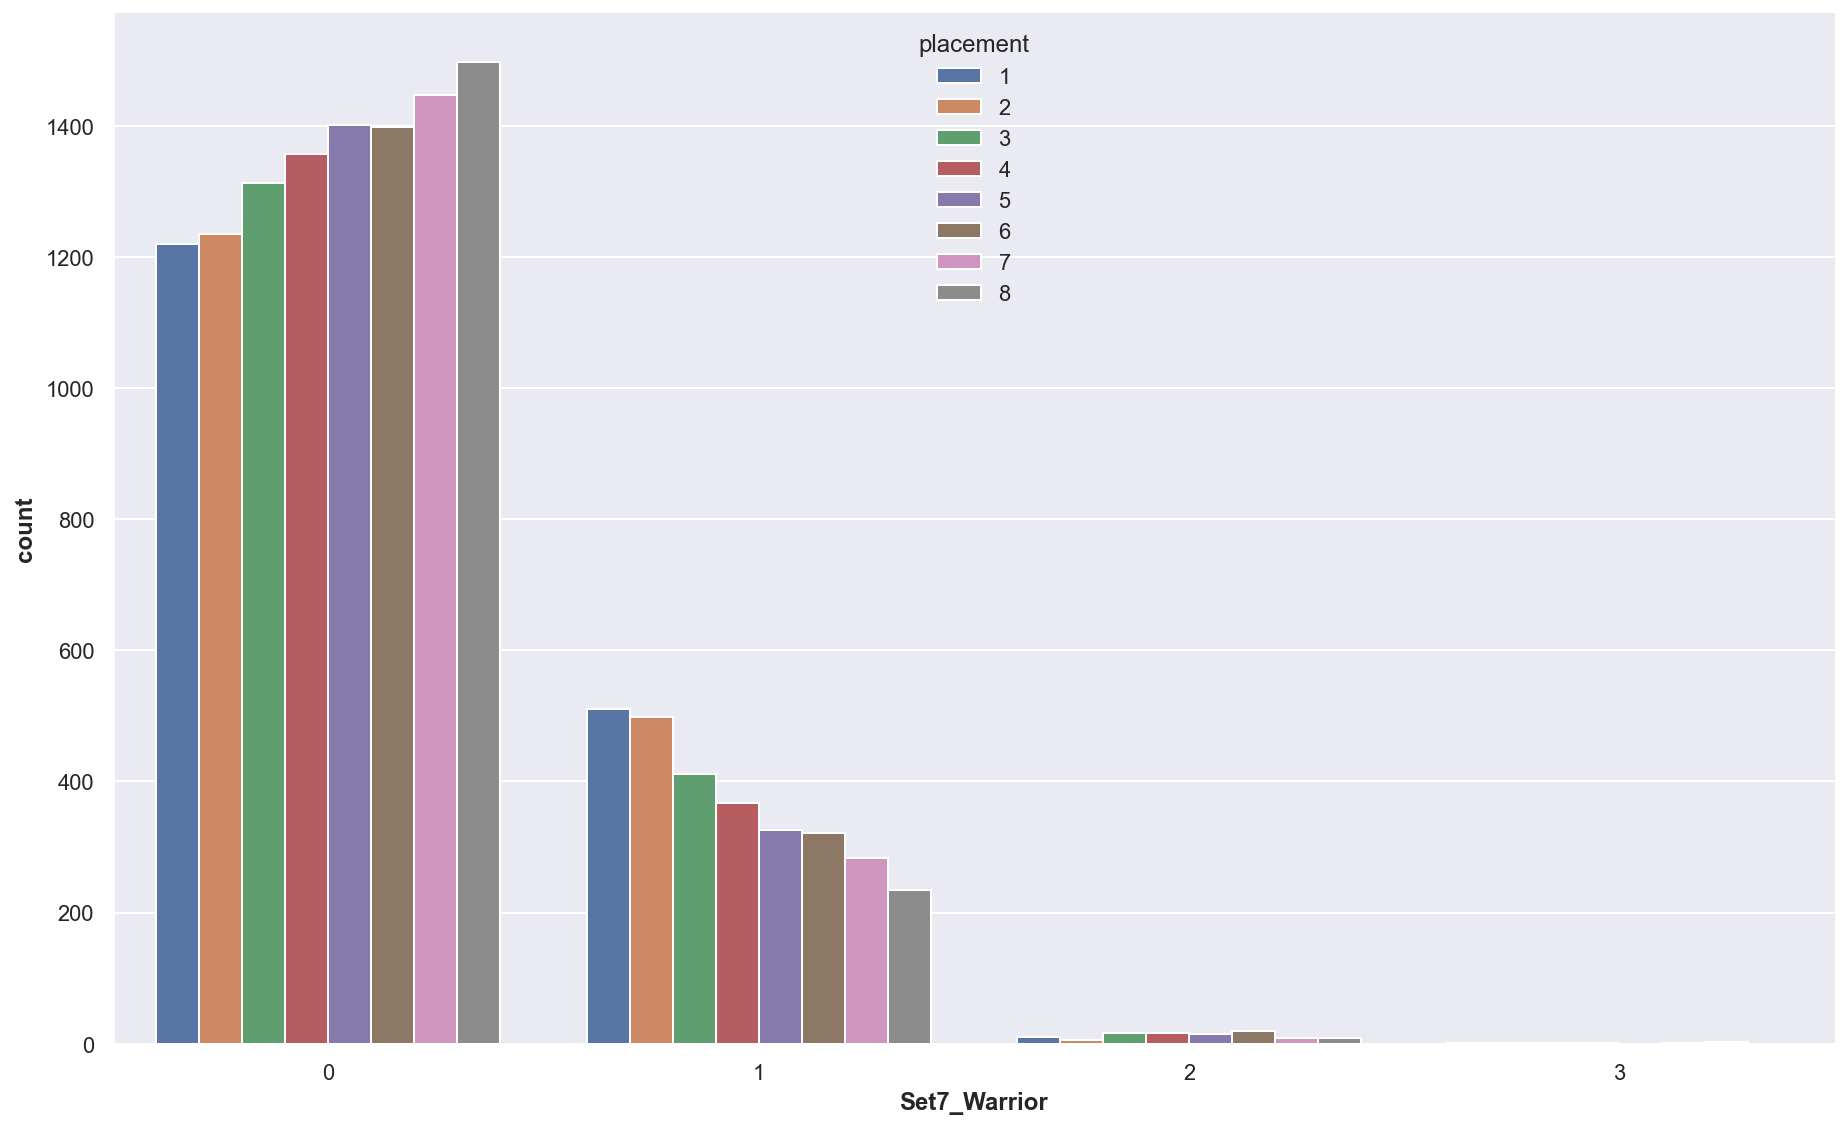

In [947]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Warrior']>=0], x='Set7_Warrior', hue=TARGETNAME)
sns.despine()

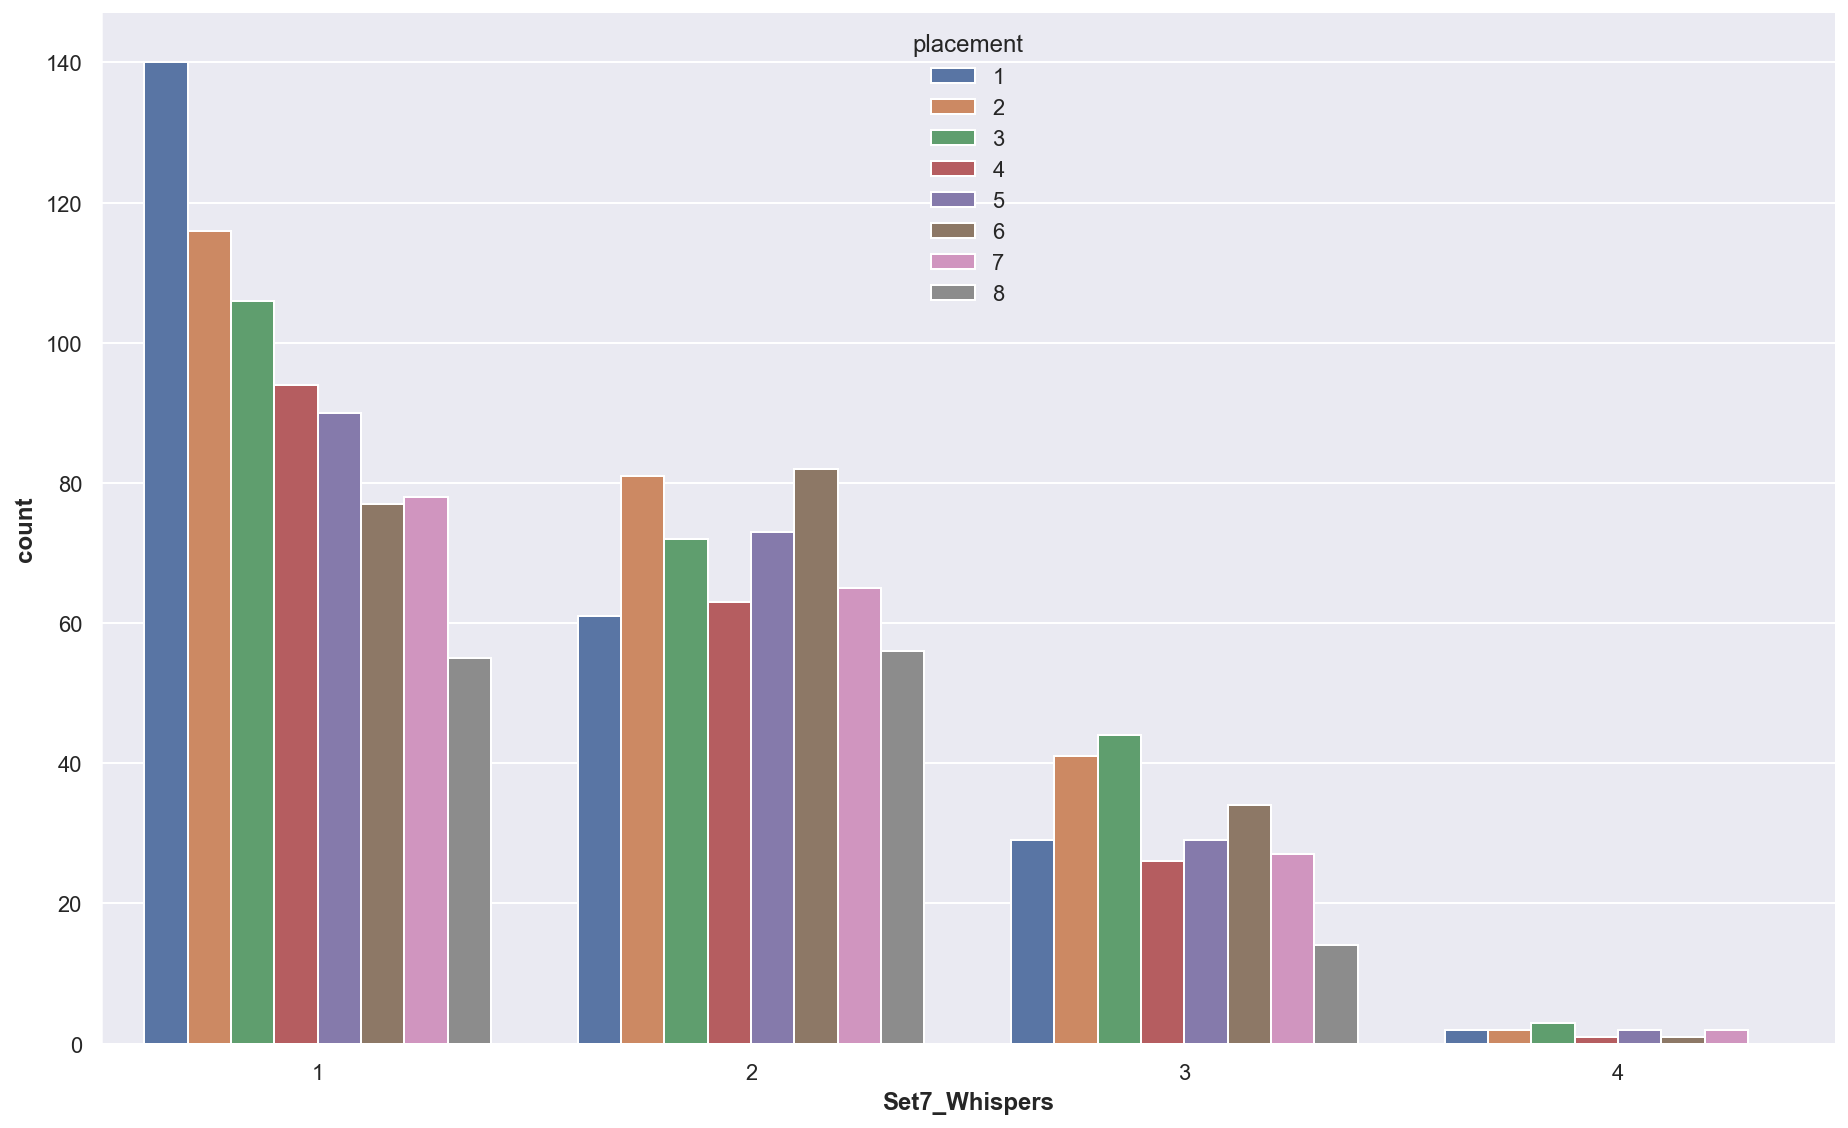

In [948]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['Set7_Whispers']>0], x='Set7_Whispers', hue=TARGETNAME)
sns.despine()

## Units

Best unit in TFT Yasuo. DIESOFYASUO

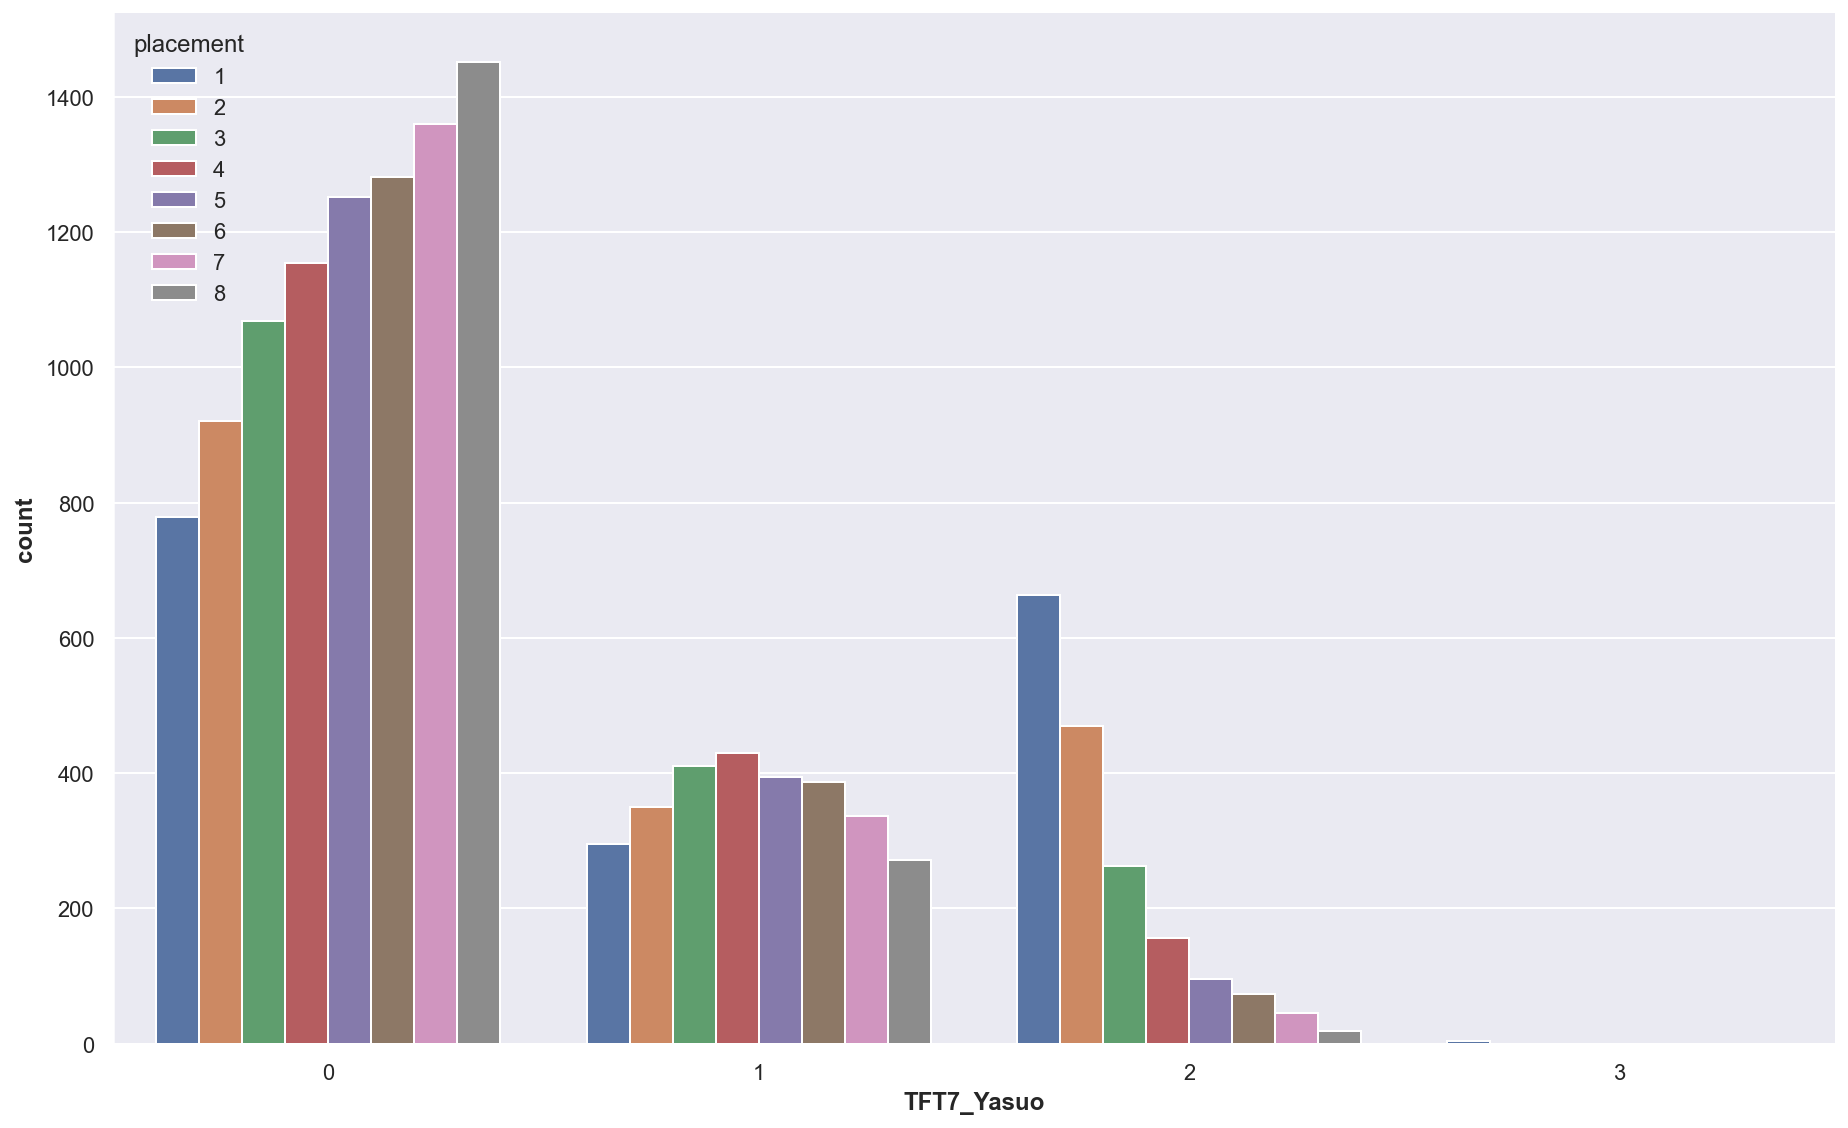

In [949]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Yasuo', hue=TARGETNAME)
sns.despine()

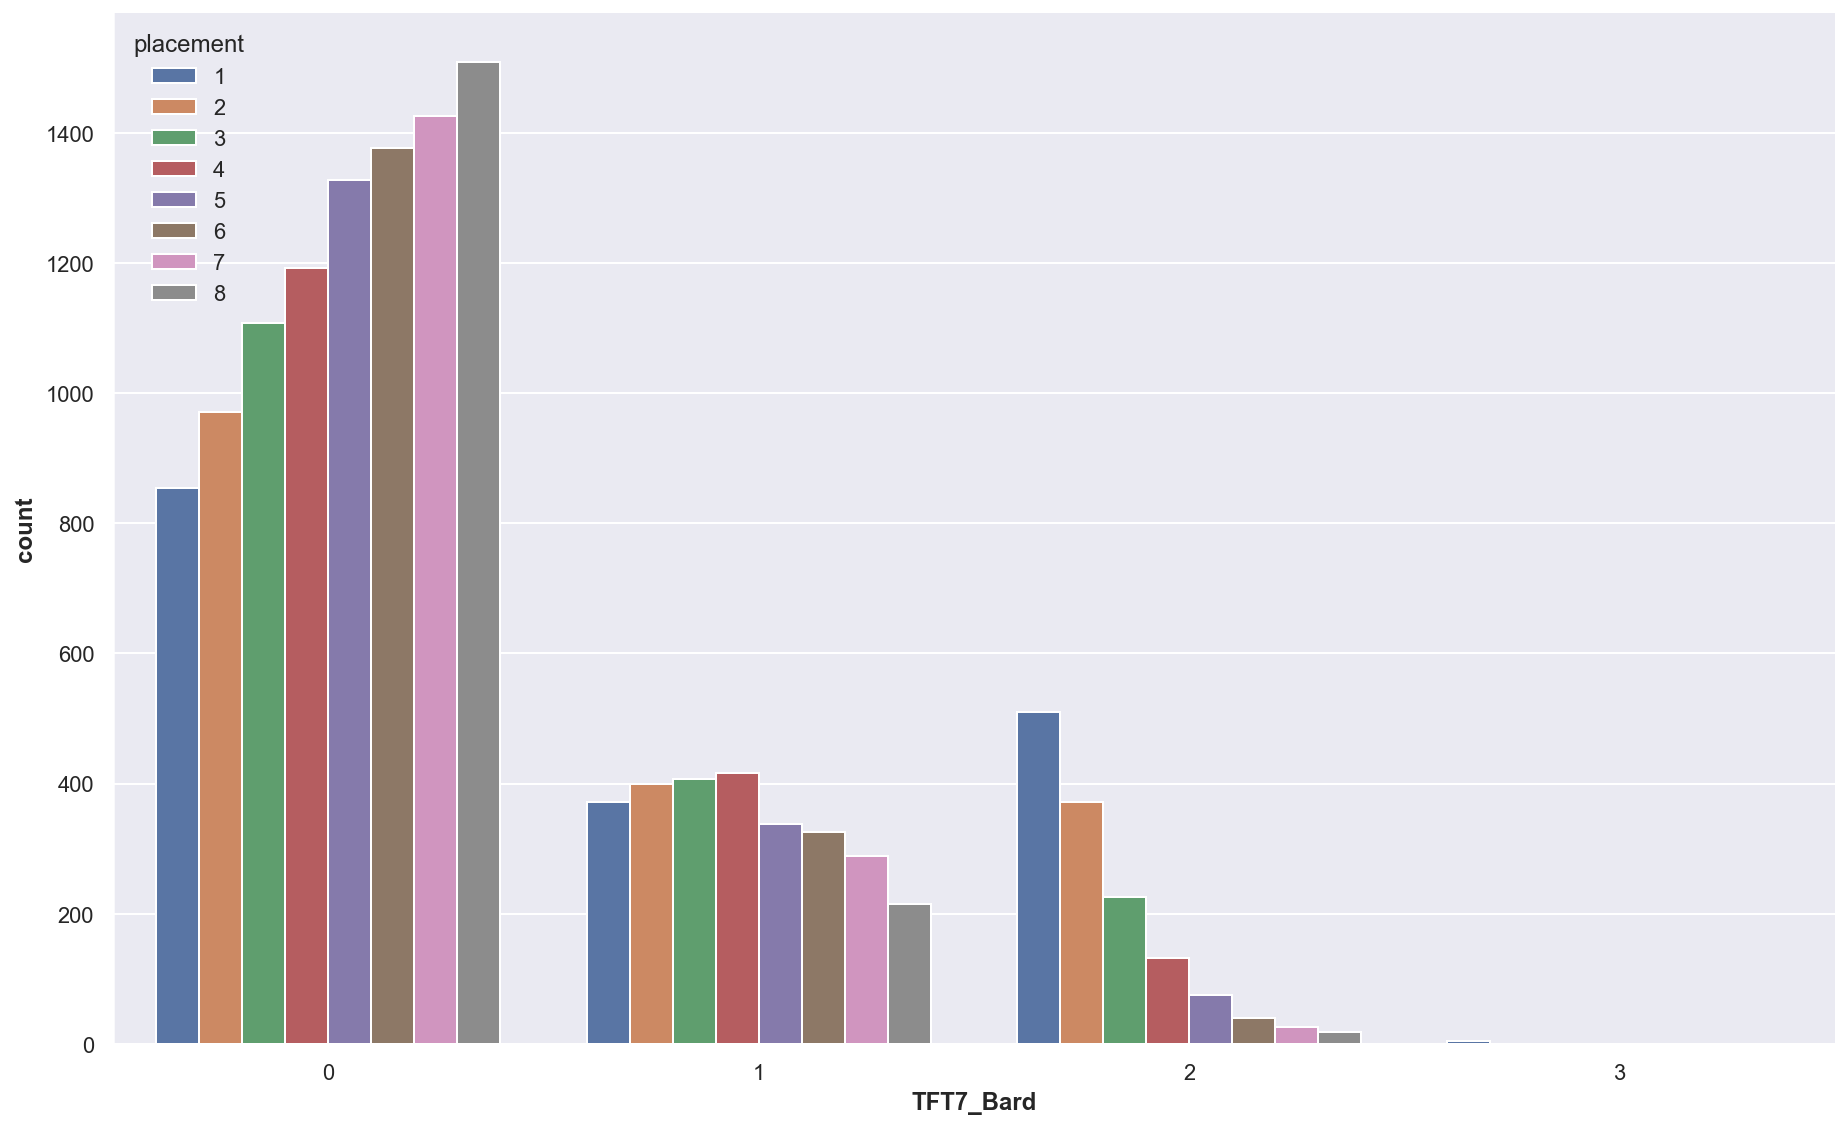

In [950]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Bard', hue=TARGETNAME)
sns.despine()

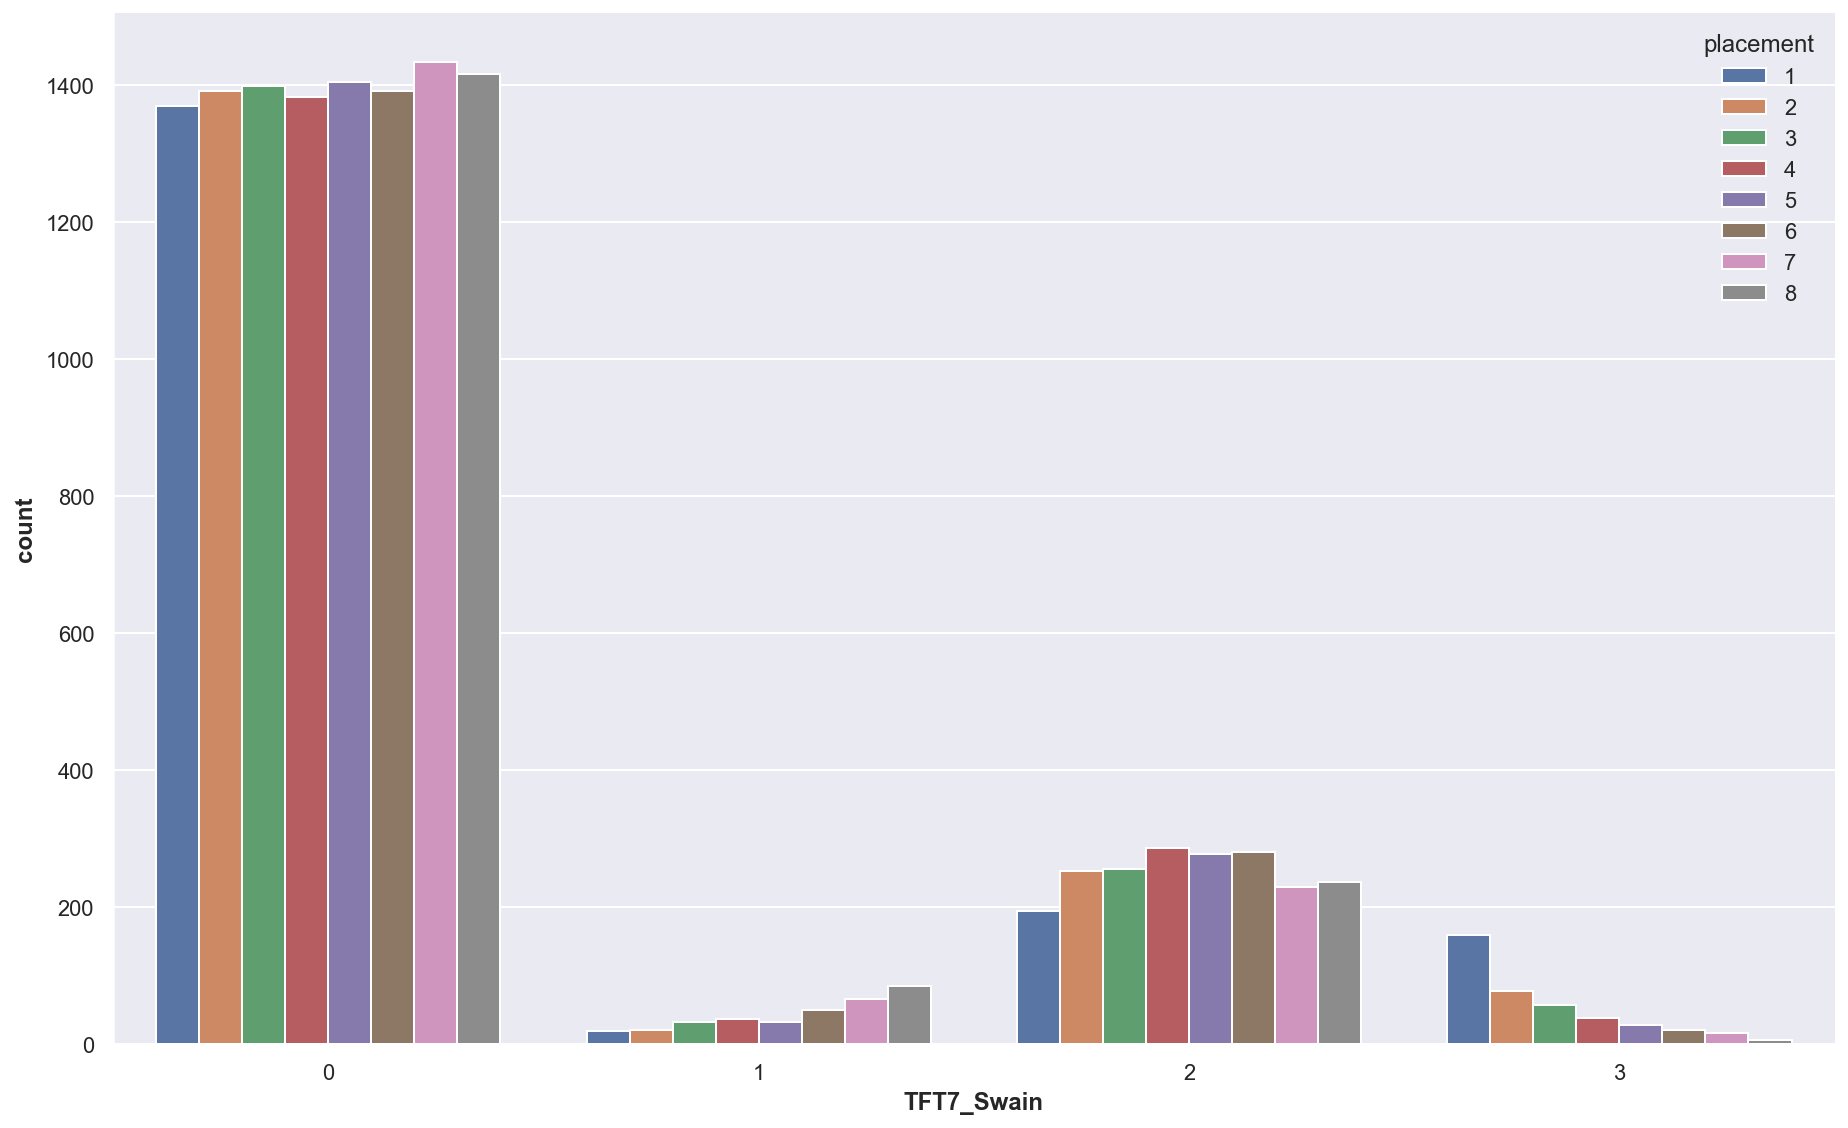

In [951]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df, x='TFT7_Swain', hue=TARGETNAME)
sns.despine()

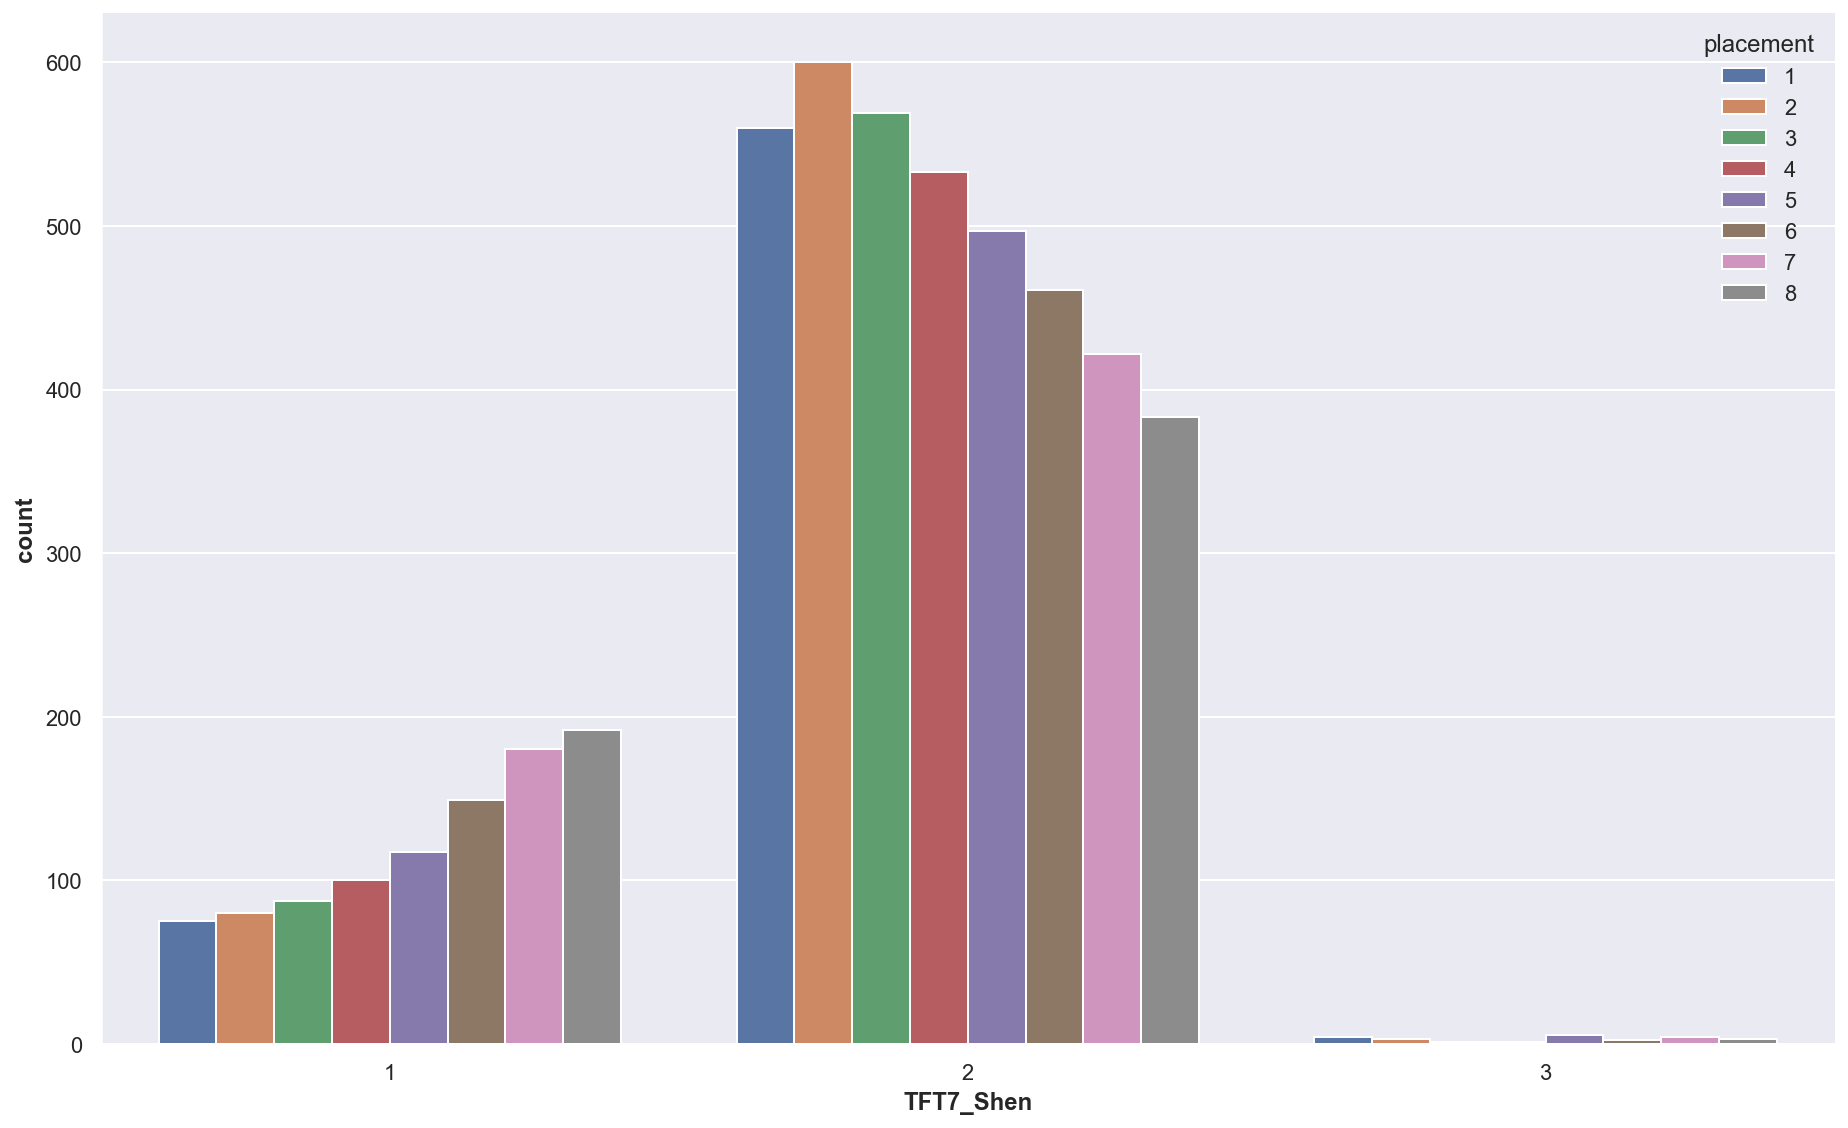

In [952]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shen']>0], x='TFT7_Shen', hue=TARGETNAME)
sns.despine()

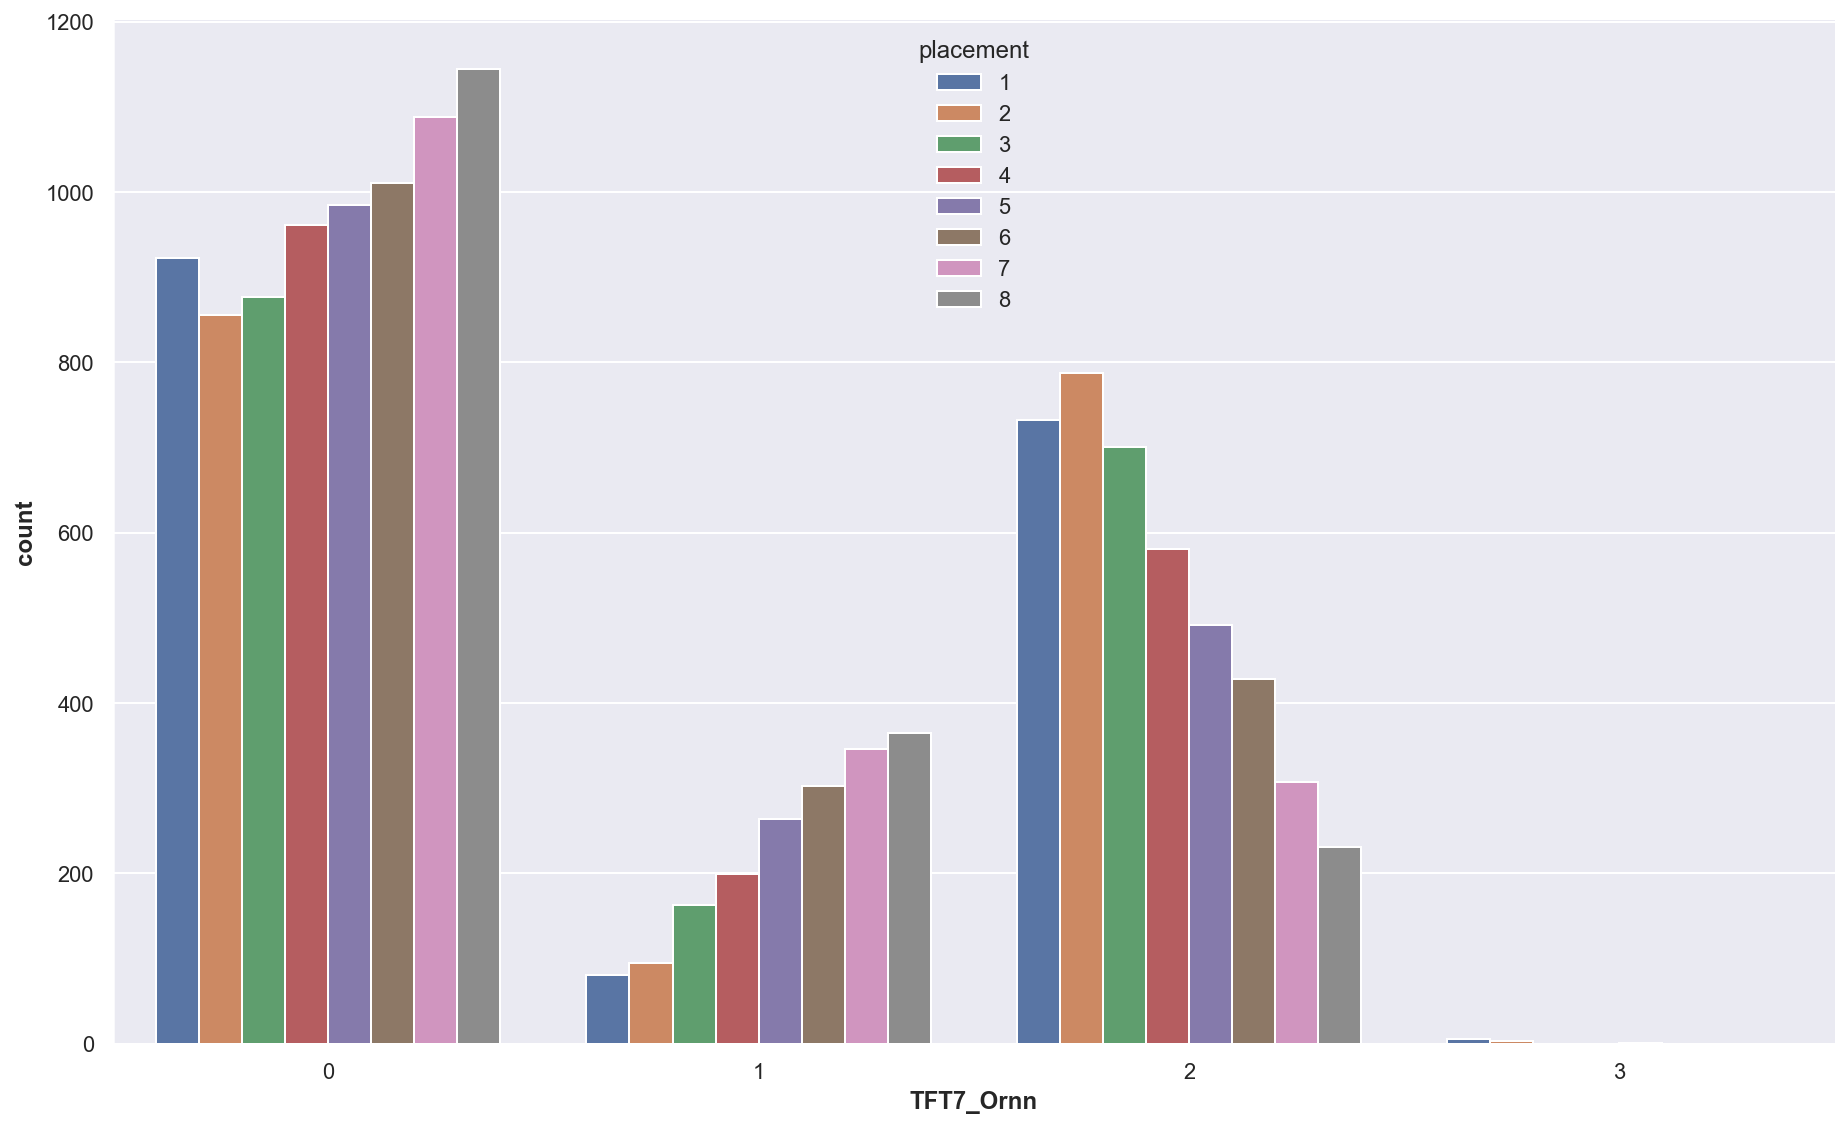

In [953]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ornn']>=0], x='TFT7_Ornn', hue=TARGETNAME)
sns.despine()

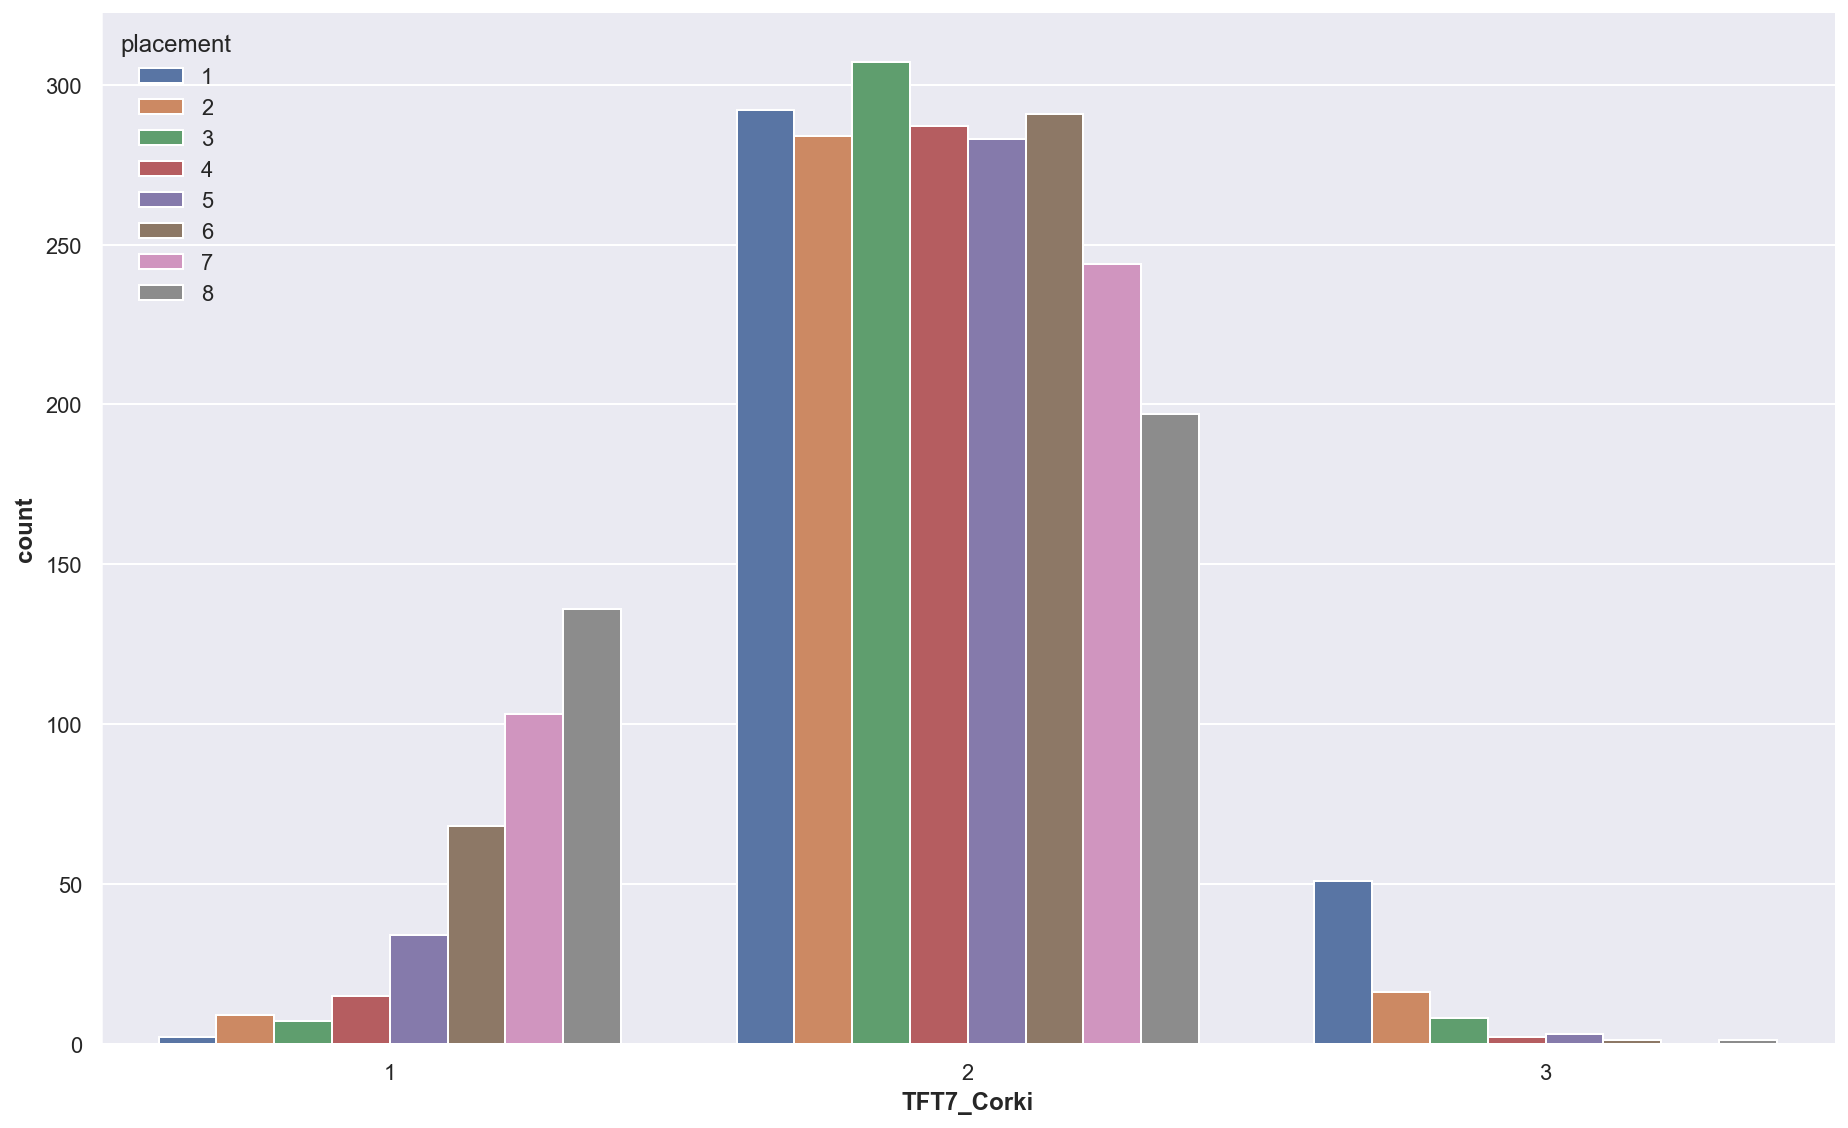

In [954]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Corki']>0], x='TFT7_Corki', hue=TARGETNAME)
sns.despine()

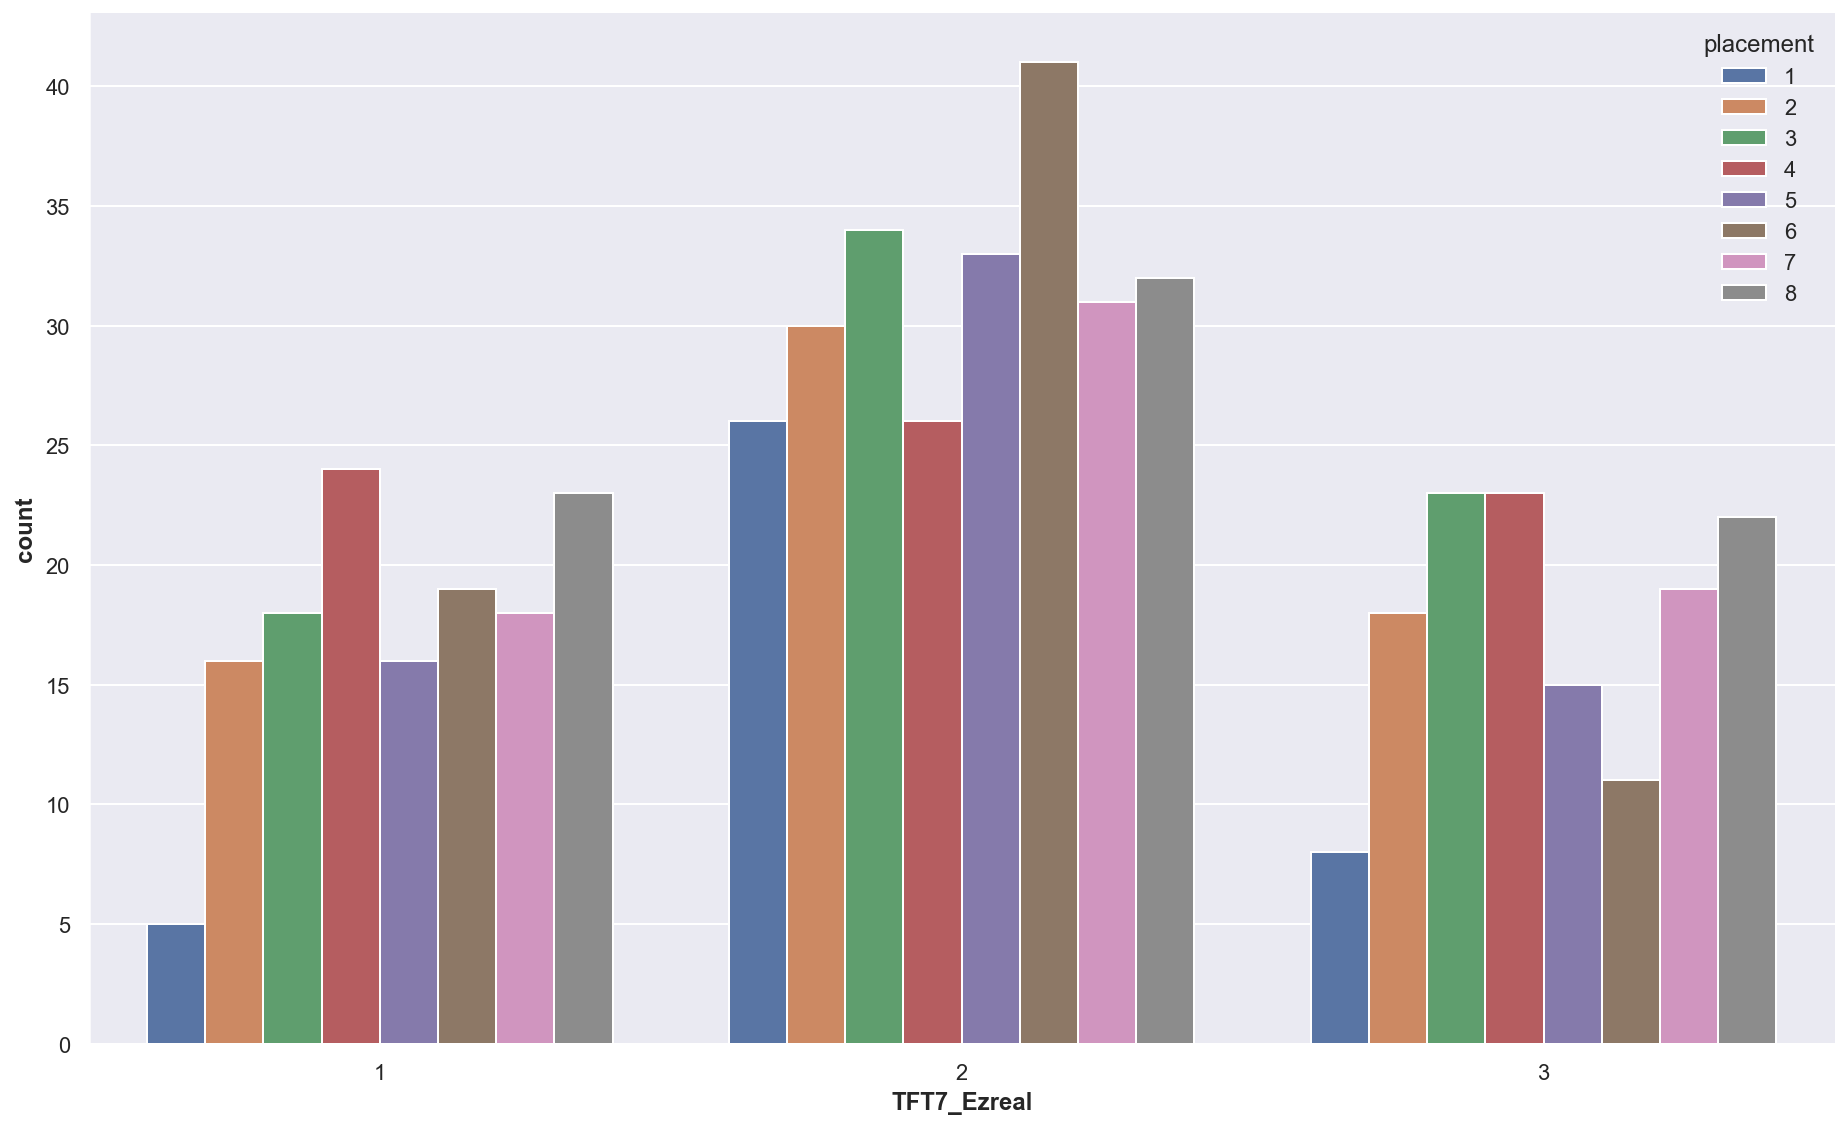

In [955]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Ezreal']>0], x='TFT7_Ezreal', hue=TARGETNAME)
sns.despine()

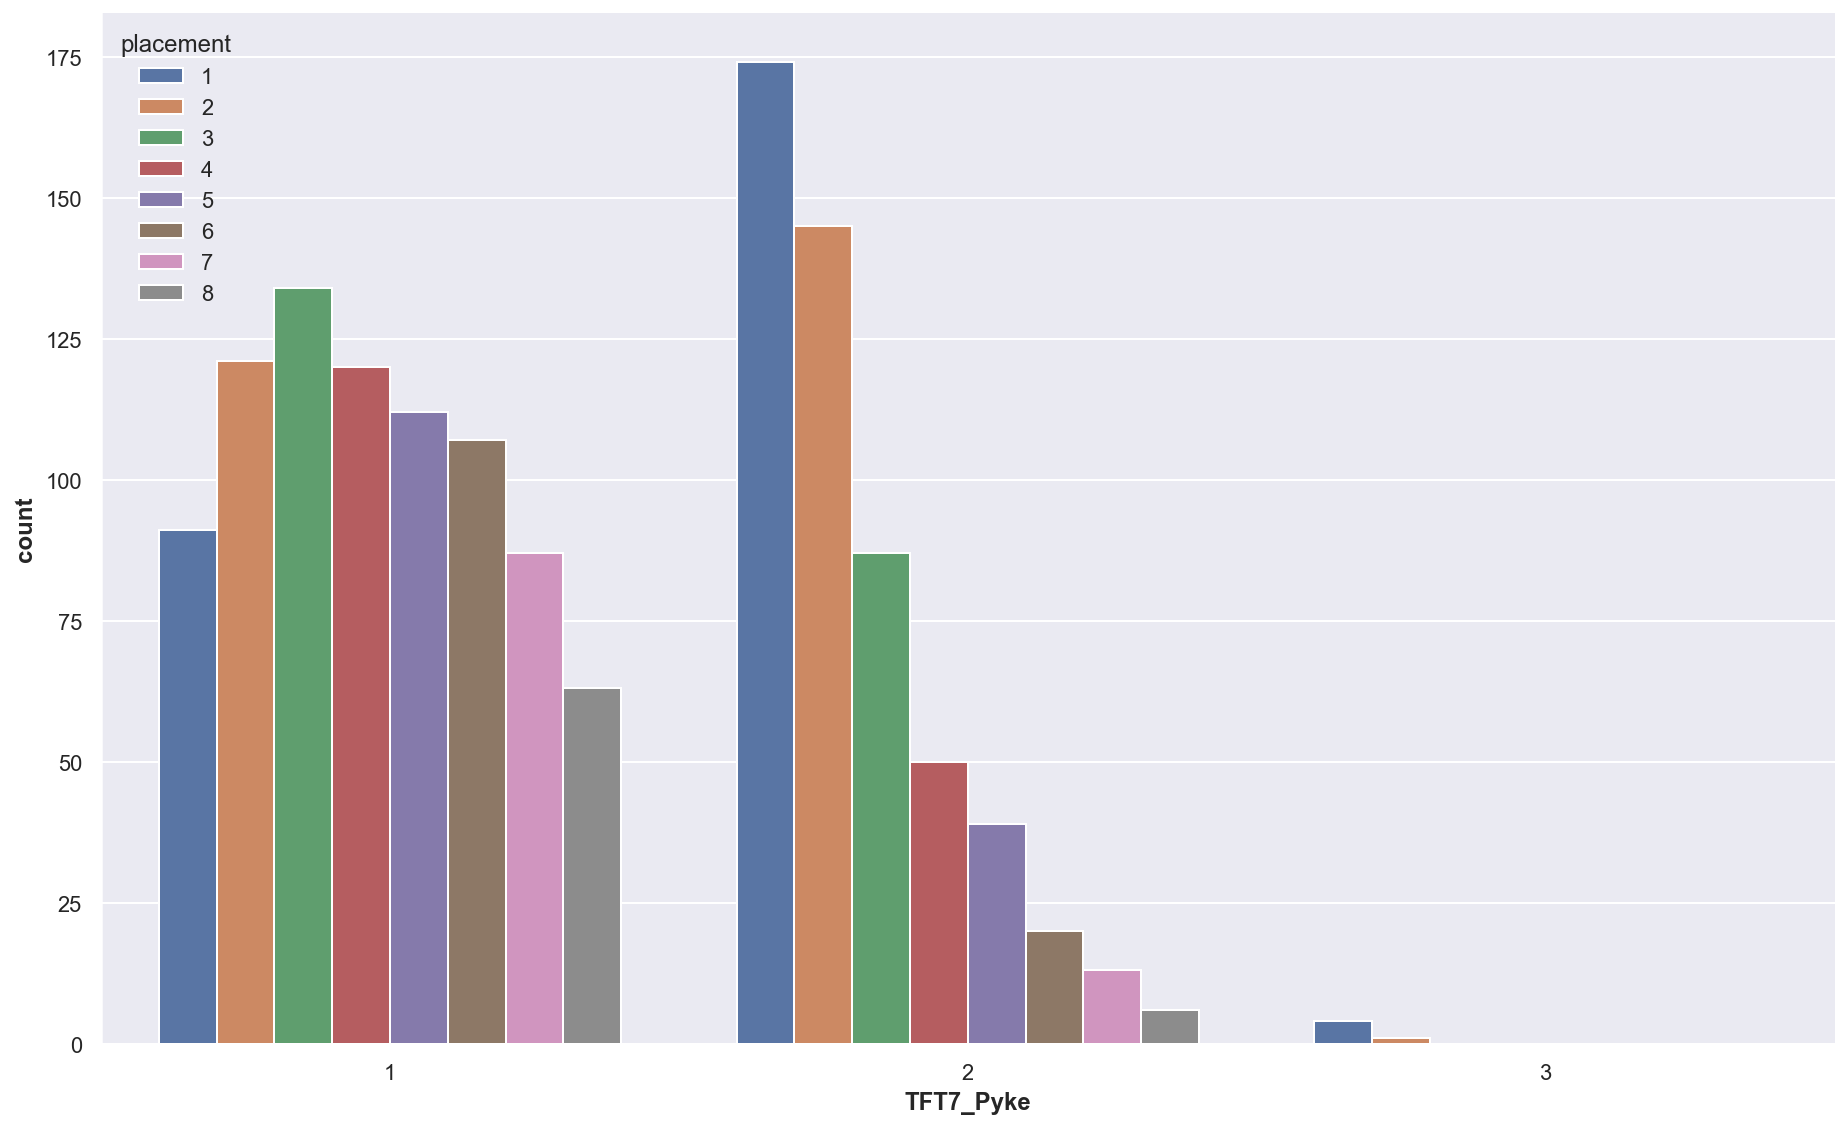

In [956]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Pyke']>0], x='TFT7_Pyke', hue=TARGETNAME)
sns.despine()

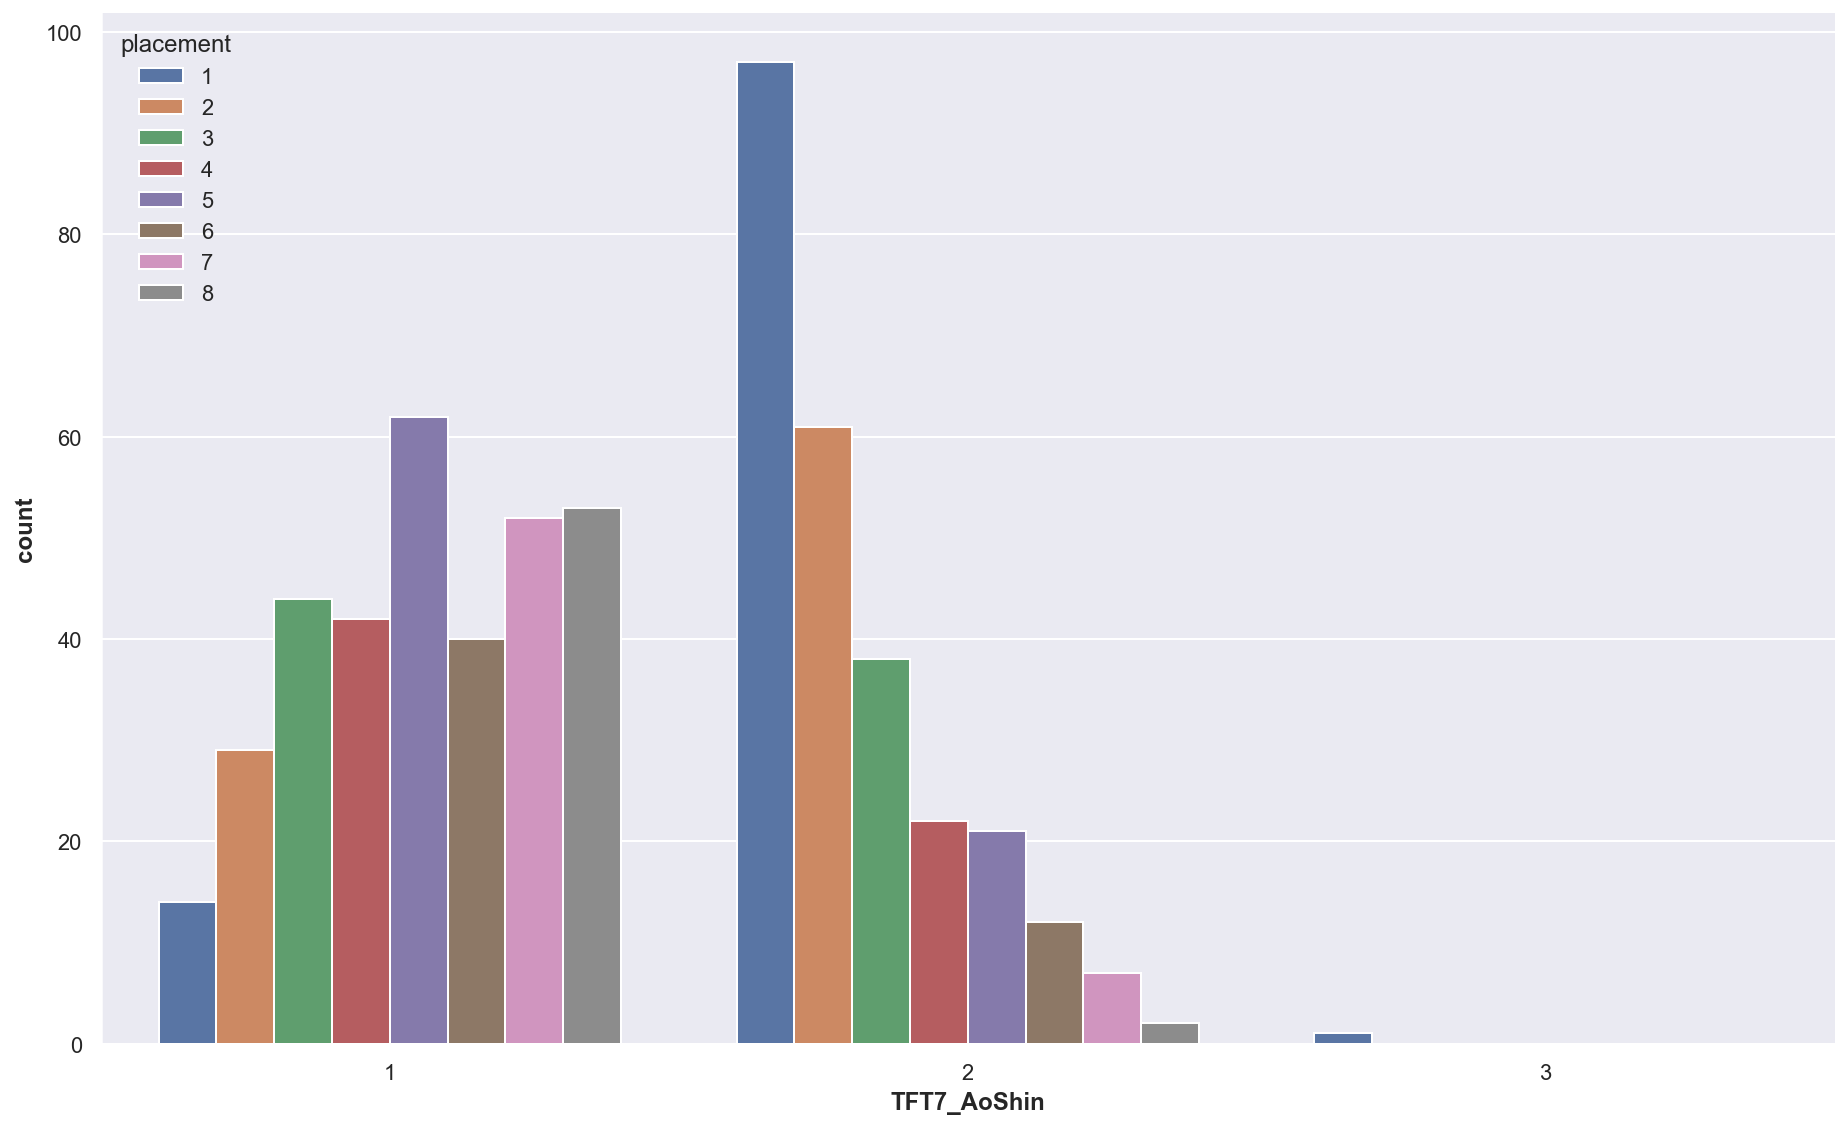

In [957]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_AoShin']>0], x='TFT7_AoShin', hue=TARGETNAME)
sns.despine()

Daeja.


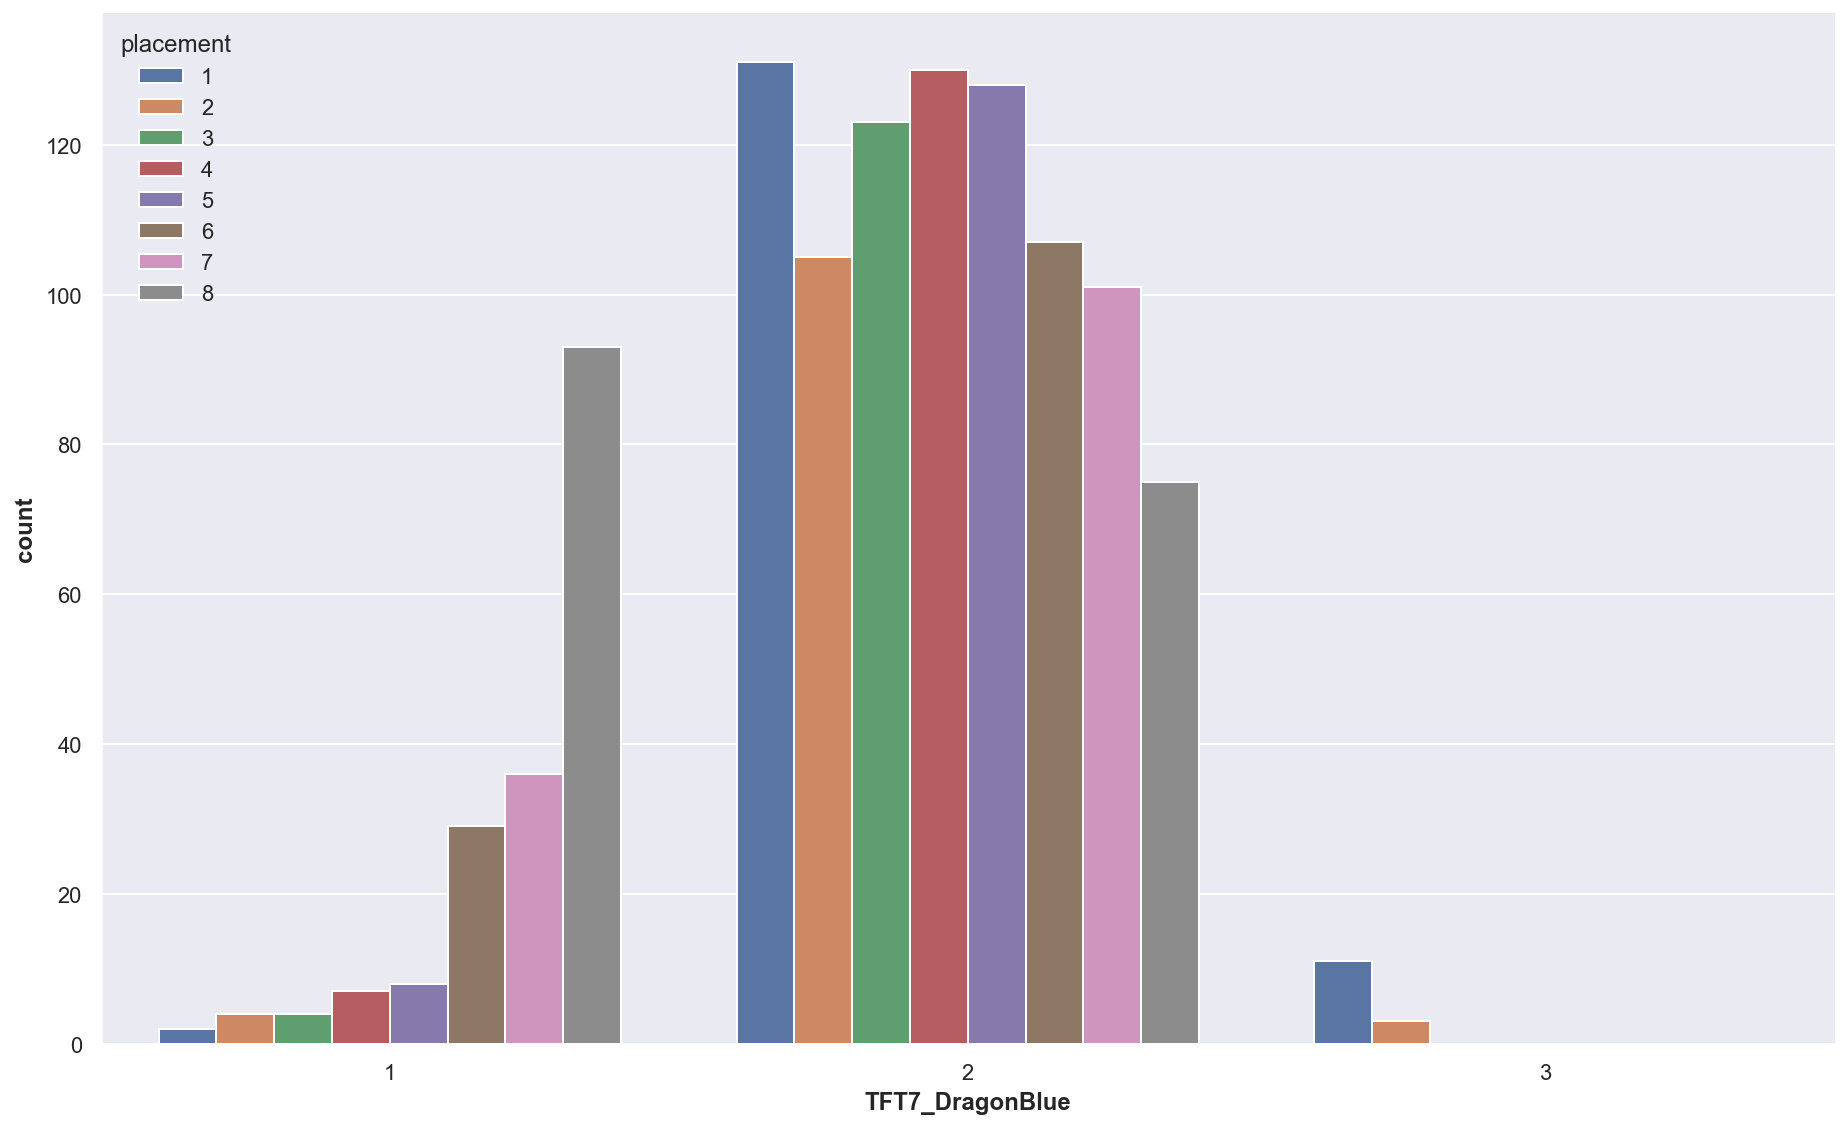

In [958]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonBlue']>0], x='TFT7_DragonBlue', hue=TARGETNAME)
sns.despine()

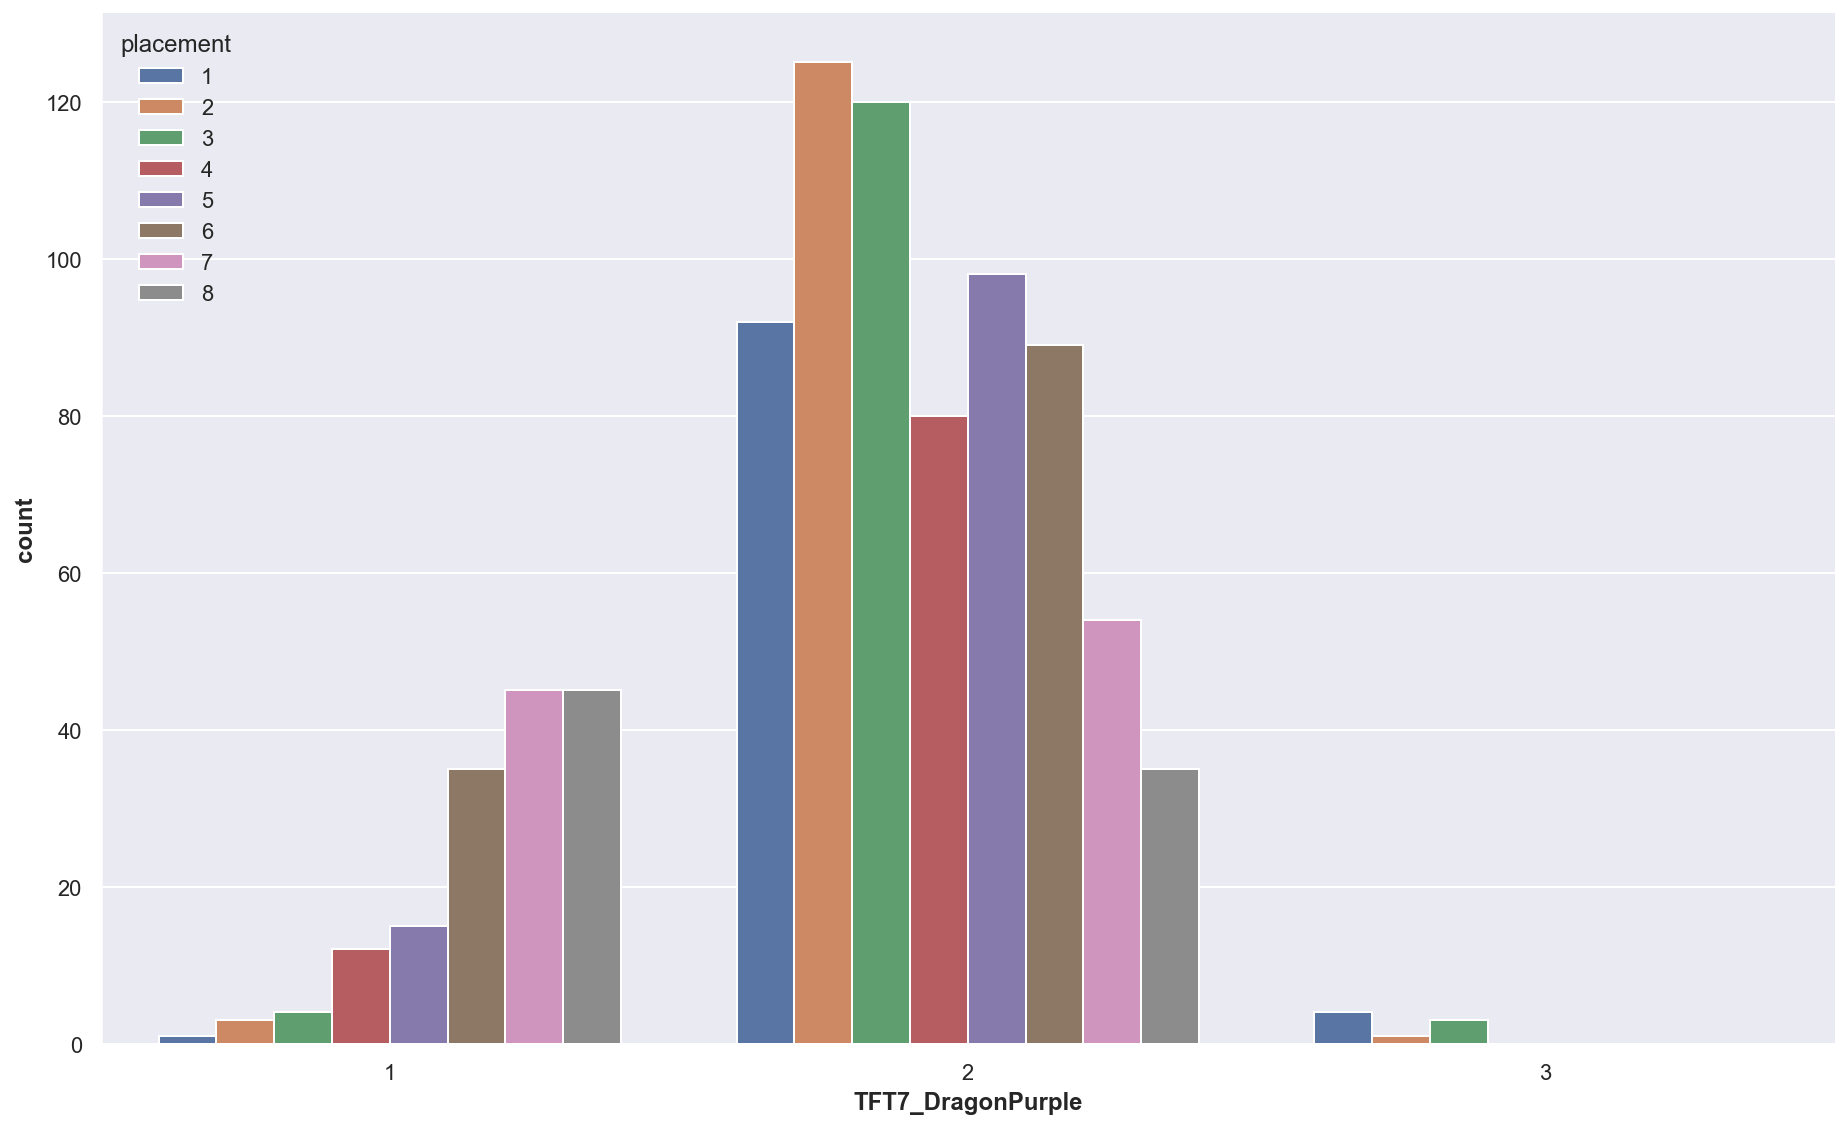

In [959]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonPurple']>0], x='TFT7_DragonPurple', hue=TARGETNAME)
sns.despine()

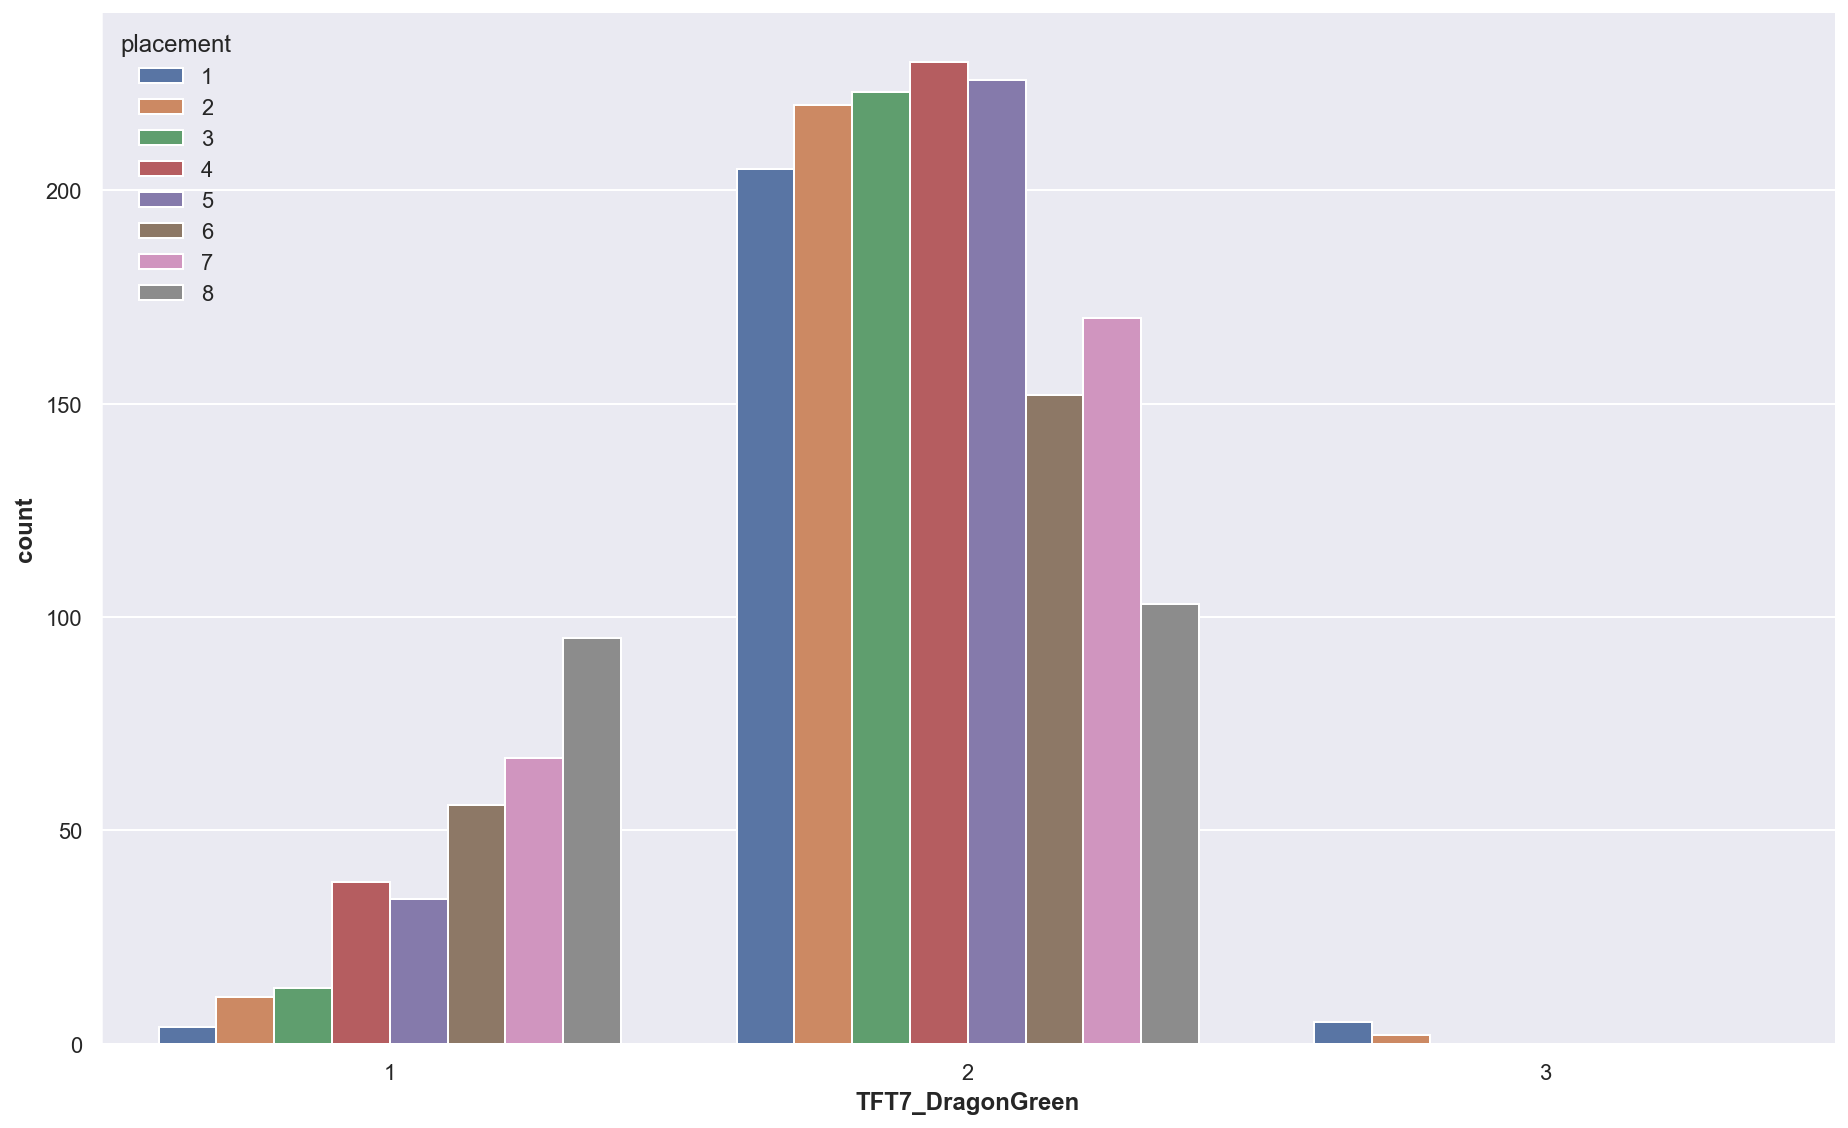

In [960]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGreen']>0], x='TFT7_DragonGreen', hue=TARGETNAME)
sns.despine()

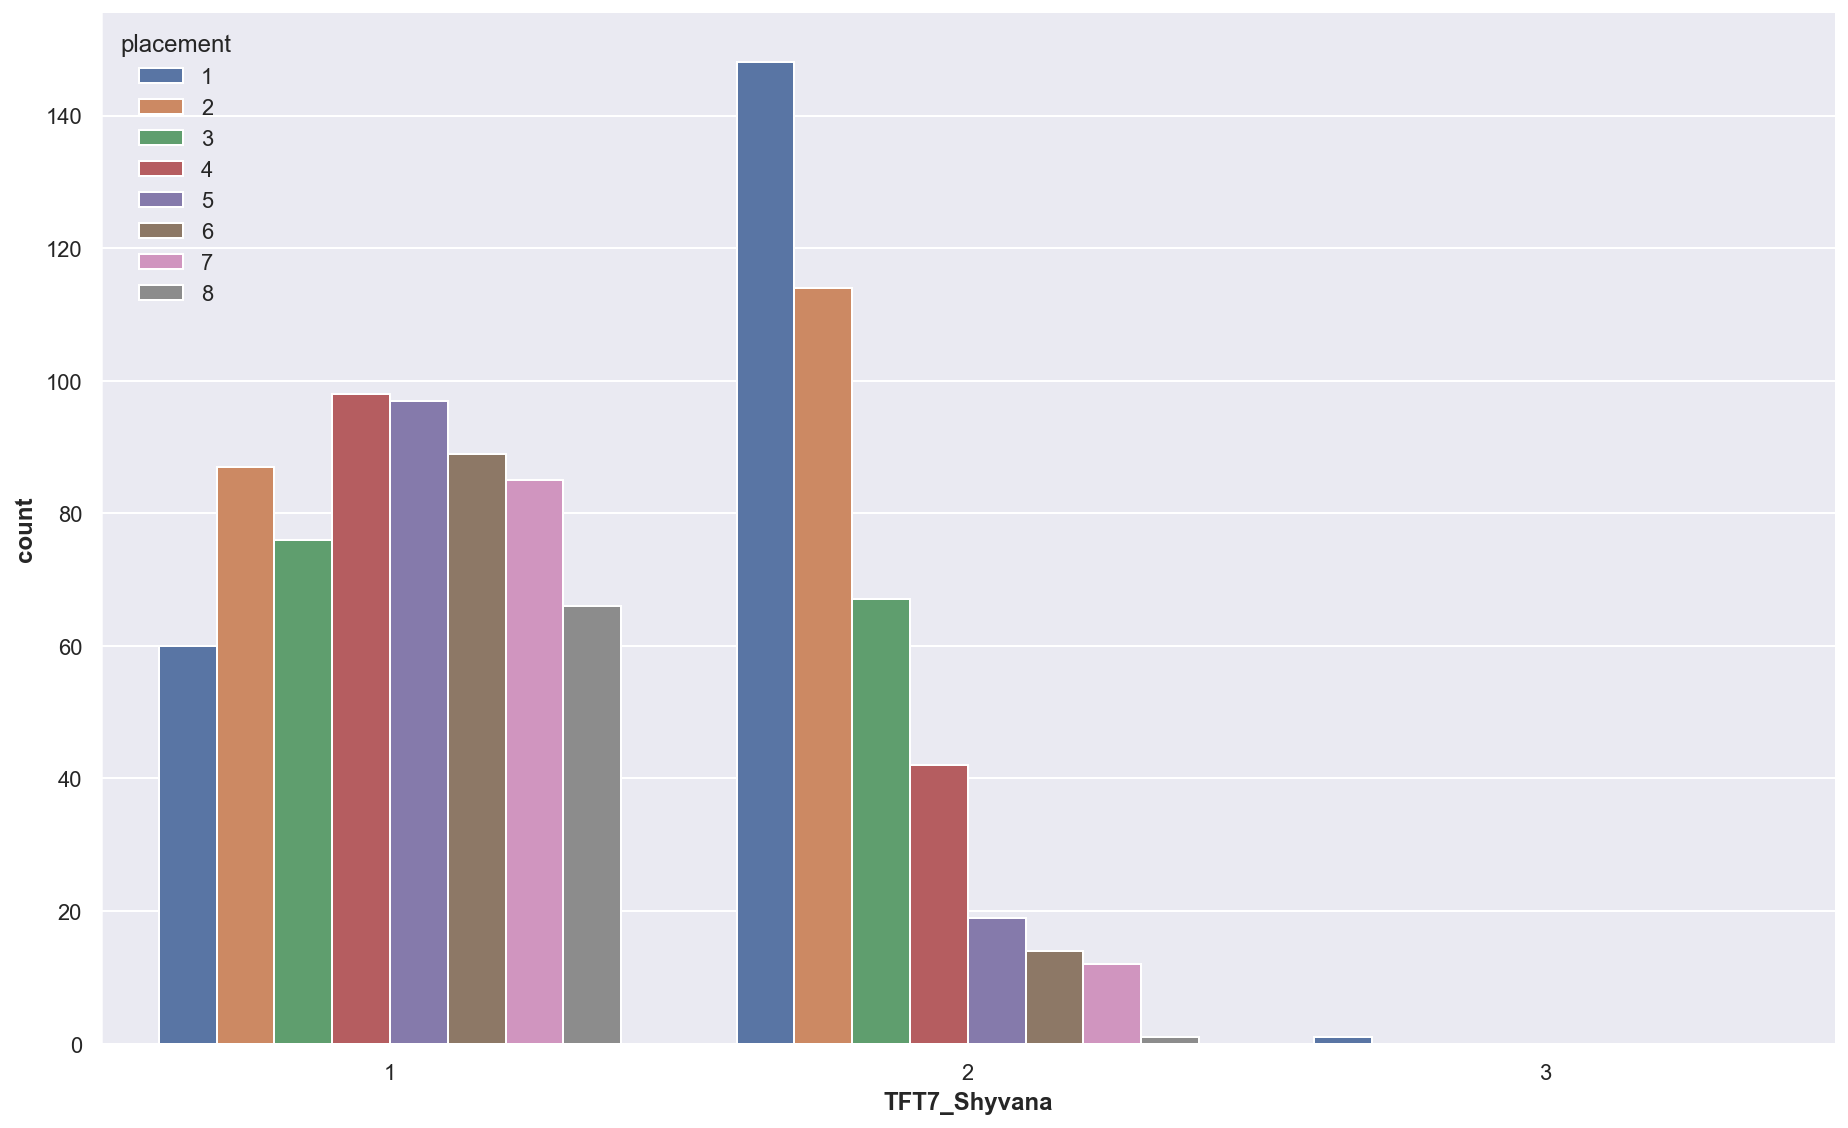

In [961]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Shyvana']>0], x='TFT7_Shyvana', hue=TARGETNAME)
sns.despine()

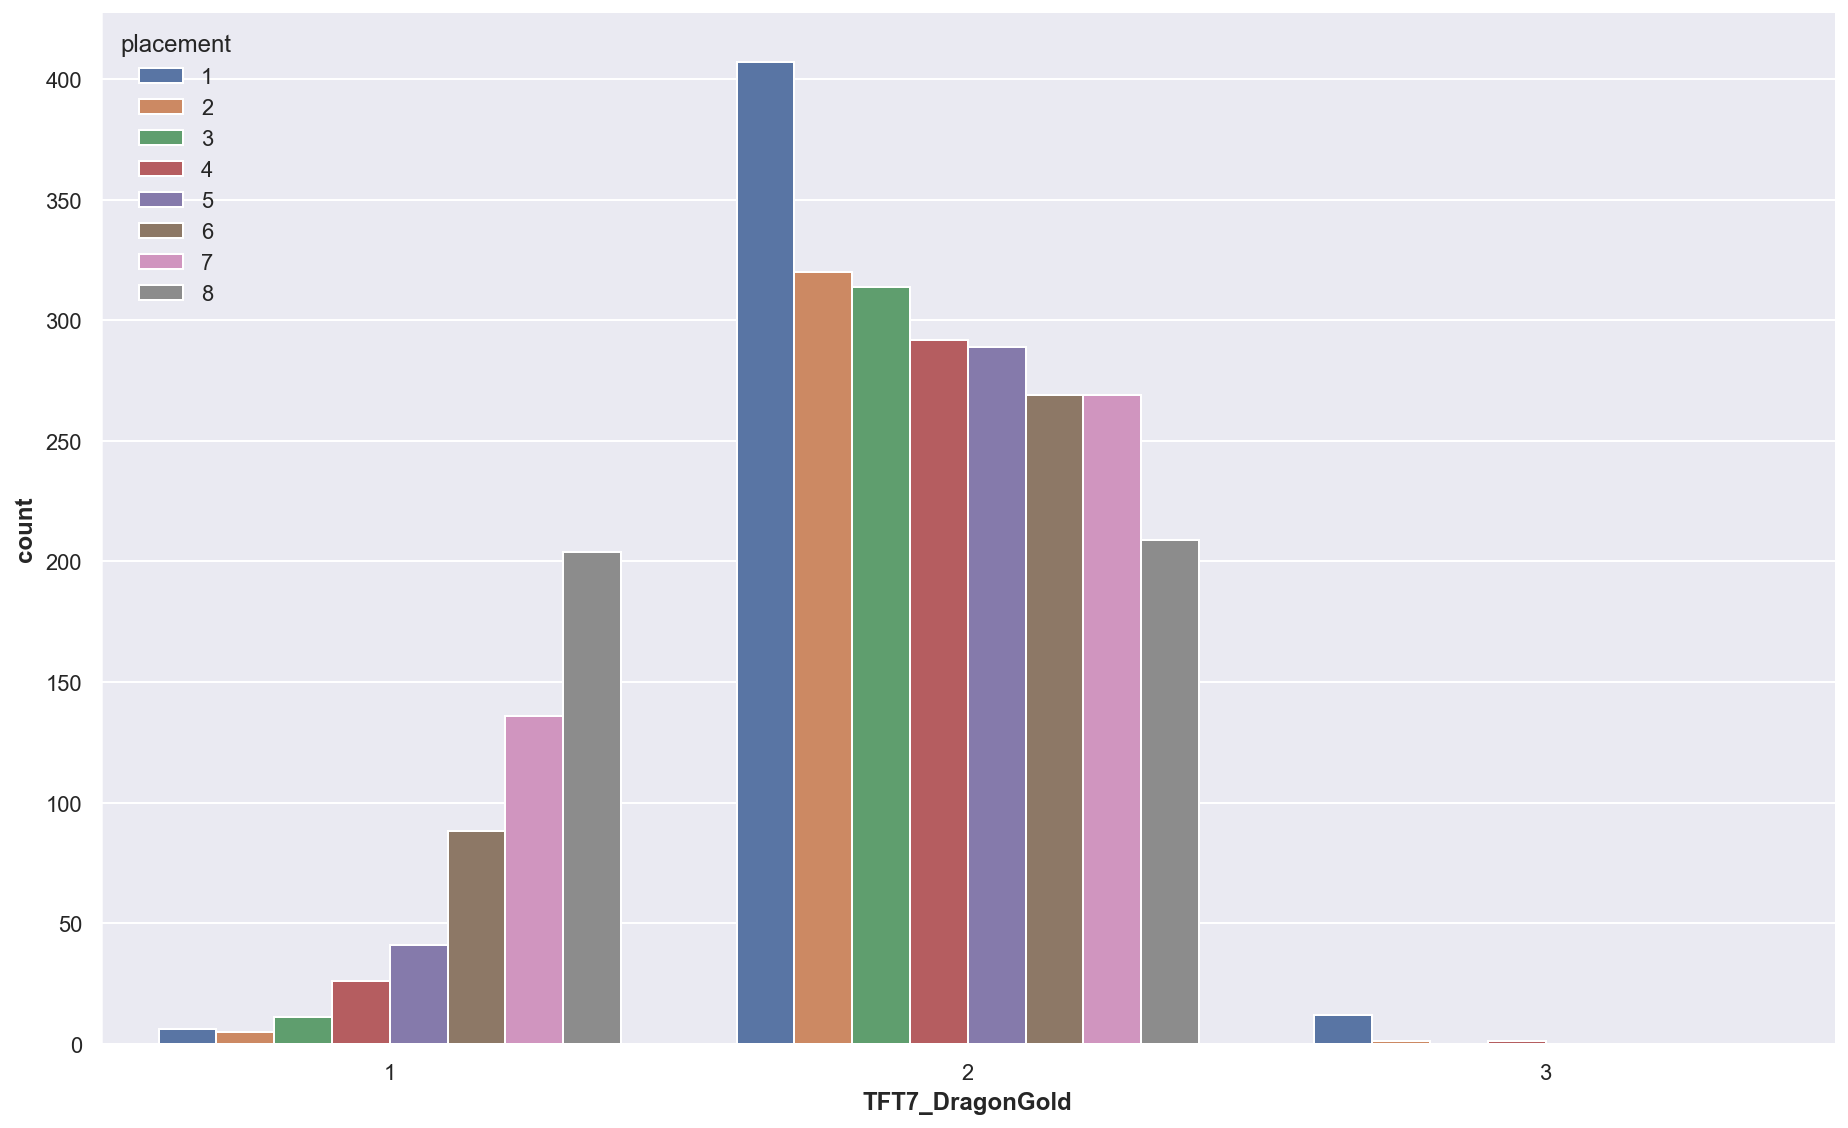

In [962]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_DragonGold']>0], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Nomsy best dragon at tier 4.

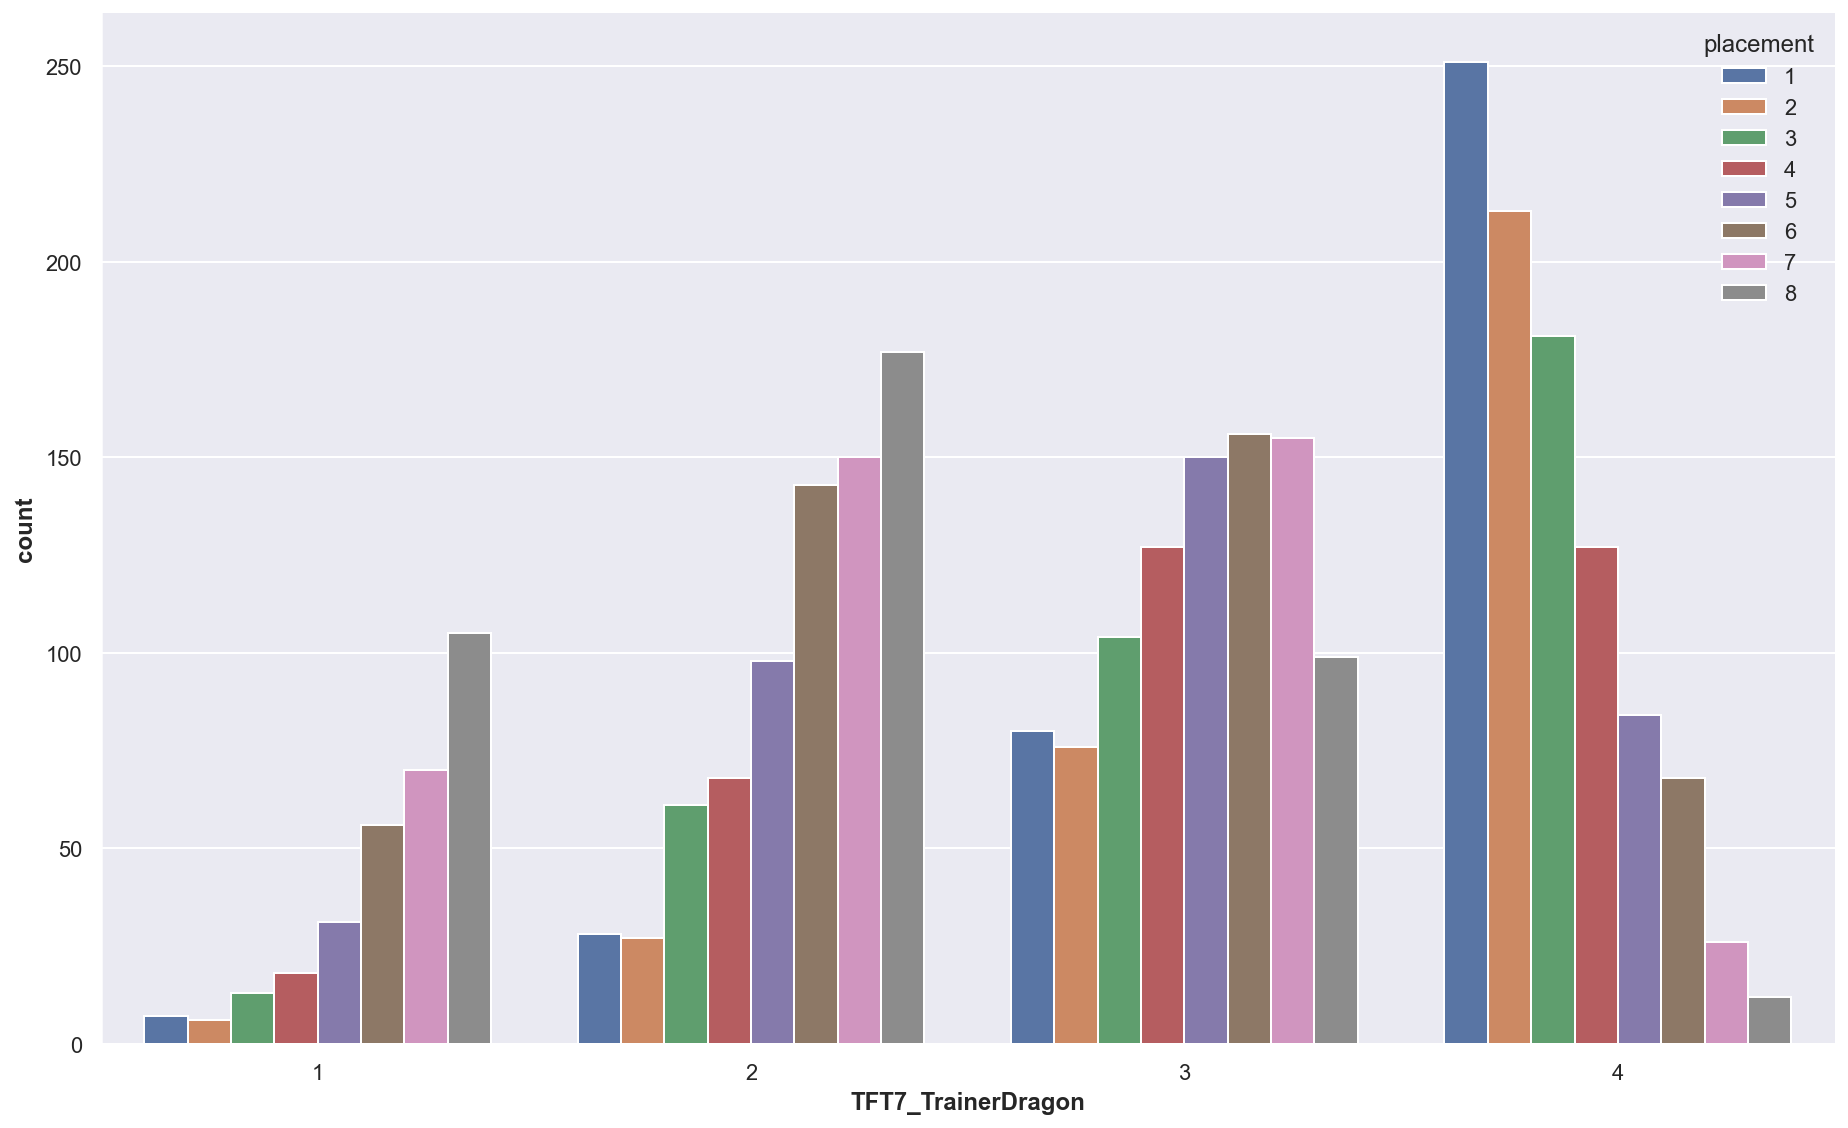

In [963]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_TrainerDragon']>0], x='TFT7_TrainerDragon', hue=TARGETNAME)
sns.despine()

Huge difference between holding Neeko1 and Neeko2.


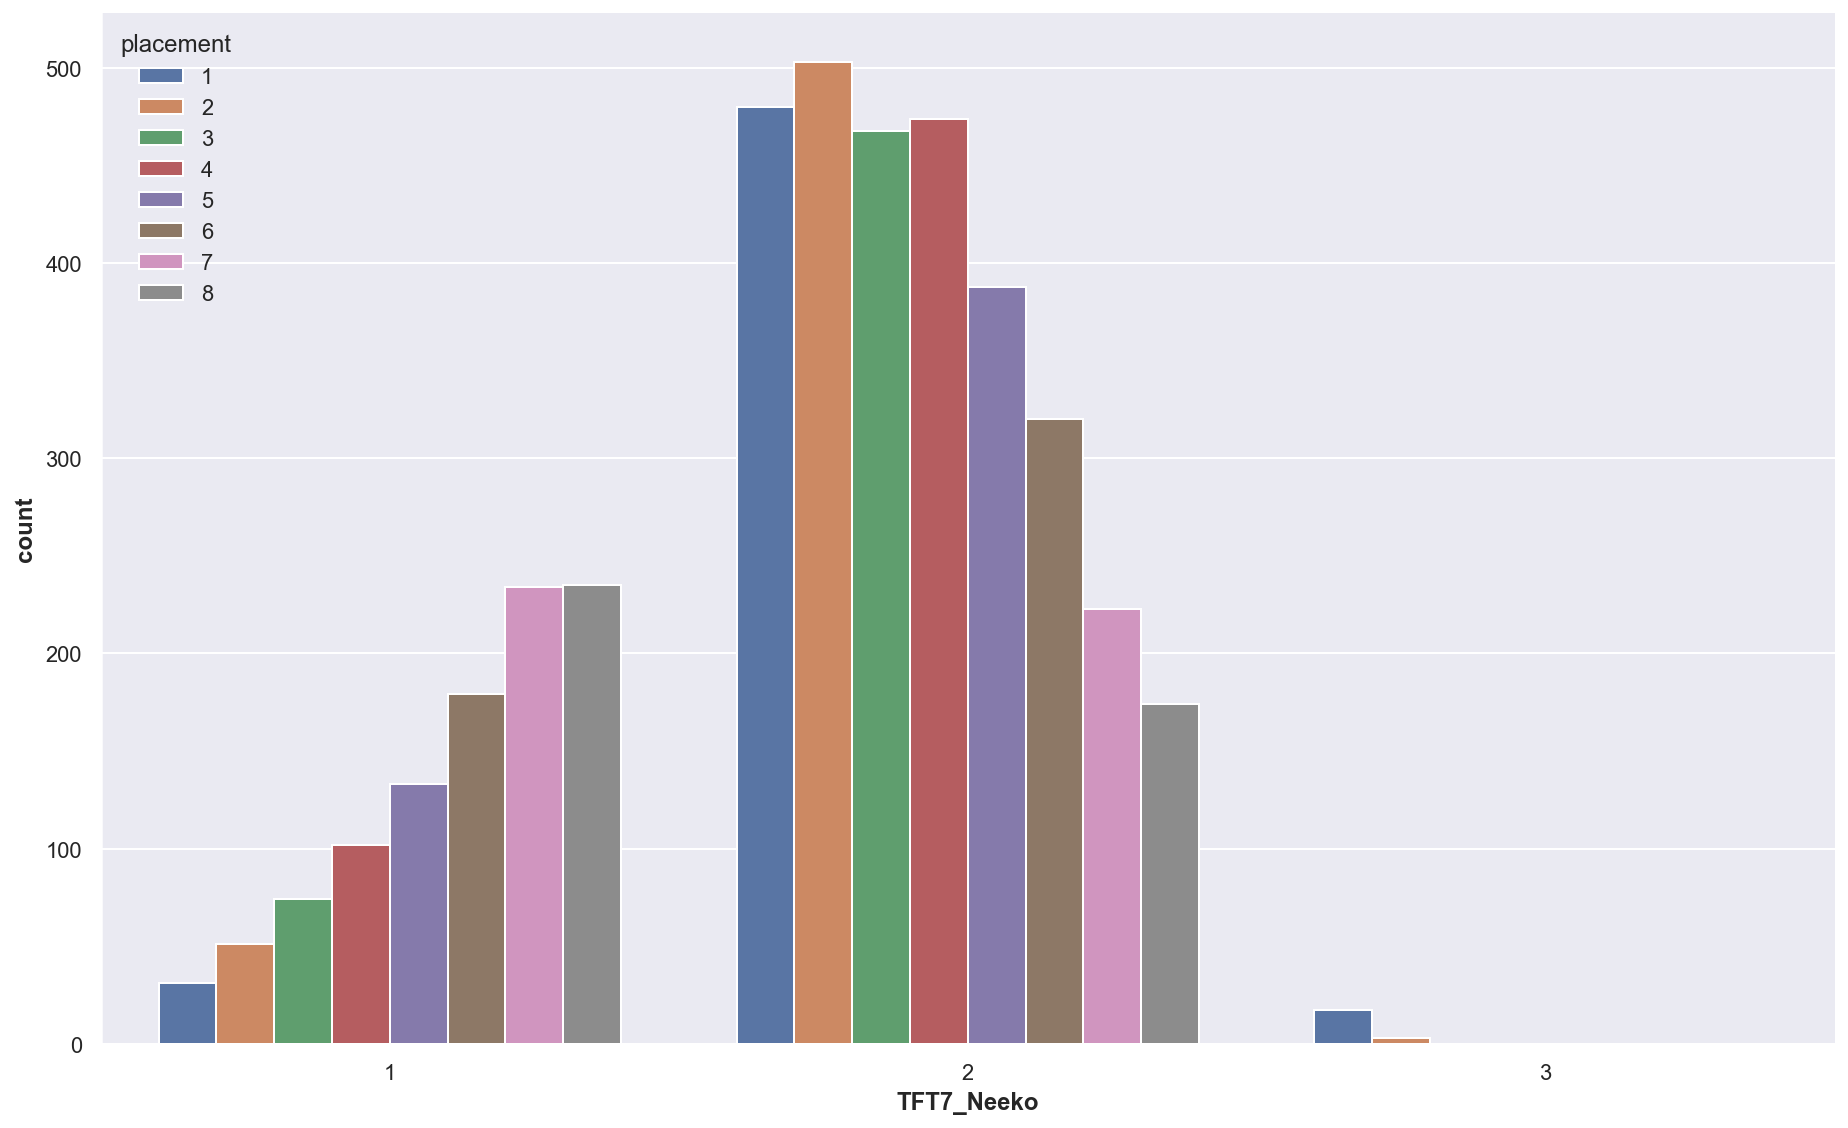

In [964]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Neeko']>0], x='TFT7_Neeko', hue=TARGETNAME)
sns.despine()

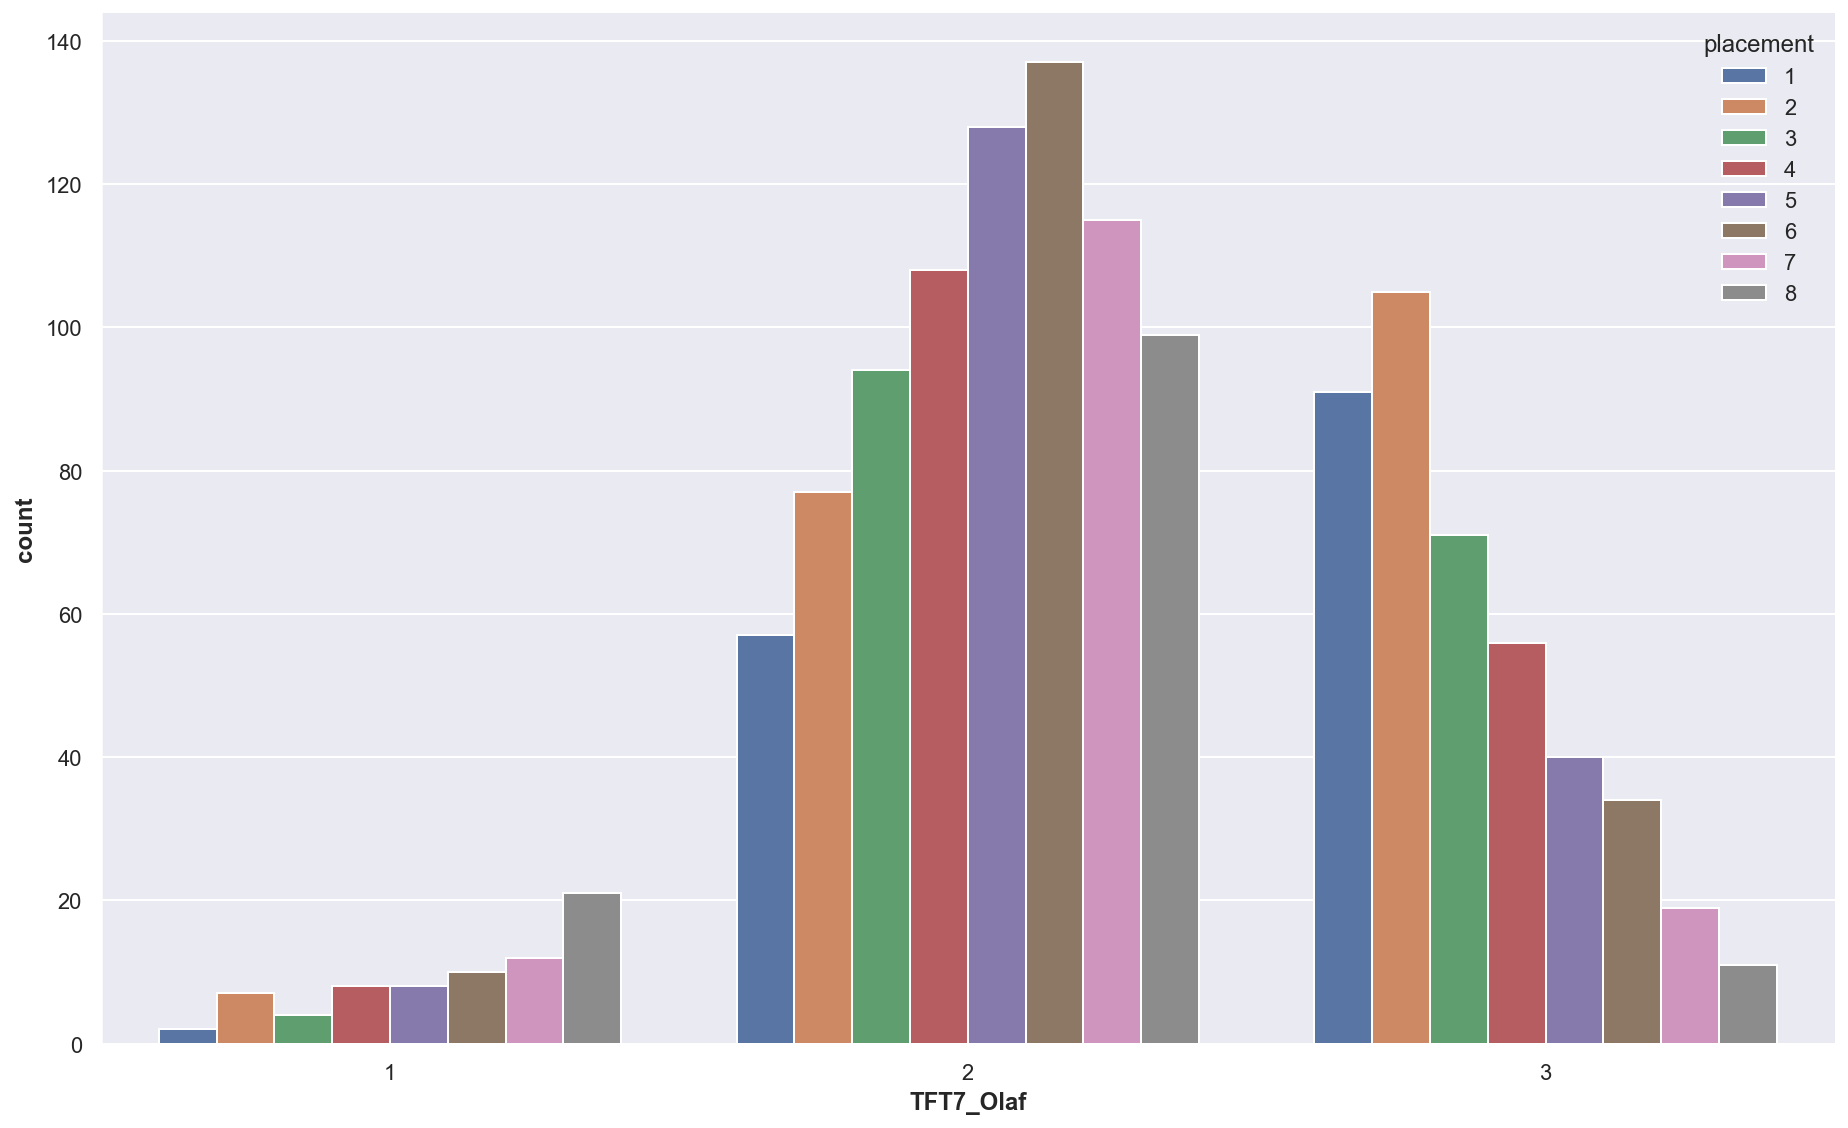

In [965]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Olaf']>0], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units

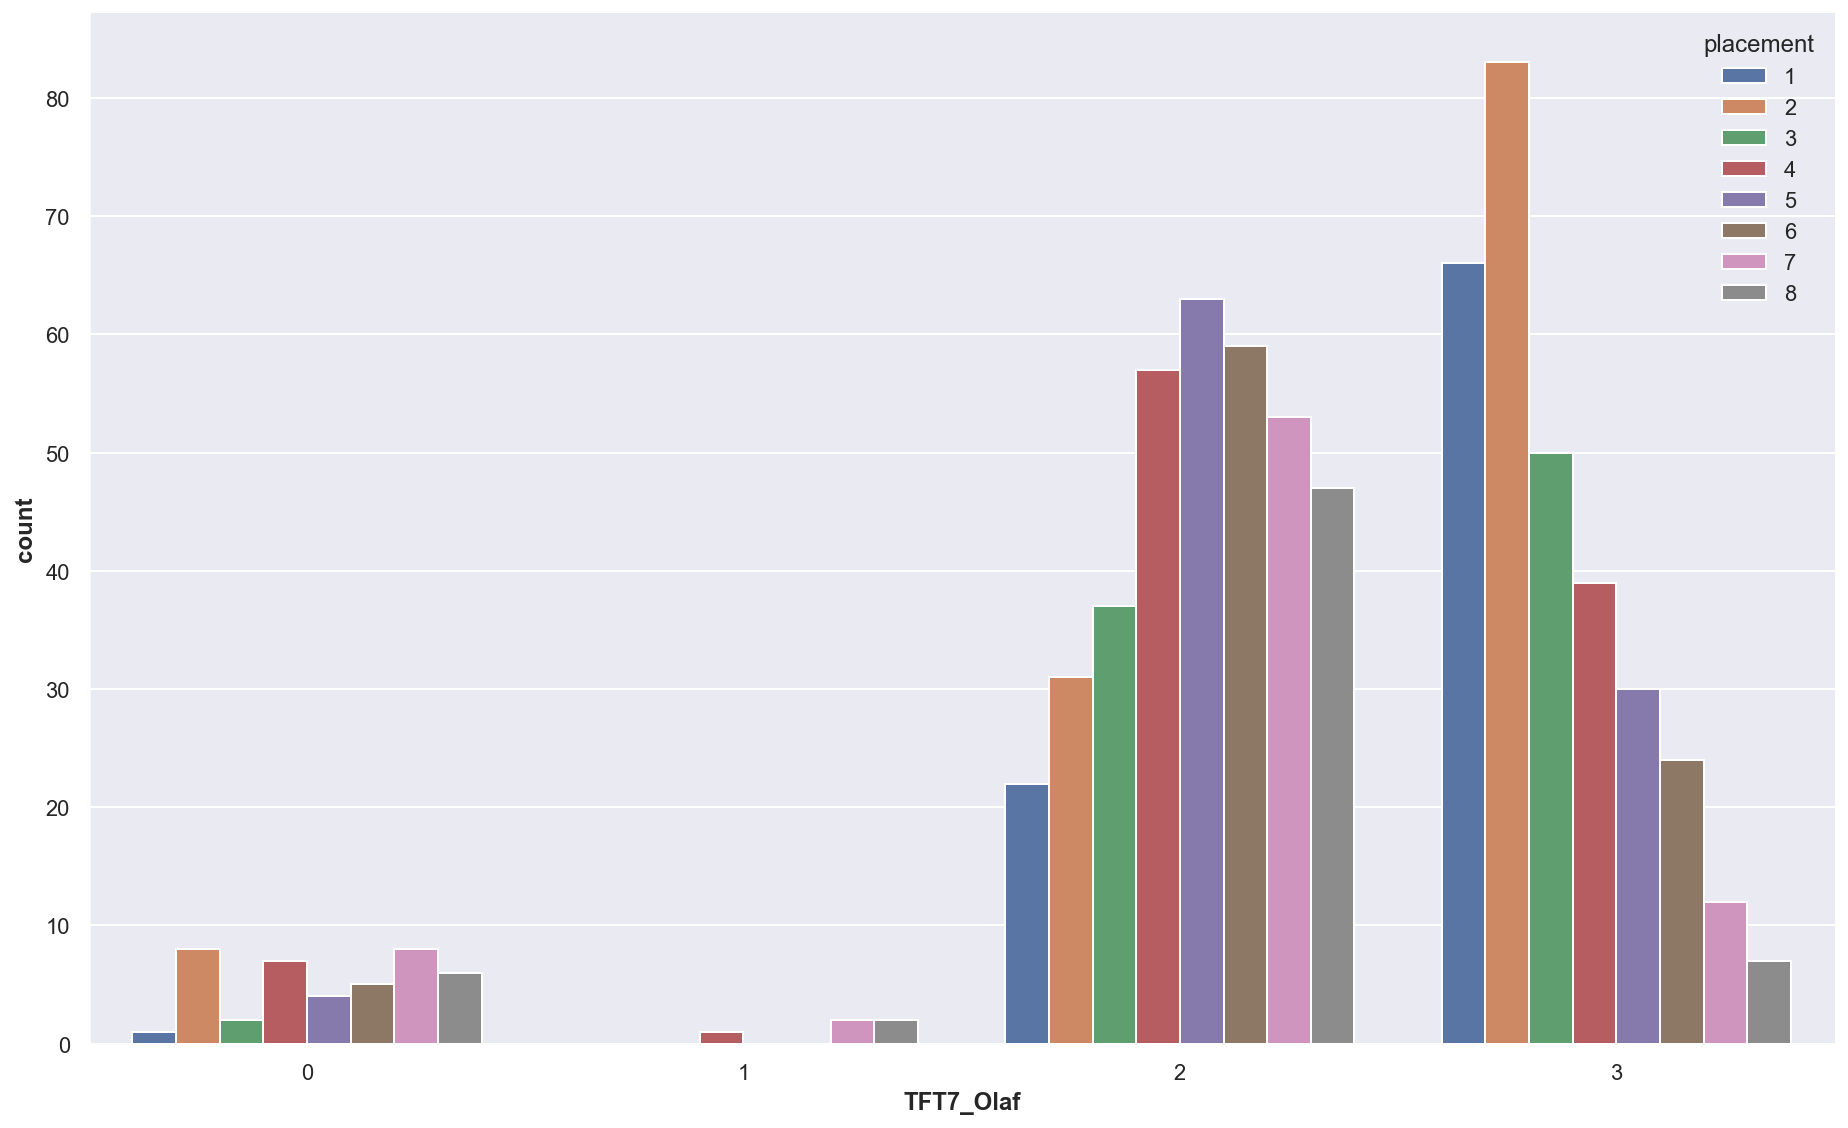

In [966]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Shen']>1) & (matches_df['TFT7_Diana']>1)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Synergy between units Shen & Diana with Olaf.

In [967]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Diana']>0], x='TFT7_Diana', hue=TARGETNAME)
sns.despine()

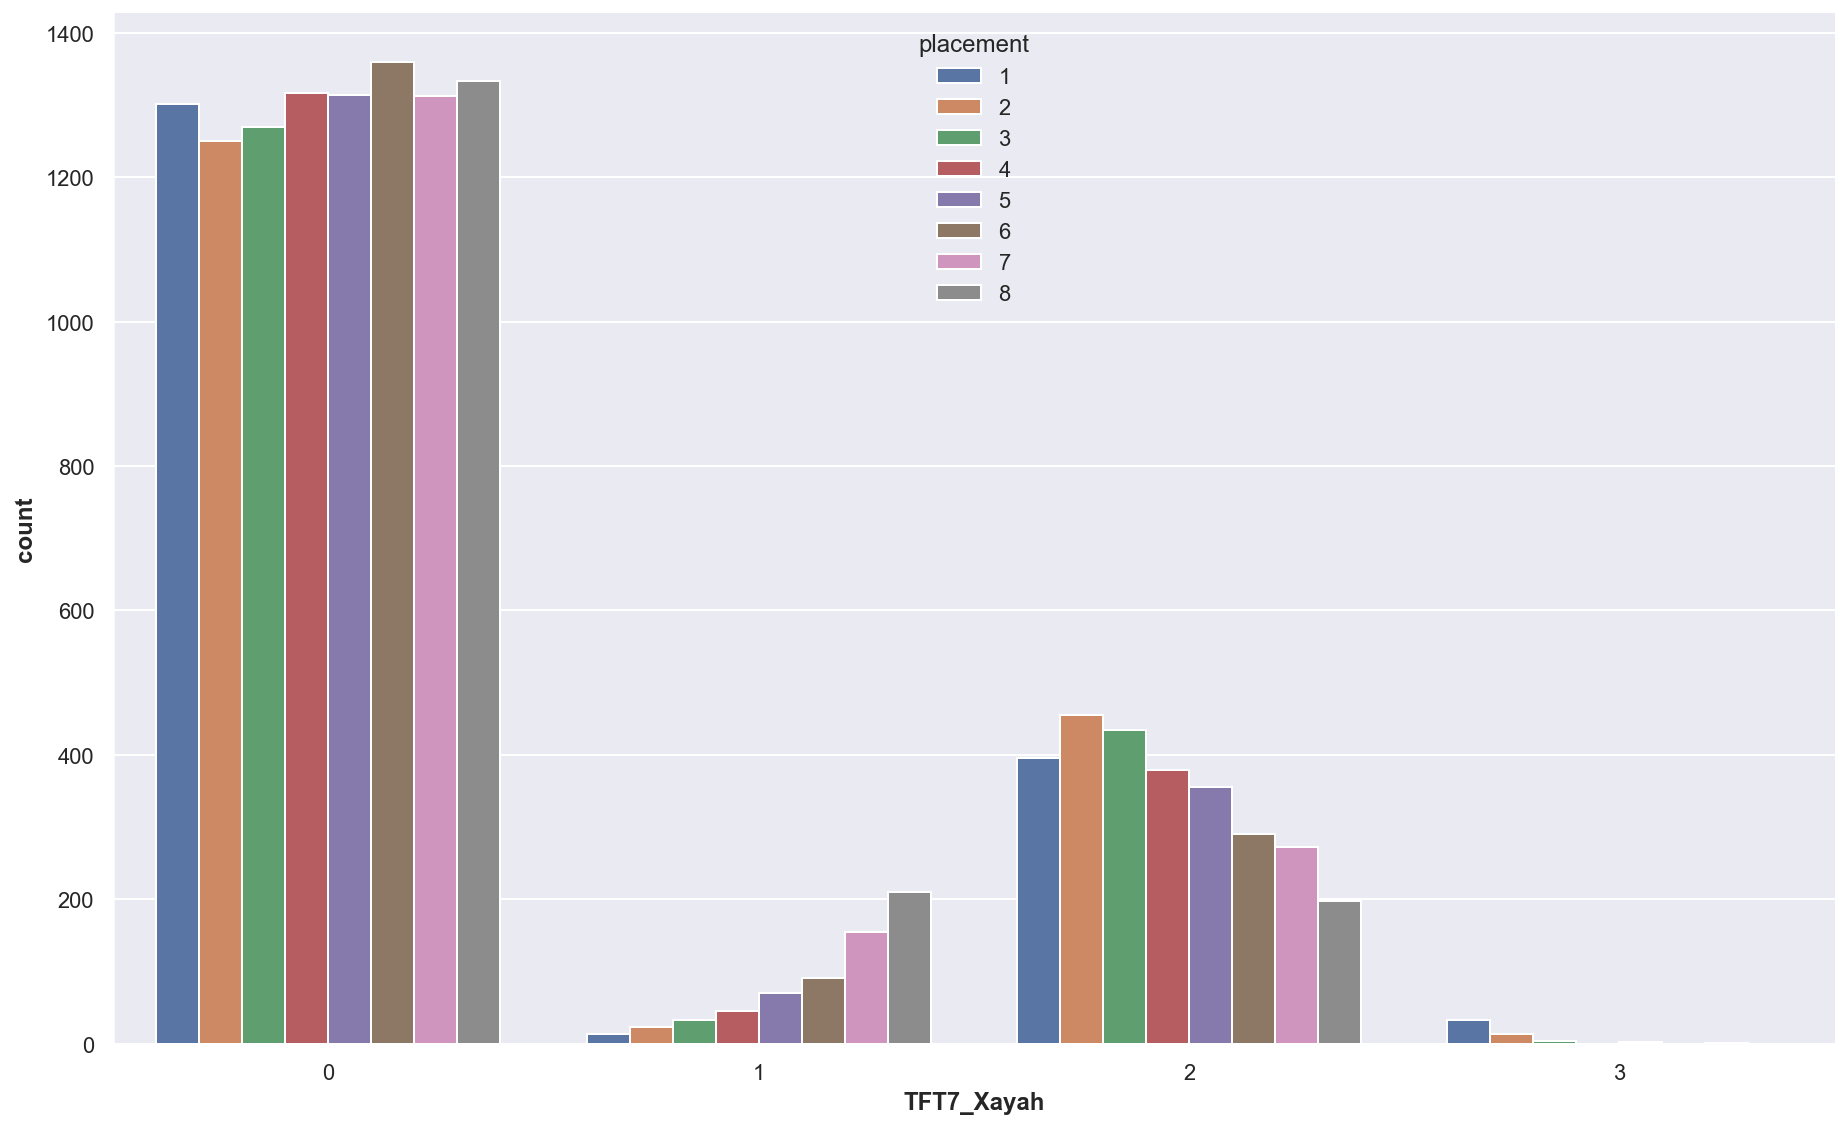

In [968]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['TFT7_Xayah']>=0], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

## Items

When TFT7_DragonGold (Idas) is holding item TFT7_Item_ShimmerscaleDiamondHands.

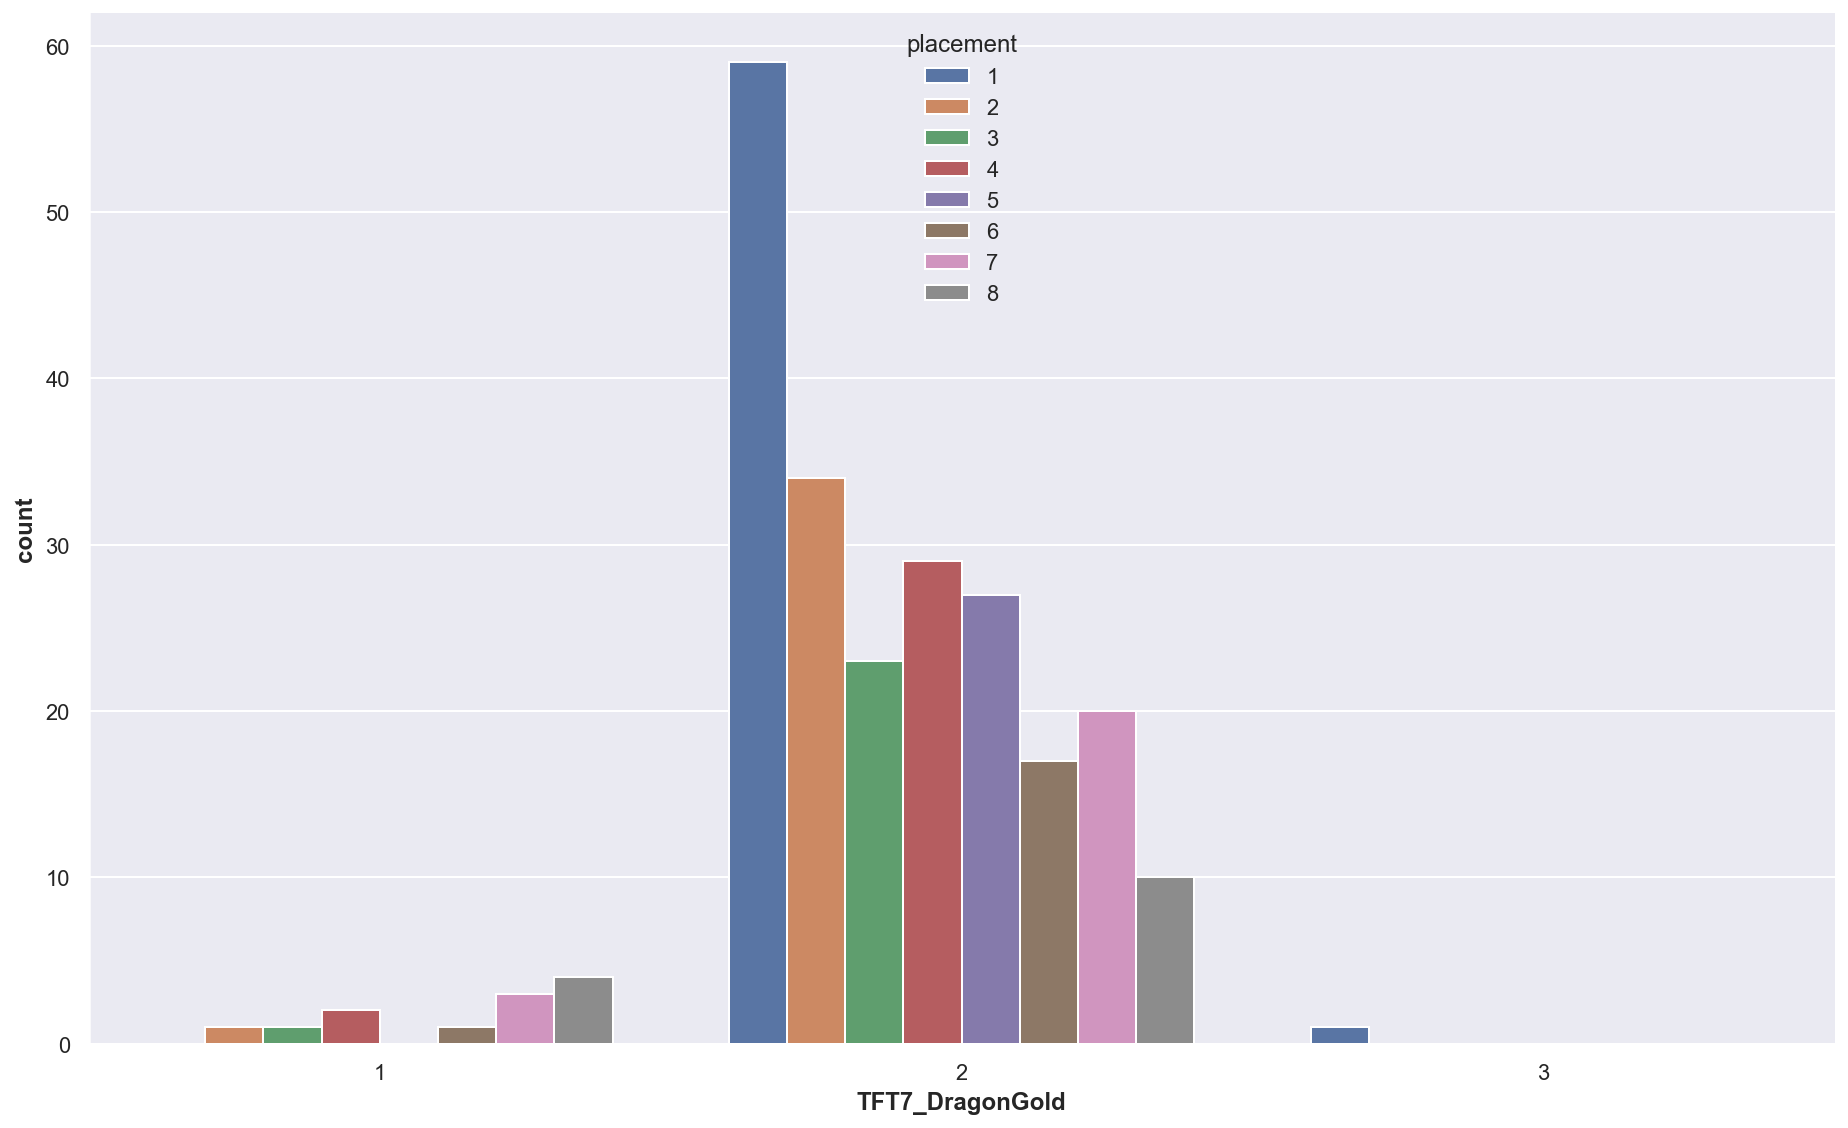

In [969]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item1']=='TFT7_Item_ShimmerscaleDiamondHands') | (matches_df['TFT7_DragonGold_item2']=='TFT7_Item_ShimmerscaleDiamondHands')], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

VS When TFT7_DragonGold (Idas) is **NOT** holding item TFT7_Item_ShimmerscaleDiamondHands.

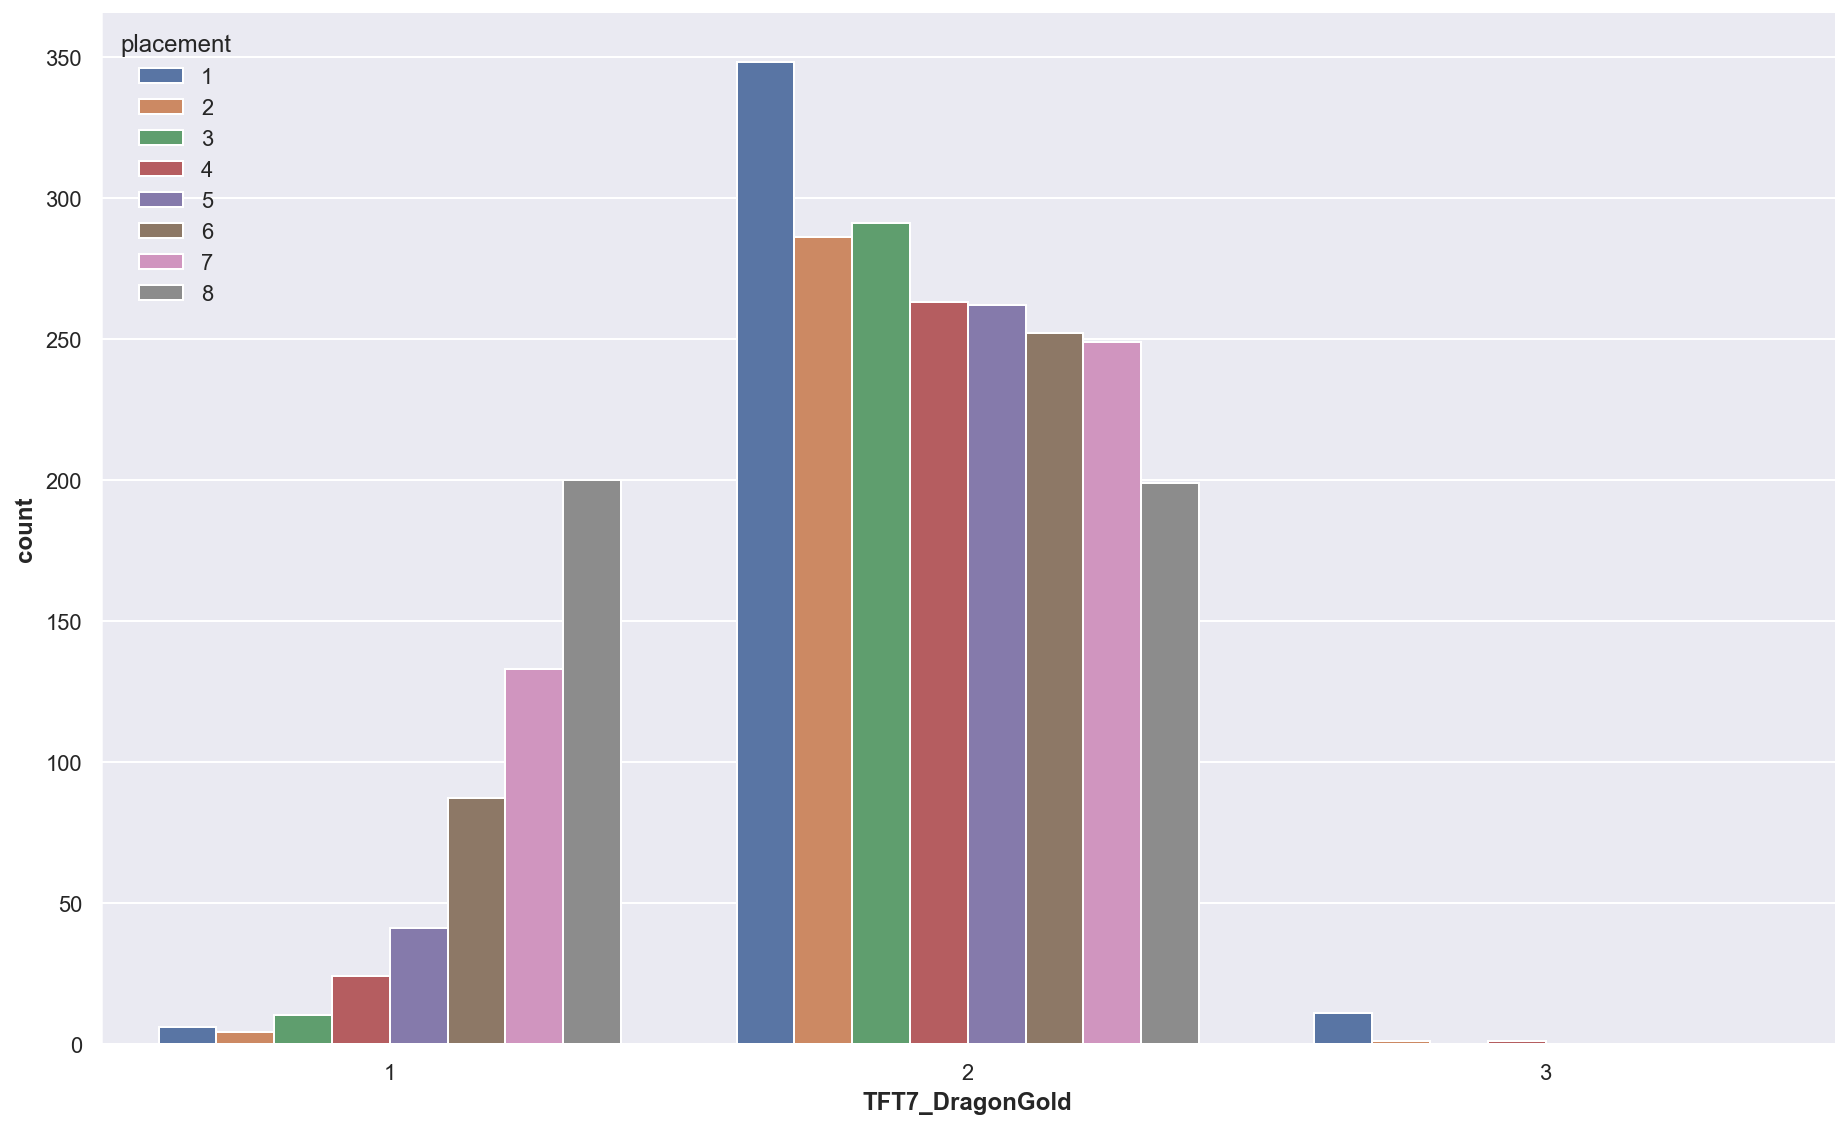

In [970]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_DragonGold_item0']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item1']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold_item2']!='TFT7_Item_ShimmerscaleDiamondHands') & (matches_df['TFT7_DragonGold']>0)], x='TFT7_DragonGold', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

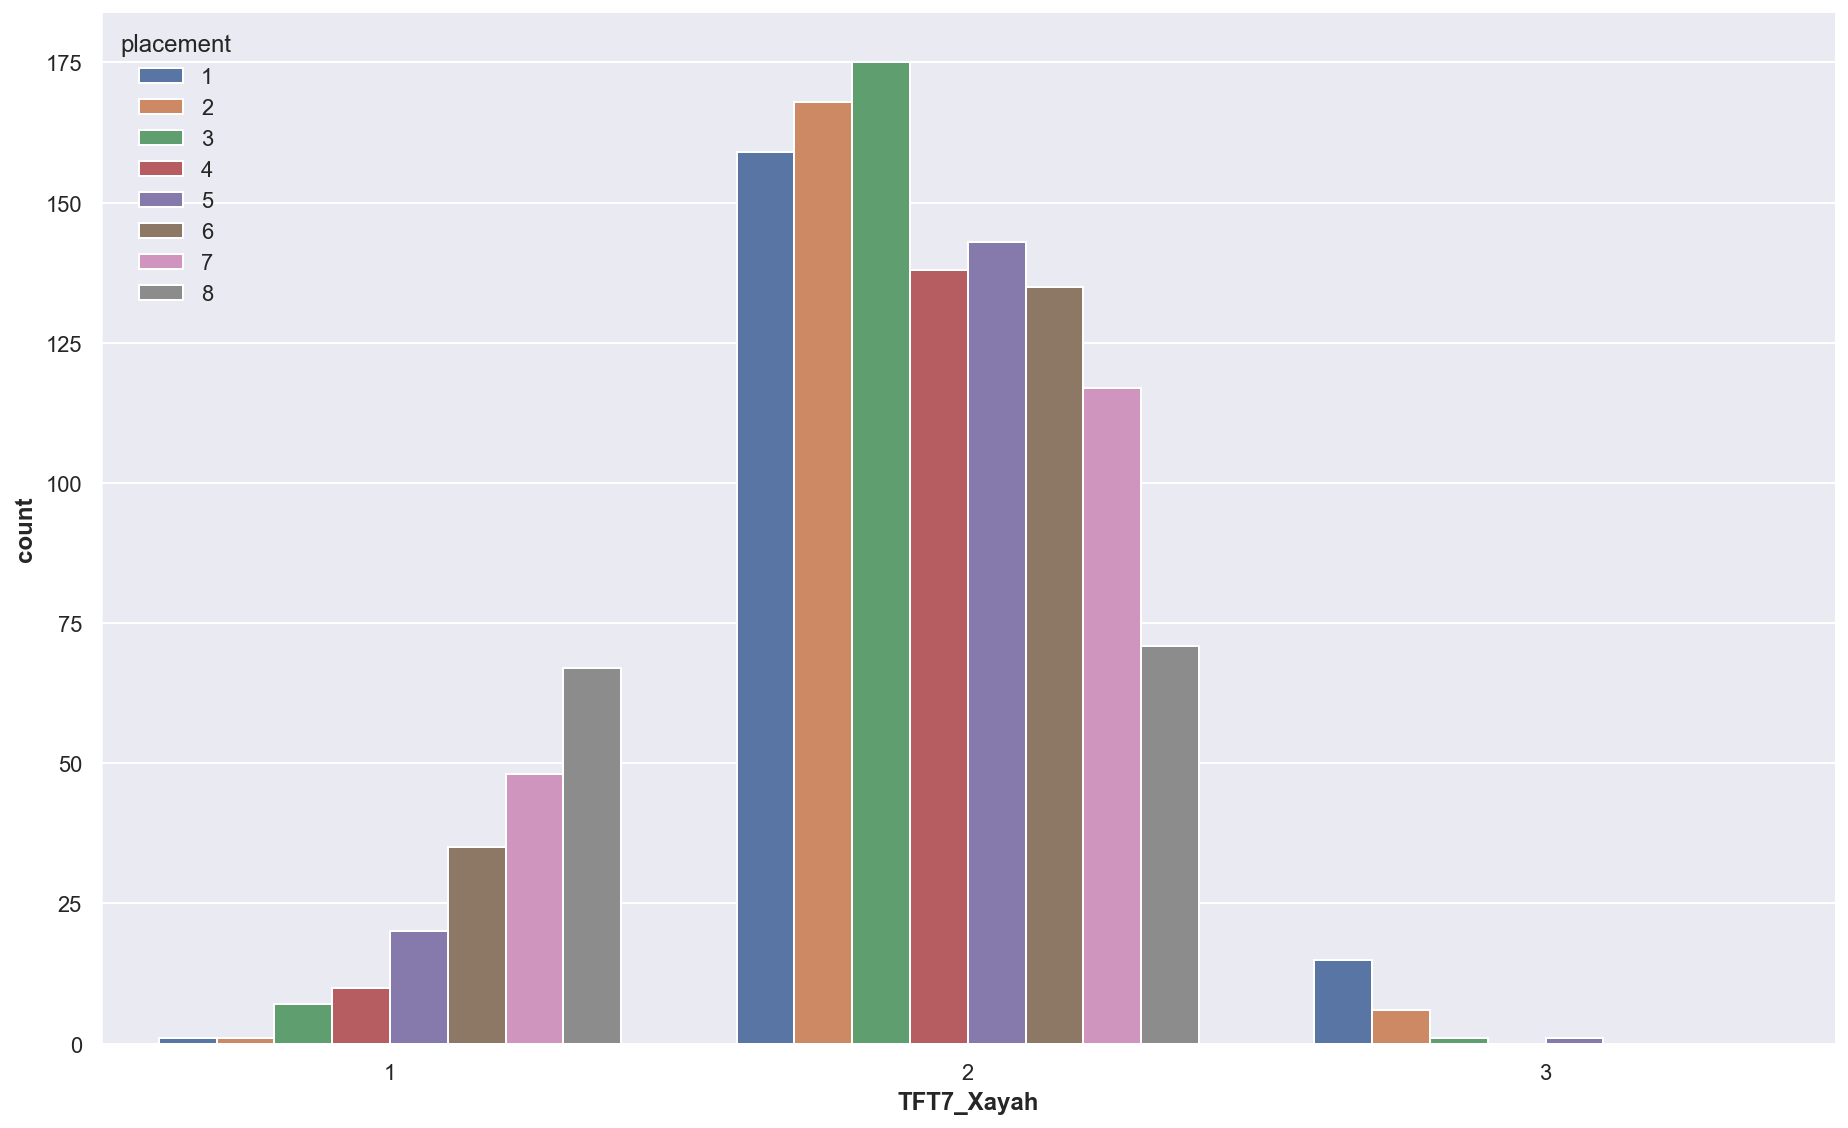

In [971]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item1']=='TFT_Item_Quicksilver') | (matches_df['TFT7_Xayah_item2']=='TFT_Item_Quicksilver')], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Without Quicksilver.

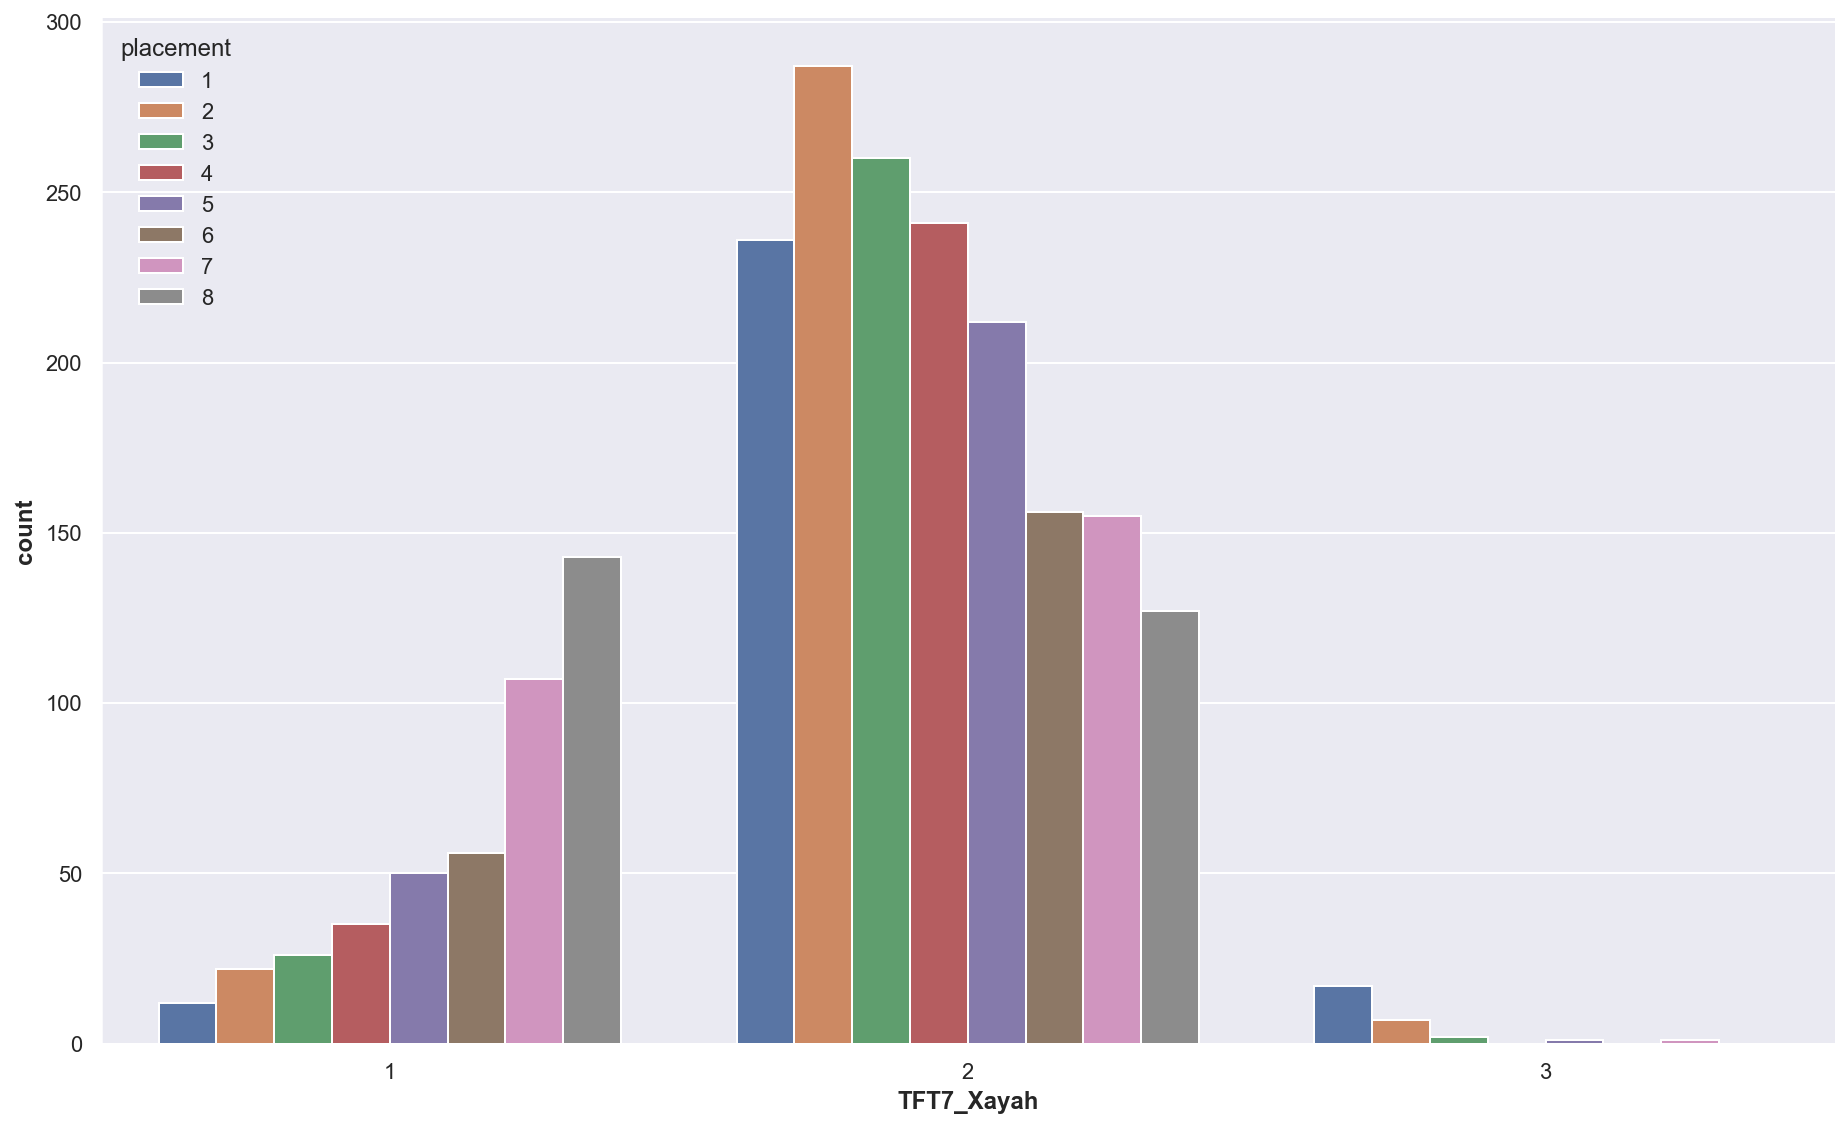

In [972]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Xayah_item0']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item1']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah_item2']!='TFT_Item_Quicksilver') & (matches_df['TFT7_Xayah']>0)], x='TFT7_Xayah', hue=TARGETNAME)
sns.despine()

Does Quicksilver help on your carry?
With Quicksilver.

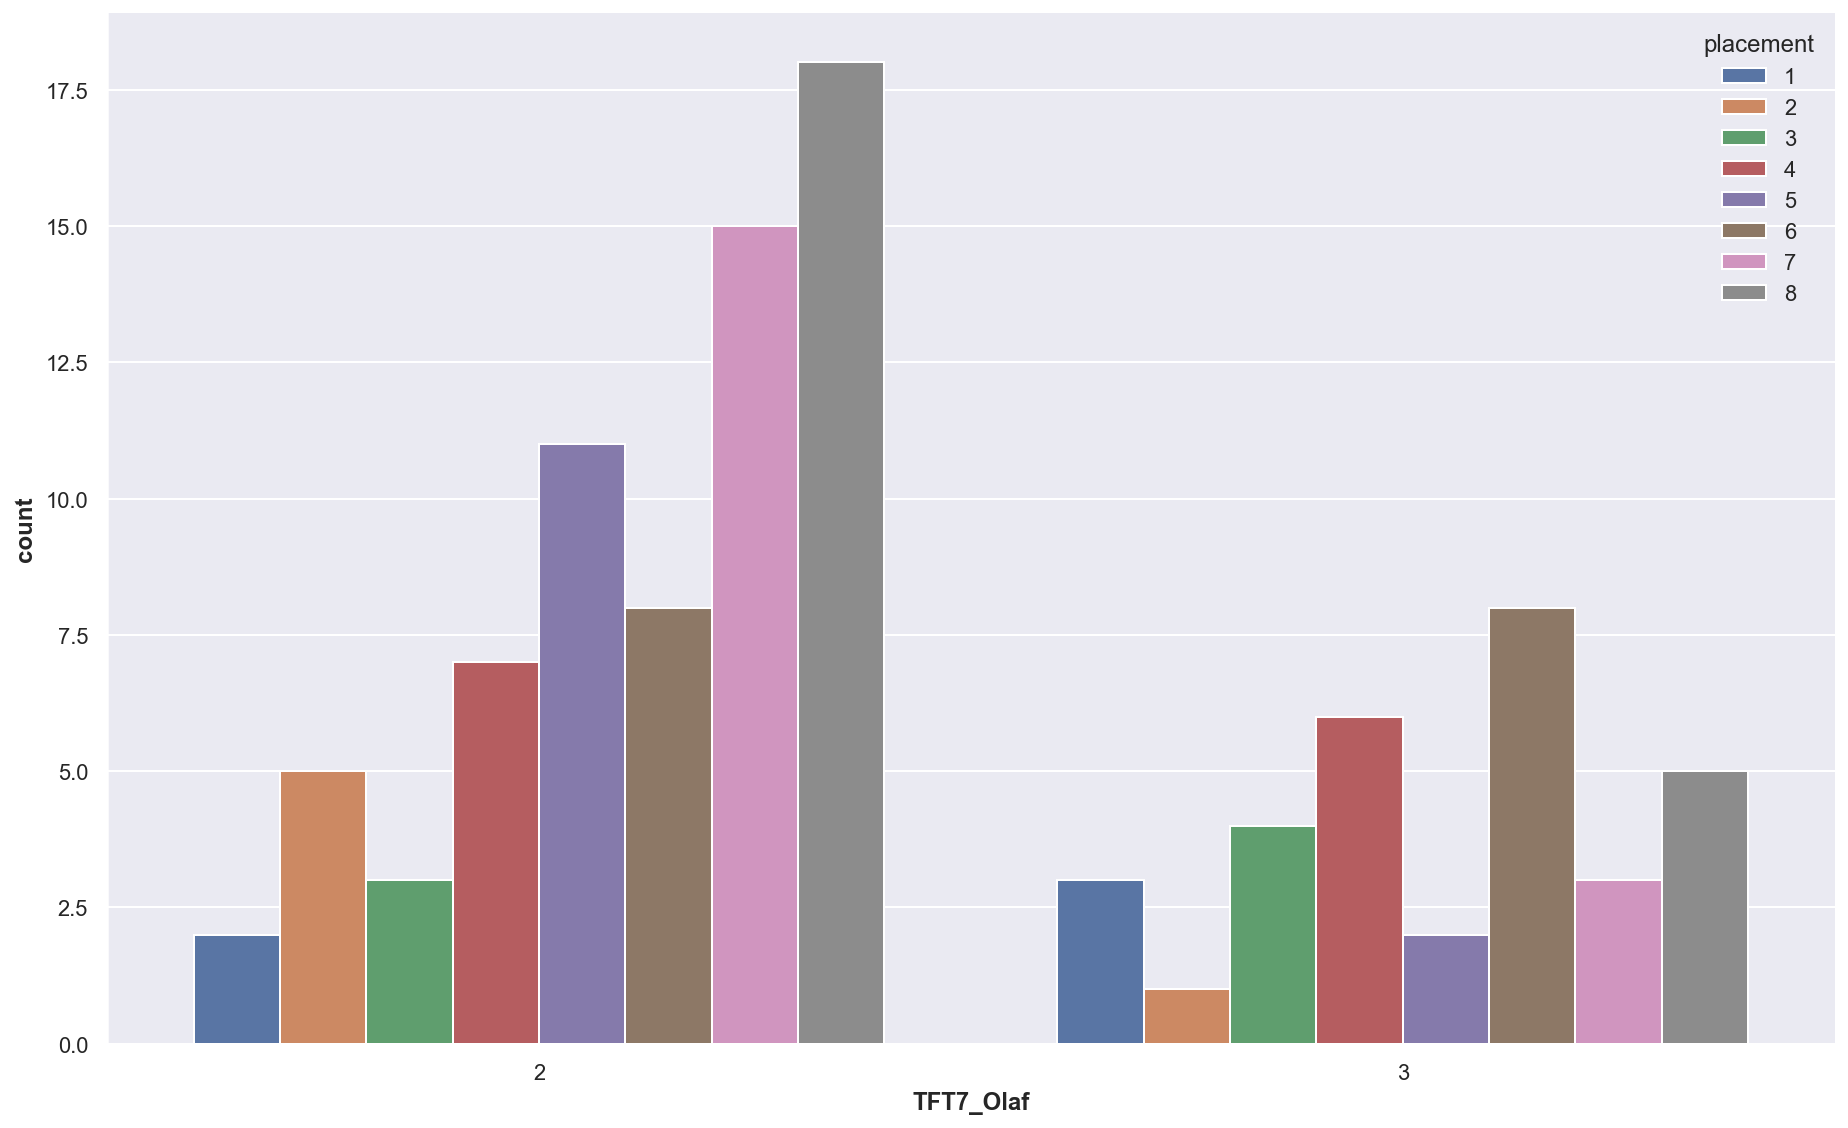

In [973]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item1']=='TFT_Item_GuinsoosRageblade') | (matches_df['TFT7_Olaf_item2']=='TFT_Item_GuinsoosRageblade')], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

Without TFT_Item_GuinsoosRageblade

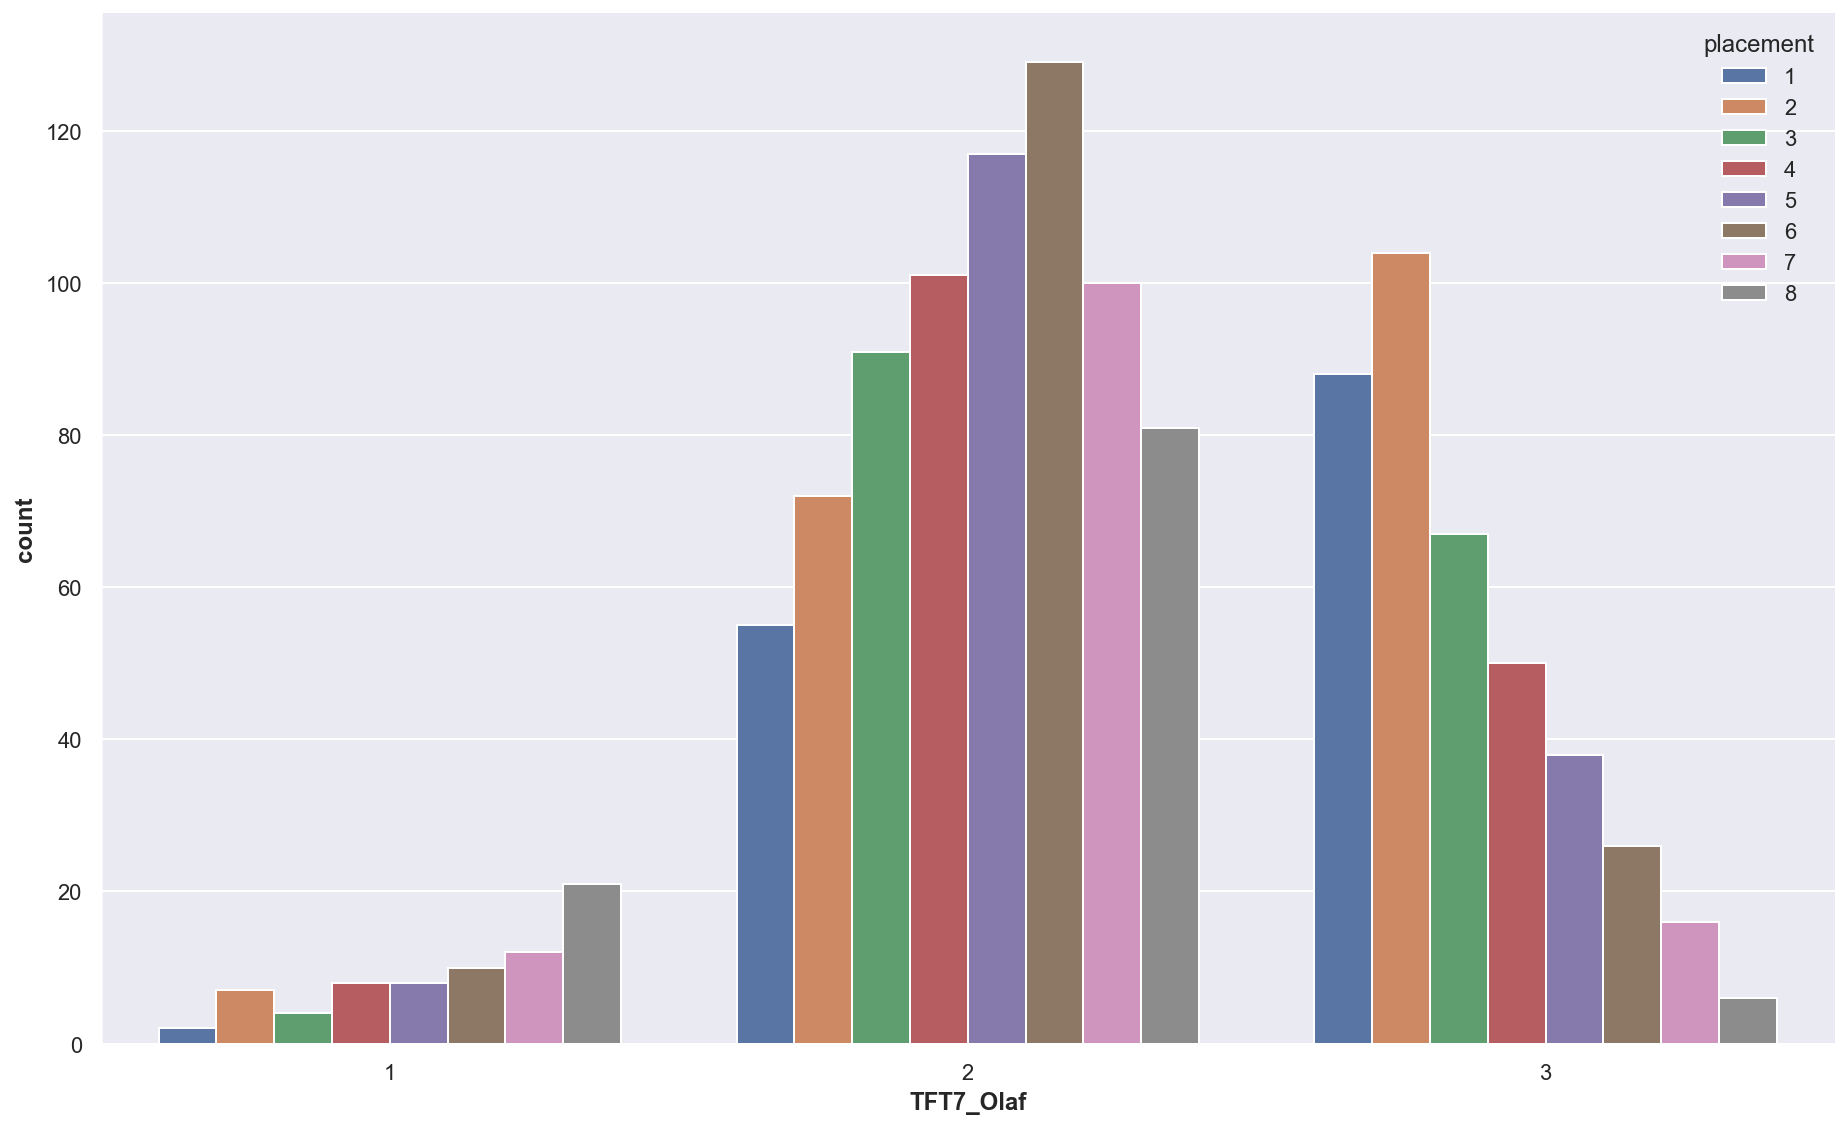

In [974]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[(matches_df['TFT7_Olaf_item0']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item1']!='TFT_Item_GuinsoosRageblade') & (matches_df['TFT7_Olaf_item2']!='TFT_Item_GuinsoosRageblade')&(matches_df['TFT7_Olaf']>0)], x='TFT7_Olaf', hue=TARGETNAME)
sns.despine()

In [1045]:
def get_unit_item_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    m = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2').melt(
        'placement', value_name=f'{unit}_item')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_item', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_item', as_index=False).agg(**dct).sort_values(by='average_placement')


In [1046]:
TFT7_Olaf_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Olaf')
TFT7_Olaf_item_merged_df[TFT7_Olaf_item_merged_df['value_count']>=10][:35]

TFT7_Olaf_item  value_count  average_placement
40      TFT_Item_HextechGunblade           10           3.300000
69          TFT_Item_ZekesHerald           40           3.900000
41         TFT_Item_InfinityEdge          623           3.967897
15  TFT7_Item_AssassinEmblemItem          713           4.012623
33           TFT_Item_Deathblade           61           4.049180
52      TFT_Item_RapidFireCannon          256           4.062500
56     TFT_Item_RunaansHurricane          544           4.172794
38        TFT_Item_GuardianAngel           40           4.275000
44          TFT_Item_LastWhisper           25           4.400000
20    TFT7_Item_MirageEmblemItem           14           4.428571
16  TFT7_Item_CavalierEmblemItem           13           4.461538
64         TFT_Item_ThiefsGloves           22           4.500000
50          TFT_Item_Quicksilver          169           4.514793
0                           None        38487           4.521839
29        TFT_Item_Bloodthirster          143           4.545455
67   TFT_Item_UnstableConcoction           86           4.593023
46    TFT_Item_MadredsBloodrazor          190           4.657895
66        TFT_Item_TitansResolve           33           4.787879
2    TFT4_Item_OrnnInfinityForce           11           4.909091
53           TFT_Item_RecurveBow           11           5.181818
1   TFT4_Item_OrnnDeathsDefiance           15           5.400000
39    TFT_Item_GuinsoosRageblade          103           5.572816

In [977]:
TFT7_Xayah_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Xayah')
TFT7_Xayah_item_merged_df[TFT7_Xayah_item_merged_df['value_count']>=20][:35]

TFT7_Xayah_item  value_count  average_placement
3         TFT4_Item_OrnnObsidianCleaver           30           3.766667
2           TFT4_Item_OrnnInfinityForce           96           3.854167
82                 TFT_Item_ZekesHerald           88           3.863636
24            TFT7_Item_GuildEmblemItem          173           3.976879
23     TFT7_Item_DragonmancerEmblemItem           57           3.982456
53             TFT_Item_HextechGunblade           33           4.000000
4            TFT4_Item_OrnnTheCollector           44           4.090909
77                TFT_Item_ThiefsGloves           26           4.115385
75                 TFT_Item_StatikkShiv          164           4.128049
51               TFT_Item_GuardianAngel          184           4.152174
70            TFT_Item_RunaansHurricane          288           4.197917
30     TFT7_Item_ShimmerscaleDravensAxe          117           4.205128
66             TFT_Item_RapidFireCannon           77           4.220779
45                  TFT_Item_Deathblade          558           4.283154
59           TFT_Item_MadredsBloodrazor         2076           4.283237
33  TFT7_Item_ShimmerscaleGamblersBlade           24           4.291667
80          TFT_Item_UnstableConcoction          382           4.342932
52           TFT_Item_GuinsoosRageblade         2414           4.343413
64                 TFT_Item_Quicksilver         1318           4.374052
41               TFT_Item_Bloodthirster           73           4.383562
54                TFT_Item_InfinityEdge          599           4.383973
57                 TFT_Item_LastWhisper          173           4.427746
79               TFT_Item_TitansResolve           60           4.450000
0                                  None        32382           4.552962
67                  TFT_Item_RecurveBow           21           6.190476
40                     TFT_Item_BFSword           24           6.333333

In [978]:
TFT7_Corki_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Corki')
TFT7_Corki_item_merged_df[TFT7_Corki_item_merged_df['value_count']>=20][:35]

TFT7_Corki_item  value_count  average_placement
2              TFT4_Item_OrnnInfinityForce           87           3.770115
71                    TFT_Item_StatikkShiv          167           3.772455
63                TFT_Item_RapidFireCannon           43           3.883721
78                    TFT_Item_ZekesHerald           30           3.933333
4            TFT4_Item_OrnnObsidianCleaver           31           3.967742
75                  TFT_Item_TitansResolve           44           4.045455
51                TFT_Item_HextechGunblade          117           4.051282
70                  TFT_Item_SpearOfShojin           78           4.089744
5               TFT4_Item_OrnnTheCollector           30           4.266667
49                  TFT_Item_GuardianAngel           75           4.320000
66               TFT_Item_RunaansHurricane          281           4.377224
30        TFT7_Item_ShimmerscaleDravensAxe          249           4.401606
55                    TFT_Item_LastWhisper          507           4.410256
0                                     None        34262           4.498833
76             TFT_Item_UnstableConcoction          570           4.519298
50              TFT_Item_GuinsoosRageblade         1329           4.523702
52                   TFT_Item_InfinityEdge          952           4.530462
57              TFT_Item_MadredsBloodrazor         1489           4.577569
67                 TFT_Item_SeraphsEmbrace           73           4.589041
46                     TFT_Item_Deathblade          589           4.629881
42                  TFT_Item_Bloodthirster           87           4.666667
54                TFT_Item_JeweledGauntlet           36           4.777778
61                    TFT_Item_Quicksilver          300           4.780000
32     TFT7_Item_ShimmerscaleGamblersBlade           98           4.887755
33  TFT7_Item_ShimmerscaleGoldmancersStaff           32           5.968750

In [979]:
TFT7_Shyvana_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_Shyvana')
TFT7_Shyvana_item_merged_df[TFT7_Shyvana_item_merged_df['value_count']>=10][:25]

TFT7_Shyvana_item  value_count  average_placement
63         TFT_Item_RunaansHurricane           21           2.190476
53           TFT_Item_Morellonomicon          100           2.830000
76                   TFT_Item_Zephyr           14           3.071429
46          TFT_Item_HextechGunblade           78           3.166667
58         TFT_Item_RabadonsDeathcap           98           3.204082
3        TFT4_Item_OrnnEternalWinter           13           3.230769
49          TFT_Item_JeweledGauntlet           77           3.259740
71             TFT_Item_TitanicHydra           15           3.266667
48               TFT_Item_IonicSpark          117           3.299145
41              TFT_Item_FrozenHeart          127           3.299213
20  TFT7_Item_DragonmancerEmblemItem           89           3.404494
32          TFT_Item_ArchangelsStaff           73           3.410959
37                  TFT_Item_Chalice           11           3.454545
64           TFT_Item_SeraphsEmbrace           17           3.470588
35              TFT_Item_BrambleVest          102           3.480392
72            TFT_Item_TitansResolve          138           3.550725
42       TFT_Item_GargoyleStoneplate          126           3.555556
65                   TFT_Item_Shroud           28           3.571429
44            TFT_Item_GuardianAngel           34           3.588235
57              TFT_Item_Quicksilver           36           3.611111
56            TFT_Item_PowerGauntlet           13           3.615385
39              TFT_Item_DragonsClaw          138           3.637681
45        TFT_Item_GuinsoosRageblade           35           3.685714
62               TFT_Item_Redemption          104           3.778846
74             TFT_Item_WarmogsArmor          155           3.780645

In [980]:
TFT7_DragonBlue_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonBlue')
TFT7_DragonBlue_item_merged_df[TFT7_DragonBlue_item_merged_df['value_count']>=10][:25]

TFT7_DragonBlue_item  value_count  average_placement
2              TFT4_Item_OrnnInfinityForce           14           3.285714
64                  TFT_Item_TitansResolve           16           3.312500
24               TFT7_Item_RevelEmblemItem          101           3.623762
29  TFT7_Item_ShimmerscaleGoldmancersStaff           17           4.000000
50                 TFT_Item_Morellonomicon           22           4.136364
22               TFT7_Item_GuildEmblemItem           16           4.312500
55                TFT_Item_RapidFireCannon           39           4.358974
53                    TFT_Item_Quicksilver          234           4.427350
54               TFT_Item_RabadonsDeathcap          105           4.447619
65             TFT_Item_UnstableConcoction          170           4.470588
33                TFT_Item_ArchangelsStaff          358           4.474860
49              TFT_Item_MadredsBloodrazor          423           4.489362
0                                     None        38654           4.494826
62                    TFT_Item_StatikkShiv          216           4.518519
44                TFT_Item_HextechGunblade           99           4.595960
46                TFT_Item_JeweledGauntlet          322           4.599379
43              TFT_Item_GuinsoosRageblade          486           4.709877
45                   TFT_Item_InfinityEdge          240           4.741667
42                  TFT_Item_GuardianAngel           22           4.772727
61                  TFT_Item_SpearOfShojin           49           5.265306
35                  TFT_Item_Bloodthirster           28           5.428571

In [1047]:
TFT7_DragonPurple_item_merged_df = get_unit_item_ranking(df=matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_item_merged_df[TFT7_DragonPurple_item_merged_df['value_count']>=10][:25]

TFT7_DragonPurple_item  value_count  average_placement
4     TFT4_Item_OrnnInfinityForce           15           3.000000
2    TFT4_Item_OrnnDeathsDefiance           16           3.375000
50         TFT_Item_GuardianAngel           45           3.777778
64       TFT_Item_RapidFireCannon           52           3.884615
62           TFT_Item_Quicksilver          200           3.965000
52       TFT_Item_HextechGunblade           30           4.000000
58     TFT_Item_MadredsBloodrazor          115           4.017391
20   TFT7_Item_AssassinEmblemItem          130           4.023077
77    TFT_Item_UnstableConcoction          134           4.052239
71         TFT_Item_SpearOfShojin           10           4.100000
76         TFT_Item_TitansResolve          245           4.114286
53          TFT_Item_InfinityEdge          219           4.136986
48    TFT_Item_GargoyleStoneplate           26           4.153846
74          TFT_Item_ThiefsGloves           38           4.184211
40         TFT_Item_Bloodthirster          401           4.244389
41           TFT_Item_BrambleVest           17           4.352941
68      TFT_Item_RunaansHurricane           61           4.377049
47           TFT_Item_FrozenHeart           39           4.384615
0                            None        39381           4.514817
51     TFT_Item_GuinsoosRageblade          239           4.573222
45           TFT_Item_DragonsClaw           43           4.581395
35  TFT7_Item_SwiftshotEmblemItem           12           4.583333
67            TFT_Item_Redemption           23           4.739130
66               TFT_Item_RedBuff           54           4.759259
54            TFT_Item_IonicSpark           13           4.923077

In [981]:
def get_unit_items_ranking(df: matches_df, unit: str):
    # filter and melt the dataframe
    df = df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
    df[f'{unit}_items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    m = df.melt(
        'placement', value_name=f'{unit}_items')
    # group and aggregate mean/median
    dct = {'value_count': (f'{unit}_items', 'count'),
           'average_placement': ('placement', 'mean')}
    return m.groupby(f'{unit}_items', as_index=False).agg(**dct).sort_values(by='average_placement')

In [1048]:
TFT7_Corki_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_Corki')
TFT7_Corki_items_merged_df[TFT7_Corki_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_34384\2377781970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{unit}_items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
C:\Users\furyx\AppData\Local\Temp\ipykernel_34384\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_Corki_items  value_count  \
401   TFT_Item_GuinsoosRageblade_TFT7_Item_Shimmersc...            7   
808                      TFT_Item_LocketOfTheIronSolari            7   
1304  TFT_Item_UnstableConcoction_TFT_Item_InfinityE...            5   
765   TFT_Item_LastWhisper_TFT_Item_InfinityEdge_TFT...            9   
1314  TFT_Item_UnstableConcoction_TFT_Item_LastWhisp...            5   
1306  TFT_Item_UnstableConcoction_TFT_Item_InfinityE...            9   
779   TFT_Item_LastWhisper_TFT_Item_MadredsBloodrazo...            9   
1236                              TFT_Item_ThiefsGloves           14   
108                  TFT7_Item_ShimmerscaleDiamondHands            6   
781   TFT_Item_LastWhisper_TFT_Item_MadredsBloodrazo...            9   
26                               TFT4_Item_OrnnMuramana            8   
1037  TFT_Item_Quicksilver_TFT_Item_MadredsBloodrazo...            9   
908   TFT_Item_MadredsBloodrazor_TFT_Item_LastWhispe...            6   
909   TFT_Item_MadredsBloodrazor_TFT_Item_LastWhispe...            5   
284   TFT_Item_Deathblade_TFT_Item_GuinsoosRageblade...            8   
1312  TFT_Item_UnstableConcoction_TFT_Item_LastWhisp...            6   
876   TFT_Item_MadredsBloodrazor_TFT_Item_GuinsoosRa...            6   
754   TFT_Item_LastWhisper_TFT_Item_GuinsoosRageblad...            7   
5                           TFT4_Item_OrnnInfinityForce           87   
1183                               TFT_Item_StatikkShiv          167   

      average_placement  
401            2.285714  
808            2.428571  
1304           2.600000  
765            2.888889  
1314           3.000000  
1306           3.111111  
779            3.111111  
1236           3.142857  
108            3.166667  
781            3.222222  
26             3.375000  
1037           3.444444  
908            3.500000  
909            3.600000  
284            3.625000  
1312           3.666667  
876            3.666667  
754            3.714286  
5              3.770115  
1183           3.772455

In [1049]:
TFT7_DragonPurple_items_merged_df = get_unit_items_ranking(df = matches_df, unit='TFT7_DragonPurple')
TFT7_DragonPurple_items_merged_df[TFT7_DragonPurple_items_merged_df['value_count']>4][:20]

C:\Users\furyx\AppData\Local\Temp\ipykernel_34384\2377781970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{unit}_items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
C:\Users\furyx\AppData\Local\Temp\ipykernel_34384\2377781970.py:5: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = df.melt(


TFT7_DragonPurple_items  value_count  \
338  TFT_Item_InfinityEdge_TFT7_Item_AssassinEmblem...            7   
184  TFT_Item_Bloodthirster_TFT_Item_Quicksilver_TF...            8   
16                         TFT4_Item_OrnnInfinityForce           15   
2                            TFT4_Item_OrnnAnimaVisage            6   
3                         TFT4_Item_OrnnDeathsDefiance           16   
187  TFT_Item_Bloodthirster_TFT_Item_Quicksilver_TF...            8   
95                        TFT7_Item_CavalierEmblemItem            7   
261                             TFT_Item_GuardianAngel           45   
203  TFT_Item_Bloodthirster_TFT_Item_TitansResolve_...            6   
471                           TFT_Item_RapidFireCannon           52   
425                               TFT_Item_Quicksilver          200   
322                           TFT_Item_HextechGunblade           30   
394                         TFT_Item_MadredsBloodrazor          115   
47                        TFT7_Item_AssassinEmblemItem          130   
636                        TFT_Item_UnstableConcoction          134   
538                             TFT_Item_SpearOfShojin           10   
585                             TFT_Item_TitansResolve          245   
292  TFT_Item_GuinsoosRageblade_TFT_Item_Bloodthirs...           17   
332                              TFT_Item_InfinityEdge          219   
201  TFT_Item_Bloodthirster_TFT_Item_TitansResolve_...            7   

     average_placement  
338           2.428571  
184           2.750000  
16            3.000000  
2             3.000000  
3             3.375000  
187           3.500000  
95            3.571429  
261           3.777778  
203           3.833333  
471           3.884615  
425           3.965000  
322           4.000000  
394           4.017391  
47            4.023077  
636           4.052239  
538           4.100000  
585           4.114286  
292           4.117647  
332           4.136986  
201           4.142857

In [983]:
# unit='TFT7_DragonBlue'
# df = matches_df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')
# unit_g = df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2', 'placement']) #.size() #.unstack(level=0)

In [984]:
# unit_g.value_counts()

In [985]:
# df = matches_df.filter(regex=f'placement|{unit}_item0|{unit}_item1|{unit}_item2')

In [986]:
# from itertools import chain, combinations

# def powerset(iterable):
#     s = list(iterable)
#     return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

# dfe =pd.DataFrame()
# for perm in powerset(df.columns[:-1]):
#     features =list(perm)
#     if len(features) != 0 and f'{unit}_item0' in features:
#         dfe = pd.concat([dfe,df.groupby(features,as_index=False).agg({'placement':'mean'})],axis=0)
        
# # result_df = dfe.fillna('all').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=False)

In [987]:
# result_df = dfe.fillna('None').sort_values([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'],ascending=True)
# result_df[:50]

In [988]:
# result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement']

In [989]:
# group_df = result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement'].mean() #transform(lambda x: ",".join(x))

In [990]:
# group_df['count'] = result_df.groupby([f'{unit}_item0', f'{unit}_item1', f'{unit}_item2'])['placement'].size()

In [991]:
# group_df[:30].sort_values()

In [992]:
# df['items'] = df[[f'{unit}_item0', f'{unit}_item1', f'{unit}_item2']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [993]:
# df['avg'] = df.groupby(['items'])['placement'].mean()

In [994]:
# df['vc'] = df.groupby(['items'])['placement'].size()

In [995]:
# ddf = pd.concat([ddf,df.groupby(['items'],as_index=False).agg({'placement':'sum'})],axis=0)

In [996]:
# ddf = pd.DataFrame(ddf)

In [997]:
# df1 = df.filter(regex=f'placement|items')

In [998]:
# m = df1.melt(
#         'placement', value_name=f'items')
# # group and aggregate mean/median
# dct = {'value_count': (f'items', 'count'),
#         'average_placement': ('placement', 'mean')}
# df2 = m.groupby(f'items', as_index=False).agg(**dct).sort_values(by='average_placement')

# Augment

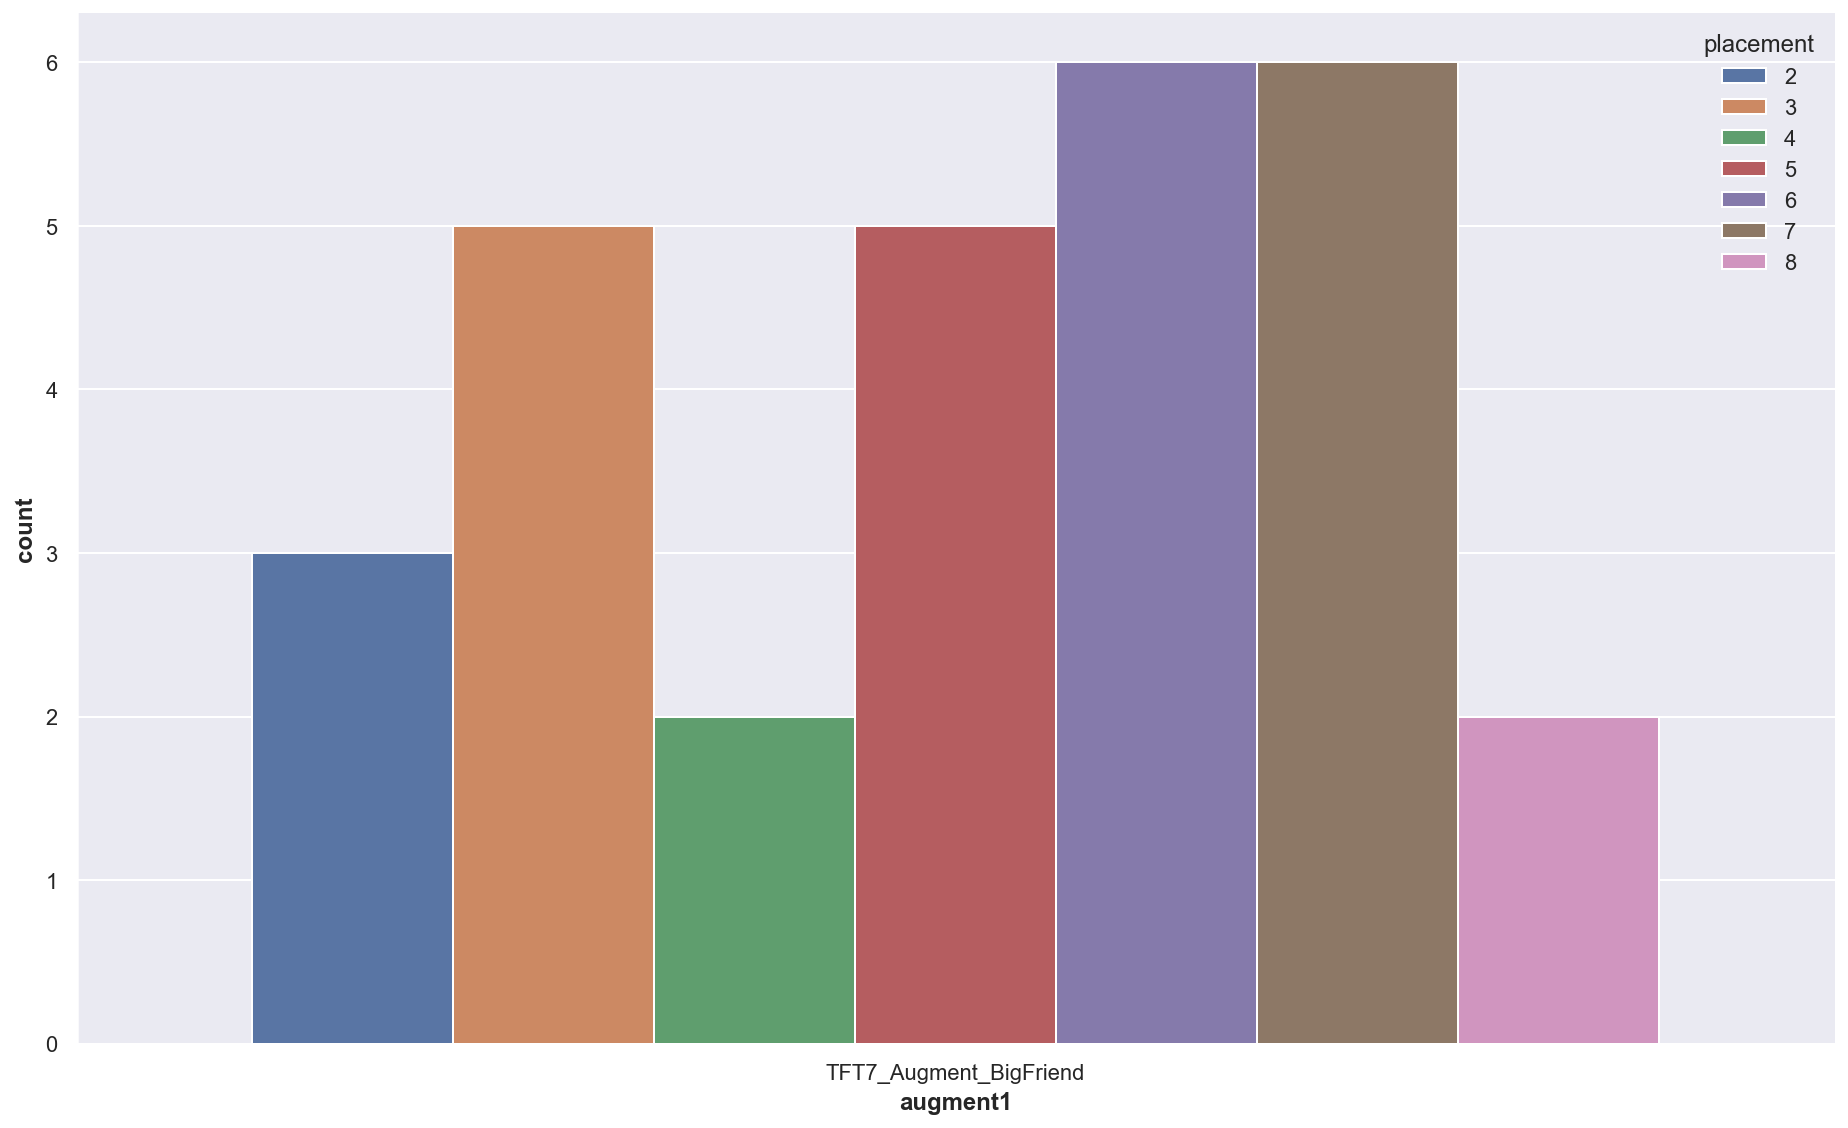

In [999]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment1']=='TFT7_Augment_BigFriend'], x='augment1', hue=TARGETNAME)
sns.despine()

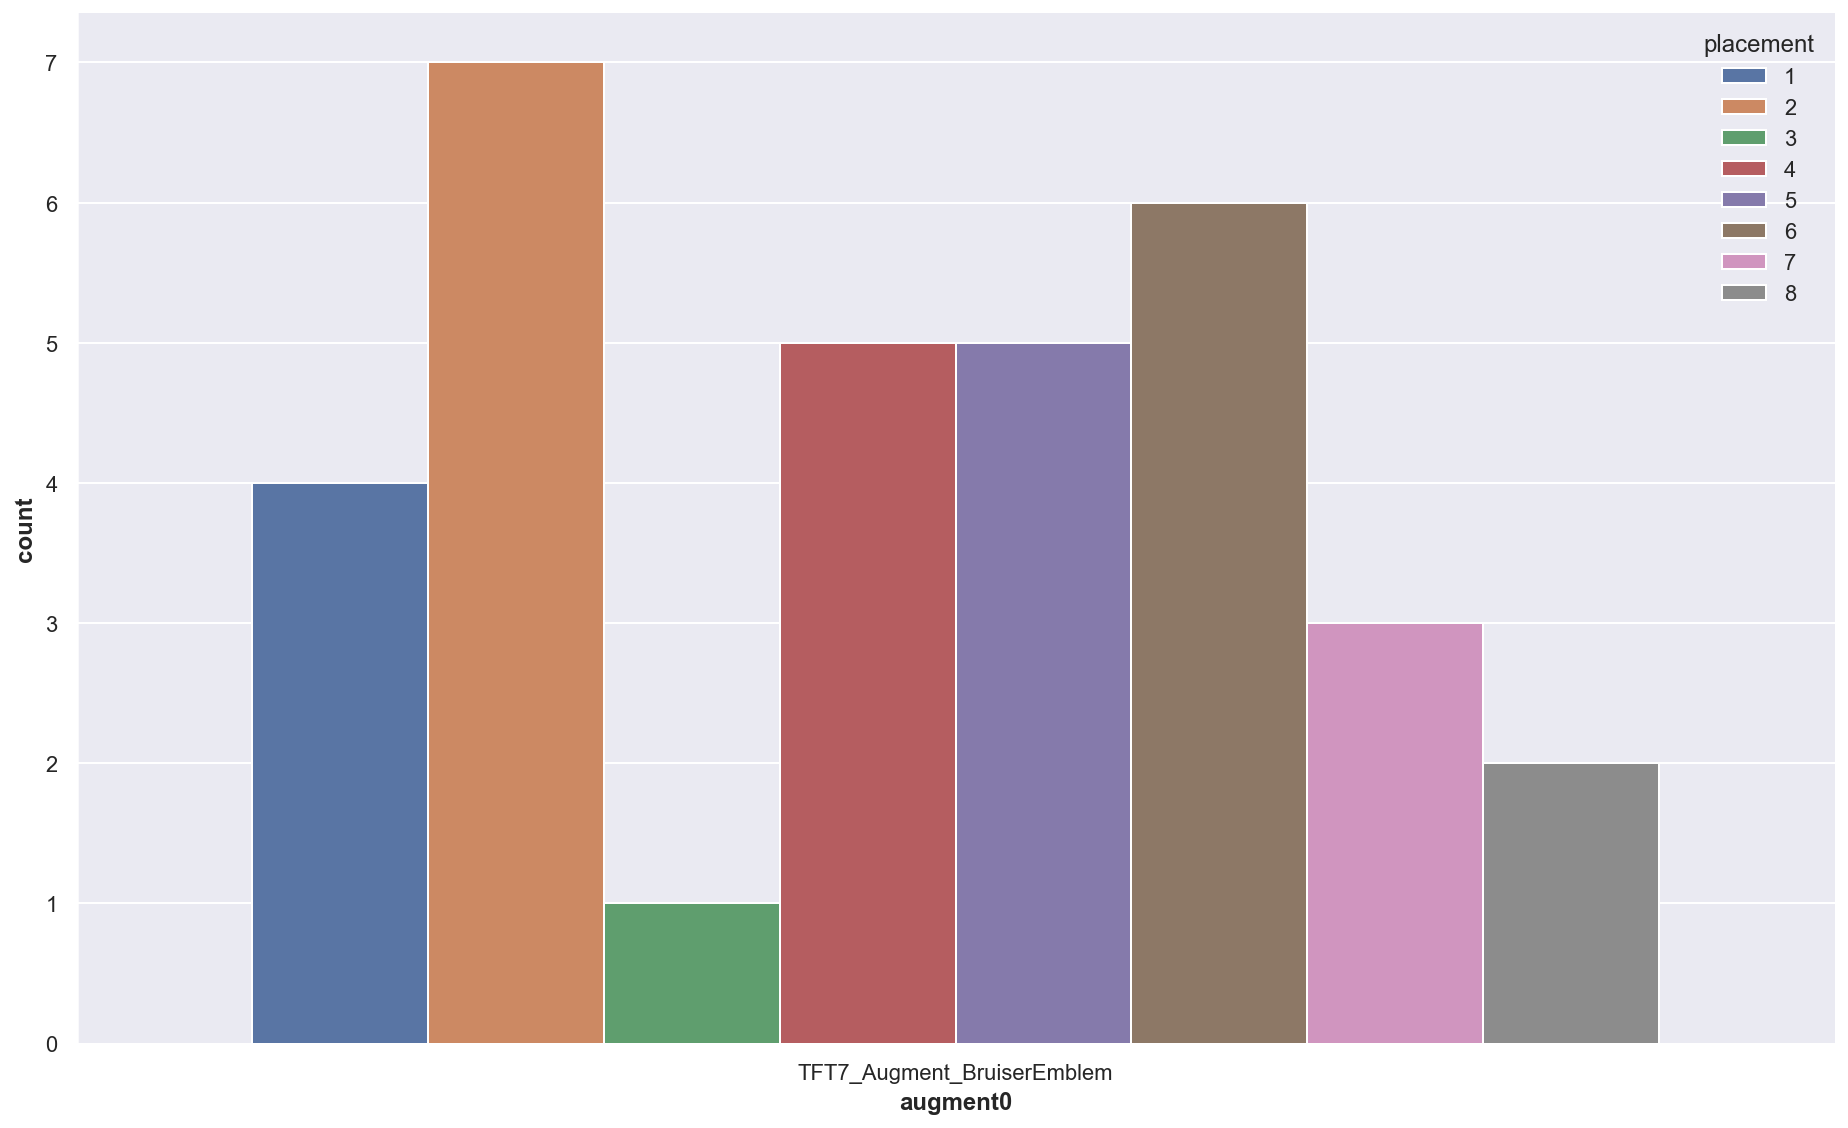

In [1000]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserEmblem'], x='augment0', hue=TARGETNAME)
sns.despine()

Do not pick TFT6_Augment_WindfallPlusPlus.

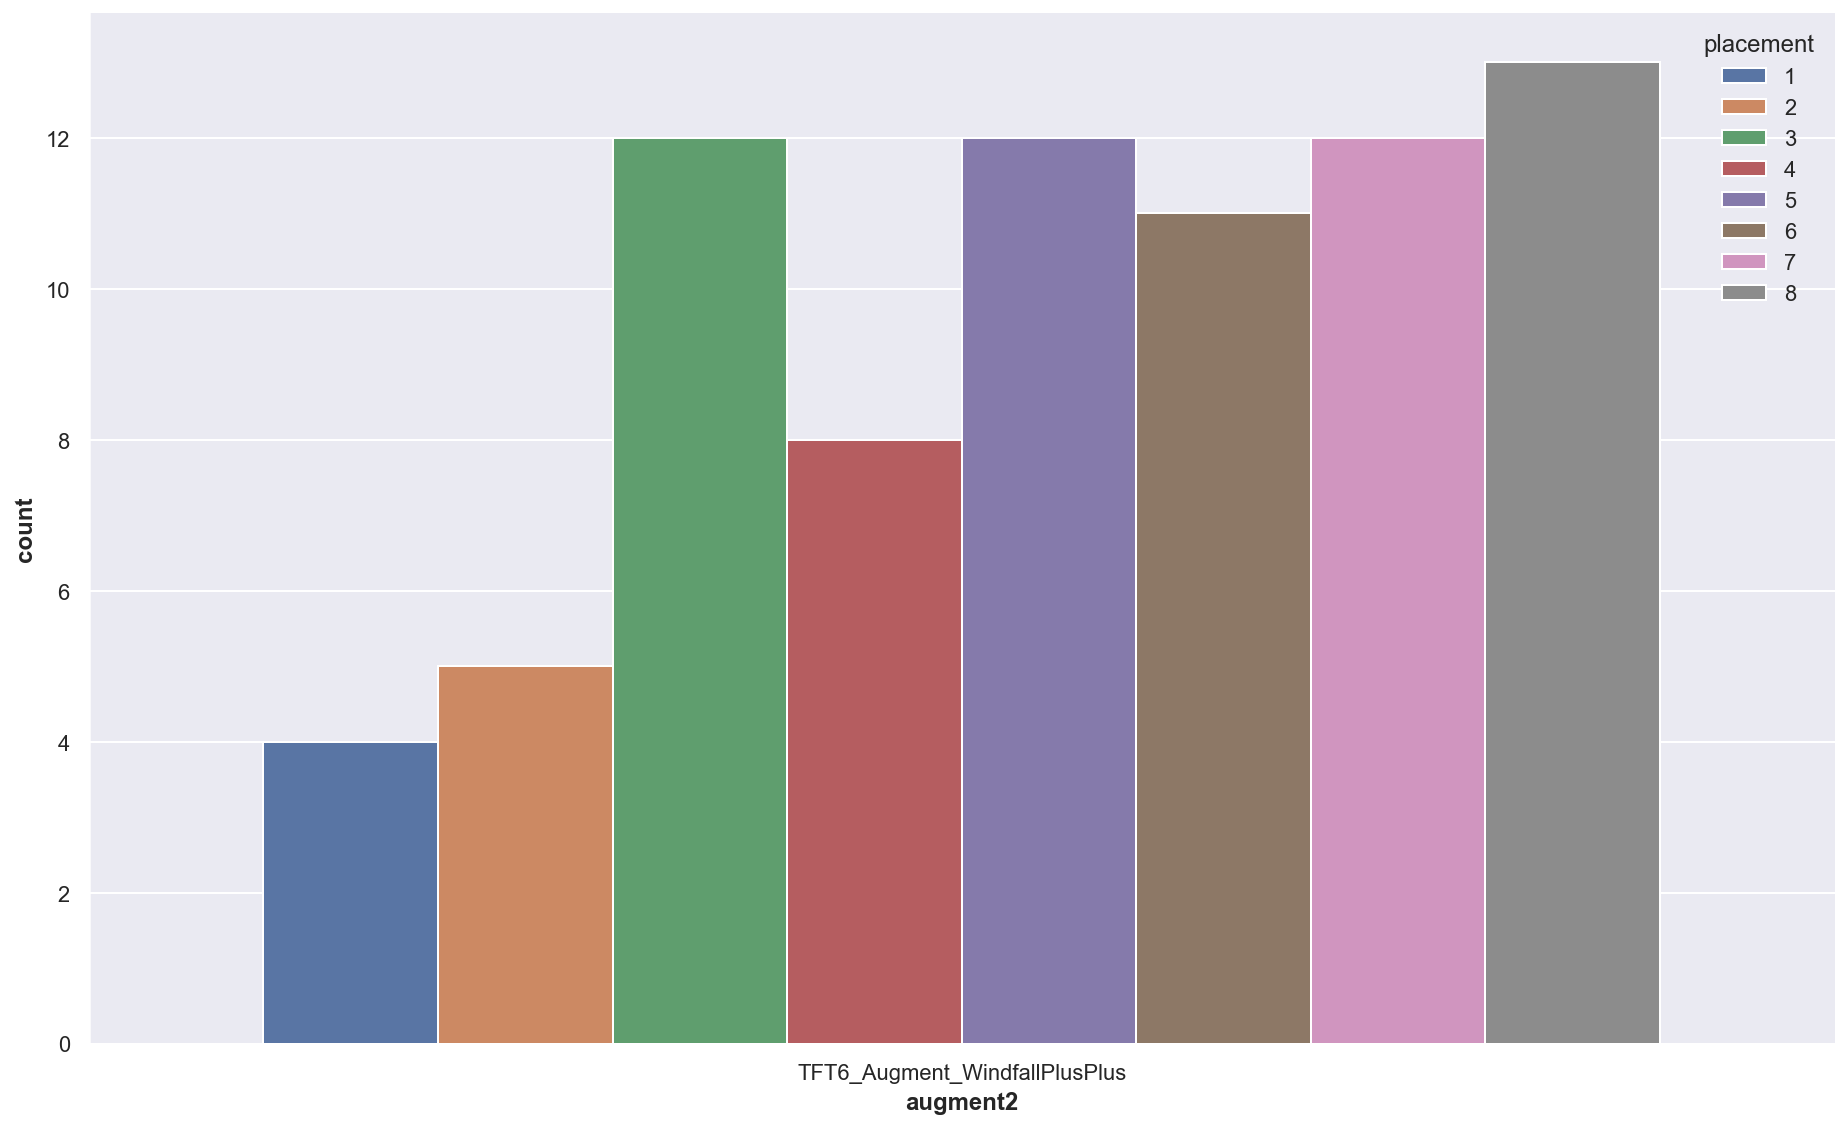

In [1001]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_WindfallPlusPlus'], x='augment2', hue=TARGETNAME)
sns.despine()

Augment TFT6_Augment_CyberneticImplants2 is a good pick.

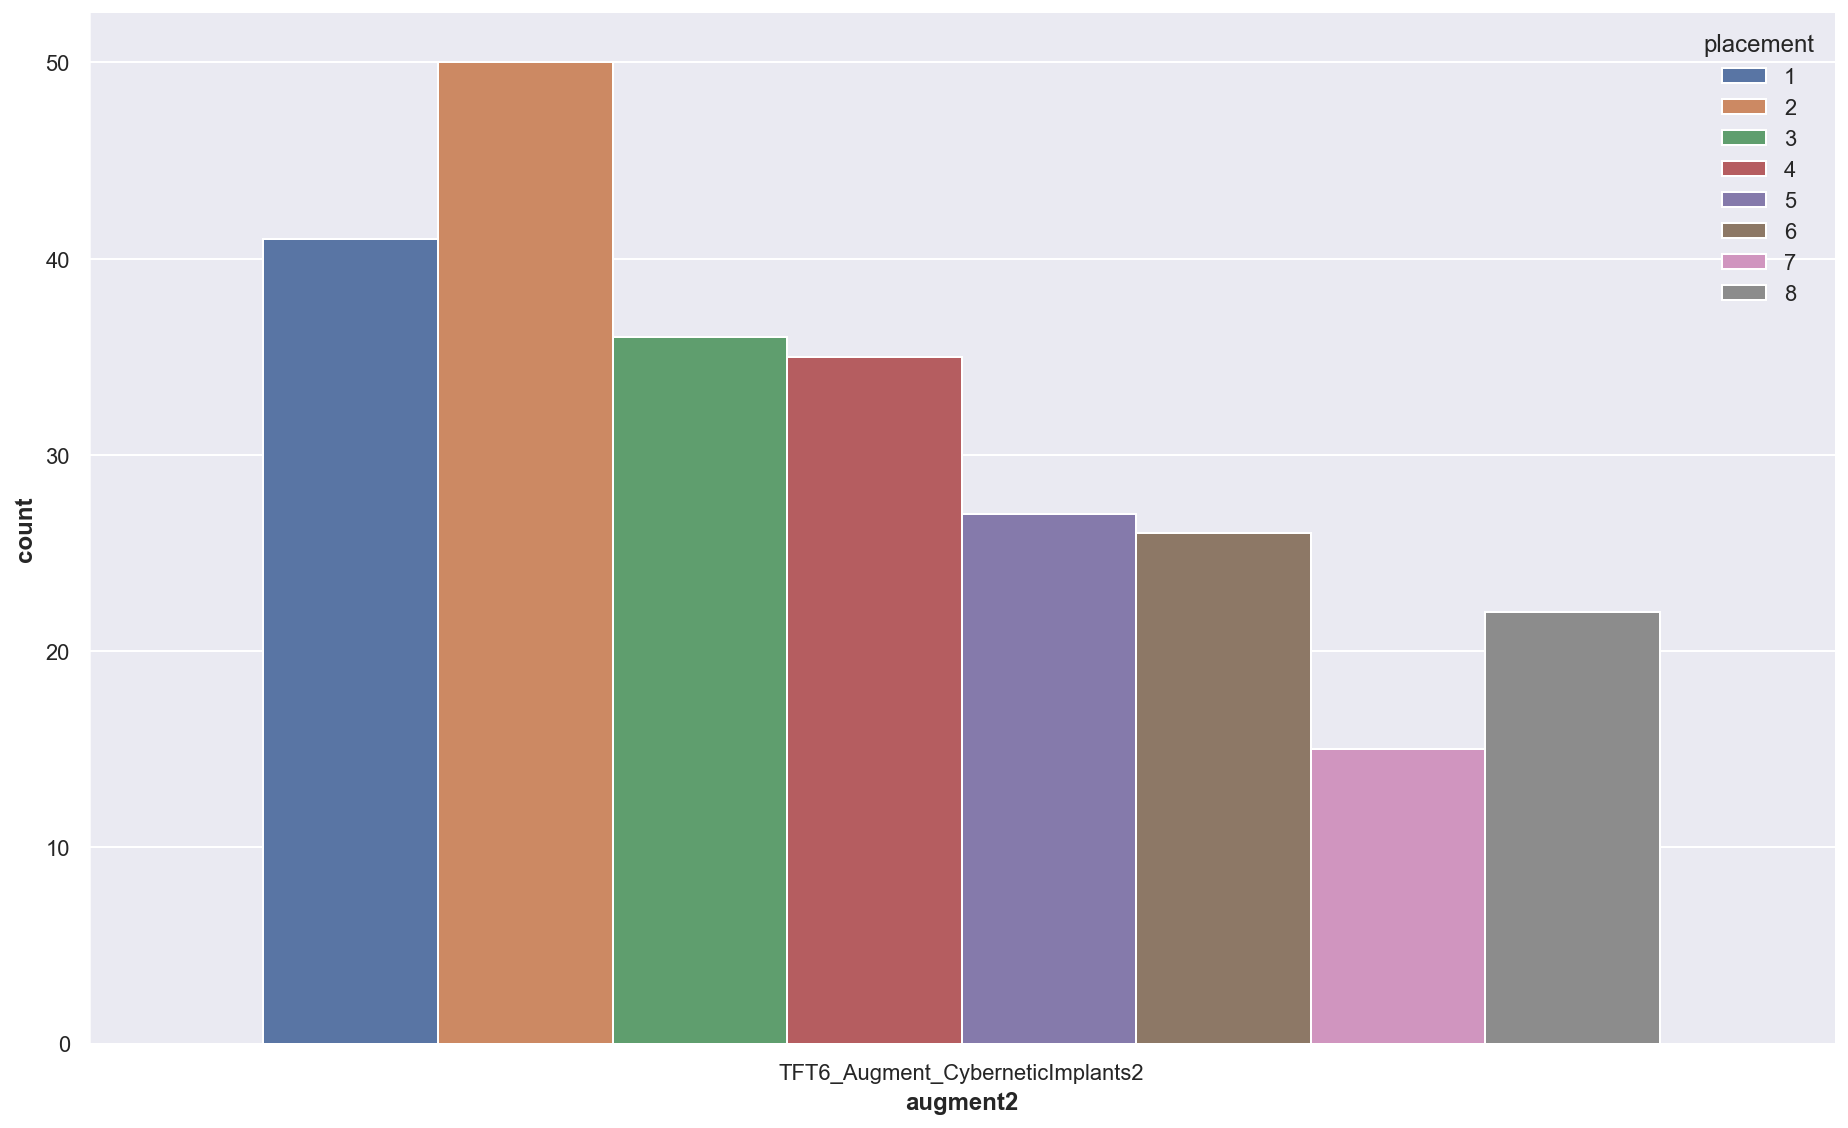

In [1002]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment2']=='TFT6_Augment_CyberneticImplants2'], x='augment2', hue=TARGETNAME)
sns.despine()

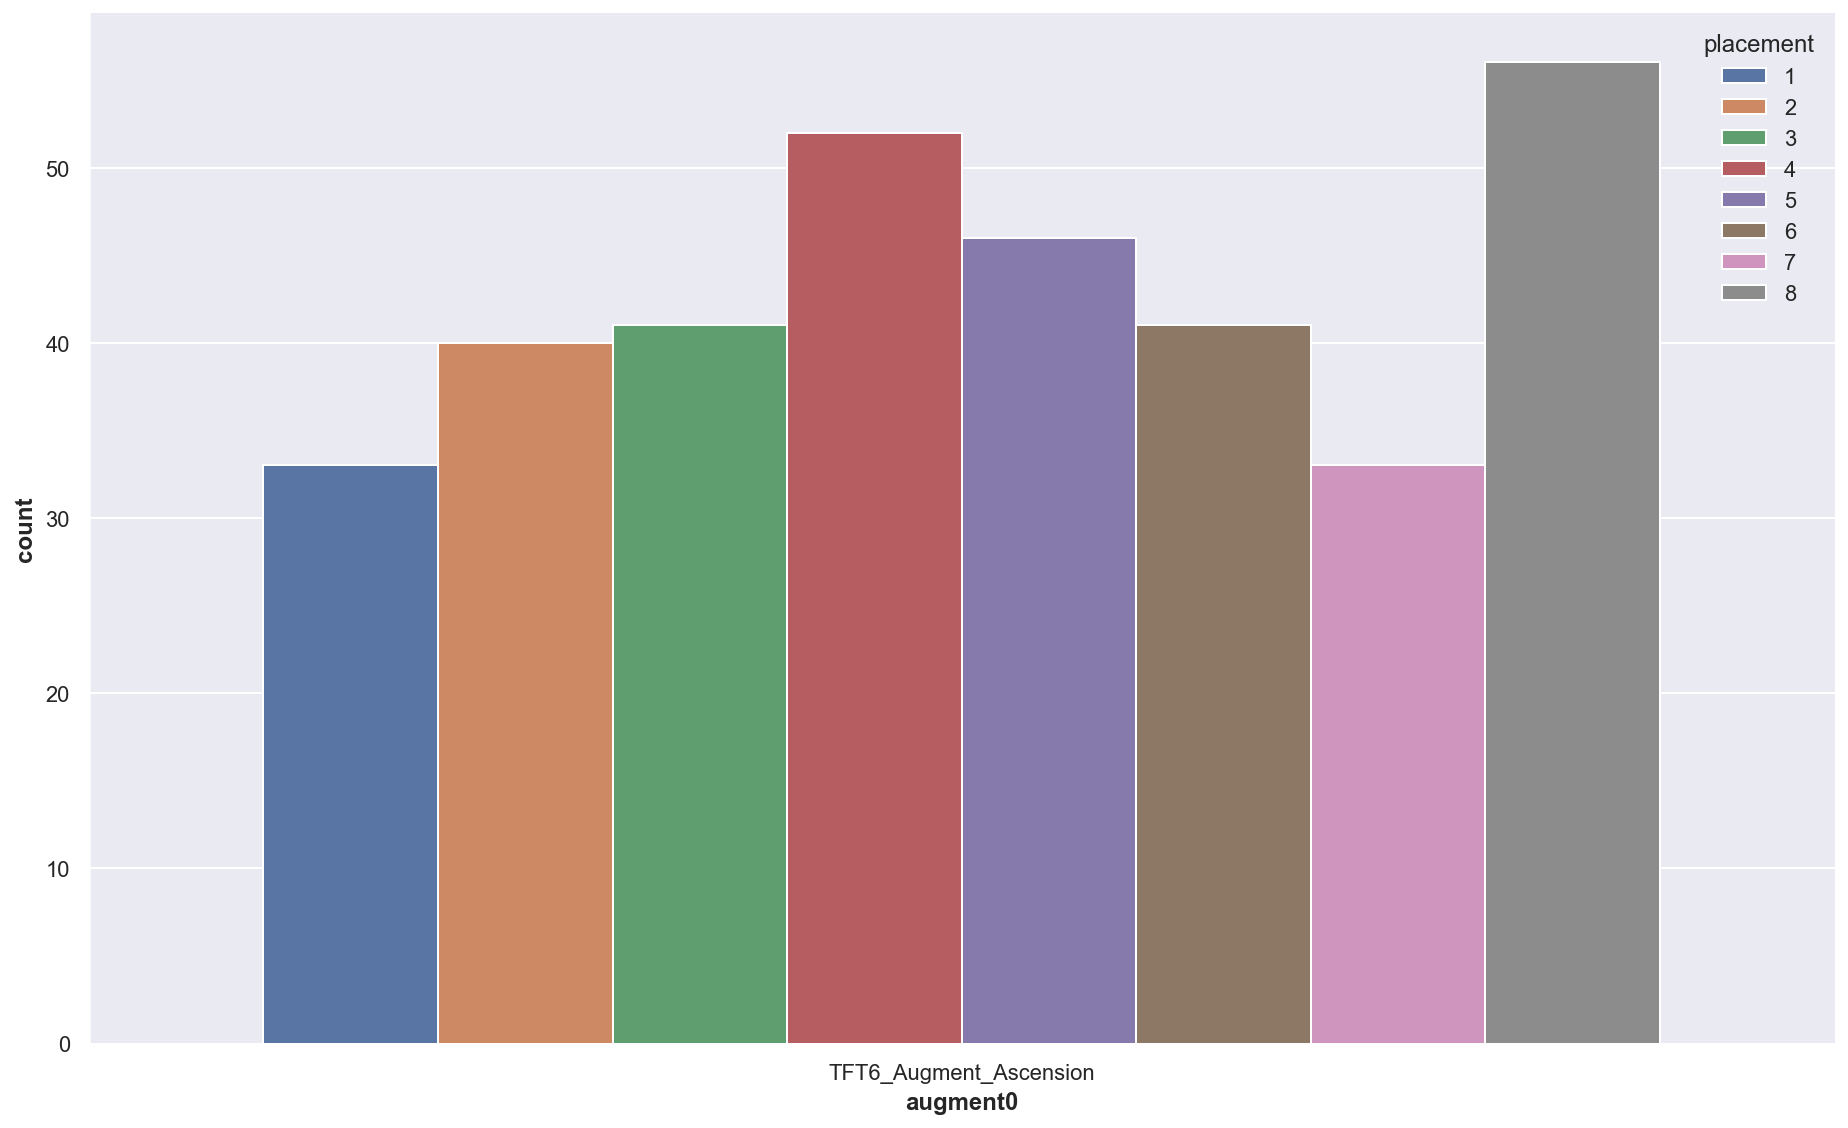

In [1003]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Ascension'], x='augment0', hue=TARGETNAME)
sns.despine()

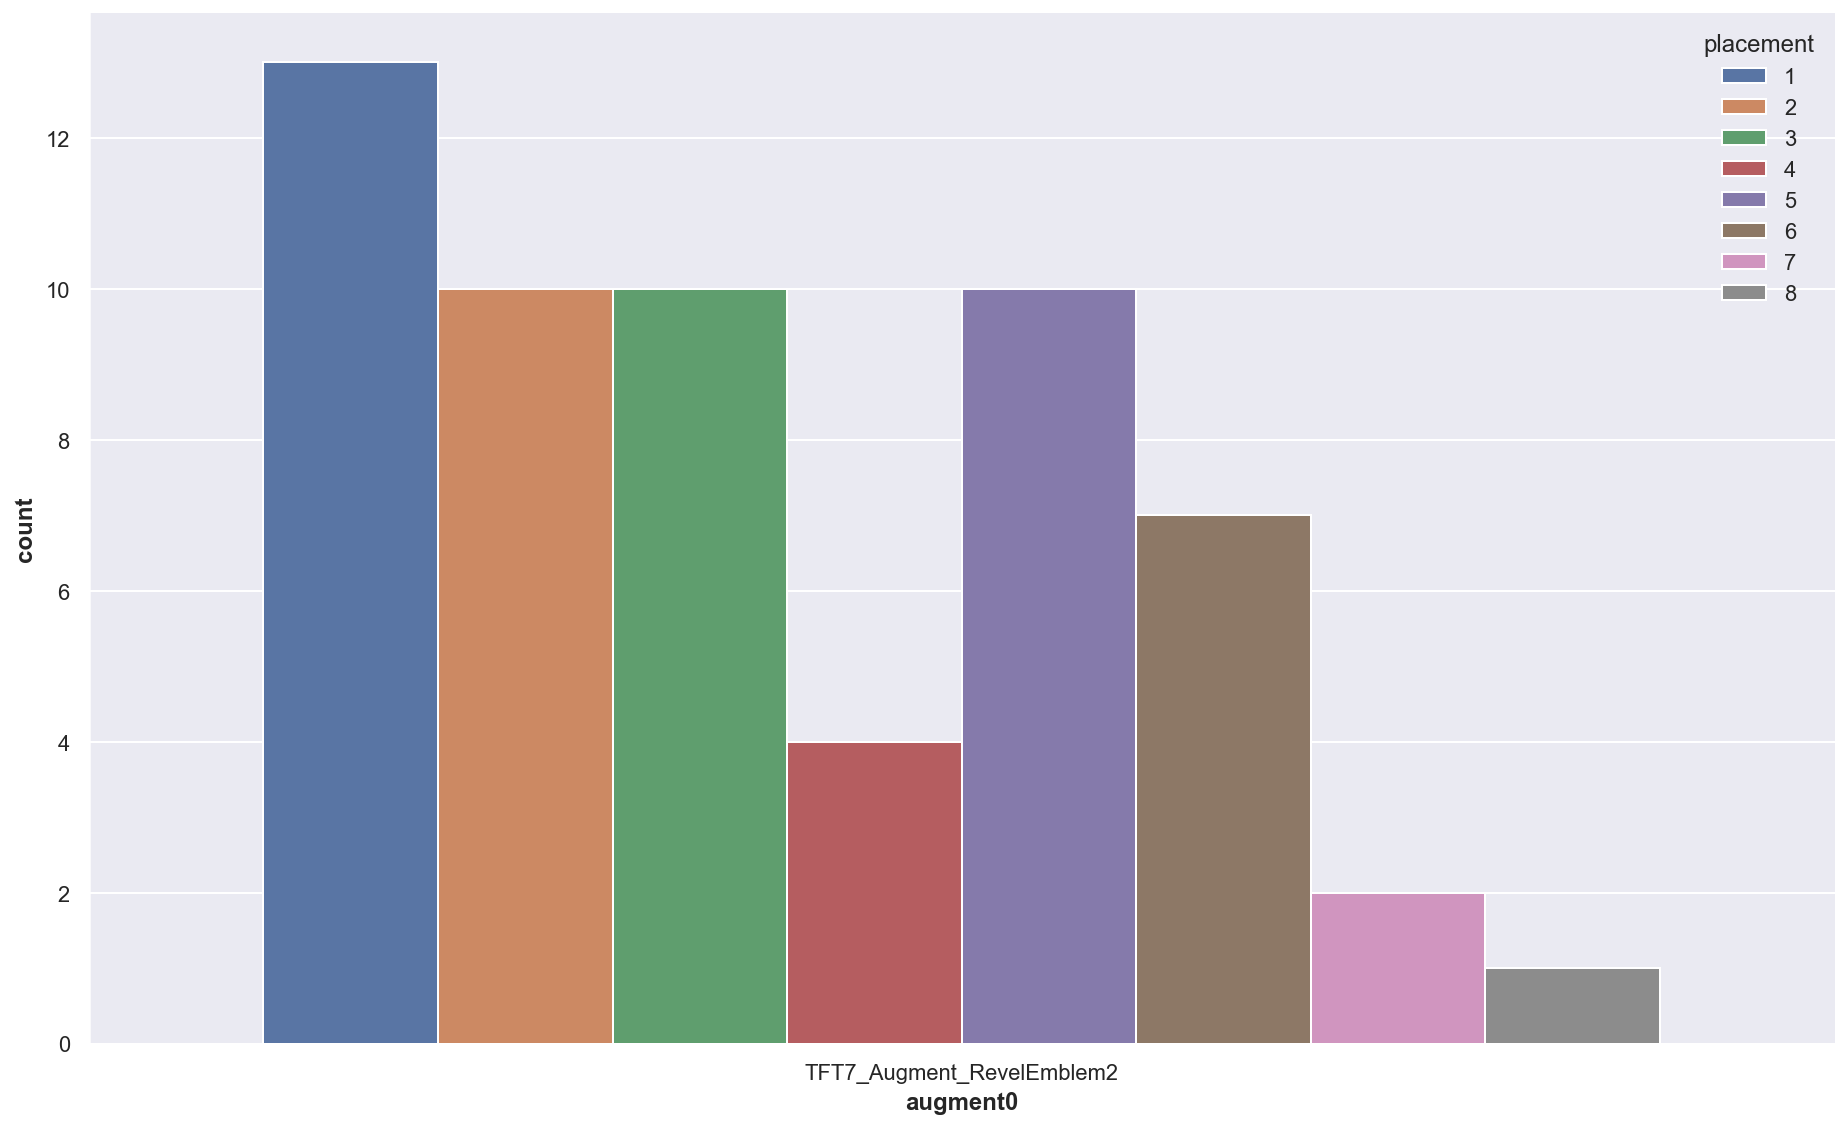

In [1004]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_RevelEmblem2'], x='augment0', hue=TARGETNAME)
sns.despine()

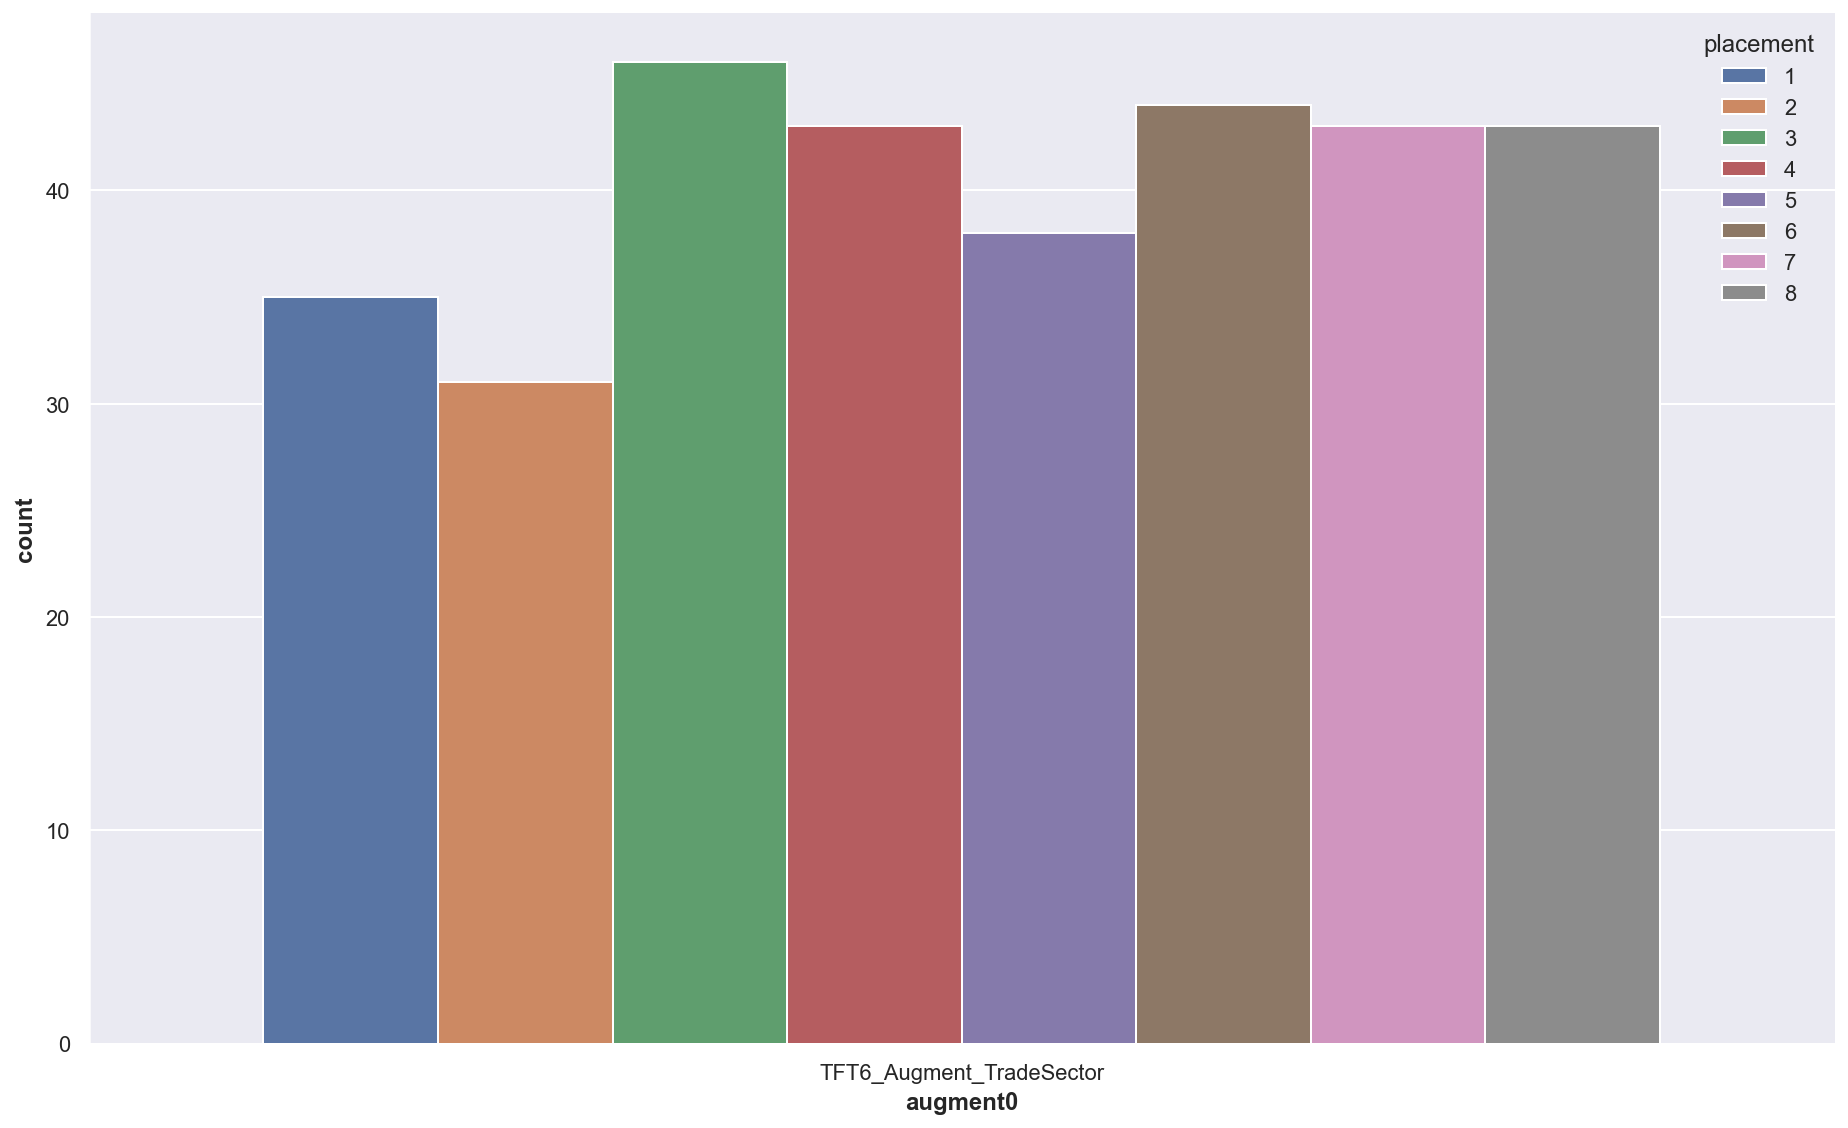

In [1005]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_TradeSector'], x='augment0', hue=TARGETNAME)
sns.despine()

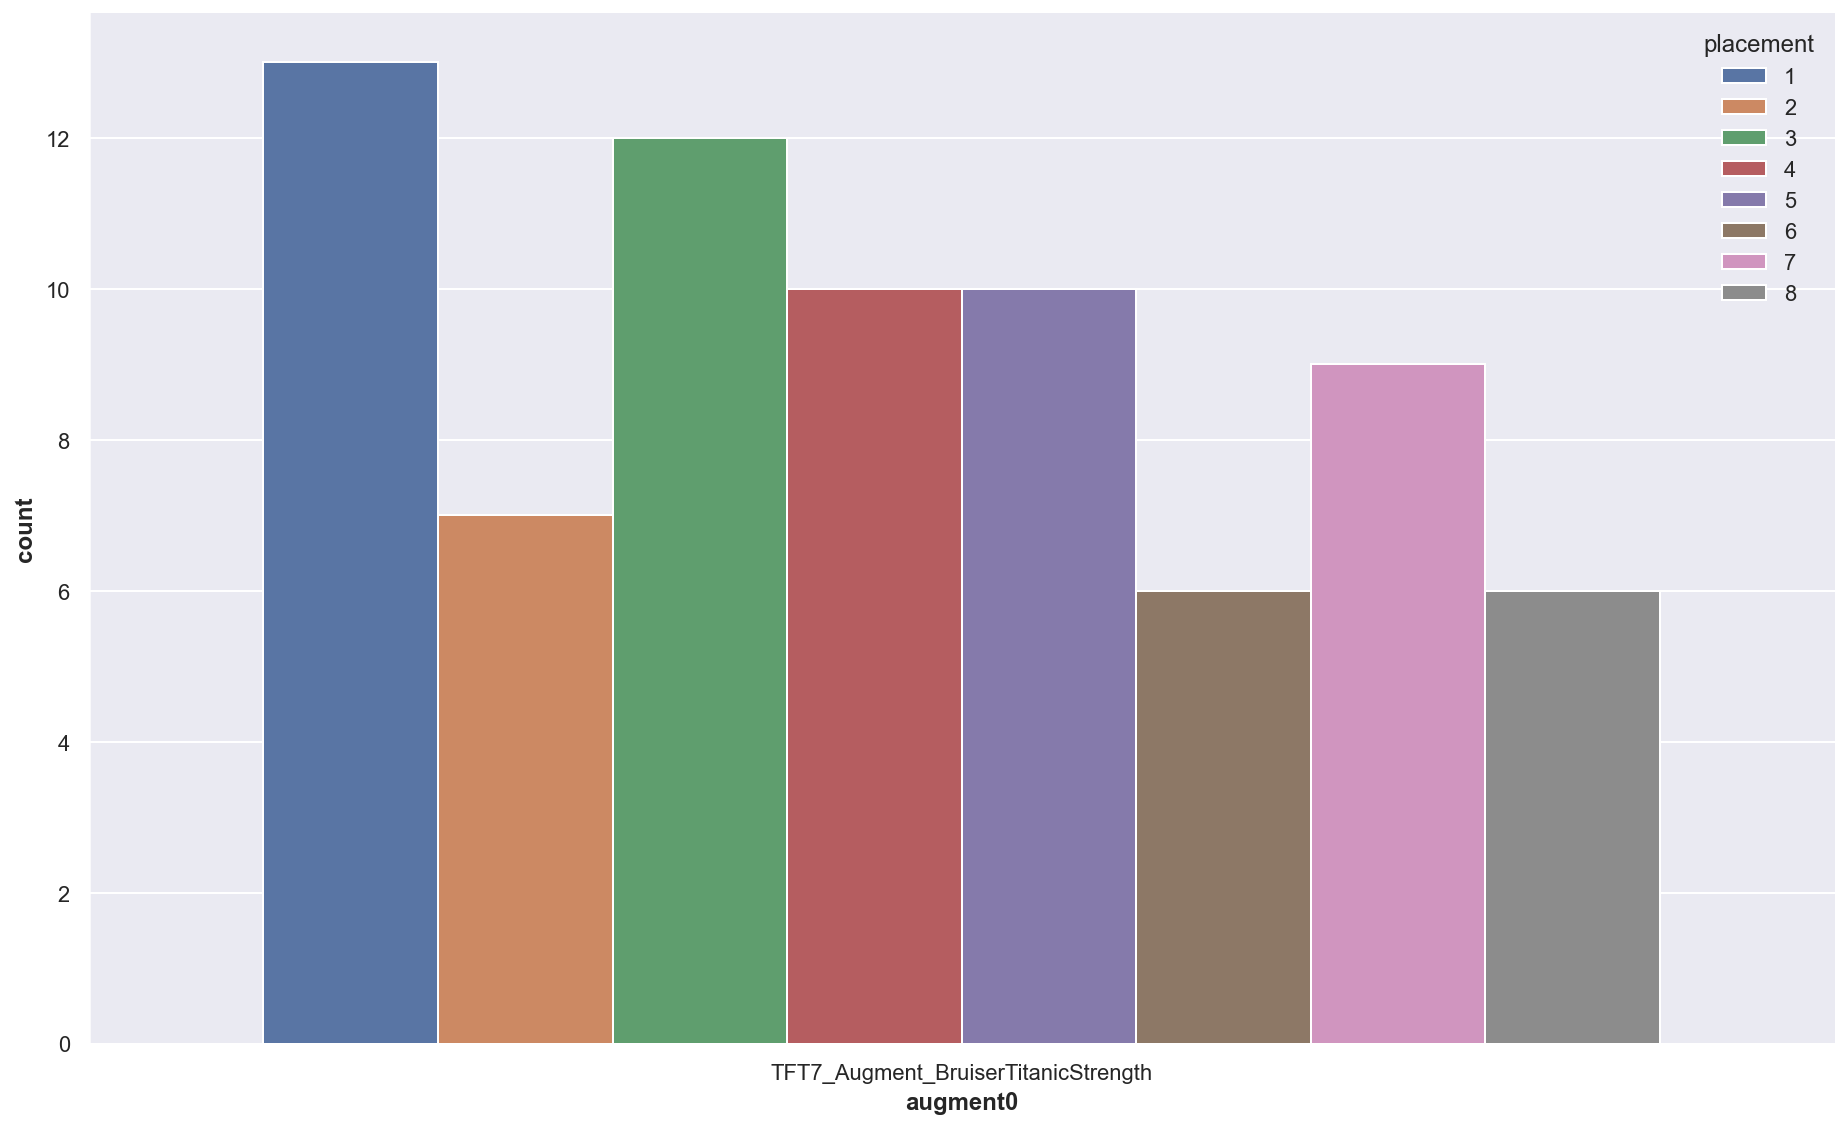

In [1006]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BruiserTitanicStrength'], x='augment0', hue=TARGETNAME)
sns.despine()

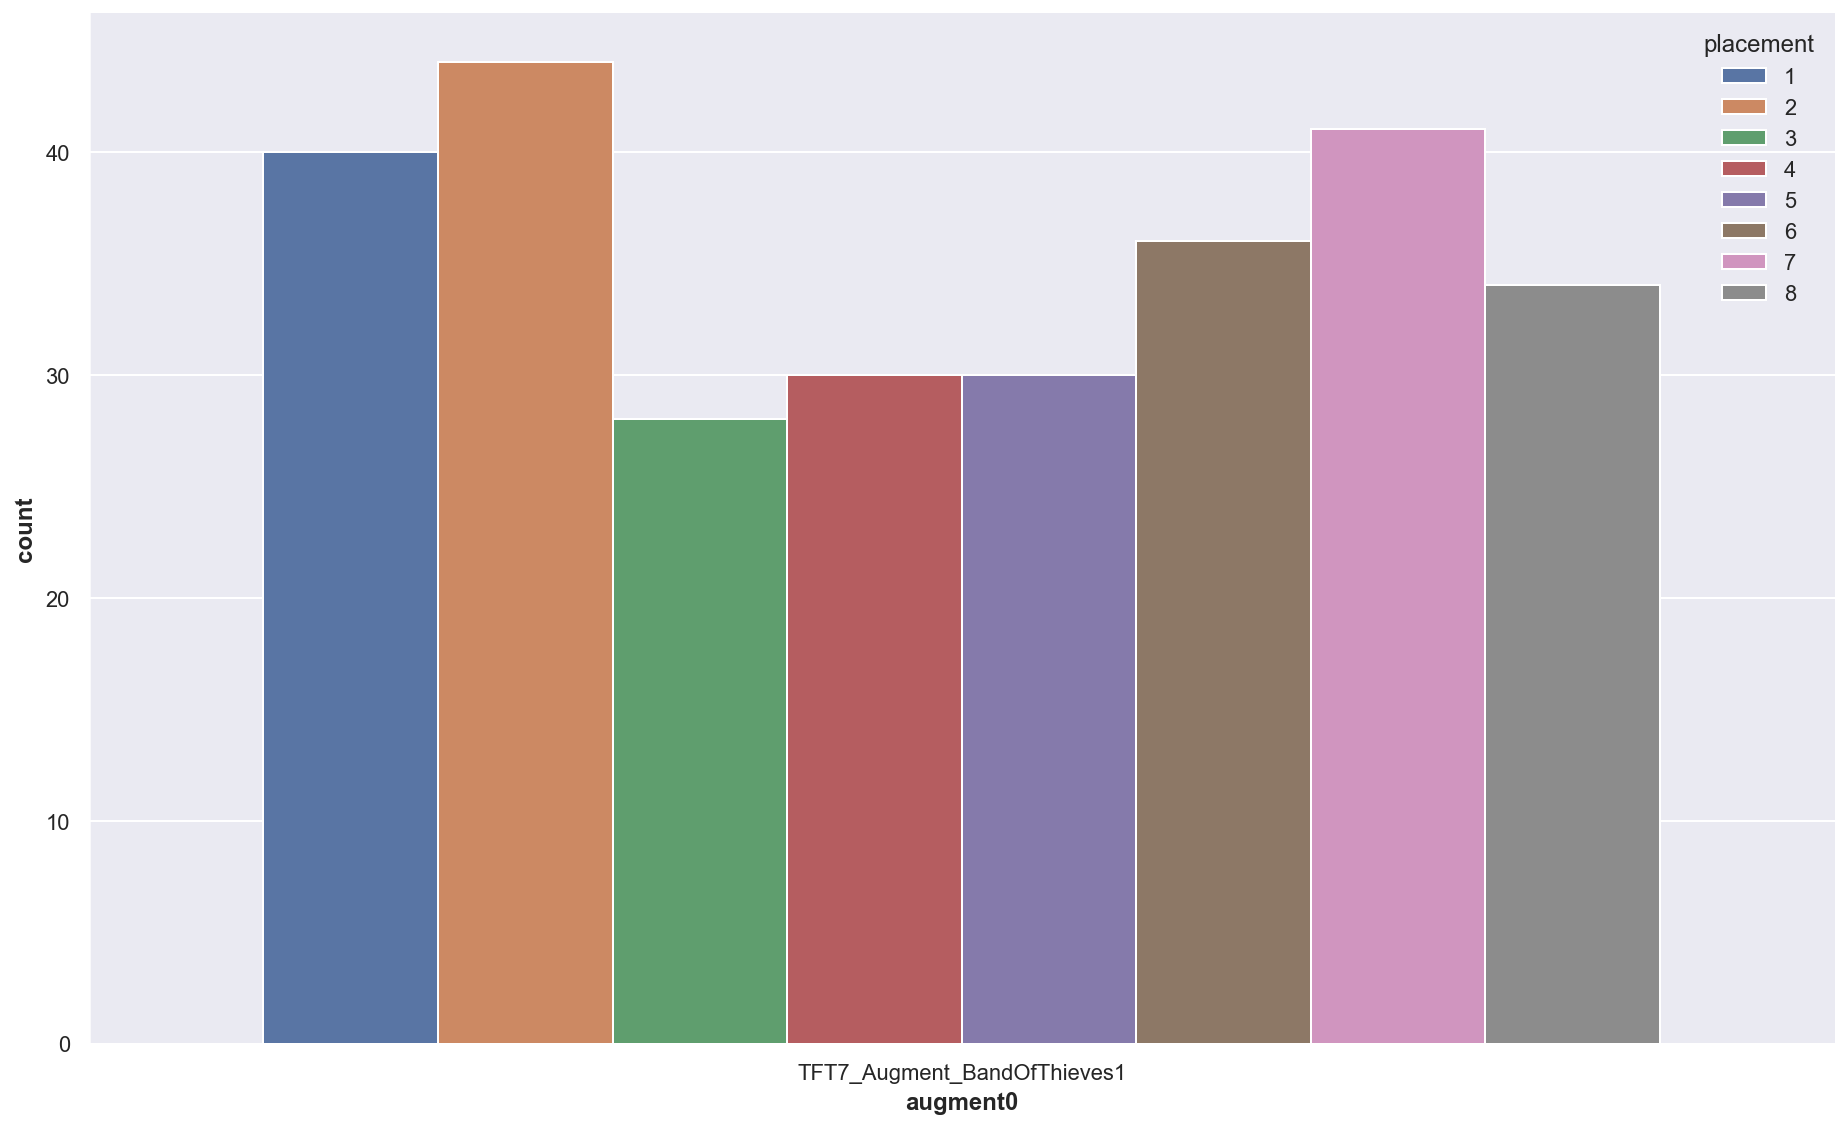

In [1007]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_BandOfThieves1'], x='augment0', hue=TARGETNAME)
sns.despine()

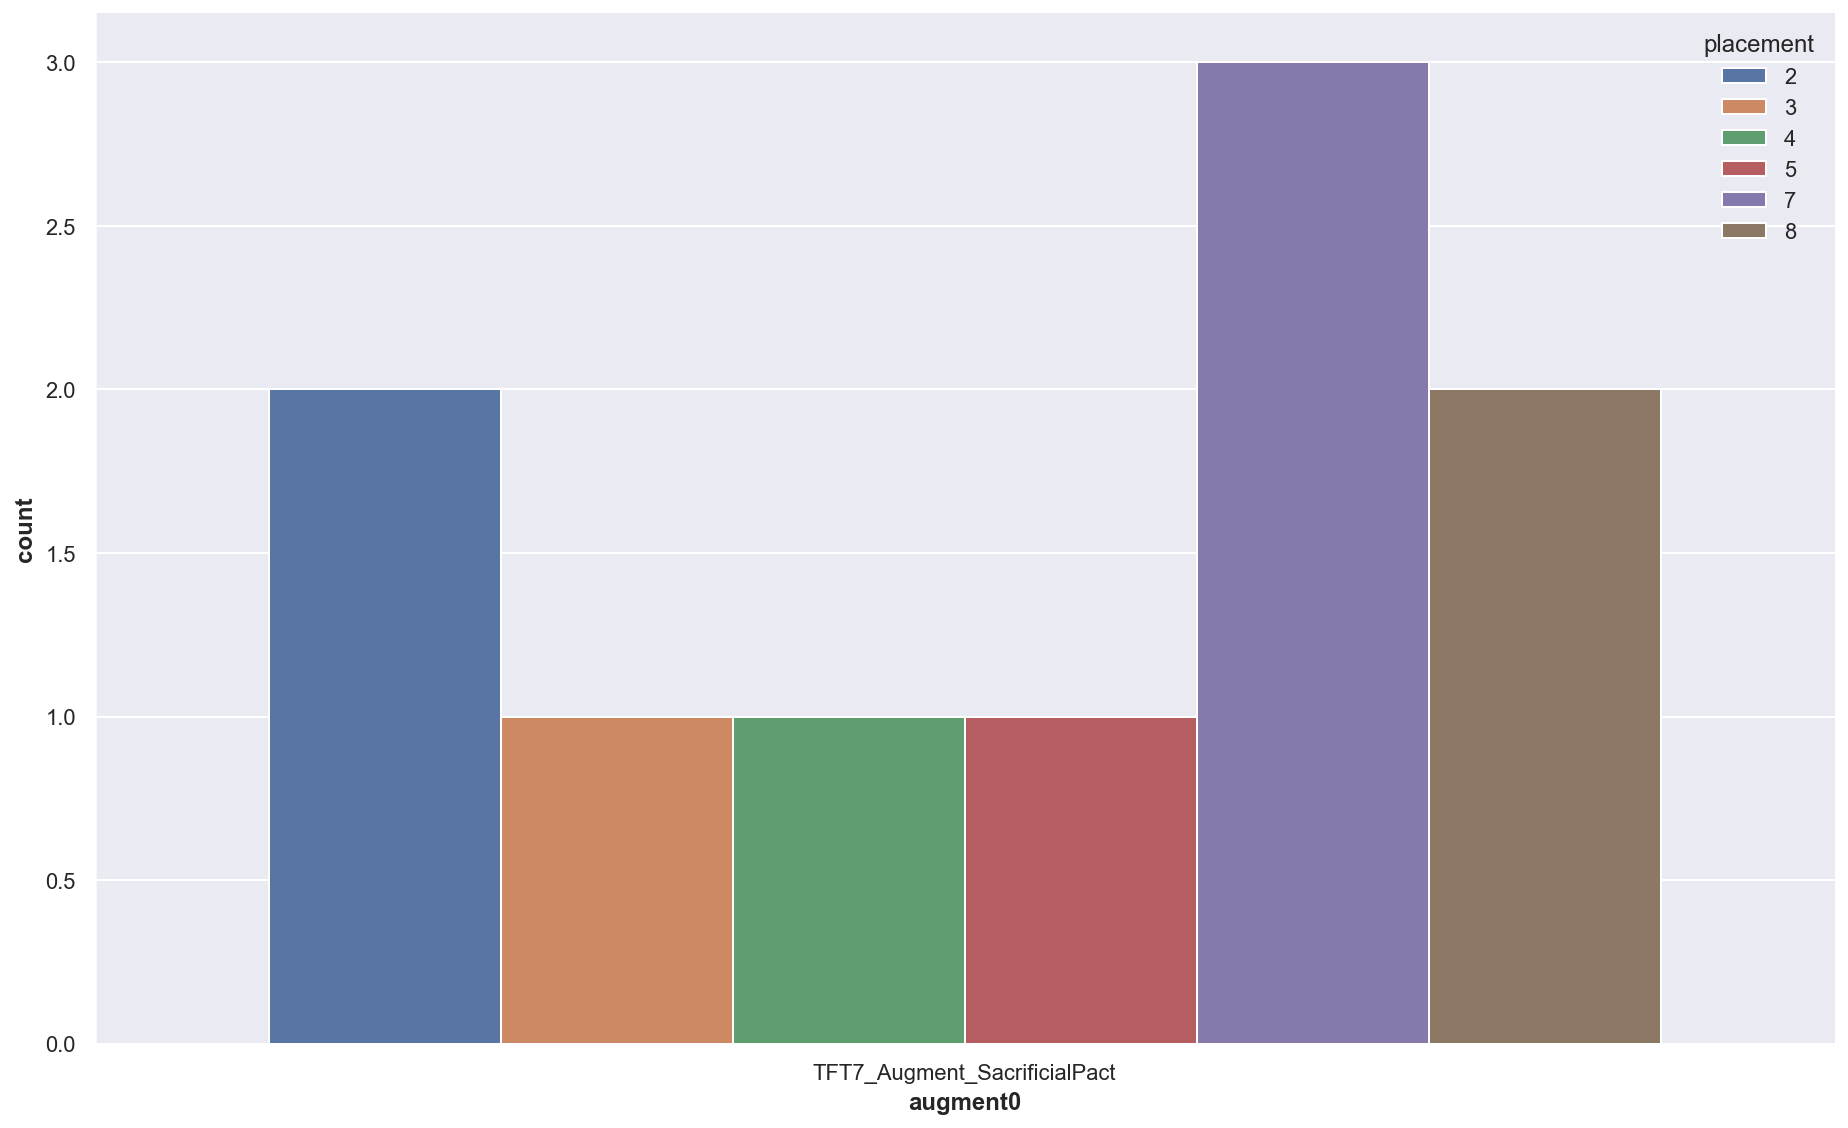

In [1008]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_SacrificialPact'], x='augment0', hue=TARGETNAME)
sns.despine()

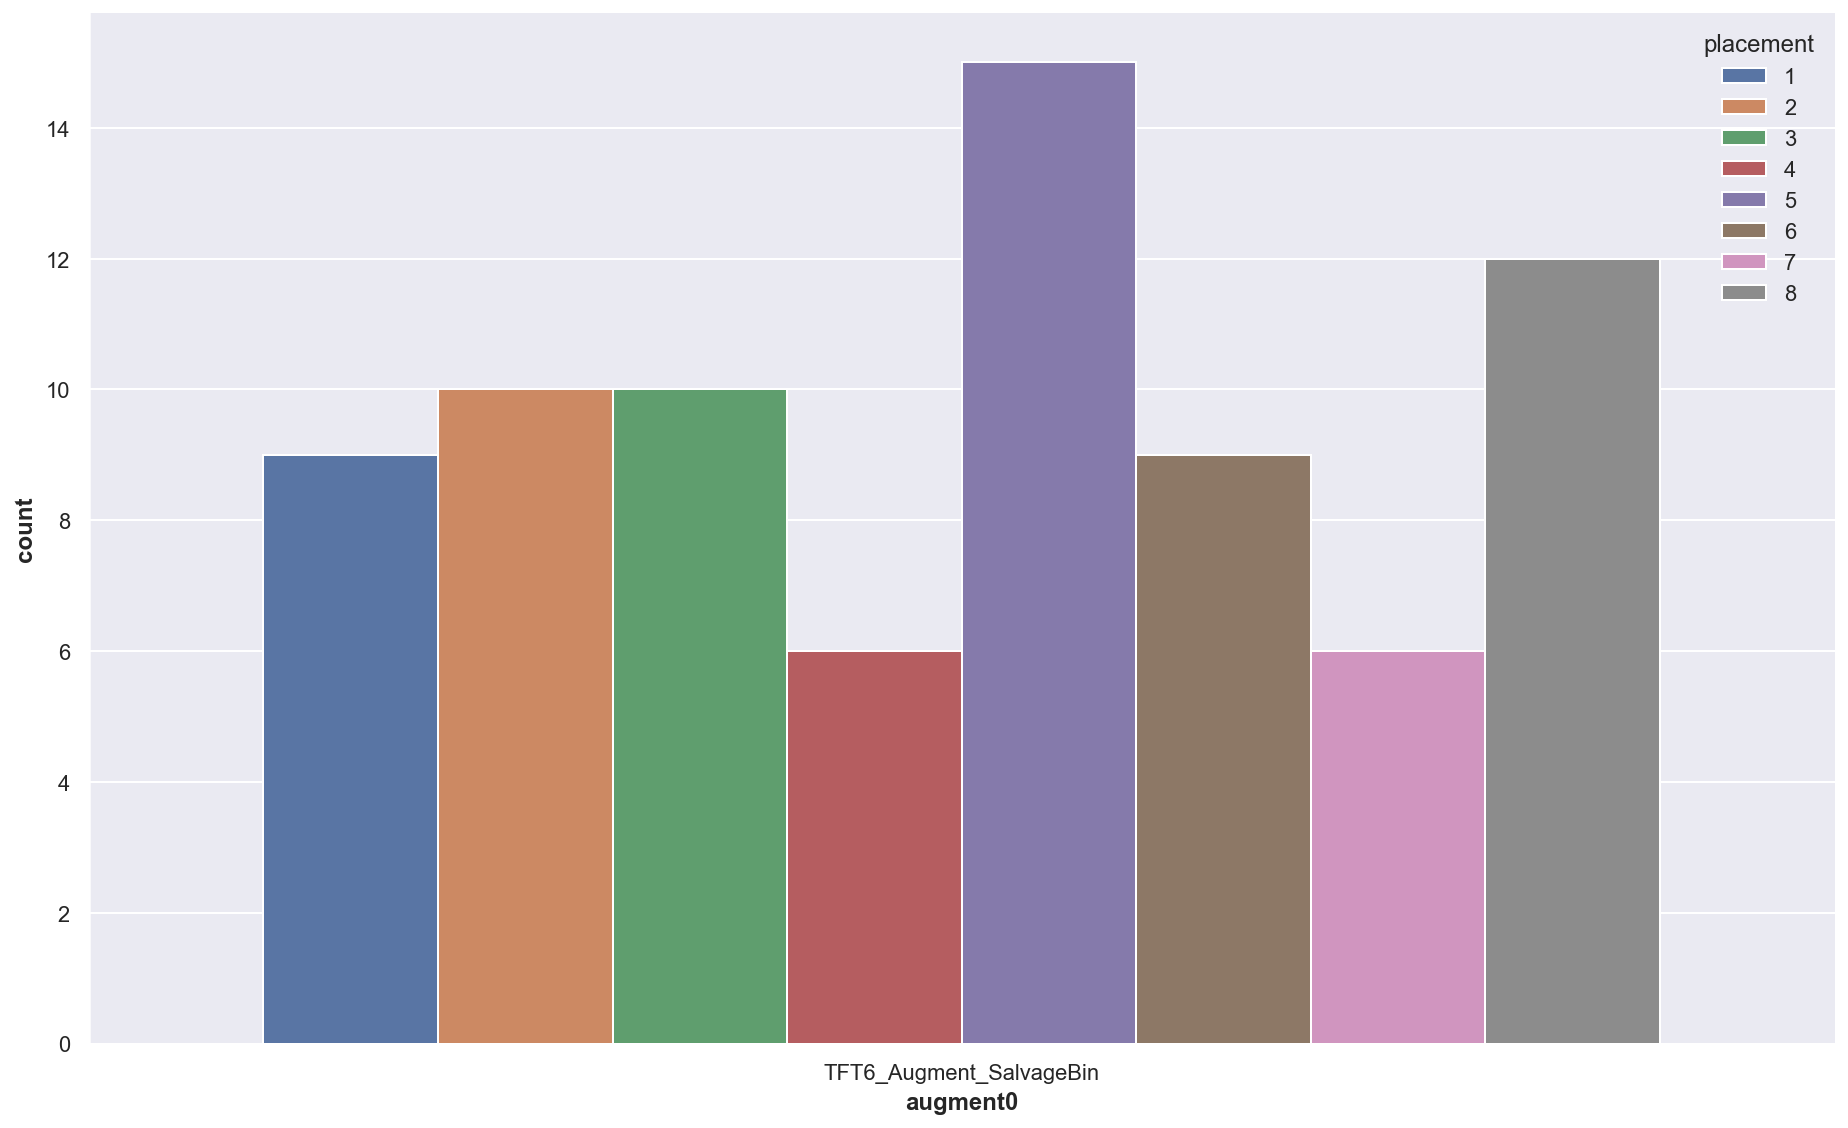

In [1009]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_SalvageBin'], x='augment0', hue=TARGETNAME)
sns.despine()

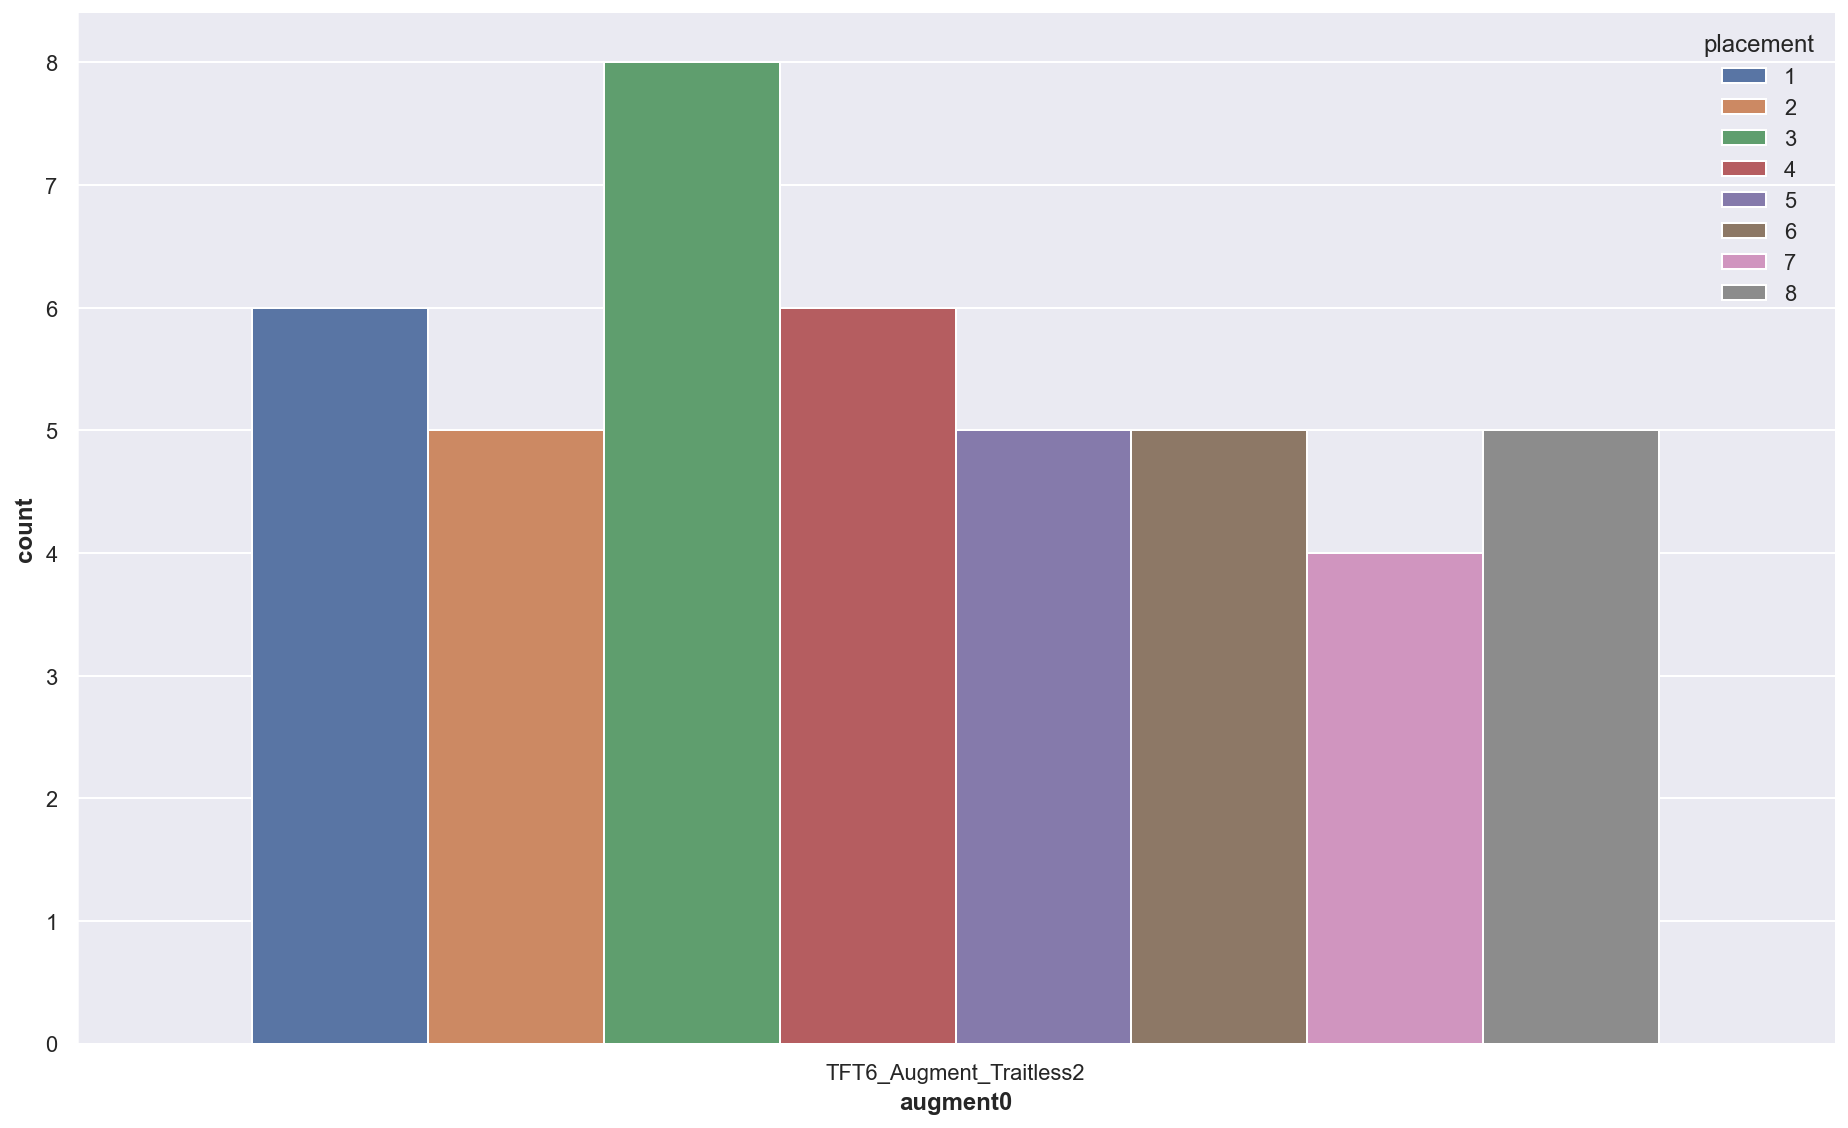

In [1010]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Traitless2'], x='augment0', hue=TARGETNAME)
sns.despine()

No Good.

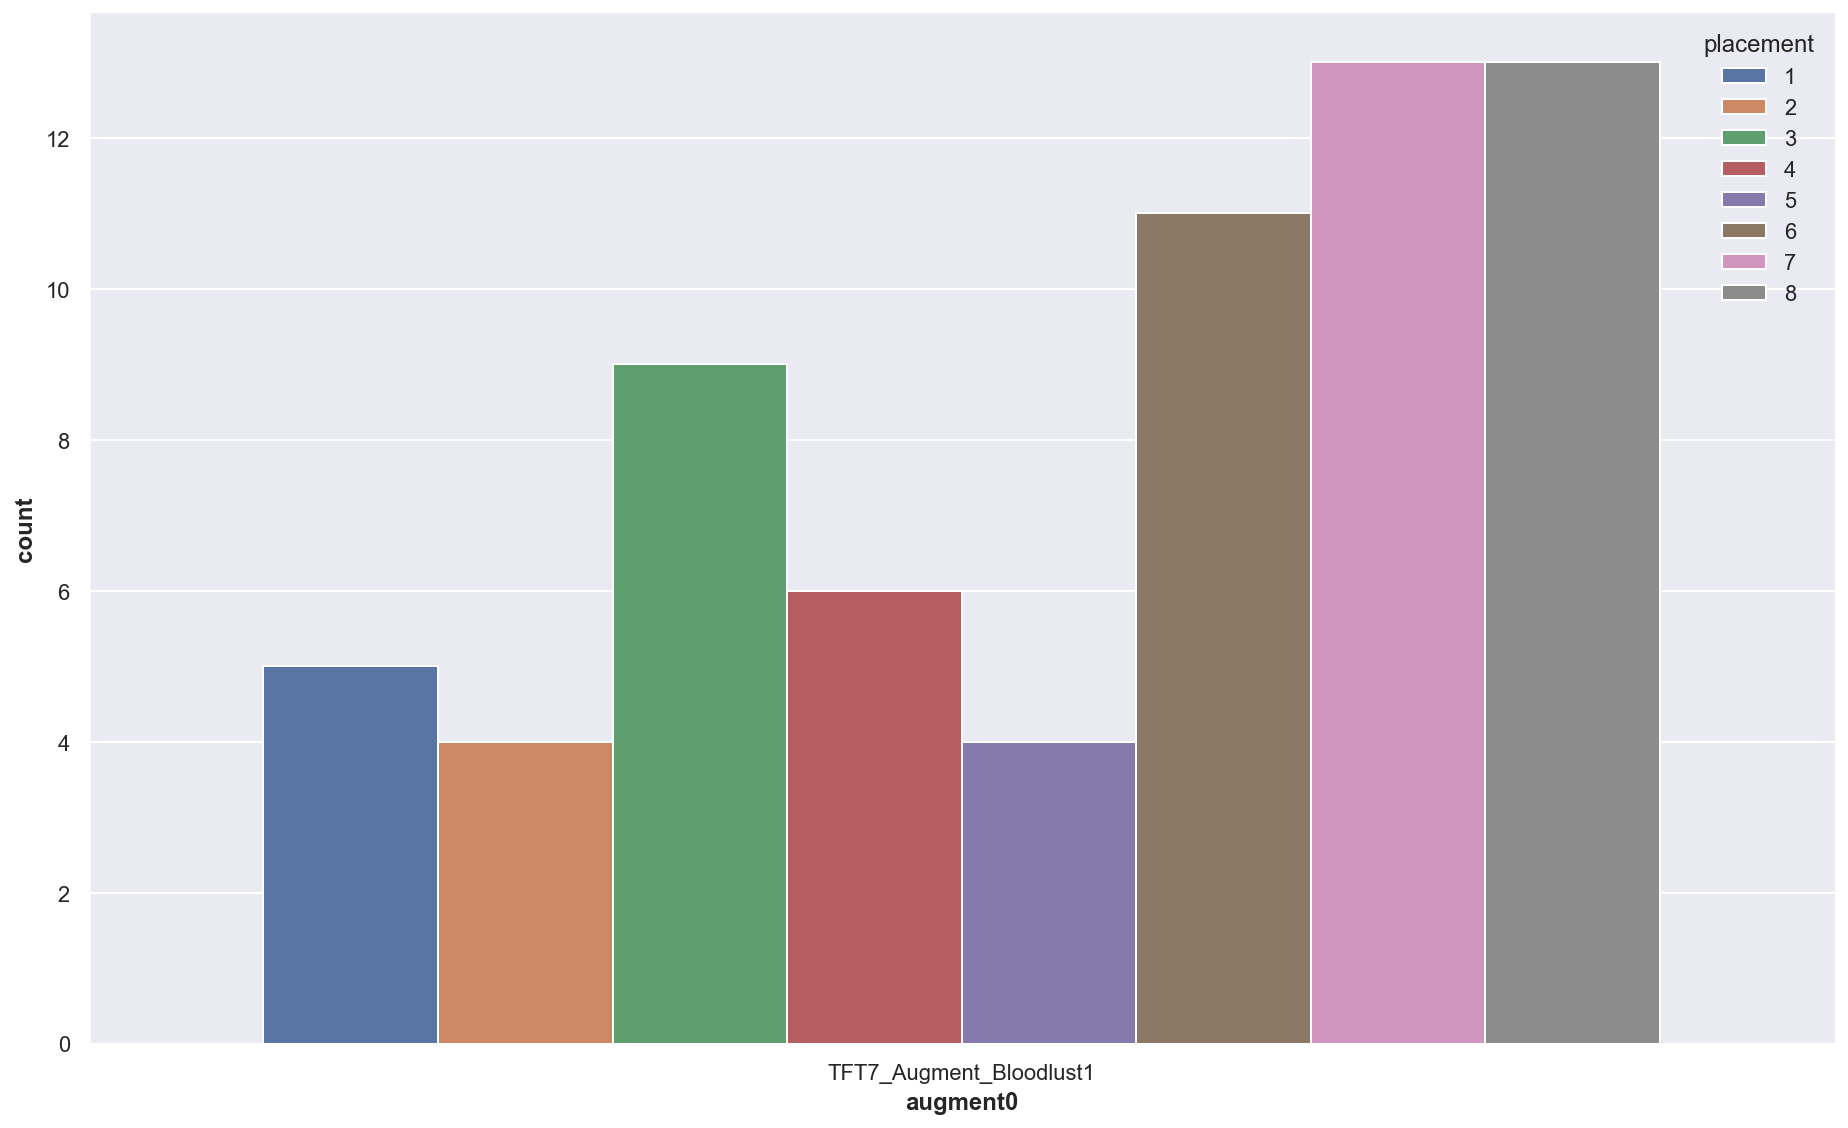

In [1011]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_Bloodlust1'], x='augment0', hue=TARGETNAME)
sns.despine()

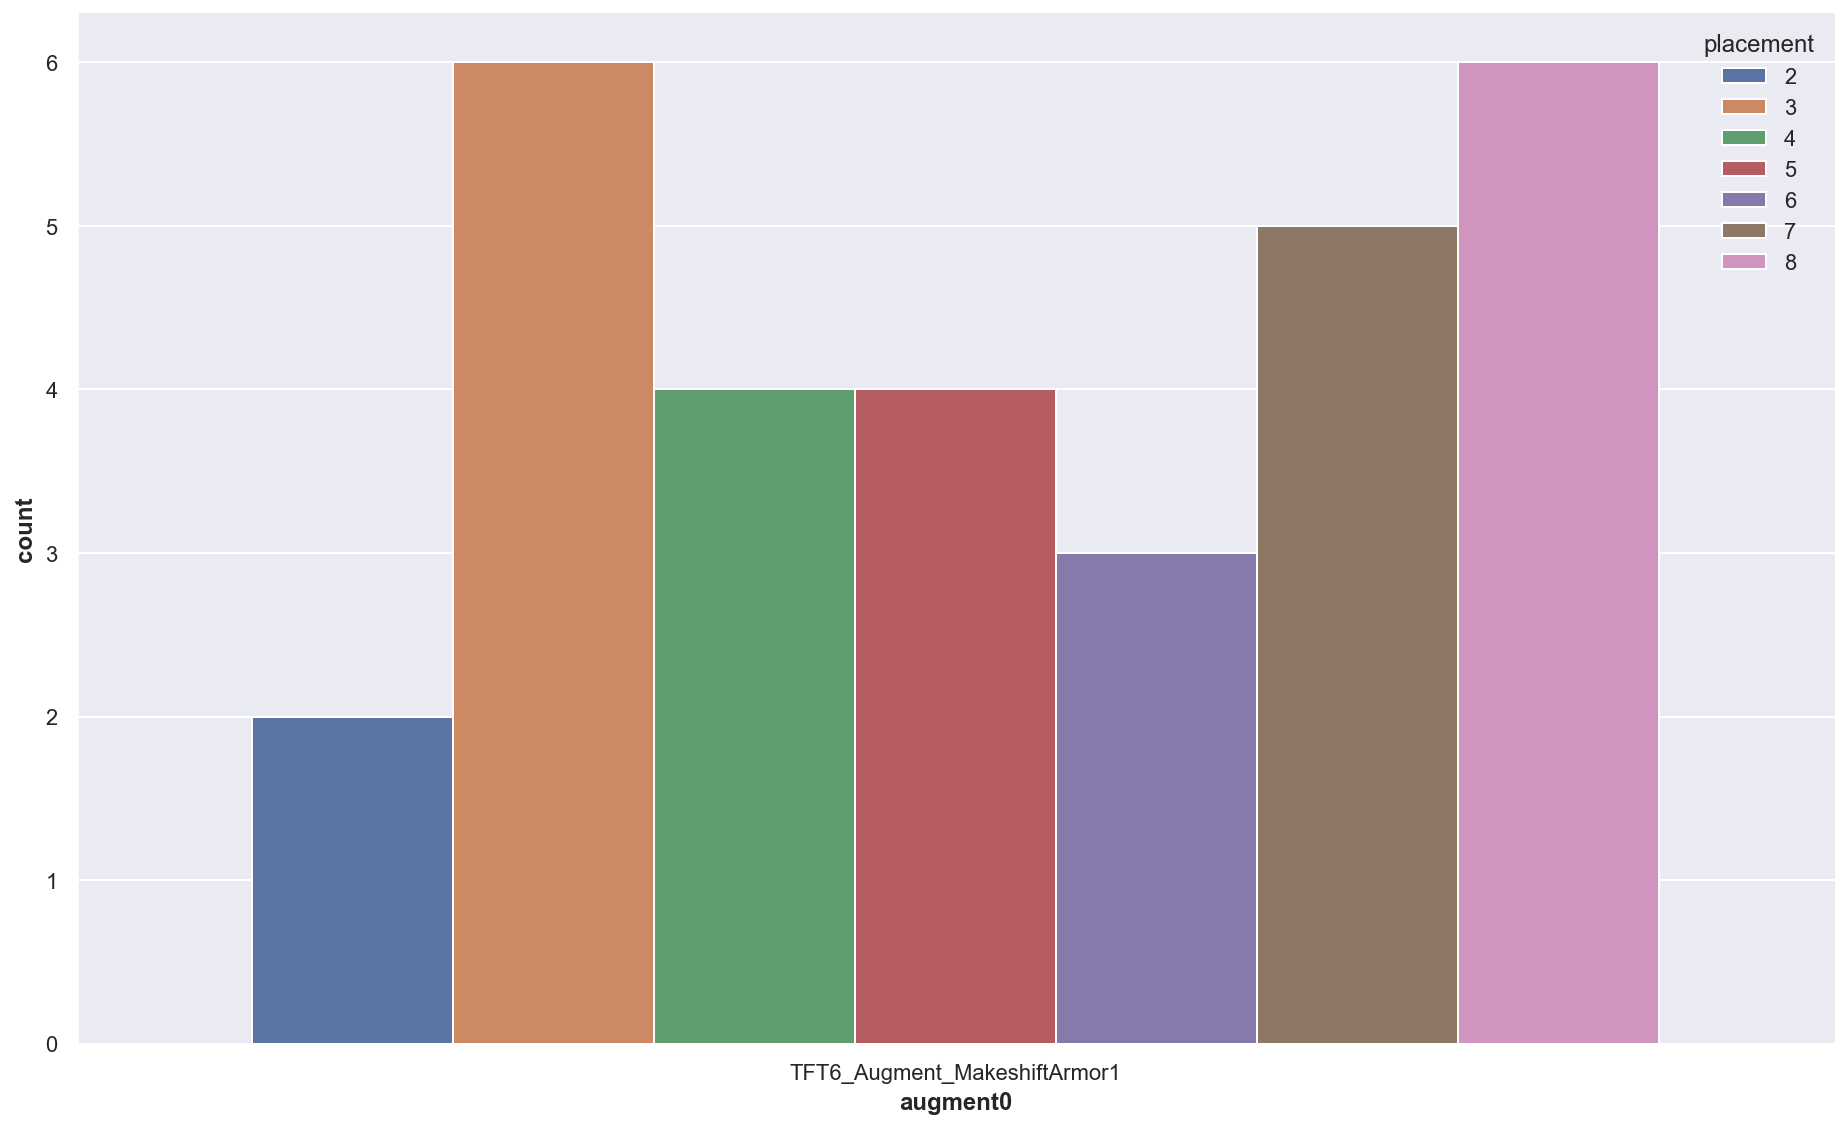

In [1012]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor1'], x='augment0', hue=TARGETNAME)
sns.despine()

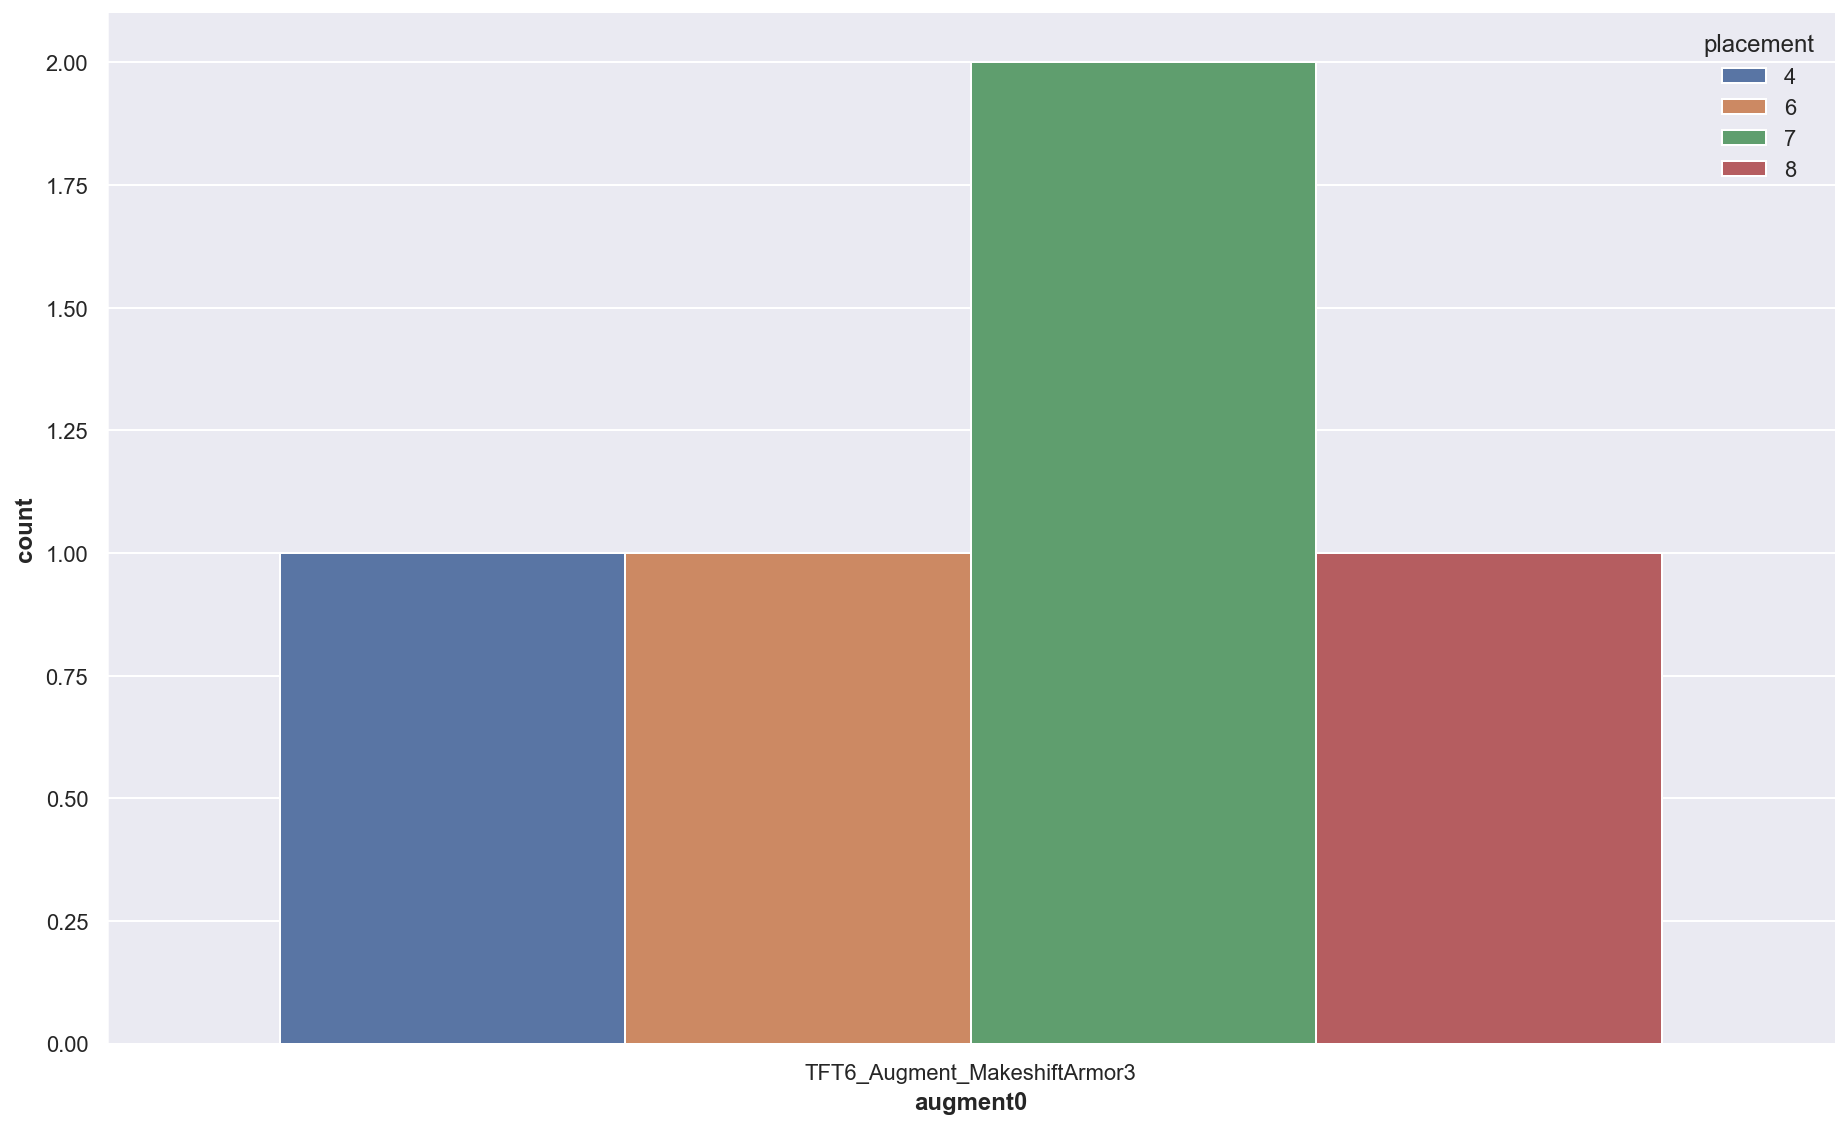

In [1013]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MakeshiftArmor3'], x='augment0', hue=TARGETNAME)
sns.despine()

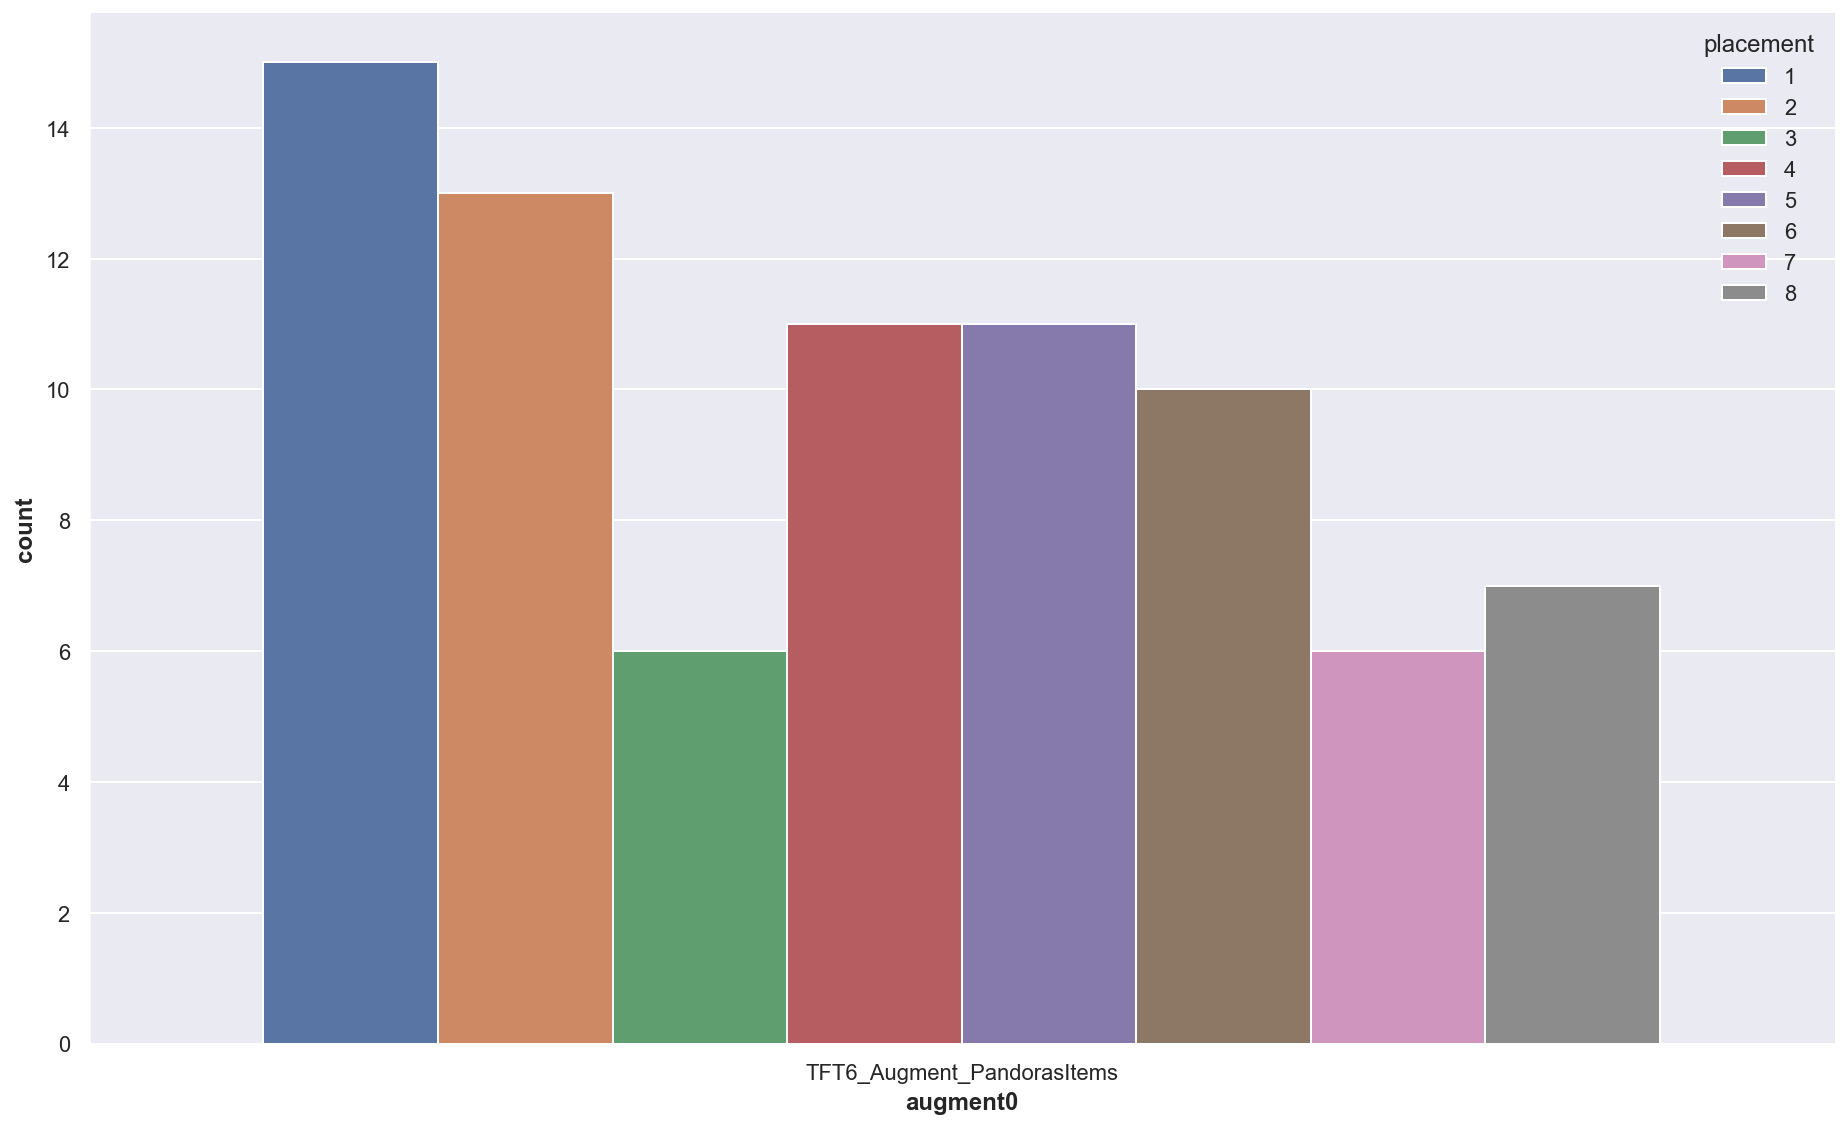

In [1014]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_PandorasItems'], x='augment0', hue=TARGETNAME)
sns.despine()

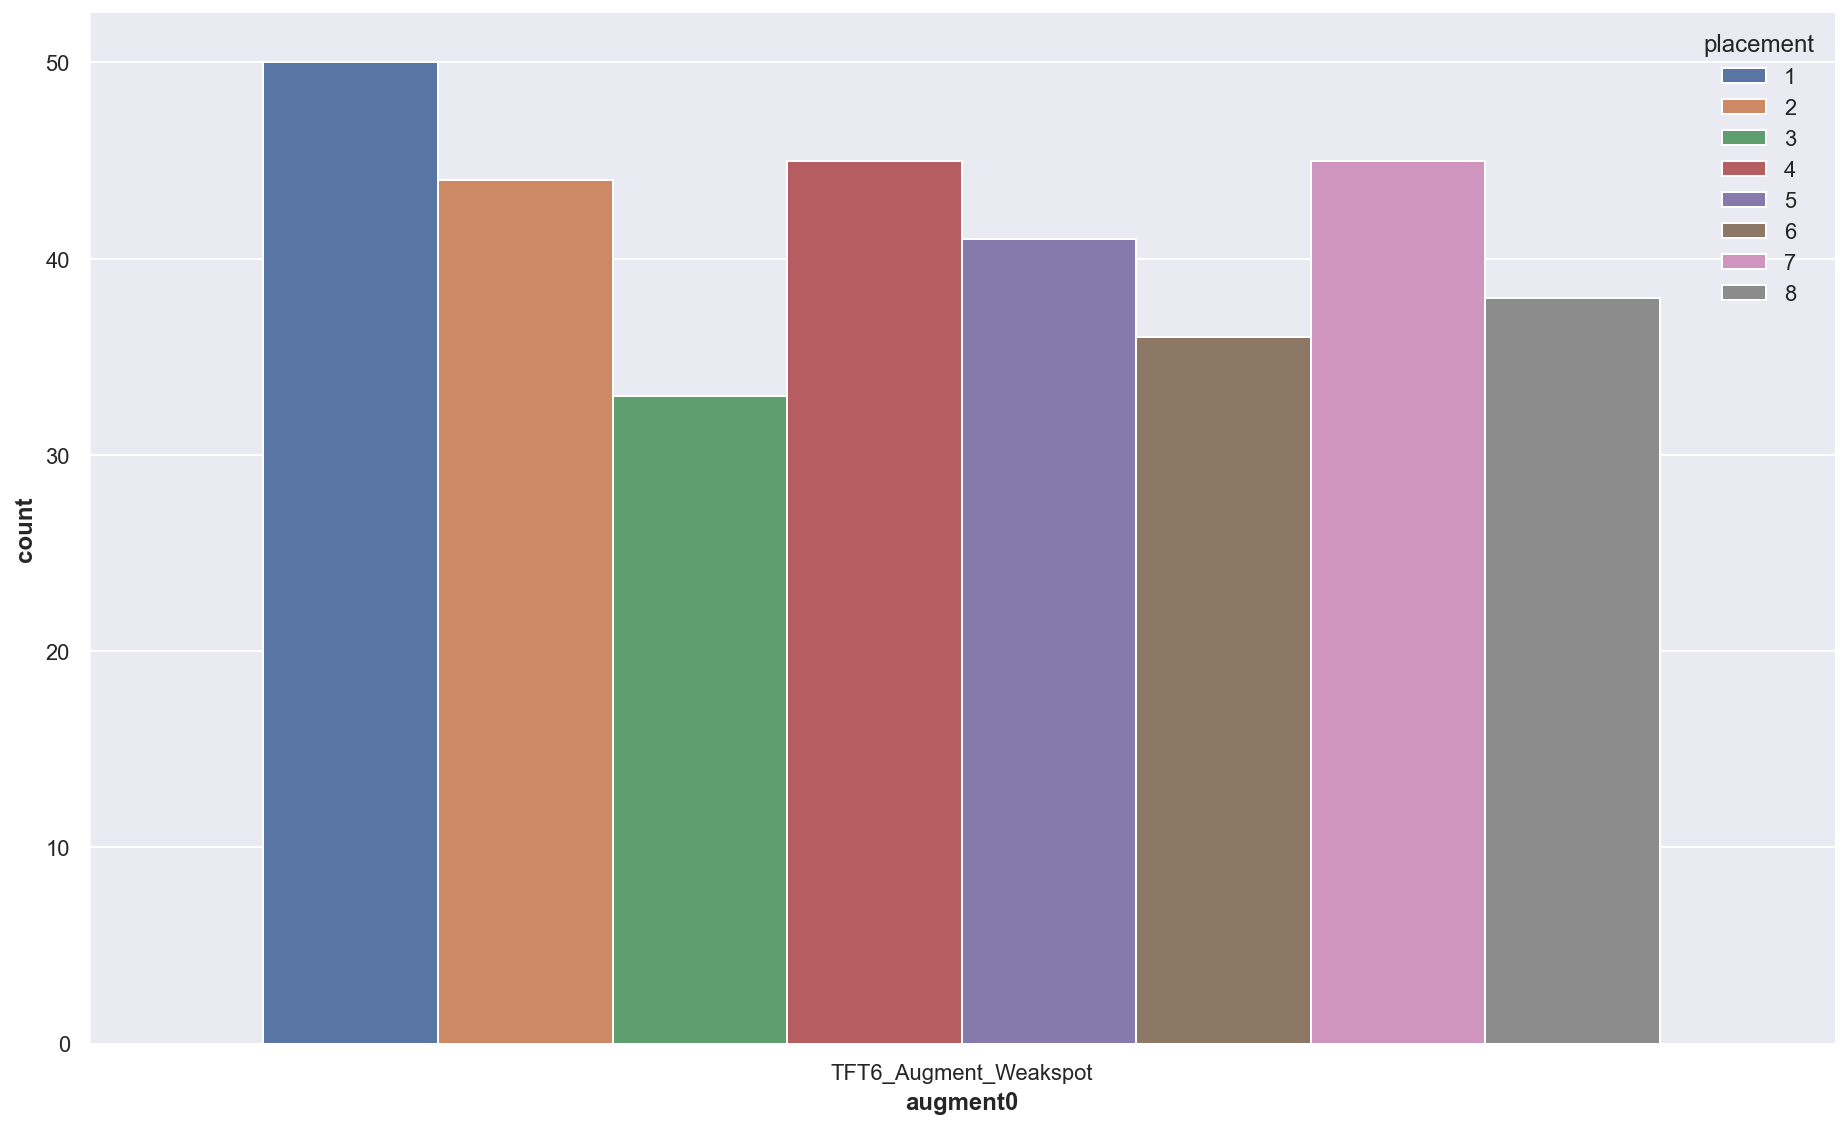

In [1015]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Weakspot'], x='augment0', hue=TARGETNAME)
sns.despine()

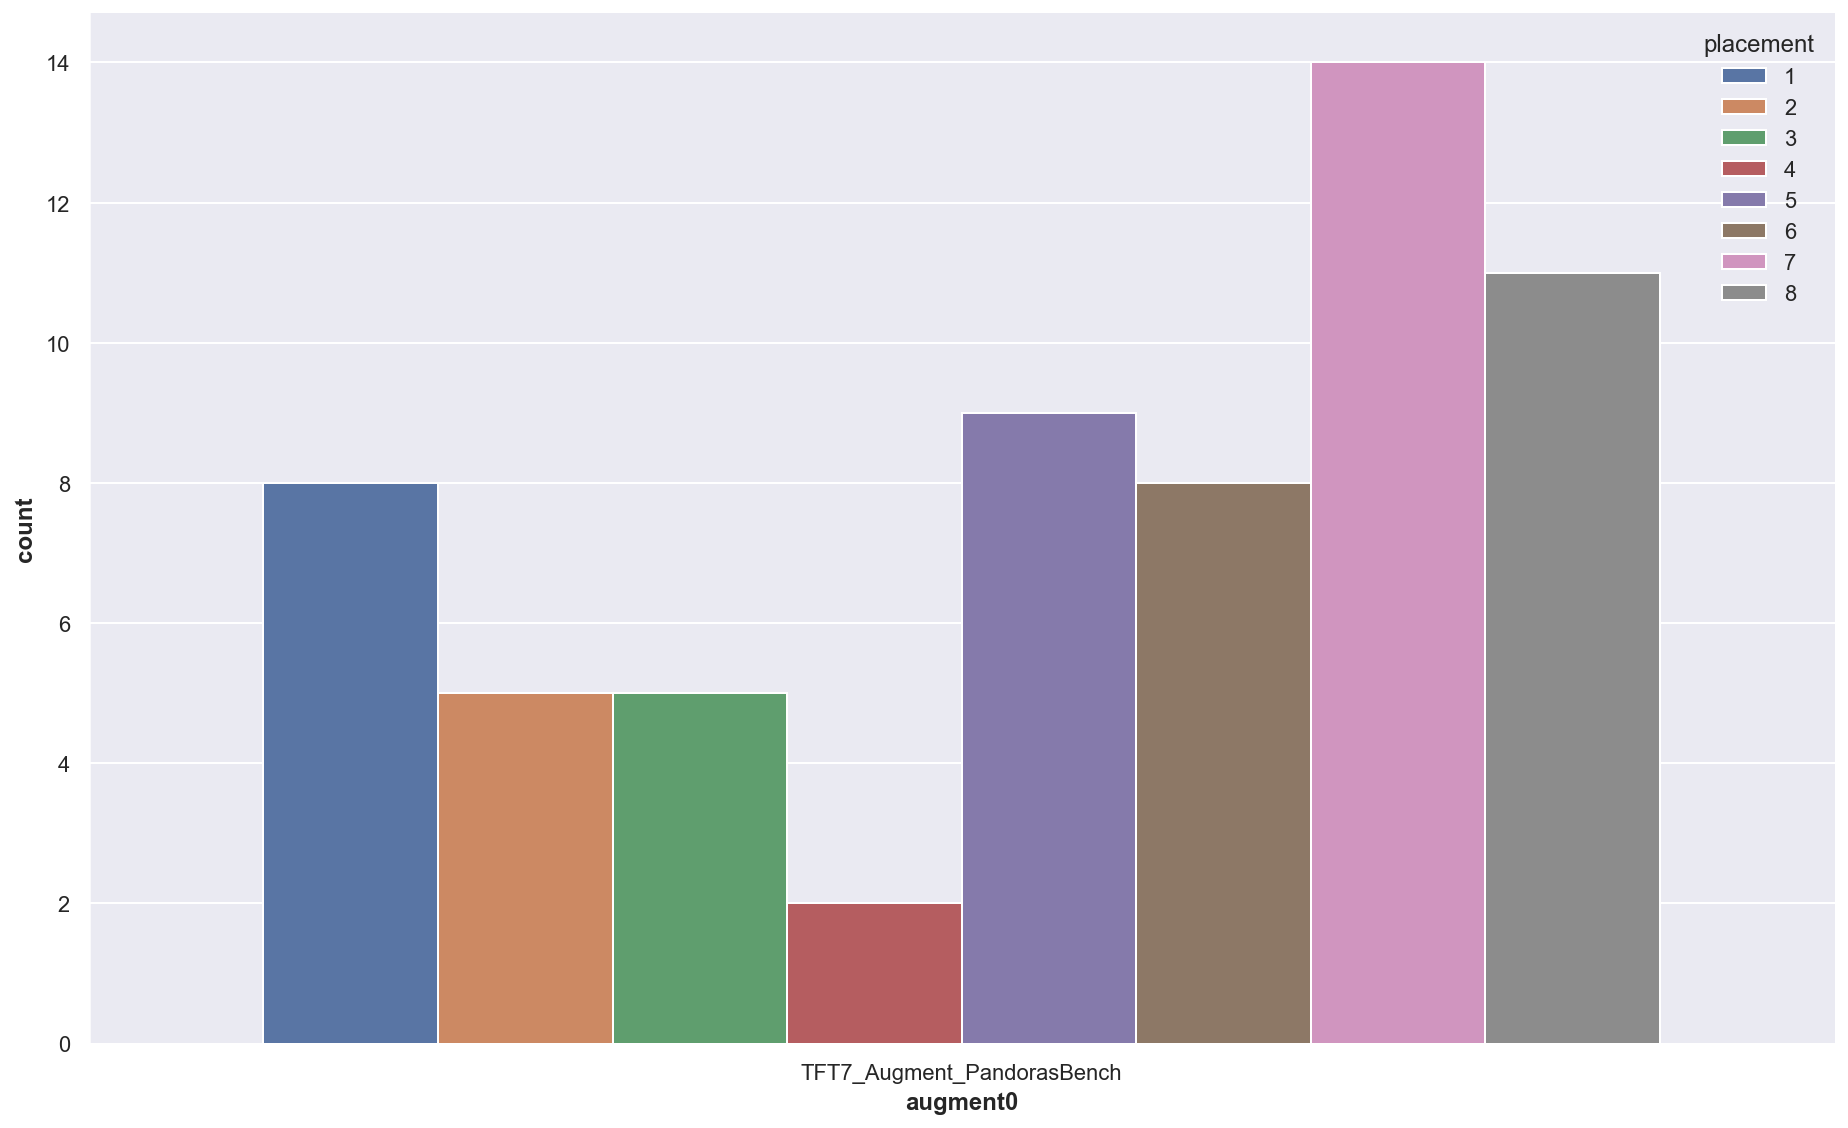

In [1016]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT7_Augment_PandorasBench'], x='augment0', hue=TARGETNAME)
sns.despine()

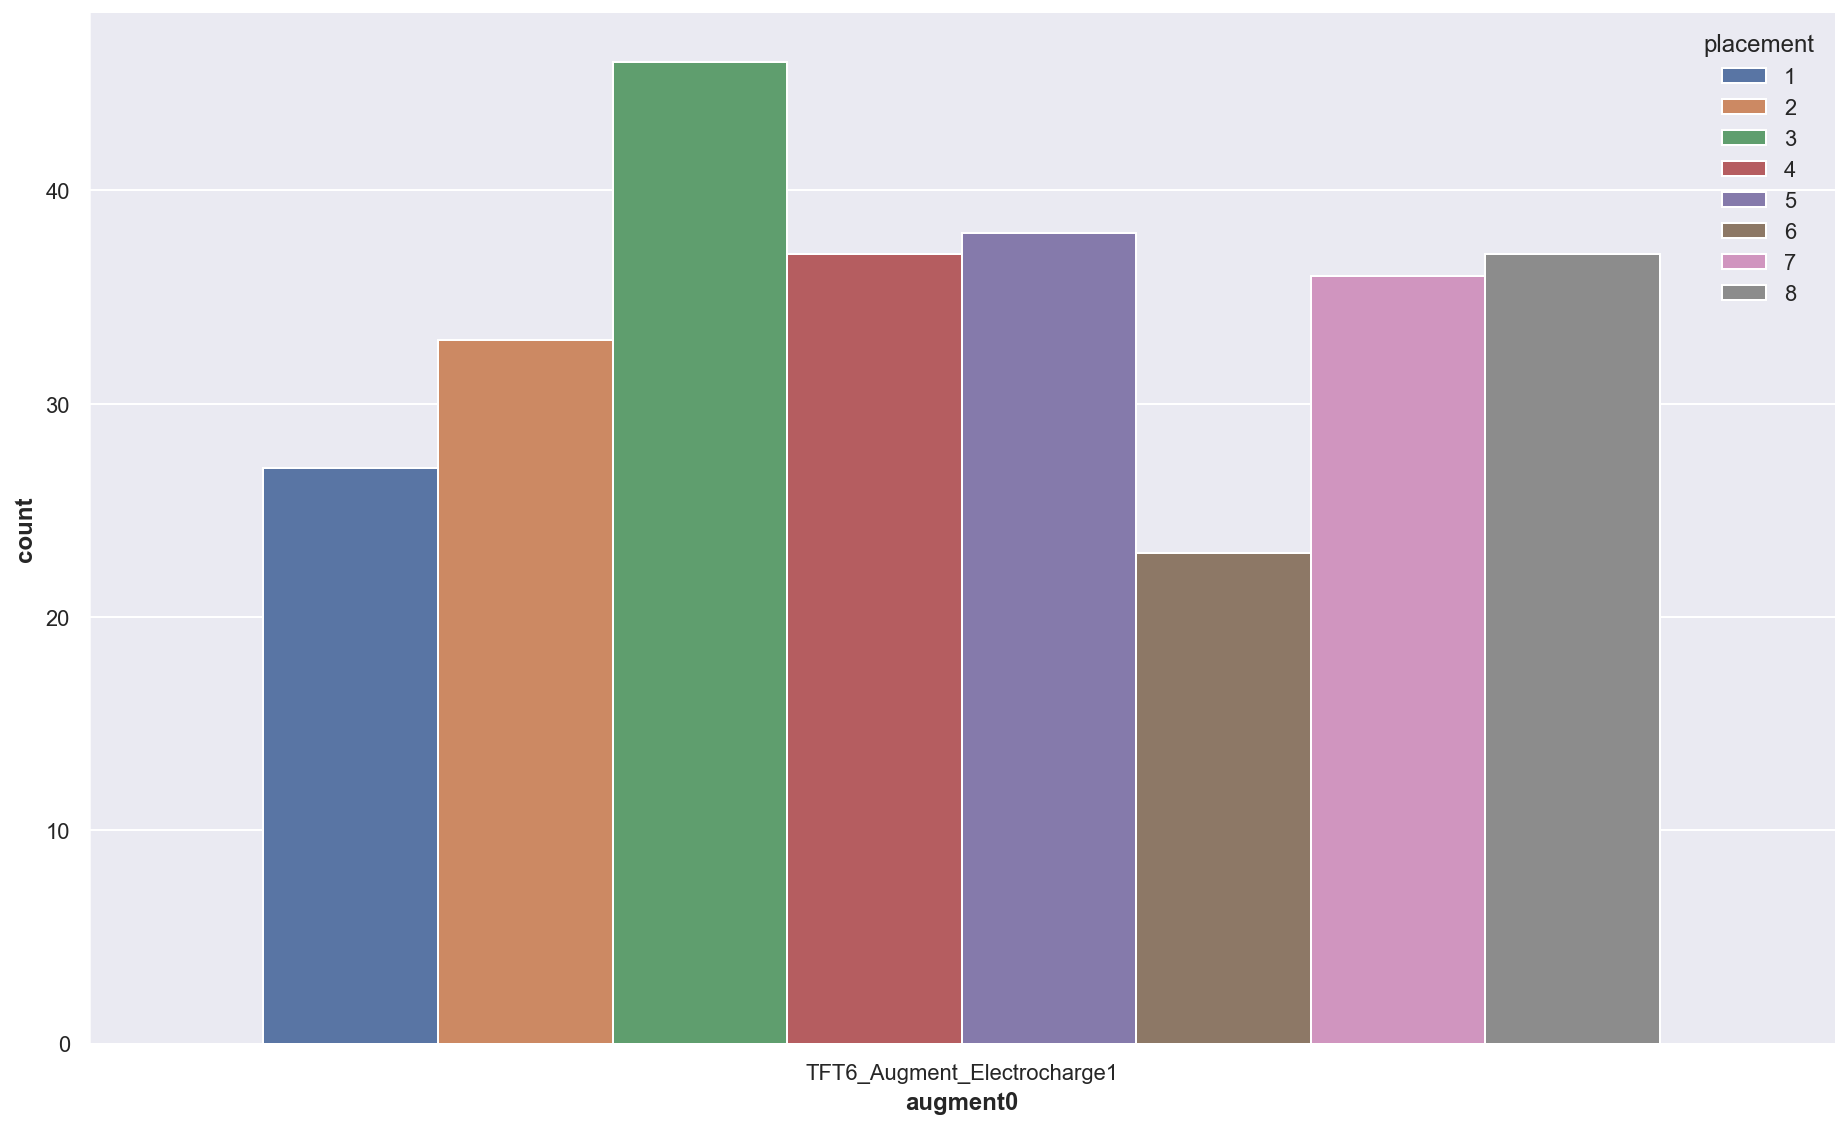

In [1017]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_Electrocharge1'], x='augment0', hue=TARGETNAME)
sns.despine()

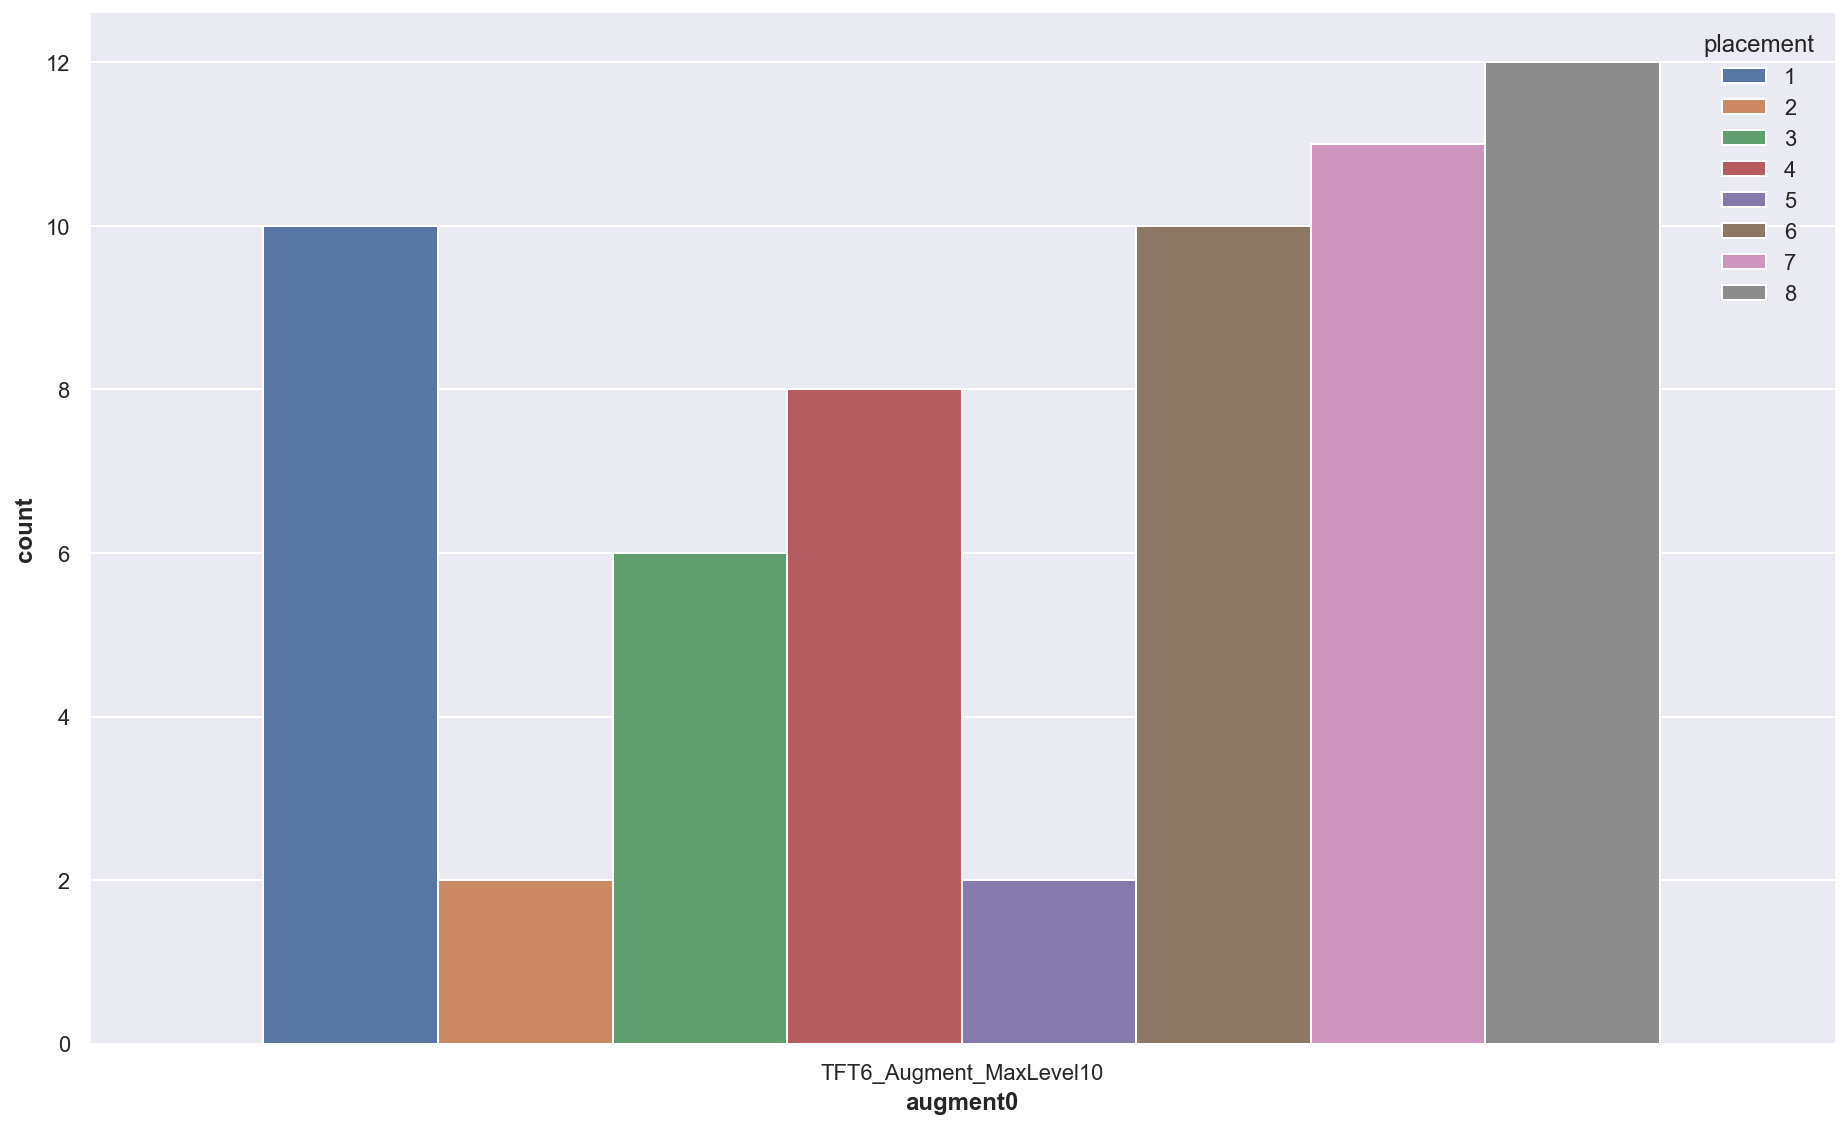

In [1018]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_MaxLevel10'], x='augment0', hue=TARGETNAME)
sns.despine()

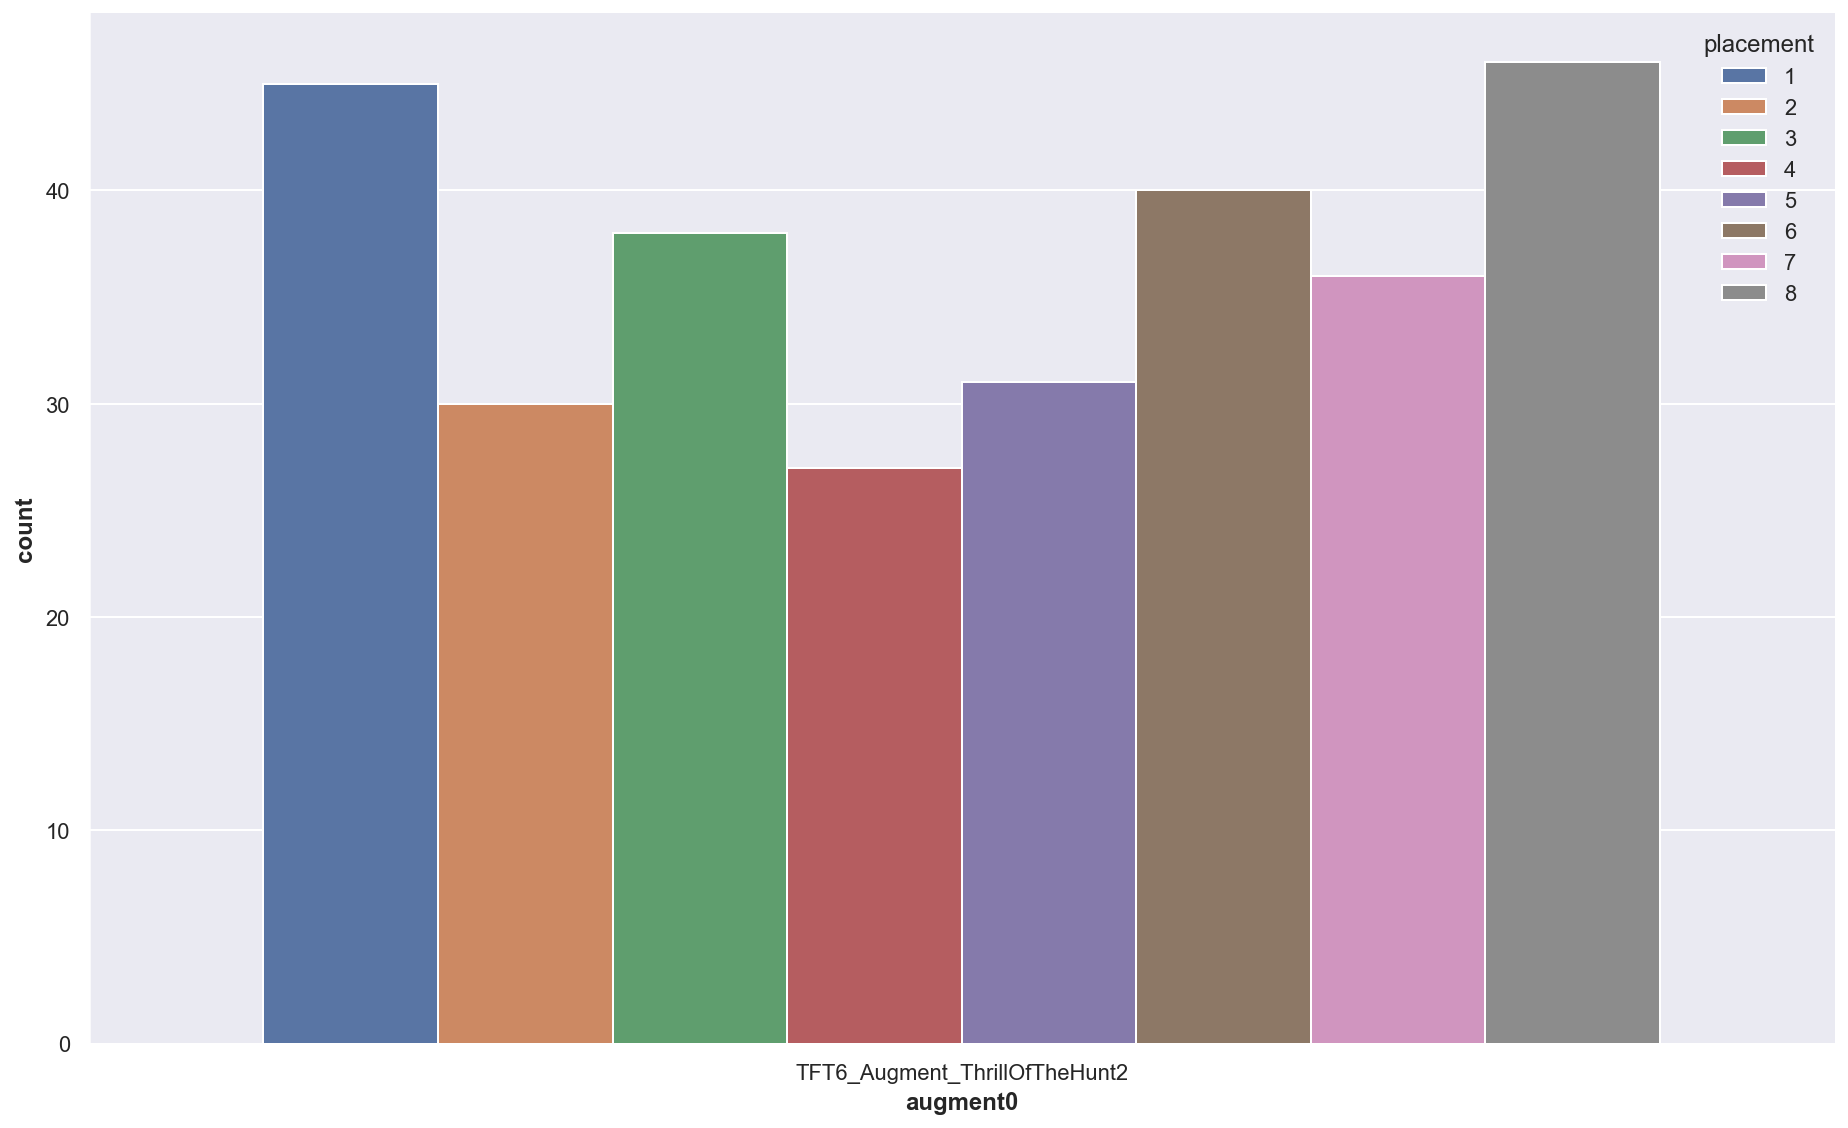

In [1019]:
sns.set(rc={'figure.figsize':(13,8)})
sns.countplot(data=matches_df[matches_df['augment0']=='TFT6_Augment_ThrillOfTheHunt2'], x='augment0', hue=TARGETNAME)
sns.despine()

In [1020]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')
# group and aggregate mean/median
dct = {'Value_Count': ('augment0', 'count'), 'average_placement': ('placement', 'mean')}
augment0_rank_df = m.groupby('augment0', as_index=False).agg(**dct).sort_values(by='average_placement')
augment0_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_34384\207590299.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment0').melt('placement', value_name='augment0')


augment0  Value_Count  average_placement
21                TFT6_Augment_Diversify1            3           2.000000
181            TFT7_Augment_WarriorEmblem            3           3.000000
177                TFT7_Augment_ThinkFast           13           3.307692
155             TFT7_Augment_RevelEmblem2           57           3.385965
60                TFT6_Augment_ThriftShop           17           3.411765
22                TFT6_Augment_Diversify2            2           3.500000
74                    TFT6_Augment_Twins2           33           3.545455
184             TFT7_Augment_WarriorTrait            7           3.714286
81           TFT7_Augment_AssassinEmblem2           74           3.729730
160        TFT7_Augment_ScalescornEmblem2           16           3.750000
159         TFT7_Augment_ScalescornEmblem           21           3.761905
80            TFT7_Augment_AssassinEmblem          129           3.821705
122   TFT7_Augment_GuardianHeroicPresence            6           3.833333
73                    TFT6_Augment_Twins1           18           3.833333
110       TFT7_Augment_DragonmancerEmblem          107           3.859813
113        TFT7_Augment_DragonmancerTrait           73           3.904110
11       TFT6_Augment_CyberneticImplants3           38           3.947368
100         TFT7_Augment_CannoneerHotShot           91           3.956044
19               TFT6_Augment_Distancing2           36           3.972222
50             TFT6_Augment_PortableForge          623           3.990369
119             TFT7_Augment_GadgetExpert          171           3.994152
49             TFT6_Augment_PandorasItems           79           4.000000
171  TFT7_Augment_SwiftshotPressTheAttack           63           4.031746
27           TFT6_Augment_Featherweights2           27           4.074074
18                TFT6_Augment_Distancing           23           4.086957
152           TFT7_Augment_RagewingScorch           71           4.098592
109              TFT7_Augment_CursedCrown           19           4.105263
96    TFT7_Augment_BruiserTitanicStrength           73           4.109589
71                 TFT6_Augment_TriForce3           27           4.111111
133               TFT7_Augment_JadeTrait2           25           4.120000

In [1021]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')
# group and aggregate mean/median
dct = {'Value_Count': ('augment1', 'count'), 'average_placement': ('placement', 'mean')}
augment1_rank_df = m.groupby('augment1', as_index=False).agg(**dct).sort_values(by='average_placement')
augment1_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_34384\1890264867.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment1').melt('placement', value_name='augment1')


augment1  Value_Count  average_placement
167   TFT7_Augment_ShimmerscaleSpending            1           2.000000
65              TFT6_Augment_Traitless1            6           2.500000
16       TFT6_Augment_CyberneticUplink2           33           3.303030
160       TFT7_Augment_ScalescornEmblem           13           3.307692
10     TFT6_Augment_CyberneticImplants2           45           3.355556
78         TFT7_Augment_AssassinEmblem2           19           3.368421
175         TFT7_Augment_TempestEmblem2            5           3.400000
156           TFT7_Augment_RevelEmblem2           21           3.428571
153         TFT7_Augment_RagewingScorch           21           3.476190
125           TFT7_Augment_GuildEmblem2           20           3.550000
163  TFT7_Augment_ShapeshifterBeastsDen           29           3.551724
161      TFT7_Augment_ScalescornEmblem2           10           3.600000
138            TFT7_Augment_MageEmblem2           14           3.642857
124            TFT7_Augment_GuildEmblem           36           3.666667
114           TFT7_Augment_EvokerEmblem            4           3.750000
132             TFT7_Augment_JadeTrait2           30           3.800000
12        TFT6_Augment_CyberneticShell1           66           3.818182
152        TFT7_Augment_RagewingEmblem2           11           3.818182
13        TFT6_Augment_CyberneticShell2           40           3.825000
111    TFT7_Augment_DragonmancerEmblem2           51           3.843137
103        TFT7_Augment_CavalierEmblem2           14           3.857143
70               TFT6_Augment_TriForce3            7           3.857143
19             TFT6_Augment_Distancing2           36           3.861111
157       TFT7_Augment_RevelPartyFavors           22           3.863636
105          TFT7_Augment_CavalierTrait           34           3.882353
113      TFT7_Augment_DragonmancerTrait          204           3.950980
87            TFT7_Augment_BestFriends3           84           3.952381
110     TFT7_Augment_DragonmancerEmblem           90           3.955556
102         TFT7_Augment_CavalierEmblem           30           3.966667
22              TFT6_Augment_Diversify2          240           3.979167

In [1022]:
# filter and melt the dataframe
m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')
# group and aggregate mean/median
dct = {'Value_Count': ('augment2', 'count'), 'average_placement': ('placement', 'mean')}
augment2_rank_df = m.groupby('augment2', as_index=False).agg(**dct).sort_values(by='average_placement')
augment2_rank_df[:30]

C:\Users\furyx\AppData\Local\Temp\ipykernel_34384\3922423790.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  m = matches_df.filter(regex=r'placement|augment2').melt('placement', value_name='augment2')


augment2  Value_Count  average_placement
24             TFT6_Augment_Featherweights1            1           1.000000
55                  TFT6_Augment_Traitless2            2           1.500000
161            TFT7_Augment_WhispersEmblem2            9           3.111111
141         TFT7_Augment_ShimmerscaleEmblem            8           3.250000
139          TFT7_Augment_ShapeshifterTrait           12           3.333333
56                   TFT6_Augment_TriForce2            6           3.333333
123               TFT7_Augment_MysticTrait2            2           3.500000
39                 TFT6_Augment_Meditation1           27           3.666667
128             TFT7_Augment_RagewingScorch          149           3.697987
108                 TFT7_Augment_GuildTrait           10           3.700000
84   TFT7_Augment_CavalierDevastatingCharge           19           3.736842
86             TFT7_Augment_CavalierEmblem2           14           3.785714
10         TFT6_Augment_CyberneticImplants2          252           3.813492
70                TFT7_Augment_BestFriends1           42           3.880952
121                TFT7_Augment_MirageTrait           10           3.900000
16           TFT6_Augment_CyberneticUplink2          211           3.905213
73                   TFT7_Augment_BigFriend           23           3.913043
51                TFT6_Augment_TheGoldenEgg          106           3.915094
71                TFT7_Augment_BestFriends2          273           3.941392
63             TFT7_Augment_AssassinEmblem2           21           3.952381
11         TFT6_Augment_CyberneticImplants3           63           3.952381
12            TFT6_Augment_CyberneticShell1           57           3.982456
87         TFT7_Augment_CavalierForAllUnits           19           4.000000
19                 TFT6_Augment_Distancing2           84           4.000000
2               TFT6_Augment_BandOfThieves2           45           4.000000
17           TFT6_Augment_CyberneticUplink3           41           4.024390
143          TFT7_Augment_ShimmerscaleTrait           19           4.052632
13            TFT6_Augment_CyberneticShell2          299           4.066890
136          TFT7_Augment_ScalescornEmblem2           14           4.071429
131               TFT7_Augment_RevelEmblem2           31           4.096774

# Baseline Model

In [1023]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [1024]:
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='mae', 
                    n_estimators=250) #, use_label_encoder=False hist tree_method='hist', enable_categorical=True,

In [1025]:
le_target = LabelEncoder()

one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
augment_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
item_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9999)
preproc = StandardScaler()

# Encode label.
# y = le_target.fit_transform(y)

In [1026]:
# augment_oe.fit(X[categorical_cols[:3]])

In [1027]:
# item_oe.fit(X[categorical_cols[3:]])

In [1028]:
# Encode category columns.
logistic_regression_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("one_hot_time", one_hot_encoder, categorical_cols),
            # ("augment", augment_oe, categorical_cols[:3]),
            # ("item", item_oe, categorical_cols[3:]),
        ],
        remainder=preproc,
        verbose_feature_names_out=False,
    ),
    xgb,
)

In [1029]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.85, random_state=42, stratify=match_id_df) # , stratify=match_id_df

logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('one_hot_time',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['augment0', 'augment1',
                                                   'augment2',
                                                   'TFT7_Corki_item0',
                                                   'TFT7_Corki_item1',
                                                   'TFT7_Corki_item2',
                                                   'TFT7_Sona_item0',
                                                   'TFT7_DragonGold_item0',
                                                   'TFT7_DragonGold_item1',
                                                   'TFT7_DragonGold_item2',
                                                   'TFT7...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=250, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [1030]:
y_pred = logistic_regression_pipeline.predict(X_test)

In [1031]:
def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis = 1 ),
        'precision': cm / cm.sum(axis = 0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout = True, figsize = (20,6))
    ax = ax.flatten()
#     mask = (np.eye(cm.shape[0]) == 0) * 1
    for idx, (name, matrix) in enumerate(metrics.items()):
        ax[idx].set_title(name)
        sns.heatmap(
            data = matrix,
            cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar = False,
#             mask=mask,
            lw = 0.25,
            annot = True,
            fmt = '.2f',
            ax = ax[idx]
        )
#         for tick in ax[idx].get_xticklabels():
#                 tick.set_rotation(60)
                
    sns.despine()
    
def plot_cm_error(cm):
    mask = (np.eye(cm.shape[0]) != 0) * 1
    fig, ax = plt.subplots(tight_layout=True, figsize=(15,8))
    sns.heatmap(
                data = pd.DataFrame(data=cm, index=le_target.classes_, columns = le_target.classes_),
#                 cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                cbar = False,
                lw = 0.25,
                mask = mask,
                annot = True,
                fmt = '.0f',
                ax = ax
            )
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()

In [1032]:
# create confusion matrix, calculate accuracy,recall & precision
# cm = pd.DataFrame(data = confusion_matrix(le_target.inverse_transform(y_test), y_pred, labels = le_target.classes_), index = le_target.classes_, columns = le_target.classes_)
# plot_cm(cm)

In [1033]:
len(y_test)

2090

In [1034]:
y_pred.shape

(2090,)

In [1035]:
def plot_oof(y_true, y_predict):
    area = (30 * np.random.rand(len(y_predict)))**2 
    # Plot y_true vs. y_pred
    plt.figure(figsize=(10, 10))
    plt.scatter(y_true, y_predict, s=area, color='r', alpha=0.2)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.xlim()[0], plt.xlim()[1]], '--', color='k')
    plt.gca().set_aspect('equal')
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.title('OOF Predictions')
    plt.show()

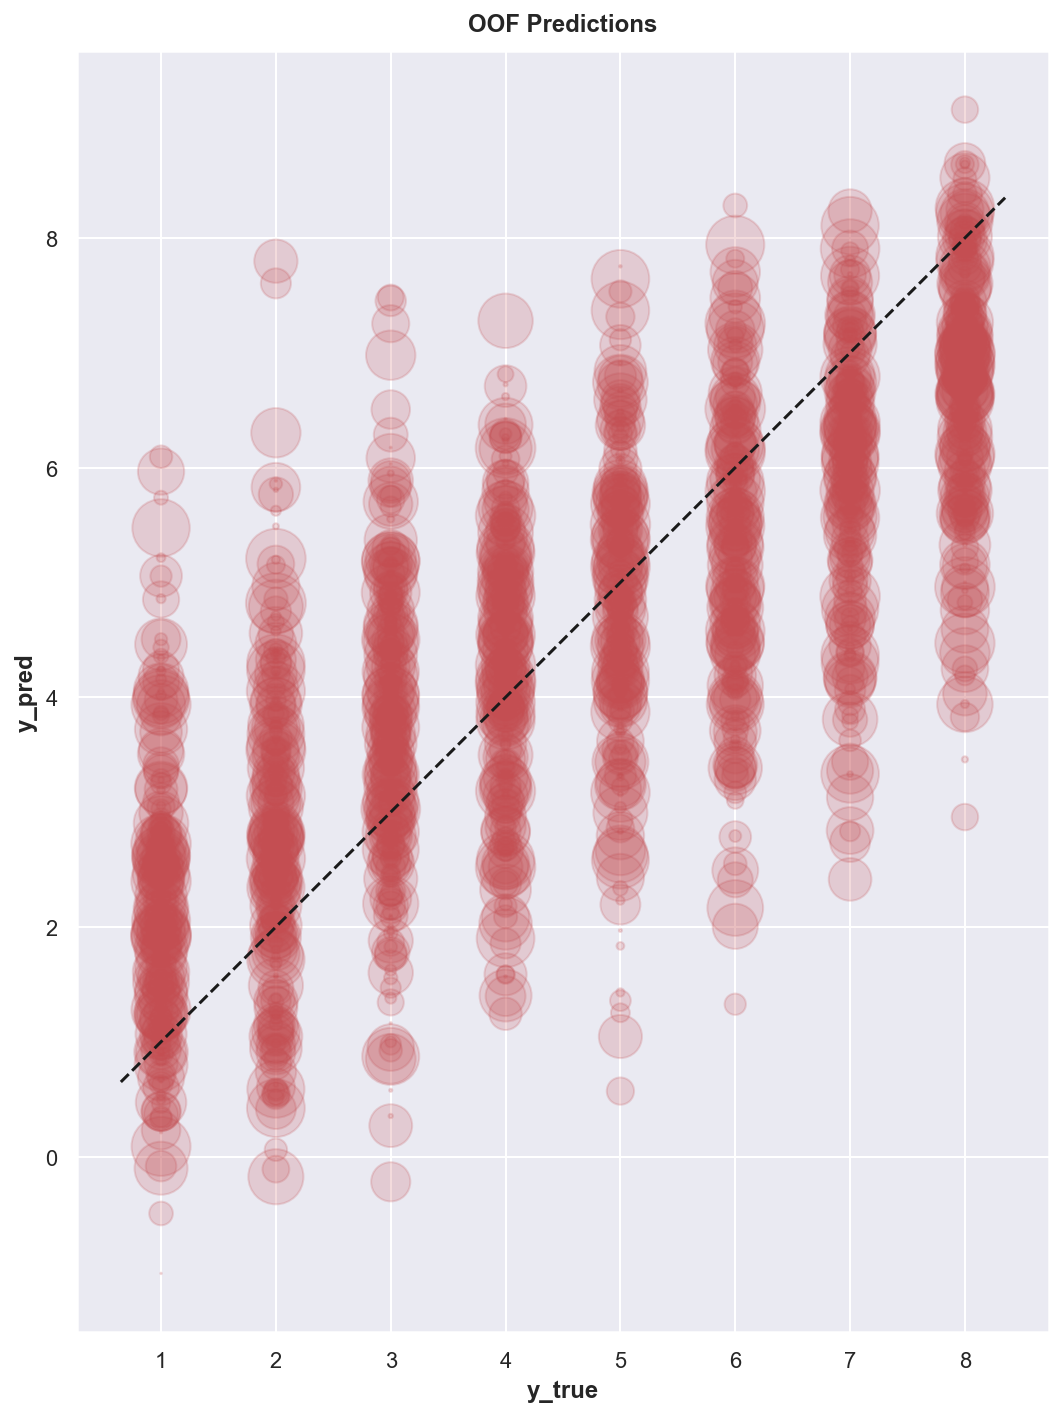

In [1036]:
plot_oof(y_test, y_pred)

In [1037]:
min(y_pred)

-1.0170643

In [1038]:
mean_absolute_error(y_test, y_pred)

1.1962631

In [1039]:
mean_squared_error(y_test, y_pred)

2.2700818

# mdi_importances

In [1040]:
feature_names = logistic_regression_pipeline[:-1].get_feature_names_out()
mdi_importances = pd.Series(
    logistic_regression_pipeline[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

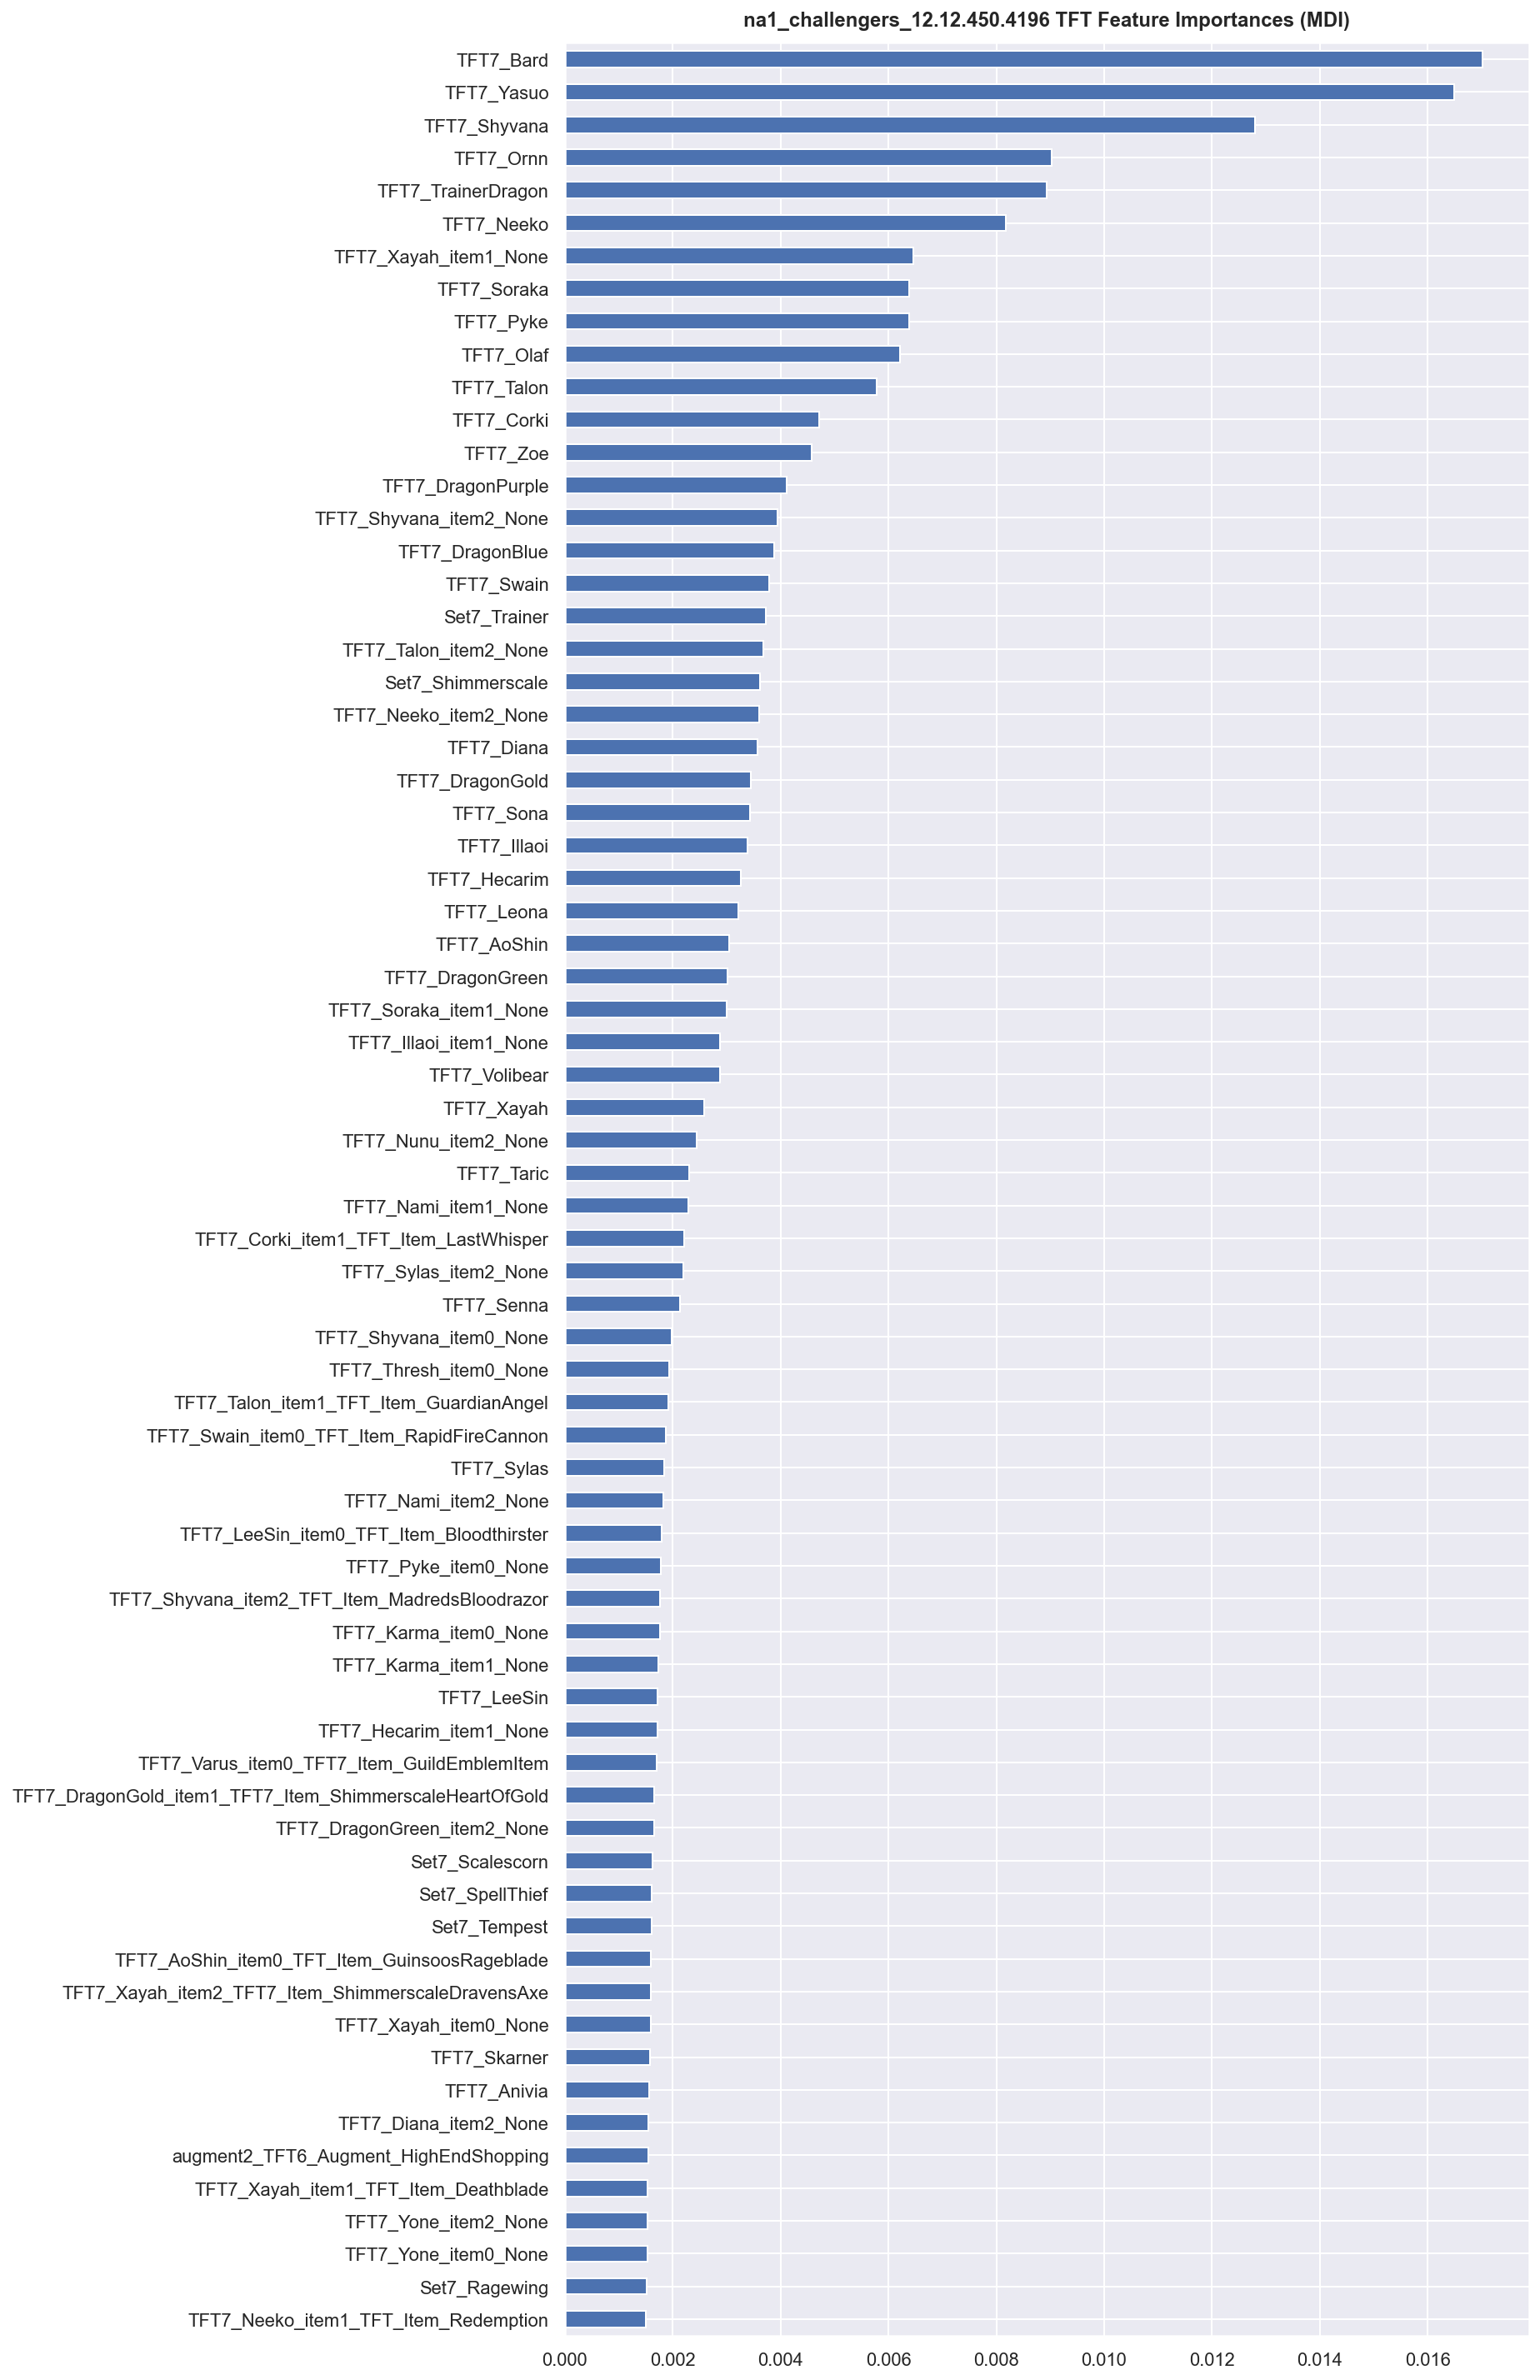

In [1041]:
plt.figure(figsize=(13, 20))
ax = mdi_importances[-70:].plot.barh()
ax.set_title(f"{SERVER}_{LEAGUE}_{LATEST_RELEASE} TFT Feature Importances (MDI)")
ax.figure.tight_layout()

In [1042]:
mdi_importances.to_csv(os.path.join(ASSETS_DIR, f'{SERVER}_{LEAGUE}_{LATEST_RELEASE}_mdi_importances.csv'))

In [1043]:
mdi_importances[-60:]

TFT7_Xayah_item2_TFT7_Item_ShimmerscaleDravensAxe          0.001590
TFT7_AoShin_item0_TFT_Item_GuinsoosRageblade               0.001593
Set7_Tempest                                               0.001614
Set7_SpellThief                                            0.001616
Set7_Scalescorn                                            0.001630
TFT7_DragonGreen_item2_None                                0.001651
TFT7_DragonGold_item1_TFT7_Item_ShimmerscaleHeartOfGold    0.001653
TFT7_Varus_item0_TFT7_Item_GuildEmblemItem                 0.001710
TFT7_Hecarim_item1_None                                    0.001714
TFT7_LeeSin                                                0.001716
TFT7_Karma_item1_None                                      0.001737
TFT7_Karma_item0_None                                      0.001761
TFT7_Shyvana_item2_TFT_Item_MadredsBloodrazor              0.001769
TFT7_Pyke_item0_None                                       0.001783
TFT7_LeeSin_item0_TFT_Item_Bloodthirster        